In [1]:
import numpy as np
import math
import os,sys,inspect
import random
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from Algorithm_2 import Algorithm_2, GetCoFromEigen
from Algorithm_3 import Algorithm_3
from func.Select_Index import Select_Columns, Select_Rows, Select_Ind
from func.Summation_Alg import GetCoFromEigen

import itertools 
from itertools import combinations, chain 

def findsubsets(r, n): 
    s = range(0, n)
    return list(itertools.combinations(s, r)) 

def Check_Best_CUR(A, k):
    
    ans = math.inf
    columns = []
    rows = []
    
    m = A.shape[0]
    n = A.shape[1]
    
    Cols = findsubsets(k, n)
    Rows = findsubsets(k, m)
    
    for col__ in Cols:
        for row__ in Rows:
            
            col = list(col__)
            row = list(row__)
            
            C  = Select_Columns(A, col)
            R  = Select_Rows(A, row)
            U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
            
            norm = np.linalg.norm(A - C @ U @ R,'fro')
            if(norm < ans):
                ans = norm
                columns = col
                rows = row
            
    return ans, columns, rows

In [2]:
def GetSparse(m, n, dens, a, b, distr):
    A = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if random.random() < dens:
                A[i][j] = distr(a, b)
    return A


def GetKRank(m, n, k, a, b, distr):
    Z = np.zeros((m,n))
    for i in range(k):
        Z[i][i] = distr(a, b)
    U = np.random.uniform(a,b, (m,m))
    U = U @ U.T
    V = np.random.uniform(a,b, (n,n))
    V = V @ V.T
    return U @ Z @ V

In [3]:
def GetHilbertTest(m,n, k_start,k_border):
    A = np.zeros((m,n))

    arrK2 = []
    arrE2 = []
    arrT2 = []

    arrK3 = []
    arrE3 = []
    arrT3 = []

    for i in range(m):
        for j in range(n):
            A[i][j] = 1/(i+j+1)
        
        
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrK2.append(k)
        time = end - start
        arrT2.append(time.total_seconds())
        arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrK3.append(k)
        time = end - start
        arrT3.append(time.total_seconds())
        arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return arrK2, arrE2, arrT2, arrK3, arrE3, arrT3

def GetRankTest(m,n,rank, k_start, k_border):
    A = GetKRank(m,n,rank,-1,1,np.random.uniform)

    arrKR2 = []
    arrER2 = []
    arrTR2 = []

    arrKR3 = []
    arrER3 = []
    arrTR3 = []


        
            
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrKR2.append(k)
        time = end - start
        arrER2.append(np.linalg.norm(A - C@U@R, 'fro'))
        arrTR2.append(time.total_seconds())
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrKR3.append(k)
        time = end - start
        arrTR3.append(time.total_seconds())
        arrER3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return arrKR2, arrER2, arrTR2, arrKR3, arrER3, arrTR3

def GetSparseTest(m,n,dens,k_start,k_border):
    A = GetSparse(m,n,dens,-1,1,np.random.uniform)

    arrKS2 = []
    arrES2 = []
    arrTS2 = []

    arrKS3 = []
    arrES3 = []
    arrTS3 = []


        
            
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_2(A, k)
        end = pd.Timestamp.now()
        print(k)
        arrKS2.append(k)
        time = end - start
        arrTS2.append(time.total_seconds())
        arrES2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
    for k in range(k_start,k_border+1):
        start = pd.Timestamp.now()
        C, U, R ,Cs, Rs = Algorithm_3(A, k)
        end = pd.Timestamp.now()
        #print(k)
        arrKS3.append(k)
        time = end - start
        arrTS3.append(time.total_seconds())
        arrES3.append(np.linalg.norm(A - C@U@R, 'fro'))
    return KS2,ES2,ET2, KS3, ES3, TS3

Hilbert matrix

In [4]:
m = 35
n = 40

A = np.zeros((m,n))

arrK2 = []
arrE2 = []
arrT2 = []

arrK3 = []
arrE3 = []
arrT3 = []

for i in range(m):
    for j in range(n):
        A[i][j] = 1/(i+j+1)
        
        
for k in range(10,25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK2.append(k)
    time = end - start
    arrT2.append(time.total_seconds())
    arrE2.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(10 , 25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrK3.append(k)
    time = end - start
    arrT3.append(time.total_seconds())
    arrE3.append(np.linalg.norm(A - C@U@R, 'fro'))




iteration #0
side cycle before #0/40; 0/10
side cycle before #1/40; 0/10
side cycle before #2/40; 0/10
side cycle before #3/40; 0/10
side cycle before #4/40; 0/10
side cycle before #5/40; 0/10
side cycle before #6/40; 0/10
side cycle before #7/40; 0/10
side cycle before #8/40; 0/10
side cycle before #9/40; 0/10
side cycle before #10/40; 0/10
side cycle before #11/40; 0/10
side cycle before #12/40; 0/10
side cycle before #13/40; 0/10
side cycle before #14/40; 0/10
side cycle before #15/40; 0/10
side cycle before #16/40; 0/10
side cycle before #17/40; 0/10
side cycle before #18/40; 0/10
side cycle before #19/40; 0/10
side cycle before #20/40; 0/10
side cycle before #21/40; 0/10
side cycle before #22/40; 0/10
side cycle before #23/40; 0/10
side cycle before #24/40; 0/10
side cycle before #25/40; 0/10
side cycle before #26/40; 0/10
side cycle before #27/40; 0/10
side cycle before #28/40; 0/10
side cycle before #29/40; 0/10
side cycle before #30/40; 0/10
side cycle before #31/40; 0/10
side 

side cycle before #29/40; 6/10
side cycle before #30/40; 6/10
side cycle before #31/40; 6/10
side cycle before #32/40; 6/10
side cycle before #33/40; 6/10


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(arrK2,arrE2, label = "Algorithm 2")
plt.plot(arrK3,arrE3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel(" \|A - CUR\|_F^2")
plt.xlabel("k")
plt.grid()
plt.savefig('err_Hilbert.pdf', dpi=300)
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(arrK2,arrT2, label = "Algorithm 2")
plt.plot(arrK3,arrT3, label = "Algorithm 3")
plt.legend()

plt.yscale('log')
plt.ylabel("время работы")
plt.xlabel("k")
plt.grid()
plt.savefig('time_Hilbert.pdf', dpi=300)
plt.show()

Rank test

In [12]:
m = 20
n = 30
rank = 10
A = GetKRank(m,n,rank,-1,1,np.random.uniform)

arrKR21 = []
arrER21 = []
arrTR21 = []

arrKR31 = []
arrER31 = []
arrTR31 = []


        
            
for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR21.append(k)
    time = end - start
    arrTR21.append(time.total_seconds())
    arrER21.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR31.append(k)
    time = end - start
    arrTR31.append(time.total_seconds())
    arrER31.append(np.linalg.norm(A - C@U@R, 'fro'))
rank = 8
A = GetKRank(m,n,rank,-1,1,np.random.uniform)

arrKR22 = []
arrER22 = []
arrTR22 = []

arrKR32 = []
arrER32 = []
arrTR32 = []


        
            
for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR22.append(k)
    time = end - start
    arrTR22.append(time.total_seconds())
    arrER22.append(np.linalg.norm(A - C@U@R, 'fro'))

for k in range(5,15):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKR32.append(k)
    time = end - start
    arrTR32.append(time.total_seconds())
    arrER32.append(np.linalg.norm(A - C@U@R, 'fro'))

iteration #0
side cycle before #0/30; 0/5
side cycle before #1/30; 0/5
side cycle before #2/30; 0/5
side cycle before #3/30; 0/5
side cycle before #4/30; 0/5
side cycle before #5/30; 0/5
side cycle before #6/30; 0/5
side cycle before #7/30; 0/5
side cycle before #8/30; 0/5
side cycle before #9/30; 0/5
side cycle before #10/30; 0/5
side cycle before #11/30; 0/5
side cycle before #12/30; 0/5
side cycle before #13/30; 0/5
side cycle before #14/30; 0/5
side cycle before #15/30; 0/5
side cycle before #16/30; 0/5
side cycle before #17/30; 0/5
side cycle before #18/30; 0/5
side cycle before #19/30; 0/5
side cycle before #20/30; 0/5
side cycle before #21/30; 0/5
side cycle before #22/30; 0/5
side cycle before #23/30; 0/5
side cycle before #24/30; 0/5
side cycle before #25/30; 0/5
side cycle before #26/30; 0/5
side cycle before #27/30; 0/5
side cycle before #28/30; 0/5
side cycle before #29/30; 0/5
iteration #1
side cycle before #0/30; 1/5
side cycle before #1/30; 1/5
side cycle before #2/30; 1

/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master-3/Algorithm_2.py:56: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master-3/Algorithm_2.py:56: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


side cycle before #7/30; 3/5
side cycle before #8/30; 3/5
side cycle before #9/30; 3/5
side cycle before #10/30; 3/5
side cycle before #11/30; 3/5
side cycle before #12/30; 3/5
side cycle before #13/30; 3/5
side cycle before #14/30; 3/5
side cycle before #15/30; 3/5
side cycle before #16/30; 3/5
side cycle before #17/30; 3/5
side cycle before #18/30; 3/5
side cycle before #19/30; 3/5
side cycle before #20/30; 3/5
side cycle before #21/30; 3/5
side cycle before #22/30; 3/5
side cycle before #23/30; 3/5
side cycle before #24/30; 3/5
side cycle before #25/30; 3/5
side cycle before #26/30; 3/5
side cycle before #27/30; 3/5
side cycle before #28/30; 3/5
side cycle before #29/30; 3/5
iteration #4
side cycle before #0/30; 4/5
side cycle before #1/30; 4/5
side cycle before #2/30; 4/5
side cycle before #3/30; 4/5
side cycle before #4/30; 4/5
side cycle before #5/30; 4/5
side cycle before #6/30; 4/5
side cycle before #7/30; 4/5
side cycle before #8/30; 4/5
side cycle before #9/30; 4/5
side cycle

side cycle before #19/30; 4/6
side cycle before #20/30; 4/6
side cycle before #21/30; 4/6
side cycle before #22/30; 4/6
side cycle before #23/30; 4/6
side cycle before #24/30; 4/6
side cycle before #25/30; 4/6
side cycle before #26/30; 4/6
side cycle before #27/30; 4/6
side cycle before #28/30; 4/6
side cycle before #29/30; 4/6
iteration #5
side cycle before #0/30; 5/6
side cycle before #1/30; 5/6
side cycle before #2/30; 5/6
side cycle before #3/30; 5/6
side cycle before #4/30; 5/6
side cycle before #5/30; 5/6
side cycle before #6/30; 5/6
side cycle before #7/30; 5/6
side cycle before #8/30; 5/6
side cycle before #9/30; 5/6
side cycle before #10/30; 5/6
side cycle before #11/30; 5/6
side cycle before #12/30; 5/6
side cycle before #13/30; 5/6
side cycle before #14/30; 5/6
side cycle before #15/30; 5/6
side cycle before #16/30; 5/6
side cycle before #17/30; 5/6
side cycle before #18/30; 5/6
side cycle before #19/30; 5/6
side cycle before #20/30; 5/6
side cycle before #21/30; 5/6
side cy

side cycle before #18/30; 4/7
side cycle before #19/30; 4/7
side cycle before #20/30; 4/7
side cycle before #21/30; 4/7
side cycle before #22/30; 4/7
side cycle before #23/30; 4/7
side cycle before #24/30; 4/7
side cycle before #25/30; 4/7
side cycle before #26/30; 4/7
side cycle before #27/30; 4/7
side cycle before #28/30; 4/7
side cycle before #29/30; 4/7
iteration #5
side cycle before #0/30; 5/7
side cycle before #1/30; 5/7
side cycle before #2/30; 5/7
side cycle before #3/30; 5/7
side cycle before #4/30; 5/7
side cycle before #5/30; 5/7
side cycle before #6/30; 5/7
side cycle before #7/30; 5/7
side cycle before #8/30; 5/7
side cycle before #9/30; 5/7
side cycle before #10/30; 5/7
side cycle before #11/30; 5/7
side cycle before #12/30; 5/7
side cycle before #13/30; 5/7
side cycle before #14/30; 5/7
side cycle before #15/30; 5/7
side cycle before #16/30; 5/7
side cycle before #17/30; 5/7
side cycle before #18/30; 5/7
side cycle before #19/30; 5/7
side cycle before #20/30; 5/7
side cy

side cycle before #1/30; 3/8
side cycle before #2/30; 3/8
side cycle before #3/30; 3/8
side cycle before #4/30; 3/8
side cycle before #5/30; 3/8
side cycle before #6/30; 3/8
side cycle before #7/30; 3/8
side cycle before #8/30; 3/8
side cycle before #9/30; 3/8
side cycle before #10/30; 3/8
side cycle before #11/30; 3/8
side cycle before #12/30; 3/8
side cycle before #13/30; 3/8
side cycle before #14/30; 3/8
side cycle before #15/30; 3/8
side cycle before #16/30; 3/8
side cycle before #17/30; 3/8
side cycle before #18/30; 3/8
side cycle before #19/30; 3/8
side cycle before #20/30; 3/8
side cycle before #21/30; 3/8
side cycle before #22/30; 3/8
side cycle before #23/30; 3/8
side cycle before #24/30; 3/8
side cycle before #25/30; 3/8
side cycle before #26/30; 3/8
side cycle before #27/30; 3/8
side cycle before #28/30; 3/8
side cycle before #29/30; 3/8
iteration #4
side cycle before #0/30; 4/8
side cycle before #1/30; 4/8
side cycle before #2/30; 4/8
side cycle before #3/30; 4/8
side cycle

side cycle before #3/20; 7/8
side cycle before #4/20; 7/8
side cycle before #5/20; 7/8
side cycle before #6/20; 7/8
side cycle before #7/20; 7/8
side cycle before #8/20; 7/8
side cycle before #9/20; 7/8
side cycle before #10/20; 7/8
side cycle before #11/20; 7/8
side cycle before #12/20; 7/8
side cycle before #13/20; 7/8
side cycle before #14/20; 7/8
side cycle before #15/20; 7/8
side cycle before #16/20; 7/8
side cycle before #17/20; 7/8
side cycle before #18/20; 7/8
side cycle before #19/20; 7/8
8
iteration #0
side cycle before #0/30; 0/9
side cycle before #1/30; 0/9
side cycle before #2/30; 0/9
side cycle before #3/30; 0/9
side cycle before #4/30; 0/9
side cycle before #5/30; 0/9
side cycle before #6/30; 0/9
side cycle before #7/30; 0/9
side cycle before #8/30; 0/9
side cycle before #9/30; 0/9
side cycle before #10/30; 0/9
side cycle before #11/30; 0/9
side cycle before #12/30; 0/9
side cycle before #13/30; 0/9
side cycle before #14/30; 0/9
side cycle before #15/30; 0/9
side cycle b

side cycle before #16/20; 0/9
side cycle before #17/20; 0/9
side cycle before #18/20; 0/9
side cycle before #19/20; 0/9
iteration #1
side cycle before #0/20; 1/9
side cycle before #1/20; 1/9
side cycle before #2/20; 1/9
side cycle before #3/20; 1/9
side cycle before #4/20; 1/9
side cycle before #5/20; 1/9
side cycle before #6/20; 1/9
side cycle before #7/20; 1/9
side cycle before #8/20; 1/9
side cycle before #9/20; 1/9
side cycle before #10/20; 1/9
side cycle before #11/20; 1/9
side cycle before #12/20; 1/9
side cycle before #13/20; 1/9
side cycle before #14/20; 1/9
side cycle before #15/20; 1/9
side cycle before #16/20; 1/9
side cycle before #17/20; 1/9
side cycle before #18/20; 1/9
side cycle before #19/20; 1/9
iteration #2
side cycle before #0/20; 2/9
side cycle before #1/20; 2/9
side cycle before #2/20; 2/9
side cycle before #3/20; 2/9
side cycle before #4/20; 2/9
side cycle before #5/20; 2/9
side cycle before #6/20; 2/9
side cycle before #7/20; 2/9
side cycle before #8/20; 2/9
sid

side cycle before #2/30; 4/10
side cycle before #3/30; 4/10
side cycle before #4/30; 4/10
side cycle before #5/30; 4/10
side cycle before #6/30; 4/10
side cycle before #7/30; 4/10
side cycle before #8/30; 4/10
side cycle before #9/30; 4/10
side cycle before #10/30; 4/10
side cycle before #11/30; 4/10
side cycle before #12/30; 4/10
side cycle before #13/30; 4/10
side cycle before #14/30; 4/10
side cycle before #15/30; 4/10
side cycle before #16/30; 4/10
side cycle before #17/30; 4/10
side cycle before #18/30; 4/10
side cycle before #19/30; 4/10
side cycle before #20/30; 4/10
side cycle before #21/30; 4/10
side cycle before #22/30; 4/10
side cycle before #23/30; 4/10
side cycle before #24/30; 4/10
side cycle before #25/30; 4/10
side cycle before #26/30; 4/10
side cycle before #27/30; 4/10
side cycle before #28/30; 4/10
side cycle before #29/30; 4/10
iteration #5
side cycle before #0/30; 5/10
side cycle before #1/30; 5/10
side cycle before #2/30; 5/10
side cycle before #3/30; 5/10
side cy

side cycle before #7/20; 5/10
side cycle before #8/20; 5/10
side cycle before #9/20; 5/10
side cycle before #10/20; 5/10
side cycle before #11/20; 5/10
side cycle before #12/20; 5/10
side cycle before #13/20; 5/10
side cycle before #14/20; 5/10
side cycle before #15/20; 5/10
side cycle before #16/20; 5/10
side cycle before #17/20; 5/10
side cycle before #18/20; 5/10
side cycle before #19/20; 5/10
iteration #6
side cycle before #0/20; 6/10
side cycle before #1/20; 6/10
side cycle before #2/20; 6/10
side cycle before #3/20; 6/10
side cycle before #4/20; 6/10
side cycle before #5/20; 6/10
side cycle before #6/20; 6/10
side cycle before #7/20; 6/10
side cycle before #8/20; 6/10
side cycle before #9/20; 6/10
side cycle before #10/20; 6/10
side cycle before #11/20; 6/10
side cycle before #12/20; 6/10
side cycle before #13/20; 6/10
side cycle before #14/20; 6/10
side cycle before #15/20; 6/10
side cycle before #16/20; 6/10
side cycle before #17/20; 6/10
side cycle before #18/20; 6/10
side cyc

side cycle before #4/30; 6/11
side cycle before #5/30; 6/11
side cycle before #6/30; 6/11
side cycle before #7/30; 6/11
side cycle before #8/30; 6/11
side cycle before #9/30; 6/11
side cycle before #10/30; 6/11
side cycle before #11/30; 6/11
side cycle before #12/30; 6/11
side cycle before #13/30; 6/11
side cycle before #14/30; 6/11
side cycle before #15/30; 6/11
side cycle before #16/30; 6/11
side cycle before #17/30; 6/11
side cycle before #18/30; 6/11
side cycle before #19/30; 6/11
side cycle before #20/30; 6/11
side cycle before #21/30; 6/11
side cycle before #22/30; 6/11
side cycle before #23/30; 6/11
side cycle before #24/30; 6/11
side cycle before #25/30; 6/11
side cycle before #26/30; 6/11
side cycle before #27/30; 6/11
side cycle before #28/30; 6/11
side cycle before #29/30; 6/11
iteration #7
side cycle before #0/30; 7/11
side cycle before #1/30; 7/11
side cycle before #2/30; 7/11
side cycle before #3/30; 7/11
side cycle before #4/30; 7/11
side cycle before #5/30; 7/11
side cy

side cycle before #9/20; 7/11
side cycle before #10/20; 7/11
side cycle before #11/20; 7/11
side cycle before #12/20; 7/11
side cycle before #13/20; 7/11
side cycle before #14/20; 7/11
side cycle before #15/20; 7/11
side cycle before #16/20; 7/11
side cycle before #17/20; 7/11
side cycle before #18/20; 7/11
side cycle before #19/20; 7/11
iteration #8
side cycle before #0/20; 8/11
side cycle before #1/20; 8/11
side cycle before #2/20; 8/11
side cycle before #3/20; 8/11
side cycle before #4/20; 8/11
side cycle before #5/20; 8/11
side cycle before #6/20; 8/11
side cycle before #7/20; 8/11
side cycle before #8/20; 8/11
side cycle before #9/20; 8/11
side cycle before #10/20; 8/11
side cycle before #11/20; 8/11
side cycle before #12/20; 8/11
side cycle before #13/20; 8/11
side cycle before #14/20; 8/11
side cycle before #15/20; 8/11
side cycle before #16/20; 8/11
side cycle before #17/20; 8/11
side cycle before #18/20; 8/11
side cycle before #19/20; 8/11
iteration #9
side cycle before #0/20;

side cycle before #13/30; 7/12
side cycle before #14/30; 7/12
side cycle before #15/30; 7/12
side cycle before #16/30; 7/12
side cycle before #17/30; 7/12
side cycle before #18/30; 7/12
side cycle before #19/30; 7/12
side cycle before #20/30; 7/12
side cycle before #21/30; 7/12
side cycle before #22/30; 7/12
side cycle before #23/30; 7/12
side cycle before #24/30; 7/12
side cycle before #25/30; 7/12
side cycle before #26/30; 7/12
side cycle before #27/30; 7/12
side cycle before #28/30; 7/12
side cycle before #29/30; 7/12
iteration #8
side cycle before #0/30; 8/12
side cycle before #1/30; 8/12
side cycle before #2/30; 8/12
side cycle before #3/30; 8/12
side cycle before #4/30; 8/12
side cycle before #5/30; 8/12
side cycle before #6/30; 8/12
side cycle before #7/30; 8/12
side cycle before #8/30; 8/12
side cycle before #9/30; 8/12
side cycle before #10/30; 8/12
side cycle before #11/30; 8/12
side cycle before #12/30; 8/12
side cycle before #13/30; 8/12
side cycle before #14/30; 8/12
side 

side cycle before #7/20; 7/12
side cycle before #8/20; 7/12
side cycle before #9/20; 7/12
side cycle before #10/20; 7/12
side cycle before #11/20; 7/12
side cycle before #12/20; 7/12
side cycle before #13/20; 7/12
side cycle before #14/20; 7/12
side cycle before #15/20; 7/12
side cycle before #16/20; 7/12
side cycle before #17/20; 7/12
side cycle before #18/20; 7/12
side cycle before #19/20; 7/12
iteration #8
side cycle before #0/20; 8/12
side cycle before #1/20; 8/12
side cycle before #2/20; 8/12
side cycle before #3/20; 8/12
side cycle before #4/20; 8/12
side cycle before #5/20; 8/12
side cycle before #6/20; 8/12
side cycle before #7/20; 8/12
side cycle before #8/20; 8/12
side cycle before #9/20; 8/12
side cycle before #10/20; 8/12
side cycle before #11/20; 8/12
side cycle before #12/20; 8/12
side cycle before #13/20; 8/12
side cycle before #14/20; 8/12
side cycle before #15/20; 8/12
side cycle before #16/20; 8/12
side cycle before #17/20; 8/12
side cycle before #18/20; 8/12
side cyc

side cycle before #8/30; 6/13
side cycle before #9/30; 6/13
side cycle before #10/30; 6/13
side cycle before #11/30; 6/13
side cycle before #12/30; 6/13
side cycle before #13/30; 6/13
side cycle before #14/30; 6/13
side cycle before #15/30; 6/13
side cycle before #16/30; 6/13
side cycle before #17/30; 6/13
side cycle before #18/30; 6/13
side cycle before #19/30; 6/13
side cycle before #20/30; 6/13
side cycle before #21/30; 6/13
side cycle before #22/30; 6/13
side cycle before #23/30; 6/13
side cycle before #24/30; 6/13
side cycle before #25/30; 6/13
side cycle before #26/30; 6/13
side cycle before #27/30; 6/13
side cycle before #28/30; 6/13
side cycle before #29/30; 6/13
iteration #7
side cycle before #0/30; 7/13
side cycle before #1/30; 7/13
side cycle before #2/30; 7/13
side cycle before #3/30; 7/13
side cycle before #4/30; 7/13
side cycle before #5/30; 7/13
side cycle before #6/30; 7/13
side cycle before #7/30; 7/13
side cycle before #8/30; 7/13
side cycle before #9/30; 7/13
side cy

side cycle before #17/20; 3/13
side cycle before #18/20; 3/13
side cycle before #19/20; 3/13
iteration #4
side cycle before #0/20; 4/13
side cycle before #1/20; 4/13
side cycle before #2/20; 4/13
side cycle before #3/20; 4/13
side cycle before #4/20; 4/13
side cycle before #5/20; 4/13
side cycle before #6/20; 4/13
side cycle before #7/20; 4/13
side cycle before #8/20; 4/13
side cycle before #9/20; 4/13
side cycle before #10/20; 4/13
side cycle before #11/20; 4/13
side cycle before #12/20; 4/13
side cycle before #13/20; 4/13
side cycle before #14/20; 4/13
side cycle before #15/20; 4/13
side cycle before #16/20; 4/13
side cycle before #17/20; 4/13
side cycle before #18/20; 4/13
side cycle before #19/20; 4/13
iteration #5
side cycle before #0/20; 5/13
side cycle before #1/20; 5/13
side cycle before #2/20; 5/13
side cycle before #3/20; 5/13
side cycle before #4/20; 5/13
side cycle before #5/20; 5/13
side cycle before #6/20; 5/13
side cycle before #7/20; 5/13
side cycle before #8/20; 5/13
s

side cycle before #17/30; 3/14
side cycle before #18/30; 3/14
side cycle before #19/30; 3/14
side cycle before #20/30; 3/14
side cycle before #21/30; 3/14
side cycle before #22/30; 3/14
side cycle before #23/30; 3/14
side cycle before #24/30; 3/14
side cycle before #25/30; 3/14
side cycle before #26/30; 3/14
side cycle before #27/30; 3/14
side cycle before #28/30; 3/14
side cycle before #29/30; 3/14
iteration #4
side cycle before #0/30; 4/14
side cycle before #1/30; 4/14
side cycle before #2/30; 4/14
side cycle before #3/30; 4/14
side cycle before #4/30; 4/14
side cycle before #5/30; 4/14
side cycle before #6/30; 4/14
side cycle before #7/30; 4/14
side cycle before #8/30; 4/14
side cycle before #9/30; 4/14
side cycle before #10/30; 4/14
side cycle before #11/30; 4/14
side cycle before #12/30; 4/14
side cycle before #13/30; 4/14
side cycle before #14/30; 4/14
side cycle before #15/30; 4/14
side cycle before #16/30; 4/14
side cycle before #17/30; 4/14
side cycle before #18/30; 4/14
side 

side cycle before #4/30; 13/14
side cycle before #5/30; 13/14
side cycle before #6/30; 13/14
side cycle before #7/30; 13/14
side cycle before #8/30; 13/14
side cycle before #9/30; 13/14
side cycle before #10/30; 13/14
side cycle before #11/30; 13/14
side cycle before #12/30; 13/14
side cycle before #13/30; 13/14
side cycle before #14/30; 13/14
side cycle before #15/30; 13/14
side cycle before #16/30; 13/14
side cycle before #17/30; 13/14
side cycle before #18/30; 13/14
side cycle before #19/30; 13/14
side cycle before #20/30; 13/14
side cycle before #21/30; 13/14
side cycle before #22/30; 13/14
side cycle before #23/30; 13/14
side cycle before #24/30; 13/14
side cycle before #25/30; 13/14
side cycle before #26/30; 13/14
side cycle before #27/30; 13/14
side cycle before #28/30; 13/14
side cycle before #29/30; 13/14
iteration #0
side cycle before #0/20; 0/14
side cycle before #1/20; 0/14
side cycle before #2/20; 0/14
side cycle before #3/20; 0/14
side cycle before #4/20; 0/14
side cycle 

side cycle before #3/20; 13/14
side cycle before #4/20; 13/14
side cycle before #5/20; 13/14
side cycle before #6/20; 13/14
side cycle before #7/20; 13/14
side cycle before #8/20; 13/14
side cycle before #9/20; 13/14
side cycle before #10/20; 13/14
side cycle before #11/20; 13/14
side cycle before #12/20; 13/14
side cycle before #13/20; 13/14
side cycle before #14/20; 13/14
side cycle before #15/20; 13/14
side cycle before #16/20; 13/14
side cycle before #17/20; 13/14
side cycle before #18/20; 13/14
side cycle before #19/20; 13/14
14
0/5 ; 0/20 ; 0/30
0/5 ; 0/20 ; 1/30
0/5 ; 0/20 ; 2/30
0/5 ; 0/20 ; 3/30
0/5 ; 0/20 ; 4/30
0/5 ; 0/20 ; 5/30
0/5 ; 0/20 ; 6/30
0/5 ; 0/20 ; 7/30
0/5 ; 0/20 ; 8/30
0/5 ; 0/20 ; 9/30
0/5 ; 0/20 ; 10/30
0/5 ; 0/20 ; 11/30
0/5 ; 0/20 ; 12/30
0/5 ; 0/20 ; 13/30
0/5 ; 0/20 ; 14/30
0/5 ; 0/20 ; 15/30
0/5 ; 0/20 ; 16/30
0/5 ; 0/20 ; 17/30
0/5 ; 0/20 ; 18/30
0/5 ; 0/20 ; 19/30
0/5 ; 0/20 ; 20/30
0/5 ; 0/20 ; 21/30
0/5 ; 0/20 ; 22/30
0/5 ; 0/20 ; 23/30
0/5 ; 0/20 ; 2

0/5 ; 13/20 ; 29/30
0/5 ; 14/20 ; 0/30
0/5 ; 14/20 ; 1/30
0/5 ; 14/20 ; 2/30
0/5 ; 14/20 ; 3/30
0/5 ; 14/20 ; 4/30
0/5 ; 14/20 ; 5/30
0/5 ; 14/20 ; 6/30
0/5 ; 14/20 ; 7/30
0/5 ; 14/20 ; 8/30
0/5 ; 14/20 ; 9/30
0/5 ; 14/20 ; 10/30
0/5 ; 14/20 ; 11/30
0/5 ; 14/20 ; 12/30
0/5 ; 14/20 ; 13/30
0/5 ; 14/20 ; 14/30
0/5 ; 14/20 ; 15/30
0/5 ; 14/20 ; 16/30
0/5 ; 14/20 ; 17/30
0/5 ; 14/20 ; 18/30
0/5 ; 14/20 ; 19/30
0/5 ; 14/20 ; 20/30
0/5 ; 14/20 ; 21/30
0/5 ; 14/20 ; 22/30
0/5 ; 14/20 ; 23/30
0/5 ; 14/20 ; 24/30
0/5 ; 14/20 ; 25/30
0/5 ; 14/20 ; 26/30
0/5 ; 14/20 ; 27/30
0/5 ; 14/20 ; 28/30
0/5 ; 14/20 ; 29/30
0/5 ; 15/20 ; 0/30
0/5 ; 15/20 ; 1/30
0/5 ; 15/20 ; 2/30
0/5 ; 15/20 ; 3/30
0/5 ; 15/20 ; 4/30
0/5 ; 15/20 ; 5/30
0/5 ; 15/20 ; 6/30
0/5 ; 15/20 ; 7/30
0/5 ; 15/20 ; 8/30
0/5 ; 15/20 ; 9/30
0/5 ; 15/20 ; 10/30
0/5 ; 15/20 ; 11/30
0/5 ; 15/20 ; 12/30
0/5 ; 15/20 ; 13/30
0/5 ; 15/20 ; 14/30
0/5 ; 15/20 ; 15/30
0/5 ; 15/20 ; 16/30
0/5 ; 15/20 ; 17/30
0/5 ; 15/20 ; 18/30
0/5 ; 15/20 ; 19/30


1/5 ; 8/20 ; 28/30
1/5 ; 8/20 ; 29/30
1/5 ; 9/20 ; 0/30
1/5 ; 9/20 ; 1/30
1/5 ; 9/20 ; 2/30
1/5 ; 9/20 ; 3/30
1/5 ; 9/20 ; 4/30
1/5 ; 9/20 ; 5/30
1/5 ; 9/20 ; 6/30
1/5 ; 9/20 ; 7/30
1/5 ; 9/20 ; 8/30
1/5 ; 9/20 ; 9/30
1/5 ; 9/20 ; 10/30
1/5 ; 9/20 ; 11/30
1/5 ; 9/20 ; 12/30
1/5 ; 9/20 ; 13/30
1/5 ; 9/20 ; 14/30
1/5 ; 9/20 ; 15/30
1/5 ; 9/20 ; 16/30
1/5 ; 9/20 ; 17/30
1/5 ; 9/20 ; 18/30
1/5 ; 9/20 ; 19/30
1/5 ; 9/20 ; 20/30
1/5 ; 9/20 ; 21/30
1/5 ; 9/20 ; 22/30
1/5 ; 9/20 ; 23/30
1/5 ; 9/20 ; 24/30
1/5 ; 9/20 ; 25/30
1/5 ; 9/20 ; 26/30
1/5 ; 9/20 ; 27/30
1/5 ; 9/20 ; 28/30
1/5 ; 9/20 ; 29/30
1/5 ; 10/20 ; 0/30
1/5 ; 10/20 ; 1/30
1/5 ; 10/20 ; 2/30
1/5 ; 10/20 ; 3/30
1/5 ; 10/20 ; 4/30
1/5 ; 10/20 ; 5/30
1/5 ; 10/20 ; 6/30
1/5 ; 10/20 ; 7/30
1/5 ; 10/20 ; 8/30
1/5 ; 10/20 ; 9/30
1/5 ; 10/20 ; 10/30
1/5 ; 10/20 ; 11/30
1/5 ; 10/20 ; 12/30
1/5 ; 10/20 ; 13/30
1/5 ; 10/20 ; 14/30
1/5 ; 10/20 ; 15/30
1/5 ; 10/20 ; 16/30
1/5 ; 10/20 ; 17/30
1/5 ; 10/20 ; 18/30
1/5 ; 10/20 ; 19/30
1/5 ; 10/20 

2/5 ; 3/20 ; 6/30
2/5 ; 3/20 ; 7/30
2/5 ; 3/20 ; 8/30
2/5 ; 3/20 ; 9/30
2/5 ; 3/20 ; 10/30
2/5 ; 3/20 ; 11/30
2/5 ; 3/20 ; 12/30
2/5 ; 3/20 ; 13/30
2/5 ; 3/20 ; 14/30
2/5 ; 3/20 ; 15/30
2/5 ; 3/20 ; 16/30
2/5 ; 3/20 ; 17/30
2/5 ; 3/20 ; 18/30
2/5 ; 3/20 ; 19/30
2/5 ; 3/20 ; 20/30
2/5 ; 3/20 ; 21/30
2/5 ; 3/20 ; 22/30
2/5 ; 3/20 ; 23/30
2/5 ; 3/20 ; 24/30
2/5 ; 3/20 ; 25/30
2/5 ; 3/20 ; 26/30
2/5 ; 3/20 ; 27/30
2/5 ; 3/20 ; 28/30
2/5 ; 3/20 ; 29/30
2/5 ; 4/20 ; 0/30
2/5 ; 4/20 ; 1/30
2/5 ; 4/20 ; 2/30
2/5 ; 4/20 ; 3/30
2/5 ; 4/20 ; 4/30
2/5 ; 4/20 ; 5/30
2/5 ; 4/20 ; 6/30
2/5 ; 4/20 ; 7/30
2/5 ; 4/20 ; 8/30
2/5 ; 4/20 ; 9/30
2/5 ; 4/20 ; 10/30
2/5 ; 4/20 ; 11/30
2/5 ; 4/20 ; 12/30
2/5 ; 4/20 ; 13/30
2/5 ; 4/20 ; 14/30
2/5 ; 4/20 ; 15/30
2/5 ; 4/20 ; 16/30
2/5 ; 4/20 ; 17/30
2/5 ; 4/20 ; 18/30
2/5 ; 4/20 ; 19/30
2/5 ; 4/20 ; 20/30
2/5 ; 4/20 ; 21/30
2/5 ; 4/20 ; 22/30
2/5 ; 4/20 ; 23/30
2/5 ; 4/20 ; 24/30
2/5 ; 4/20 ; 25/30
2/5 ; 4/20 ; 26/30
2/5 ; 4/20 ; 27/30
2/5 ; 4/20 ; 28/30
2/5 ; 4

2/5 ; 17/20 ; 18/30
2/5 ; 17/20 ; 19/30
2/5 ; 17/20 ; 20/30
2/5 ; 17/20 ; 21/30
2/5 ; 17/20 ; 22/30
2/5 ; 17/20 ; 23/30
2/5 ; 17/20 ; 24/30
2/5 ; 17/20 ; 25/30
2/5 ; 17/20 ; 26/30
2/5 ; 17/20 ; 27/30
2/5 ; 17/20 ; 28/30
2/5 ; 17/20 ; 29/30
2/5 ; 18/20 ; 0/30
2/5 ; 18/20 ; 1/30
2/5 ; 18/20 ; 2/30
2/5 ; 18/20 ; 3/30
2/5 ; 18/20 ; 4/30
2/5 ; 18/20 ; 5/30
2/5 ; 18/20 ; 6/30
2/5 ; 18/20 ; 7/30
2/5 ; 18/20 ; 8/30
2/5 ; 18/20 ; 9/30
2/5 ; 18/20 ; 10/30
2/5 ; 18/20 ; 11/30
2/5 ; 18/20 ; 12/30
2/5 ; 18/20 ; 13/30
2/5 ; 18/20 ; 14/30
2/5 ; 18/20 ; 15/30
2/5 ; 18/20 ; 16/30
2/5 ; 18/20 ; 17/30
2/5 ; 18/20 ; 18/30
2/5 ; 18/20 ; 19/30
2/5 ; 18/20 ; 20/30
2/5 ; 18/20 ; 21/30
2/5 ; 18/20 ; 22/30
2/5 ; 18/20 ; 23/30
2/5 ; 18/20 ; 24/30
2/5 ; 18/20 ; 25/30
2/5 ; 18/20 ; 26/30
2/5 ; 18/20 ; 27/30
2/5 ; 18/20 ; 28/30
2/5 ; 18/20 ; 29/30
2/5 ; 19/20 ; 0/30
2/5 ; 19/20 ; 1/30
2/5 ; 19/20 ; 2/30
2/5 ; 19/20 ; 3/30
2/5 ; 19/20 ; 4/30
2/5 ; 19/20 ; 5/30
2/5 ; 19/20 ; 6/30
2/5 ; 19/20 ; 7/30
2/5 ; 19/20 ; 8/30

/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master-3/Algorithm_3.py:73: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/Users/vladimirsevcov/Downloads/Low-Rank-approx_project-master-3/Algorithm_3.py:73: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


3/5 ; 0/20 ; 23/30
3/5 ; 0/20 ; 24/30
3/5 ; 0/20 ; 25/30
3/5 ; 0/20 ; 26/30
3/5 ; 0/20 ; 27/30
3/5 ; 0/20 ; 28/30
3/5 ; 0/20 ; 29/30
3/5 ; 1/20 ; 0/30
3/5 ; 1/20 ; 1/30
3/5 ; 1/20 ; 2/30
3/5 ; 1/20 ; 3/30
3/5 ; 1/20 ; 4/30
3/5 ; 1/20 ; 5/30
3/5 ; 1/20 ; 6/30
3/5 ; 1/20 ; 7/30
3/5 ; 1/20 ; 8/30
3/5 ; 1/20 ; 9/30
3/5 ; 1/20 ; 10/30
3/5 ; 1/20 ; 11/30
3/5 ; 1/20 ; 12/30
3/5 ; 1/20 ; 13/30
3/5 ; 1/20 ; 14/30
3/5 ; 1/20 ; 15/30
3/5 ; 1/20 ; 16/30
3/5 ; 1/20 ; 17/30
3/5 ; 1/20 ; 18/30
3/5 ; 1/20 ; 19/30
3/5 ; 1/20 ; 20/30
3/5 ; 1/20 ; 21/30
3/5 ; 1/20 ; 22/30
3/5 ; 1/20 ; 23/30
3/5 ; 1/20 ; 24/30
3/5 ; 1/20 ; 25/30
3/5 ; 1/20 ; 26/30
3/5 ; 1/20 ; 27/30
3/5 ; 1/20 ; 28/30
3/5 ; 1/20 ; 29/30
3/5 ; 2/20 ; 0/30
3/5 ; 2/20 ; 1/30
3/5 ; 2/20 ; 2/30
3/5 ; 2/20 ; 3/30
3/5 ; 2/20 ; 4/30
3/5 ; 2/20 ; 5/30
3/5 ; 2/20 ; 6/30
3/5 ; 2/20 ; 7/30
3/5 ; 2/20 ; 8/30
3/5 ; 2/20 ; 9/30
3/5 ; 2/20 ; 10/30
3/5 ; 2/20 ; 11/30
3/5 ; 2/20 ; 12/30
3/5 ; 2/20 ; 13/30
3/5 ; 2/20 ; 14/30
3/5 ; 2/20 ; 15/30
3/5 ; 2/20 ; 

3/5 ; 15/20 ; 8/30
3/5 ; 15/20 ; 9/30
3/5 ; 15/20 ; 10/30
3/5 ; 15/20 ; 11/30
3/5 ; 15/20 ; 12/30
3/5 ; 15/20 ; 13/30
3/5 ; 15/20 ; 14/30
3/5 ; 15/20 ; 15/30
3/5 ; 15/20 ; 16/30
3/5 ; 15/20 ; 17/30
3/5 ; 15/20 ; 18/30
3/5 ; 15/20 ; 19/30
3/5 ; 15/20 ; 20/30
3/5 ; 15/20 ; 21/30
3/5 ; 15/20 ; 22/30
3/5 ; 15/20 ; 23/30
3/5 ; 15/20 ; 24/30
3/5 ; 15/20 ; 25/30
3/5 ; 15/20 ; 26/30
3/5 ; 15/20 ; 27/30
3/5 ; 15/20 ; 28/30
3/5 ; 15/20 ; 29/30
3/5 ; 16/20 ; 0/30
3/5 ; 16/20 ; 1/30
3/5 ; 16/20 ; 2/30
3/5 ; 16/20 ; 3/30
3/5 ; 16/20 ; 4/30
3/5 ; 16/20 ; 5/30
3/5 ; 16/20 ; 6/30
3/5 ; 16/20 ; 7/30
3/5 ; 16/20 ; 8/30
3/5 ; 16/20 ; 9/30
3/5 ; 16/20 ; 10/30
3/5 ; 16/20 ; 11/30
3/5 ; 16/20 ; 12/30
3/5 ; 16/20 ; 13/30
3/5 ; 16/20 ; 14/30
3/5 ; 16/20 ; 15/30
3/5 ; 16/20 ; 16/30
3/5 ; 16/20 ; 17/30
3/5 ; 16/20 ; 18/30
3/5 ; 16/20 ; 19/30
3/5 ; 16/20 ; 20/30
3/5 ; 16/20 ; 21/30
3/5 ; 16/20 ; 22/30
3/5 ; 16/20 ; 23/30
3/5 ; 16/20 ; 24/30
3/5 ; 16/20 ; 25/30
3/5 ; 16/20 ; 26/30
3/5 ; 16/20 ; 27/30
3/5 ; 16/20 

4/5 ; 9/20 ; 22/30
4/5 ; 9/20 ; 23/30
4/5 ; 9/20 ; 24/30
4/5 ; 9/20 ; 25/30
4/5 ; 9/20 ; 26/30
4/5 ; 9/20 ; 27/30
4/5 ; 9/20 ; 28/30
4/5 ; 9/20 ; 29/30
4/5 ; 10/20 ; 0/30
4/5 ; 10/20 ; 1/30
4/5 ; 10/20 ; 2/30
4/5 ; 10/20 ; 3/30
4/5 ; 10/20 ; 4/30
4/5 ; 10/20 ; 5/30
4/5 ; 10/20 ; 6/30
4/5 ; 10/20 ; 7/30
4/5 ; 10/20 ; 8/30
4/5 ; 10/20 ; 9/30
4/5 ; 10/20 ; 10/30
4/5 ; 10/20 ; 11/30
4/5 ; 10/20 ; 12/30
4/5 ; 10/20 ; 13/30
4/5 ; 10/20 ; 14/30
4/5 ; 10/20 ; 15/30
4/5 ; 10/20 ; 16/30
4/5 ; 10/20 ; 17/30
4/5 ; 10/20 ; 18/30
4/5 ; 10/20 ; 19/30
4/5 ; 10/20 ; 20/30
4/5 ; 10/20 ; 21/30
4/5 ; 10/20 ; 22/30
4/5 ; 10/20 ; 23/30
4/5 ; 10/20 ; 24/30
4/5 ; 10/20 ; 25/30
4/5 ; 10/20 ; 26/30
4/5 ; 10/20 ; 27/30
4/5 ; 10/20 ; 28/30
4/5 ; 10/20 ; 29/30
4/5 ; 11/20 ; 0/30
4/5 ; 11/20 ; 1/30
4/5 ; 11/20 ; 2/30
4/5 ; 11/20 ; 3/30
4/5 ; 11/20 ; 4/30
4/5 ; 11/20 ; 5/30
4/5 ; 11/20 ; 6/30
4/5 ; 11/20 ; 7/30
4/5 ; 11/20 ; 8/30
4/5 ; 11/20 ; 9/30
4/5 ; 11/20 ; 10/30
4/5 ; 11/20 ; 11/30
4/5 ; 11/20 ; 12/30
4/5 ; 11

0/6 ; 3/20 ; 27/30
0/6 ; 3/20 ; 28/30
0/6 ; 3/20 ; 29/30
0/6 ; 4/20 ; 0/30
0/6 ; 4/20 ; 1/30
0/6 ; 4/20 ; 2/30
0/6 ; 4/20 ; 3/30
0/6 ; 4/20 ; 4/30
0/6 ; 4/20 ; 5/30
0/6 ; 4/20 ; 6/30
0/6 ; 4/20 ; 7/30
0/6 ; 4/20 ; 8/30
0/6 ; 4/20 ; 9/30
0/6 ; 4/20 ; 10/30
0/6 ; 4/20 ; 11/30
0/6 ; 4/20 ; 12/30
0/6 ; 4/20 ; 13/30
0/6 ; 4/20 ; 14/30
0/6 ; 4/20 ; 15/30
0/6 ; 4/20 ; 16/30
0/6 ; 4/20 ; 17/30
0/6 ; 4/20 ; 18/30
0/6 ; 4/20 ; 19/30
0/6 ; 4/20 ; 20/30
0/6 ; 4/20 ; 21/30
0/6 ; 4/20 ; 22/30
0/6 ; 4/20 ; 23/30
0/6 ; 4/20 ; 24/30
0/6 ; 4/20 ; 25/30
0/6 ; 4/20 ; 26/30
0/6 ; 4/20 ; 27/30
0/6 ; 4/20 ; 28/30
0/6 ; 4/20 ; 29/30
0/6 ; 5/20 ; 0/30
0/6 ; 5/20 ; 1/30
0/6 ; 5/20 ; 2/30
0/6 ; 5/20 ; 3/30
0/6 ; 5/20 ; 4/30
0/6 ; 5/20 ; 5/30
0/6 ; 5/20 ; 6/30
0/6 ; 5/20 ; 7/30
0/6 ; 5/20 ; 8/30
0/6 ; 5/20 ; 9/30
0/6 ; 5/20 ; 10/30
0/6 ; 5/20 ; 11/30
0/6 ; 5/20 ; 12/30
0/6 ; 5/20 ; 13/30
0/6 ; 5/20 ; 14/30
0/6 ; 5/20 ; 15/30
0/6 ; 5/20 ; 16/30
0/6 ; 5/20 ; 17/30
0/6 ; 5/20 ; 18/30
0/6 ; 5/20 ; 19/30
0/6 ; 5/20 ; 

0/6 ; 18/20 ; 21/30
0/6 ; 18/20 ; 22/30
0/6 ; 18/20 ; 23/30
0/6 ; 18/20 ; 24/30
0/6 ; 18/20 ; 25/30
0/6 ; 18/20 ; 26/30
0/6 ; 18/20 ; 27/30
0/6 ; 18/20 ; 28/30
0/6 ; 18/20 ; 29/30
0/6 ; 19/20 ; 0/30
0/6 ; 19/20 ; 1/30
0/6 ; 19/20 ; 2/30
0/6 ; 19/20 ; 3/30
0/6 ; 19/20 ; 4/30
0/6 ; 19/20 ; 5/30
0/6 ; 19/20 ; 6/30
0/6 ; 19/20 ; 7/30
0/6 ; 19/20 ; 8/30
0/6 ; 19/20 ; 9/30
0/6 ; 19/20 ; 10/30
0/6 ; 19/20 ; 11/30
0/6 ; 19/20 ; 12/30
0/6 ; 19/20 ; 13/30
0/6 ; 19/20 ; 14/30
0/6 ; 19/20 ; 15/30
0/6 ; 19/20 ; 16/30
0/6 ; 19/20 ; 17/30
0/6 ; 19/20 ; 18/30
0/6 ; 19/20 ; 19/30
0/6 ; 19/20 ; 20/30
0/6 ; 19/20 ; 21/30
0/6 ; 19/20 ; 22/30
0/6 ; 19/20 ; 23/30
0/6 ; 19/20 ; 24/30
0/6 ; 19/20 ; 25/30
0/6 ; 19/20 ; 26/30
0/6 ; 19/20 ; 27/30
0/6 ; 19/20 ; 28/30
0/6 ; 19/20 ; 29/30
1/6 ; 0/20 ; 0/30
1/6 ; 0/20 ; 1/30
1/6 ; 0/20 ; 2/30
1/6 ; 0/20 ; 3/30
1/6 ; 0/20 ; 4/30
1/6 ; 0/20 ; 5/30
1/6 ; 0/20 ; 6/30
1/6 ; 0/20 ; 7/30
1/6 ; 0/20 ; 8/30
1/6 ; 0/20 ; 9/30
1/6 ; 0/20 ; 10/30
1/6 ; 0/20 ; 11/30
1/6 ; 0/20 ;

1/6 ; 13/20 ; 11/30
1/6 ; 13/20 ; 12/30
1/6 ; 13/20 ; 13/30
1/6 ; 13/20 ; 14/30
1/6 ; 13/20 ; 15/30
1/6 ; 13/20 ; 16/30
1/6 ; 13/20 ; 17/30
1/6 ; 13/20 ; 18/30
1/6 ; 13/20 ; 19/30
1/6 ; 13/20 ; 20/30
1/6 ; 13/20 ; 21/30
1/6 ; 13/20 ; 22/30
1/6 ; 13/20 ; 23/30
1/6 ; 13/20 ; 24/30
1/6 ; 13/20 ; 25/30
1/6 ; 13/20 ; 26/30
1/6 ; 13/20 ; 27/30
1/6 ; 13/20 ; 28/30
1/6 ; 13/20 ; 29/30
1/6 ; 14/20 ; 0/30
1/6 ; 14/20 ; 1/30
1/6 ; 14/20 ; 2/30
1/6 ; 14/20 ; 3/30
1/6 ; 14/20 ; 4/30
1/6 ; 14/20 ; 5/30
1/6 ; 14/20 ; 6/30
1/6 ; 14/20 ; 7/30
1/6 ; 14/20 ; 8/30
1/6 ; 14/20 ; 9/30
1/6 ; 14/20 ; 10/30
1/6 ; 14/20 ; 11/30
1/6 ; 14/20 ; 12/30
1/6 ; 14/20 ; 13/30
1/6 ; 14/20 ; 14/30
1/6 ; 14/20 ; 15/30
1/6 ; 14/20 ; 16/30
1/6 ; 14/20 ; 17/30
1/6 ; 14/20 ; 18/30
1/6 ; 14/20 ; 19/30
1/6 ; 14/20 ; 20/30
1/6 ; 14/20 ; 21/30
1/6 ; 14/20 ; 22/30
1/6 ; 14/20 ; 23/30
1/6 ; 14/20 ; 24/30
1/6 ; 14/20 ; 25/30
1/6 ; 14/20 ; 26/30
1/6 ; 14/20 ; 27/30
1/6 ; 14/20 ; 28/30
1/6 ; 14/20 ; 29/30
1/6 ; 15/20 ; 0/30
1/6 ; 15/20

2/6 ; 7/20 ; 24/30
2/6 ; 7/20 ; 25/30
2/6 ; 7/20 ; 26/30
2/6 ; 7/20 ; 27/30
2/6 ; 7/20 ; 28/30
2/6 ; 7/20 ; 29/30
2/6 ; 8/20 ; 0/30
2/6 ; 8/20 ; 1/30
2/6 ; 8/20 ; 2/30
2/6 ; 8/20 ; 3/30
2/6 ; 8/20 ; 4/30
2/6 ; 8/20 ; 5/30
2/6 ; 8/20 ; 6/30
2/6 ; 8/20 ; 7/30
2/6 ; 8/20 ; 8/30
2/6 ; 8/20 ; 9/30
2/6 ; 8/20 ; 10/30
2/6 ; 8/20 ; 11/30
2/6 ; 8/20 ; 12/30
2/6 ; 8/20 ; 13/30
2/6 ; 8/20 ; 14/30
2/6 ; 8/20 ; 15/30
2/6 ; 8/20 ; 16/30
2/6 ; 8/20 ; 17/30
2/6 ; 8/20 ; 18/30
2/6 ; 8/20 ; 19/30
2/6 ; 8/20 ; 20/30
2/6 ; 8/20 ; 21/30
2/6 ; 8/20 ; 22/30
2/6 ; 8/20 ; 23/30
2/6 ; 8/20 ; 24/30
2/6 ; 8/20 ; 25/30
2/6 ; 8/20 ; 26/30
2/6 ; 8/20 ; 27/30
2/6 ; 8/20 ; 28/30
2/6 ; 8/20 ; 29/30
2/6 ; 9/20 ; 0/30
2/6 ; 9/20 ; 1/30
2/6 ; 9/20 ; 2/30
2/6 ; 9/20 ; 3/30
2/6 ; 9/20 ; 4/30
2/6 ; 9/20 ; 5/30
2/6 ; 9/20 ; 6/30
2/6 ; 9/20 ; 7/30
2/6 ; 9/20 ; 8/30
2/6 ; 9/20 ; 9/30
2/6 ; 9/20 ; 10/30
2/6 ; 9/20 ; 11/30
2/6 ; 9/20 ; 12/30
2/6 ; 9/20 ; 13/30
2/6 ; 9/20 ; 14/30
2/6 ; 9/20 ; 15/30
2/6 ; 9/20 ; 16/30
2/6 ; 9/20 ; 

3/6 ; 2/20 ; 1/30
3/6 ; 2/20 ; 2/30
3/6 ; 2/20 ; 3/30
3/6 ; 2/20 ; 4/30
3/6 ; 2/20 ; 5/30
3/6 ; 2/20 ; 6/30
3/6 ; 2/20 ; 7/30
3/6 ; 2/20 ; 8/30
3/6 ; 2/20 ; 9/30
3/6 ; 2/20 ; 10/30
3/6 ; 2/20 ; 11/30
3/6 ; 2/20 ; 12/30
3/6 ; 2/20 ; 13/30
3/6 ; 2/20 ; 14/30
3/6 ; 2/20 ; 15/30
3/6 ; 2/20 ; 16/30
3/6 ; 2/20 ; 17/30
3/6 ; 2/20 ; 18/30
3/6 ; 2/20 ; 19/30
3/6 ; 2/20 ; 20/30
3/6 ; 2/20 ; 21/30
3/6 ; 2/20 ; 22/30
3/6 ; 2/20 ; 23/30
3/6 ; 2/20 ; 24/30
3/6 ; 2/20 ; 25/30
3/6 ; 2/20 ; 26/30
3/6 ; 2/20 ; 27/30
3/6 ; 2/20 ; 28/30
3/6 ; 2/20 ; 29/30
3/6 ; 3/20 ; 0/30
3/6 ; 3/20 ; 1/30
3/6 ; 3/20 ; 2/30
3/6 ; 3/20 ; 3/30
3/6 ; 3/20 ; 4/30
3/6 ; 3/20 ; 5/30
3/6 ; 3/20 ; 6/30
3/6 ; 3/20 ; 7/30
3/6 ; 3/20 ; 8/30
3/6 ; 3/20 ; 9/30
3/6 ; 3/20 ; 10/30
3/6 ; 3/20 ; 11/30
3/6 ; 3/20 ; 12/30
3/6 ; 3/20 ; 13/30
3/6 ; 3/20 ; 14/30
3/6 ; 3/20 ; 15/30
3/6 ; 3/20 ; 16/30
3/6 ; 3/20 ; 17/30
3/6 ; 3/20 ; 18/30
3/6 ; 3/20 ; 19/30
3/6 ; 3/20 ; 20/30
3/6 ; 3/20 ; 21/30
3/6 ; 3/20 ; 22/30
3/6 ; 3/20 ; 23/30
3/6 ; 3/20 ;

3/6 ; 17/20 ; 0/30
3/6 ; 17/20 ; 1/30
3/6 ; 17/20 ; 2/30
3/6 ; 17/20 ; 3/30
3/6 ; 17/20 ; 4/30
3/6 ; 17/20 ; 5/30
3/6 ; 17/20 ; 6/30
3/6 ; 17/20 ; 7/30
3/6 ; 17/20 ; 8/30
3/6 ; 17/20 ; 9/30
3/6 ; 17/20 ; 10/30
3/6 ; 17/20 ; 11/30
3/6 ; 17/20 ; 12/30
3/6 ; 17/20 ; 13/30
3/6 ; 17/20 ; 14/30
3/6 ; 17/20 ; 15/30
3/6 ; 17/20 ; 16/30
3/6 ; 17/20 ; 17/30
3/6 ; 17/20 ; 18/30
3/6 ; 17/20 ; 19/30
3/6 ; 17/20 ; 20/30
3/6 ; 17/20 ; 21/30
3/6 ; 17/20 ; 22/30
3/6 ; 17/20 ; 23/30
3/6 ; 17/20 ; 24/30
3/6 ; 17/20 ; 25/30
3/6 ; 17/20 ; 26/30
3/6 ; 17/20 ; 27/30
3/6 ; 17/20 ; 28/30
3/6 ; 17/20 ; 29/30
3/6 ; 18/20 ; 0/30
3/6 ; 18/20 ; 1/30
3/6 ; 18/20 ; 2/30
3/6 ; 18/20 ; 3/30
3/6 ; 18/20 ; 4/30
3/6 ; 18/20 ; 5/30
3/6 ; 18/20 ; 6/30
3/6 ; 18/20 ; 7/30
3/6 ; 18/20 ; 8/30
3/6 ; 18/20 ; 9/30
3/6 ; 18/20 ; 10/30
3/6 ; 18/20 ; 11/30
3/6 ; 18/20 ; 12/30
3/6 ; 18/20 ; 13/30
3/6 ; 18/20 ; 14/30
3/6 ; 18/20 ; 15/30
3/6 ; 18/20 ; 16/30
3/6 ; 18/20 ; 17/30
3/6 ; 18/20 ; 18/30
3/6 ; 18/20 ; 19/30
3/6 ; 18/20 ; 20/30


4/6 ; 11/20 ; 20/30
4/6 ; 11/20 ; 21/30
4/6 ; 11/20 ; 22/30
4/6 ; 11/20 ; 23/30
4/6 ; 11/20 ; 24/30
4/6 ; 11/20 ; 25/30
4/6 ; 11/20 ; 26/30
4/6 ; 11/20 ; 27/30
4/6 ; 11/20 ; 28/30
4/6 ; 11/20 ; 29/30
4/6 ; 12/20 ; 0/30
4/6 ; 12/20 ; 1/30
4/6 ; 12/20 ; 2/30
4/6 ; 12/20 ; 3/30
4/6 ; 12/20 ; 4/30
4/6 ; 12/20 ; 5/30
4/6 ; 12/20 ; 6/30
4/6 ; 12/20 ; 7/30
4/6 ; 12/20 ; 8/30
4/6 ; 12/20 ; 9/30
4/6 ; 12/20 ; 10/30
4/6 ; 12/20 ; 11/30
4/6 ; 12/20 ; 12/30
4/6 ; 12/20 ; 13/30
4/6 ; 12/20 ; 14/30
4/6 ; 12/20 ; 15/30
4/6 ; 12/20 ; 16/30
4/6 ; 12/20 ; 17/30
4/6 ; 12/20 ; 18/30
4/6 ; 12/20 ; 19/30
4/6 ; 12/20 ; 20/30
4/6 ; 12/20 ; 21/30
4/6 ; 12/20 ; 22/30
4/6 ; 12/20 ; 23/30
4/6 ; 12/20 ; 24/30
4/6 ; 12/20 ; 25/30
4/6 ; 12/20 ; 26/30
4/6 ; 12/20 ; 27/30
4/6 ; 12/20 ; 28/30
4/6 ; 12/20 ; 29/30
4/6 ; 13/20 ; 0/30
4/6 ; 13/20 ; 1/30
4/6 ; 13/20 ; 2/30
4/6 ; 13/20 ; 3/30
4/6 ; 13/20 ; 4/30
4/6 ; 13/20 ; 5/30
4/6 ; 13/20 ; 6/30
4/6 ; 13/20 ; 7/30
4/6 ; 13/20 ; 8/30
4/6 ; 13/20 ; 9/30
4/6 ; 13/20 ; 10/30


5/6 ; 6/20 ; 14/30
5/6 ; 6/20 ; 15/30
5/6 ; 6/20 ; 16/30
5/6 ; 6/20 ; 17/30
5/6 ; 6/20 ; 18/30
5/6 ; 6/20 ; 19/30
5/6 ; 6/20 ; 20/30
5/6 ; 6/20 ; 21/30
5/6 ; 6/20 ; 22/30
5/6 ; 6/20 ; 23/30
5/6 ; 6/20 ; 24/30
5/6 ; 6/20 ; 25/30
5/6 ; 6/20 ; 26/30
5/6 ; 6/20 ; 27/30
5/6 ; 6/20 ; 28/30
5/6 ; 6/20 ; 29/30
5/6 ; 7/20 ; 0/30
5/6 ; 7/20 ; 1/30
5/6 ; 7/20 ; 2/30
5/6 ; 7/20 ; 3/30
5/6 ; 7/20 ; 4/30
5/6 ; 7/20 ; 5/30
5/6 ; 7/20 ; 6/30
5/6 ; 7/20 ; 7/30
5/6 ; 7/20 ; 8/30
5/6 ; 7/20 ; 9/30
5/6 ; 7/20 ; 10/30
5/6 ; 7/20 ; 11/30
5/6 ; 7/20 ; 12/30
5/6 ; 7/20 ; 13/30
5/6 ; 7/20 ; 14/30
5/6 ; 7/20 ; 15/30
5/6 ; 7/20 ; 16/30
5/6 ; 7/20 ; 17/30
5/6 ; 7/20 ; 18/30
5/6 ; 7/20 ; 19/30
5/6 ; 7/20 ; 20/30
5/6 ; 7/20 ; 21/30
5/6 ; 7/20 ; 22/30
5/6 ; 7/20 ; 23/30
5/6 ; 7/20 ; 24/30
5/6 ; 7/20 ; 25/30
5/6 ; 7/20 ; 26/30
5/6 ; 7/20 ; 27/30
5/6 ; 7/20 ; 28/30
5/6 ; 7/20 ; 29/30
5/6 ; 8/20 ; 0/30
5/6 ; 8/20 ; 1/30
5/6 ; 8/20 ; 2/30
5/6 ; 8/20 ; 3/30
5/6 ; 8/20 ; 4/30
5/6 ; 8/20 ; 5/30
5/6 ; 8/20 ; 6/30
5/6 ; 8/20

0/7 ; 0/20 ; 29/30
0/7 ; 1/20 ; 0/30
0/7 ; 1/20 ; 1/30
0/7 ; 1/20 ; 2/30
0/7 ; 1/20 ; 3/30
0/7 ; 1/20 ; 4/30
0/7 ; 1/20 ; 5/30
0/7 ; 1/20 ; 6/30
0/7 ; 1/20 ; 7/30
0/7 ; 1/20 ; 8/30
0/7 ; 1/20 ; 9/30
0/7 ; 1/20 ; 10/30
0/7 ; 1/20 ; 11/30
0/7 ; 1/20 ; 12/30
0/7 ; 1/20 ; 13/30
0/7 ; 1/20 ; 14/30
0/7 ; 1/20 ; 15/30
0/7 ; 1/20 ; 16/30
0/7 ; 1/20 ; 17/30
0/7 ; 1/20 ; 18/30
0/7 ; 1/20 ; 19/30
0/7 ; 1/20 ; 20/30
0/7 ; 1/20 ; 21/30
0/7 ; 1/20 ; 22/30
0/7 ; 1/20 ; 23/30
0/7 ; 1/20 ; 24/30
0/7 ; 1/20 ; 25/30
0/7 ; 1/20 ; 26/30
0/7 ; 1/20 ; 27/30
0/7 ; 1/20 ; 28/30
0/7 ; 1/20 ; 29/30
0/7 ; 2/20 ; 0/30
0/7 ; 2/20 ; 1/30
0/7 ; 2/20 ; 2/30
0/7 ; 2/20 ; 3/30
0/7 ; 2/20 ; 4/30
0/7 ; 2/20 ; 5/30
0/7 ; 2/20 ; 6/30
0/7 ; 2/20 ; 7/30
0/7 ; 2/20 ; 8/30
0/7 ; 2/20 ; 9/30
0/7 ; 2/20 ; 10/30
0/7 ; 2/20 ; 11/30
0/7 ; 2/20 ; 12/30
0/7 ; 2/20 ; 13/30
0/7 ; 2/20 ; 14/30
0/7 ; 2/20 ; 15/30
0/7 ; 2/20 ; 16/30
0/7 ; 2/20 ; 17/30
0/7 ; 2/20 ; 18/30
0/7 ; 2/20 ; 19/30
0/7 ; 2/20 ; 20/30
0/7 ; 2/20 ; 21/30
0/7 ; 2/20 ; 

0/7 ; 15/20 ; 13/30
0/7 ; 15/20 ; 14/30
0/7 ; 15/20 ; 15/30
0/7 ; 15/20 ; 16/30
0/7 ; 15/20 ; 17/30
0/7 ; 15/20 ; 18/30
0/7 ; 15/20 ; 19/30
0/7 ; 15/20 ; 20/30
0/7 ; 15/20 ; 21/30
0/7 ; 15/20 ; 22/30
0/7 ; 15/20 ; 23/30
0/7 ; 15/20 ; 24/30
0/7 ; 15/20 ; 25/30
0/7 ; 15/20 ; 26/30
0/7 ; 15/20 ; 27/30
0/7 ; 15/20 ; 28/30
0/7 ; 15/20 ; 29/30
0/7 ; 16/20 ; 0/30
0/7 ; 16/20 ; 1/30
0/7 ; 16/20 ; 2/30
0/7 ; 16/20 ; 3/30
0/7 ; 16/20 ; 4/30
0/7 ; 16/20 ; 5/30
0/7 ; 16/20 ; 6/30
0/7 ; 16/20 ; 7/30
0/7 ; 16/20 ; 8/30
0/7 ; 16/20 ; 9/30
0/7 ; 16/20 ; 10/30
0/7 ; 16/20 ; 11/30
0/7 ; 16/20 ; 12/30
0/7 ; 16/20 ; 13/30
0/7 ; 16/20 ; 14/30
0/7 ; 16/20 ; 15/30
0/7 ; 16/20 ; 16/30
0/7 ; 16/20 ; 17/30
0/7 ; 16/20 ; 18/30
0/7 ; 16/20 ; 19/30
0/7 ; 16/20 ; 20/30
0/7 ; 16/20 ; 21/30
0/7 ; 16/20 ; 22/30
0/7 ; 16/20 ; 23/30
0/7 ; 16/20 ; 24/30
0/7 ; 16/20 ; 25/30
0/7 ; 16/20 ; 26/30
0/7 ; 16/20 ; 27/30
0/7 ; 16/20 ; 28/30
0/7 ; 16/20 ; 29/30
0/7 ; 17/20 ; 0/30
0/7 ; 17/20 ; 1/30
0/7 ; 17/20 ; 2/30
0/7 ; 17/20 ;

1/7 ; 10/20 ; 4/30
1/7 ; 10/20 ; 5/30
1/7 ; 10/20 ; 6/30
1/7 ; 10/20 ; 7/30
1/7 ; 10/20 ; 8/30
1/7 ; 10/20 ; 9/30
1/7 ; 10/20 ; 10/30
1/7 ; 10/20 ; 11/30
1/7 ; 10/20 ; 12/30
1/7 ; 10/20 ; 13/30
1/7 ; 10/20 ; 14/30
1/7 ; 10/20 ; 15/30
1/7 ; 10/20 ; 16/30
1/7 ; 10/20 ; 17/30
1/7 ; 10/20 ; 18/30
1/7 ; 10/20 ; 19/30
1/7 ; 10/20 ; 20/30
1/7 ; 10/20 ; 21/30
1/7 ; 10/20 ; 22/30
1/7 ; 10/20 ; 23/30
1/7 ; 10/20 ; 24/30
1/7 ; 10/20 ; 25/30
1/7 ; 10/20 ; 26/30
1/7 ; 10/20 ; 27/30
1/7 ; 10/20 ; 28/30
1/7 ; 10/20 ; 29/30
1/7 ; 11/20 ; 0/30
1/7 ; 11/20 ; 1/30
1/7 ; 11/20 ; 2/30
1/7 ; 11/20 ; 3/30
1/7 ; 11/20 ; 4/30
1/7 ; 11/20 ; 5/30
1/7 ; 11/20 ; 6/30
1/7 ; 11/20 ; 7/30
1/7 ; 11/20 ; 8/30
1/7 ; 11/20 ; 9/30
1/7 ; 11/20 ; 10/30
1/7 ; 11/20 ; 11/30
1/7 ; 11/20 ; 12/30
1/7 ; 11/20 ; 13/30
1/7 ; 11/20 ; 14/30
1/7 ; 11/20 ; 15/30
1/7 ; 11/20 ; 16/30
1/7 ; 11/20 ; 17/30
1/7 ; 11/20 ; 18/30
1/7 ; 11/20 ; 19/30
1/7 ; 11/20 ; 20/30
1/7 ; 11/20 ; 21/30
1/7 ; 11/20 ; 22/30
1/7 ; 11/20 ; 23/30
1/7 ; 11/20 ; 24

2/7 ; 4/20 ; 20/30
2/7 ; 4/20 ; 21/30
2/7 ; 4/20 ; 22/30
2/7 ; 4/20 ; 23/30
2/7 ; 4/20 ; 24/30
2/7 ; 4/20 ; 25/30
2/7 ; 4/20 ; 26/30
2/7 ; 4/20 ; 27/30
2/7 ; 4/20 ; 28/30
2/7 ; 4/20 ; 29/30
2/7 ; 5/20 ; 0/30
2/7 ; 5/20 ; 1/30
2/7 ; 5/20 ; 2/30
2/7 ; 5/20 ; 3/30
2/7 ; 5/20 ; 4/30
2/7 ; 5/20 ; 5/30
2/7 ; 5/20 ; 6/30
2/7 ; 5/20 ; 7/30
2/7 ; 5/20 ; 8/30
2/7 ; 5/20 ; 9/30
2/7 ; 5/20 ; 10/30
2/7 ; 5/20 ; 11/30
2/7 ; 5/20 ; 12/30
2/7 ; 5/20 ; 13/30
2/7 ; 5/20 ; 14/30
2/7 ; 5/20 ; 15/30
2/7 ; 5/20 ; 16/30
2/7 ; 5/20 ; 17/30
2/7 ; 5/20 ; 18/30
2/7 ; 5/20 ; 19/30
2/7 ; 5/20 ; 20/30
2/7 ; 5/20 ; 21/30
2/7 ; 5/20 ; 22/30
2/7 ; 5/20 ; 23/30
2/7 ; 5/20 ; 24/30
2/7 ; 5/20 ; 25/30
2/7 ; 5/20 ; 26/30
2/7 ; 5/20 ; 27/30
2/7 ; 5/20 ; 28/30
2/7 ; 5/20 ; 29/30
2/7 ; 6/20 ; 0/30
2/7 ; 6/20 ; 1/30
2/7 ; 6/20 ; 2/30
2/7 ; 6/20 ; 3/30
2/7 ; 6/20 ; 4/30
2/7 ; 6/20 ; 5/30
2/7 ; 6/20 ; 6/30
2/7 ; 6/20 ; 7/30
2/7 ; 6/20 ; 8/30
2/7 ; 6/20 ; 9/30
2/7 ; 6/20 ; 10/30
2/7 ; 6/20 ; 11/30
2/7 ; 6/20 ; 12/30
2/7 ; 6/20 ; 

2/7 ; 19/20 ; 10/30
2/7 ; 19/20 ; 11/30
2/7 ; 19/20 ; 12/30
2/7 ; 19/20 ; 13/30
2/7 ; 19/20 ; 14/30
2/7 ; 19/20 ; 15/30
2/7 ; 19/20 ; 16/30
2/7 ; 19/20 ; 17/30
2/7 ; 19/20 ; 18/30
2/7 ; 19/20 ; 19/30
2/7 ; 19/20 ; 20/30
2/7 ; 19/20 ; 21/30
2/7 ; 19/20 ; 22/30
2/7 ; 19/20 ; 23/30
2/7 ; 19/20 ; 24/30
2/7 ; 19/20 ; 25/30
2/7 ; 19/20 ; 26/30
2/7 ; 19/20 ; 27/30
2/7 ; 19/20 ; 28/30
2/7 ; 19/20 ; 29/30
3/7 ; 0/20 ; 0/30
3/7 ; 0/20 ; 1/30
3/7 ; 0/20 ; 2/30
3/7 ; 0/20 ; 3/30
3/7 ; 0/20 ; 4/30
3/7 ; 0/20 ; 5/30
3/7 ; 0/20 ; 6/30
3/7 ; 0/20 ; 7/30
3/7 ; 0/20 ; 8/30
3/7 ; 0/20 ; 9/30
3/7 ; 0/20 ; 10/30
3/7 ; 0/20 ; 11/30
3/7 ; 0/20 ; 12/30
3/7 ; 0/20 ; 13/30
3/7 ; 0/20 ; 14/30
3/7 ; 0/20 ; 15/30
3/7 ; 0/20 ; 16/30
3/7 ; 0/20 ; 17/30
3/7 ; 0/20 ; 18/30
3/7 ; 0/20 ; 19/30
3/7 ; 0/20 ; 20/30
3/7 ; 0/20 ; 21/30
3/7 ; 0/20 ; 22/30
3/7 ; 0/20 ; 23/30
3/7 ; 0/20 ; 24/30
3/7 ; 0/20 ; 25/30
3/7 ; 0/20 ; 26/30
3/7 ; 0/20 ; 27/30
3/7 ; 0/20 ; 28/30
3/7 ; 0/20 ; 29/30
3/7 ; 1/20 ; 0/30
3/7 ; 1/20 ; 1/30
3/7 

3/7 ; 14/20 ; 9/30
3/7 ; 14/20 ; 10/30
3/7 ; 14/20 ; 11/30
3/7 ; 14/20 ; 12/30
3/7 ; 14/20 ; 13/30
3/7 ; 14/20 ; 14/30
3/7 ; 14/20 ; 15/30
3/7 ; 14/20 ; 16/30
3/7 ; 14/20 ; 17/30
3/7 ; 14/20 ; 18/30
3/7 ; 14/20 ; 19/30
3/7 ; 14/20 ; 20/30
3/7 ; 14/20 ; 21/30
3/7 ; 14/20 ; 22/30
3/7 ; 14/20 ; 23/30
3/7 ; 14/20 ; 24/30
3/7 ; 14/20 ; 25/30
3/7 ; 14/20 ; 26/30
3/7 ; 14/20 ; 27/30
3/7 ; 14/20 ; 28/30
3/7 ; 14/20 ; 29/30
3/7 ; 15/20 ; 0/30
3/7 ; 15/20 ; 1/30
3/7 ; 15/20 ; 2/30
3/7 ; 15/20 ; 3/30
3/7 ; 15/20 ; 4/30
3/7 ; 15/20 ; 5/30
3/7 ; 15/20 ; 6/30
3/7 ; 15/20 ; 7/30
3/7 ; 15/20 ; 8/30
3/7 ; 15/20 ; 9/30
3/7 ; 15/20 ; 10/30
3/7 ; 15/20 ; 11/30
3/7 ; 15/20 ; 12/30
3/7 ; 15/20 ; 13/30
3/7 ; 15/20 ; 14/30
3/7 ; 15/20 ; 15/30
3/7 ; 15/20 ; 16/30
3/7 ; 15/20 ; 17/30
3/7 ; 15/20 ; 18/30
3/7 ; 15/20 ; 19/30
3/7 ; 15/20 ; 20/30
3/7 ; 15/20 ; 21/30
3/7 ; 15/20 ; 22/30
3/7 ; 15/20 ; 23/30
3/7 ; 15/20 ; 24/30
3/7 ; 15/20 ; 25/30
3/7 ; 15/20 ; 26/30
3/7 ; 15/20 ; 27/30
3/7 ; 15/20 ; 28/30
3/7 ; 15/20

4/7 ; 8/20 ; 21/30
4/7 ; 8/20 ; 22/30
4/7 ; 8/20 ; 23/30
4/7 ; 8/20 ; 24/30
4/7 ; 8/20 ; 25/30
4/7 ; 8/20 ; 26/30
4/7 ; 8/20 ; 27/30
4/7 ; 8/20 ; 28/30
4/7 ; 8/20 ; 29/30
4/7 ; 9/20 ; 0/30
4/7 ; 9/20 ; 1/30
4/7 ; 9/20 ; 2/30
4/7 ; 9/20 ; 3/30
4/7 ; 9/20 ; 4/30
4/7 ; 9/20 ; 5/30
4/7 ; 9/20 ; 6/30
4/7 ; 9/20 ; 7/30
4/7 ; 9/20 ; 8/30
4/7 ; 9/20 ; 9/30
4/7 ; 9/20 ; 10/30
4/7 ; 9/20 ; 11/30
4/7 ; 9/20 ; 12/30
4/7 ; 9/20 ; 13/30
4/7 ; 9/20 ; 14/30
4/7 ; 9/20 ; 15/30
4/7 ; 9/20 ; 16/30
4/7 ; 9/20 ; 17/30
4/7 ; 9/20 ; 18/30
4/7 ; 9/20 ; 19/30
4/7 ; 9/20 ; 20/30
4/7 ; 9/20 ; 21/30
4/7 ; 9/20 ; 22/30
4/7 ; 9/20 ; 23/30
4/7 ; 9/20 ; 24/30
4/7 ; 9/20 ; 25/30
4/7 ; 9/20 ; 26/30
4/7 ; 9/20 ; 27/30
4/7 ; 9/20 ; 28/30
4/7 ; 9/20 ; 29/30
4/7 ; 10/20 ; 0/30
4/7 ; 10/20 ; 1/30
4/7 ; 10/20 ; 2/30
4/7 ; 10/20 ; 3/30
4/7 ; 10/20 ; 4/30
4/7 ; 10/20 ; 5/30
4/7 ; 10/20 ; 6/30
4/7 ; 10/20 ; 7/30
4/7 ; 10/20 ; 8/30
4/7 ; 10/20 ; 9/30
4/7 ; 10/20 ; 10/30
4/7 ; 10/20 ; 11/30
4/7 ; 10/20 ; 12/30
4/7 ; 10/20 ; 13/30

5/7 ; 3/20 ; 14/30
5/7 ; 3/20 ; 15/30
5/7 ; 3/20 ; 16/30
5/7 ; 3/20 ; 17/30
5/7 ; 3/20 ; 18/30
5/7 ; 3/20 ; 19/30
5/7 ; 3/20 ; 20/30
5/7 ; 3/20 ; 21/30
5/7 ; 3/20 ; 22/30
5/7 ; 3/20 ; 23/30
5/7 ; 3/20 ; 24/30
5/7 ; 3/20 ; 25/30
5/7 ; 3/20 ; 26/30
5/7 ; 3/20 ; 27/30
5/7 ; 3/20 ; 28/30
5/7 ; 3/20 ; 29/30
5/7 ; 4/20 ; 0/30
5/7 ; 4/20 ; 1/30
5/7 ; 4/20 ; 2/30
5/7 ; 4/20 ; 3/30
5/7 ; 4/20 ; 4/30
5/7 ; 4/20 ; 5/30
5/7 ; 4/20 ; 6/30
5/7 ; 4/20 ; 7/30
5/7 ; 4/20 ; 8/30
5/7 ; 4/20 ; 9/30
5/7 ; 4/20 ; 10/30
5/7 ; 4/20 ; 11/30
5/7 ; 4/20 ; 12/30
5/7 ; 4/20 ; 13/30
5/7 ; 4/20 ; 14/30
5/7 ; 4/20 ; 15/30
5/7 ; 4/20 ; 16/30
5/7 ; 4/20 ; 17/30
5/7 ; 4/20 ; 18/30
5/7 ; 4/20 ; 19/30
5/7 ; 4/20 ; 20/30
5/7 ; 4/20 ; 21/30
5/7 ; 4/20 ; 22/30
5/7 ; 4/20 ; 23/30
5/7 ; 4/20 ; 24/30
5/7 ; 4/20 ; 25/30
5/7 ; 4/20 ; 26/30
5/7 ; 4/20 ; 27/30
5/7 ; 4/20 ; 28/30
5/7 ; 4/20 ; 29/30
5/7 ; 5/20 ; 0/30
5/7 ; 5/20 ; 1/30
5/7 ; 5/20 ; 2/30
5/7 ; 5/20 ; 3/30
5/7 ; 5/20 ; 4/30
5/7 ; 5/20 ; 5/30
5/7 ; 5/20 ; 6/30
5/7 ; 5/20

5/7 ; 17/20 ; 24/30
5/7 ; 17/20 ; 25/30
5/7 ; 17/20 ; 26/30
5/7 ; 17/20 ; 27/30
5/7 ; 17/20 ; 28/30
5/7 ; 17/20 ; 29/30
5/7 ; 18/20 ; 0/30
5/7 ; 18/20 ; 1/30
5/7 ; 18/20 ; 2/30
5/7 ; 18/20 ; 3/30
5/7 ; 18/20 ; 4/30
5/7 ; 18/20 ; 5/30
5/7 ; 18/20 ; 6/30
5/7 ; 18/20 ; 7/30
5/7 ; 18/20 ; 8/30
5/7 ; 18/20 ; 9/30
5/7 ; 18/20 ; 10/30
5/7 ; 18/20 ; 11/30
5/7 ; 18/20 ; 12/30
5/7 ; 18/20 ; 13/30
5/7 ; 18/20 ; 14/30
5/7 ; 18/20 ; 15/30
5/7 ; 18/20 ; 16/30
5/7 ; 18/20 ; 17/30
5/7 ; 18/20 ; 18/30
5/7 ; 18/20 ; 19/30
5/7 ; 18/20 ; 20/30
5/7 ; 18/20 ; 21/30
5/7 ; 18/20 ; 22/30
5/7 ; 18/20 ; 23/30
5/7 ; 18/20 ; 24/30
5/7 ; 18/20 ; 25/30
5/7 ; 18/20 ; 26/30
5/7 ; 18/20 ; 27/30
5/7 ; 18/20 ; 28/30
5/7 ; 18/20 ; 29/30
5/7 ; 19/20 ; 0/30
5/7 ; 19/20 ; 1/30
5/7 ; 19/20 ; 2/30
5/7 ; 19/20 ; 3/30
5/7 ; 19/20 ; 4/30
5/7 ; 19/20 ; 5/30
5/7 ; 19/20 ; 6/30
5/7 ; 19/20 ; 7/30
5/7 ; 19/20 ; 8/30
5/7 ; 19/20 ; 9/30
5/7 ; 19/20 ; 10/30
5/7 ; 19/20 ; 11/30
5/7 ; 19/20 ; 12/30
5/7 ; 19/20 ; 13/30
5/7 ; 19/20 ; 14/30


6/7 ; 12/20 ; 25/30
6/7 ; 12/20 ; 26/30
6/7 ; 12/20 ; 27/30
6/7 ; 12/20 ; 28/30
6/7 ; 12/20 ; 29/30
6/7 ; 13/20 ; 0/30
6/7 ; 13/20 ; 1/30
6/7 ; 13/20 ; 2/30
6/7 ; 13/20 ; 3/30
6/7 ; 13/20 ; 4/30
6/7 ; 13/20 ; 5/30
6/7 ; 13/20 ; 6/30
6/7 ; 13/20 ; 7/30
6/7 ; 13/20 ; 8/30
6/7 ; 13/20 ; 9/30
6/7 ; 13/20 ; 10/30
6/7 ; 13/20 ; 11/30
6/7 ; 13/20 ; 12/30
6/7 ; 13/20 ; 13/30
6/7 ; 13/20 ; 14/30
6/7 ; 13/20 ; 15/30
6/7 ; 13/20 ; 16/30
6/7 ; 13/20 ; 17/30
6/7 ; 13/20 ; 18/30
6/7 ; 13/20 ; 19/30
6/7 ; 13/20 ; 20/30
6/7 ; 13/20 ; 21/30
6/7 ; 13/20 ; 22/30
6/7 ; 13/20 ; 23/30
6/7 ; 13/20 ; 24/30
6/7 ; 13/20 ; 25/30
6/7 ; 13/20 ; 26/30
6/7 ; 13/20 ; 27/30
6/7 ; 13/20 ; 28/30
6/7 ; 13/20 ; 29/30
6/7 ; 14/20 ; 0/30
6/7 ; 14/20 ; 1/30
6/7 ; 14/20 ; 2/30
6/7 ; 14/20 ; 3/30
6/7 ; 14/20 ; 4/30
6/7 ; 14/20 ; 5/30
6/7 ; 14/20 ; 6/30
6/7 ; 14/20 ; 7/30
6/7 ; 14/20 ; 8/30
6/7 ; 14/20 ; 9/30
6/7 ; 14/20 ; 10/30
6/7 ; 14/20 ; 11/30
6/7 ; 14/20 ; 12/30
6/7 ; 14/20 ; 13/30
6/7 ; 14/20 ; 14/30
6/7 ; 14/20 ; 15/30


0/8 ; 7/20 ; 14/30
0/8 ; 7/20 ; 15/30
0/8 ; 7/20 ; 16/30
0/8 ; 7/20 ; 17/30
0/8 ; 7/20 ; 18/30
0/8 ; 7/20 ; 19/30
0/8 ; 7/20 ; 20/30
0/8 ; 7/20 ; 21/30
0/8 ; 7/20 ; 22/30
0/8 ; 7/20 ; 23/30
0/8 ; 7/20 ; 24/30
0/8 ; 7/20 ; 25/30
0/8 ; 7/20 ; 26/30
0/8 ; 7/20 ; 27/30
0/8 ; 7/20 ; 28/30
0/8 ; 7/20 ; 29/30
0/8 ; 8/20 ; 0/30
0/8 ; 8/20 ; 1/30
0/8 ; 8/20 ; 2/30
0/8 ; 8/20 ; 3/30
0/8 ; 8/20 ; 4/30
0/8 ; 8/20 ; 5/30
0/8 ; 8/20 ; 6/30
0/8 ; 8/20 ; 7/30
0/8 ; 8/20 ; 8/30
0/8 ; 8/20 ; 9/30
0/8 ; 8/20 ; 10/30
0/8 ; 8/20 ; 11/30
0/8 ; 8/20 ; 12/30
0/8 ; 8/20 ; 13/30
0/8 ; 8/20 ; 14/30
0/8 ; 8/20 ; 15/30
0/8 ; 8/20 ; 16/30
0/8 ; 8/20 ; 17/30
0/8 ; 8/20 ; 18/30
0/8 ; 8/20 ; 19/30
0/8 ; 8/20 ; 20/30
0/8 ; 8/20 ; 21/30
0/8 ; 8/20 ; 22/30
0/8 ; 8/20 ; 23/30
0/8 ; 8/20 ; 24/30
0/8 ; 8/20 ; 25/30
0/8 ; 8/20 ; 26/30
0/8 ; 8/20 ; 27/30
0/8 ; 8/20 ; 28/30
0/8 ; 8/20 ; 29/30
0/8 ; 9/20 ; 0/30
0/8 ; 9/20 ; 1/30
0/8 ; 9/20 ; 2/30
0/8 ; 9/20 ; 3/30
0/8 ; 9/20 ; 4/30
0/8 ; 9/20 ; 5/30
0/8 ; 9/20 ; 6/30
0/8 ; 9/20

1/8 ; 1/20 ; 20/30
1/8 ; 1/20 ; 21/30
1/8 ; 1/20 ; 22/30
1/8 ; 1/20 ; 23/30
1/8 ; 1/20 ; 24/30
1/8 ; 1/20 ; 25/30
1/8 ; 1/20 ; 26/30
1/8 ; 1/20 ; 27/30
1/8 ; 1/20 ; 28/30
1/8 ; 1/20 ; 29/30
1/8 ; 2/20 ; 0/30
1/8 ; 2/20 ; 1/30
1/8 ; 2/20 ; 2/30
1/8 ; 2/20 ; 3/30
1/8 ; 2/20 ; 4/30
1/8 ; 2/20 ; 5/30
1/8 ; 2/20 ; 6/30
1/8 ; 2/20 ; 7/30
1/8 ; 2/20 ; 8/30
1/8 ; 2/20 ; 9/30
1/8 ; 2/20 ; 10/30
1/8 ; 2/20 ; 11/30
1/8 ; 2/20 ; 12/30
1/8 ; 2/20 ; 13/30
1/8 ; 2/20 ; 14/30
1/8 ; 2/20 ; 15/30
1/8 ; 2/20 ; 16/30
1/8 ; 2/20 ; 17/30
1/8 ; 2/20 ; 18/30
1/8 ; 2/20 ; 19/30
1/8 ; 2/20 ; 20/30
1/8 ; 2/20 ; 21/30
1/8 ; 2/20 ; 22/30
1/8 ; 2/20 ; 23/30
1/8 ; 2/20 ; 24/30
1/8 ; 2/20 ; 25/30
1/8 ; 2/20 ; 26/30
1/8 ; 2/20 ; 27/30
1/8 ; 2/20 ; 28/30
1/8 ; 2/20 ; 29/30
1/8 ; 3/20 ; 0/30
1/8 ; 3/20 ; 1/30
1/8 ; 3/20 ; 2/30
1/8 ; 3/20 ; 3/30
1/8 ; 3/20 ; 4/30
1/8 ; 3/20 ; 5/30
1/8 ; 3/20 ; 6/30
1/8 ; 3/20 ; 7/30
1/8 ; 3/20 ; 8/30
1/8 ; 3/20 ; 9/30
1/8 ; 3/20 ; 10/30
1/8 ; 3/20 ; 11/30
1/8 ; 3/20 ; 12/30
1/8 ; 3/20 ; 

1/8 ; 16/20 ; 9/30
1/8 ; 16/20 ; 10/30
1/8 ; 16/20 ; 11/30
1/8 ; 16/20 ; 12/30
1/8 ; 16/20 ; 13/30
1/8 ; 16/20 ; 14/30
1/8 ; 16/20 ; 15/30
1/8 ; 16/20 ; 16/30
1/8 ; 16/20 ; 17/30
1/8 ; 16/20 ; 18/30
1/8 ; 16/20 ; 19/30
1/8 ; 16/20 ; 20/30
1/8 ; 16/20 ; 21/30
1/8 ; 16/20 ; 22/30
1/8 ; 16/20 ; 23/30
1/8 ; 16/20 ; 24/30
1/8 ; 16/20 ; 25/30
1/8 ; 16/20 ; 26/30
1/8 ; 16/20 ; 27/30
1/8 ; 16/20 ; 28/30
1/8 ; 16/20 ; 29/30
1/8 ; 17/20 ; 0/30
1/8 ; 17/20 ; 1/30
1/8 ; 17/20 ; 2/30
1/8 ; 17/20 ; 3/30
1/8 ; 17/20 ; 4/30
1/8 ; 17/20 ; 5/30
1/8 ; 17/20 ; 6/30
1/8 ; 17/20 ; 7/30
1/8 ; 17/20 ; 8/30
1/8 ; 17/20 ; 9/30
1/8 ; 17/20 ; 10/30
1/8 ; 17/20 ; 11/30
1/8 ; 17/20 ; 12/30
1/8 ; 17/20 ; 13/30
1/8 ; 17/20 ; 14/30
1/8 ; 17/20 ; 15/30
1/8 ; 17/20 ; 16/30
1/8 ; 17/20 ; 17/30
1/8 ; 17/20 ; 18/30
1/8 ; 17/20 ; 19/30
1/8 ; 17/20 ; 20/30
1/8 ; 17/20 ; 21/30
1/8 ; 17/20 ; 22/30
1/8 ; 17/20 ; 23/30
1/8 ; 17/20 ; 24/30
1/8 ; 17/20 ; 25/30
1/8 ; 17/20 ; 26/30
1/8 ; 17/20 ; 27/30
1/8 ; 17/20 ; 28/30
1/8 ; 17/20

2/8 ; 10/20 ; 29/30
2/8 ; 11/20 ; 0/30
2/8 ; 11/20 ; 1/30
2/8 ; 11/20 ; 2/30
2/8 ; 11/20 ; 3/30
2/8 ; 11/20 ; 4/30
2/8 ; 11/20 ; 5/30
2/8 ; 11/20 ; 6/30
2/8 ; 11/20 ; 7/30
2/8 ; 11/20 ; 8/30
2/8 ; 11/20 ; 9/30
2/8 ; 11/20 ; 10/30
2/8 ; 11/20 ; 11/30
2/8 ; 11/20 ; 12/30
2/8 ; 11/20 ; 13/30
2/8 ; 11/20 ; 14/30
2/8 ; 11/20 ; 15/30
2/8 ; 11/20 ; 16/30
2/8 ; 11/20 ; 17/30
2/8 ; 11/20 ; 18/30
2/8 ; 11/20 ; 19/30
2/8 ; 11/20 ; 20/30
2/8 ; 11/20 ; 21/30
2/8 ; 11/20 ; 22/30
2/8 ; 11/20 ; 23/30
2/8 ; 11/20 ; 24/30
2/8 ; 11/20 ; 25/30
2/8 ; 11/20 ; 26/30
2/8 ; 11/20 ; 27/30
2/8 ; 11/20 ; 28/30
2/8 ; 11/20 ; 29/30
2/8 ; 12/20 ; 0/30
2/8 ; 12/20 ; 1/30
2/8 ; 12/20 ; 2/30
2/8 ; 12/20 ; 3/30
2/8 ; 12/20 ; 4/30
2/8 ; 12/20 ; 5/30
2/8 ; 12/20 ; 6/30
2/8 ; 12/20 ; 7/30
2/8 ; 12/20 ; 8/30
2/8 ; 12/20 ; 9/30
2/8 ; 12/20 ; 10/30
2/8 ; 12/20 ; 11/30
2/8 ; 12/20 ; 12/30
2/8 ; 12/20 ; 13/30
2/8 ; 12/20 ; 14/30
2/8 ; 12/20 ; 15/30
2/8 ; 12/20 ; 16/30
2/8 ; 12/20 ; 17/30
2/8 ; 12/20 ; 18/30
2/8 ; 12/20 ; 19/30


3/8 ; 5/20 ; 10/30
3/8 ; 5/20 ; 11/30
3/8 ; 5/20 ; 12/30
3/8 ; 5/20 ; 13/30
3/8 ; 5/20 ; 14/30
3/8 ; 5/20 ; 15/30
3/8 ; 5/20 ; 16/30
3/8 ; 5/20 ; 17/30
3/8 ; 5/20 ; 18/30
3/8 ; 5/20 ; 19/30
3/8 ; 5/20 ; 20/30
3/8 ; 5/20 ; 21/30
3/8 ; 5/20 ; 22/30
3/8 ; 5/20 ; 23/30
3/8 ; 5/20 ; 24/30
3/8 ; 5/20 ; 25/30
3/8 ; 5/20 ; 26/30
3/8 ; 5/20 ; 27/30
3/8 ; 5/20 ; 28/30
3/8 ; 5/20 ; 29/30
3/8 ; 6/20 ; 0/30
3/8 ; 6/20 ; 1/30
3/8 ; 6/20 ; 2/30
3/8 ; 6/20 ; 3/30
3/8 ; 6/20 ; 4/30
3/8 ; 6/20 ; 5/30
3/8 ; 6/20 ; 6/30
3/8 ; 6/20 ; 7/30
3/8 ; 6/20 ; 8/30
3/8 ; 6/20 ; 9/30
3/8 ; 6/20 ; 10/30
3/8 ; 6/20 ; 11/30
3/8 ; 6/20 ; 12/30
3/8 ; 6/20 ; 13/30
3/8 ; 6/20 ; 14/30
3/8 ; 6/20 ; 15/30
3/8 ; 6/20 ; 16/30
3/8 ; 6/20 ; 17/30
3/8 ; 6/20 ; 18/30
3/8 ; 6/20 ; 19/30
3/8 ; 6/20 ; 20/30
3/8 ; 6/20 ; 21/30
3/8 ; 6/20 ; 22/30
3/8 ; 6/20 ; 23/30
3/8 ; 6/20 ; 24/30
3/8 ; 6/20 ; 25/30
3/8 ; 6/20 ; 26/30
3/8 ; 6/20 ; 27/30
3/8 ; 6/20 ; 28/30
3/8 ; 6/20 ; 29/30
3/8 ; 7/20 ; 0/30
3/8 ; 7/20 ; 1/30
3/8 ; 7/20 ; 2/30
3/8 ; 

3/8 ; 19/20 ; 15/30
3/8 ; 19/20 ; 16/30
3/8 ; 19/20 ; 17/30
3/8 ; 19/20 ; 18/30
3/8 ; 19/20 ; 19/30
3/8 ; 19/20 ; 20/30
3/8 ; 19/20 ; 21/30
3/8 ; 19/20 ; 22/30
3/8 ; 19/20 ; 23/30
3/8 ; 19/20 ; 24/30
3/8 ; 19/20 ; 25/30
3/8 ; 19/20 ; 26/30
3/8 ; 19/20 ; 27/30
3/8 ; 19/20 ; 28/30
3/8 ; 19/20 ; 29/30
4/8 ; 0/20 ; 0/30
4/8 ; 0/20 ; 1/30
4/8 ; 0/20 ; 2/30
4/8 ; 0/20 ; 3/30
4/8 ; 0/20 ; 4/30
4/8 ; 0/20 ; 5/30
4/8 ; 0/20 ; 6/30
4/8 ; 0/20 ; 7/30
4/8 ; 0/20 ; 8/30
4/8 ; 0/20 ; 9/30
4/8 ; 0/20 ; 10/30
4/8 ; 0/20 ; 11/30
4/8 ; 0/20 ; 12/30
4/8 ; 0/20 ; 13/30
4/8 ; 0/20 ; 14/30
4/8 ; 0/20 ; 15/30
4/8 ; 0/20 ; 16/30
4/8 ; 0/20 ; 17/30
4/8 ; 0/20 ; 18/30
4/8 ; 0/20 ; 19/30
4/8 ; 0/20 ; 20/30
4/8 ; 0/20 ; 21/30
4/8 ; 0/20 ; 22/30
4/8 ; 0/20 ; 23/30
4/8 ; 0/20 ; 24/30
4/8 ; 0/20 ; 25/30
4/8 ; 0/20 ; 26/30
4/8 ; 0/20 ; 27/30
4/8 ; 0/20 ; 28/30
4/8 ; 0/20 ; 29/30
4/8 ; 1/20 ; 0/30
4/8 ; 1/20 ; 1/30
4/8 ; 1/20 ; 2/30
4/8 ; 1/20 ; 3/30
4/8 ; 1/20 ; 4/30
4/8 ; 1/20 ; 5/30
4/8 ; 1/20 ; 6/30
4/8 ; 1/20 ; 7

4/8 ; 14/20 ; 16/30
4/8 ; 14/20 ; 17/30
4/8 ; 14/20 ; 18/30
4/8 ; 14/20 ; 19/30
4/8 ; 14/20 ; 20/30
4/8 ; 14/20 ; 21/30
4/8 ; 14/20 ; 22/30
4/8 ; 14/20 ; 23/30
4/8 ; 14/20 ; 24/30
4/8 ; 14/20 ; 25/30
4/8 ; 14/20 ; 26/30
4/8 ; 14/20 ; 27/30
4/8 ; 14/20 ; 28/30
4/8 ; 14/20 ; 29/30
4/8 ; 15/20 ; 0/30
4/8 ; 15/20 ; 1/30
4/8 ; 15/20 ; 2/30
4/8 ; 15/20 ; 3/30
4/8 ; 15/20 ; 4/30
4/8 ; 15/20 ; 5/30
4/8 ; 15/20 ; 6/30
4/8 ; 15/20 ; 7/30
4/8 ; 15/20 ; 8/30
4/8 ; 15/20 ; 9/30
4/8 ; 15/20 ; 10/30
4/8 ; 15/20 ; 11/30
4/8 ; 15/20 ; 12/30
4/8 ; 15/20 ; 13/30
4/8 ; 15/20 ; 14/30
4/8 ; 15/20 ; 15/30
4/8 ; 15/20 ; 16/30
4/8 ; 15/20 ; 17/30
4/8 ; 15/20 ; 18/30
4/8 ; 15/20 ; 19/30
4/8 ; 15/20 ; 20/30
4/8 ; 15/20 ; 21/30
4/8 ; 15/20 ; 22/30
4/8 ; 15/20 ; 23/30
4/8 ; 15/20 ; 24/30
4/8 ; 15/20 ; 25/30
4/8 ; 15/20 ; 26/30
4/8 ; 15/20 ; 27/30
4/8 ; 15/20 ; 28/30
4/8 ; 15/20 ; 29/30
4/8 ; 16/20 ; 0/30
4/8 ; 16/20 ; 1/30
4/8 ; 16/20 ; 2/30
4/8 ; 16/20 ; 3/30
4/8 ; 16/20 ; 4/30
4/8 ; 16/20 ; 5/30
4/8 ; 16/20 ; 6/

5/8 ; 9/20 ; 1/30
5/8 ; 9/20 ; 2/30
5/8 ; 9/20 ; 3/30
5/8 ; 9/20 ; 4/30
5/8 ; 9/20 ; 5/30
5/8 ; 9/20 ; 6/30
5/8 ; 9/20 ; 7/30
5/8 ; 9/20 ; 8/30
5/8 ; 9/20 ; 9/30
5/8 ; 9/20 ; 10/30
5/8 ; 9/20 ; 11/30
5/8 ; 9/20 ; 12/30
5/8 ; 9/20 ; 13/30
5/8 ; 9/20 ; 14/30
5/8 ; 9/20 ; 15/30
5/8 ; 9/20 ; 16/30
5/8 ; 9/20 ; 17/30
5/8 ; 9/20 ; 18/30
5/8 ; 9/20 ; 19/30
5/8 ; 9/20 ; 20/30
5/8 ; 9/20 ; 21/30
5/8 ; 9/20 ; 22/30
5/8 ; 9/20 ; 23/30
5/8 ; 9/20 ; 24/30
5/8 ; 9/20 ; 25/30
5/8 ; 9/20 ; 26/30
5/8 ; 9/20 ; 27/30
5/8 ; 9/20 ; 28/30
5/8 ; 9/20 ; 29/30
5/8 ; 10/20 ; 0/30
5/8 ; 10/20 ; 1/30
5/8 ; 10/20 ; 2/30
5/8 ; 10/20 ; 3/30
5/8 ; 10/20 ; 4/30
5/8 ; 10/20 ; 5/30
5/8 ; 10/20 ; 6/30
5/8 ; 10/20 ; 7/30
5/8 ; 10/20 ; 8/30
5/8 ; 10/20 ; 9/30
5/8 ; 10/20 ; 10/30
5/8 ; 10/20 ; 11/30
5/8 ; 10/20 ; 12/30
5/8 ; 10/20 ; 13/30
5/8 ; 10/20 ; 14/30
5/8 ; 10/20 ; 15/30
5/8 ; 10/20 ; 16/30
5/8 ; 10/20 ; 17/30
5/8 ; 10/20 ; 18/30
5/8 ; 10/20 ; 19/30
5/8 ; 10/20 ; 20/30
5/8 ; 10/20 ; 21/30
5/8 ; 10/20 ; 22/30
5/8 ; 10

6/8 ; 3/20 ; 27/30
6/8 ; 3/20 ; 28/30
6/8 ; 3/20 ; 29/30
6/8 ; 4/20 ; 0/30
6/8 ; 4/20 ; 1/30
6/8 ; 4/20 ; 2/30
6/8 ; 4/20 ; 3/30
6/8 ; 4/20 ; 4/30
6/8 ; 4/20 ; 5/30
6/8 ; 4/20 ; 6/30
6/8 ; 4/20 ; 7/30
6/8 ; 4/20 ; 8/30
6/8 ; 4/20 ; 9/30
6/8 ; 4/20 ; 10/30
6/8 ; 4/20 ; 11/30
6/8 ; 4/20 ; 12/30
6/8 ; 4/20 ; 13/30
6/8 ; 4/20 ; 14/30
6/8 ; 4/20 ; 15/30
6/8 ; 4/20 ; 16/30
6/8 ; 4/20 ; 17/30
6/8 ; 4/20 ; 18/30
6/8 ; 4/20 ; 19/30
6/8 ; 4/20 ; 20/30
6/8 ; 4/20 ; 21/30
6/8 ; 4/20 ; 22/30
6/8 ; 4/20 ; 23/30
6/8 ; 4/20 ; 24/30
6/8 ; 4/20 ; 25/30
6/8 ; 4/20 ; 26/30
6/8 ; 4/20 ; 27/30
6/8 ; 4/20 ; 28/30
6/8 ; 4/20 ; 29/30
6/8 ; 5/20 ; 0/30
6/8 ; 5/20 ; 1/30
6/8 ; 5/20 ; 2/30
6/8 ; 5/20 ; 3/30
6/8 ; 5/20 ; 4/30
6/8 ; 5/20 ; 5/30
6/8 ; 5/20 ; 6/30
6/8 ; 5/20 ; 7/30
6/8 ; 5/20 ; 8/30
6/8 ; 5/20 ; 9/30
6/8 ; 5/20 ; 10/30
6/8 ; 5/20 ; 11/30
6/8 ; 5/20 ; 12/30
6/8 ; 5/20 ; 13/30
6/8 ; 5/20 ; 14/30
6/8 ; 5/20 ; 15/30
6/8 ; 5/20 ; 16/30
6/8 ; 5/20 ; 17/30
6/8 ; 5/20 ; 18/30
6/8 ; 5/20 ; 19/30
6/8 ; 5/20 ; 

6/8 ; 18/20 ; 17/30
6/8 ; 18/20 ; 18/30
6/8 ; 18/20 ; 19/30
6/8 ; 18/20 ; 20/30
6/8 ; 18/20 ; 21/30
6/8 ; 18/20 ; 22/30
6/8 ; 18/20 ; 23/30
6/8 ; 18/20 ; 24/30
6/8 ; 18/20 ; 25/30
6/8 ; 18/20 ; 26/30
6/8 ; 18/20 ; 27/30
6/8 ; 18/20 ; 28/30
6/8 ; 18/20 ; 29/30
6/8 ; 19/20 ; 0/30
6/8 ; 19/20 ; 1/30
6/8 ; 19/20 ; 2/30
6/8 ; 19/20 ; 3/30
6/8 ; 19/20 ; 4/30
6/8 ; 19/20 ; 5/30
6/8 ; 19/20 ; 6/30
6/8 ; 19/20 ; 7/30
6/8 ; 19/20 ; 8/30
6/8 ; 19/20 ; 9/30
6/8 ; 19/20 ; 10/30
6/8 ; 19/20 ; 11/30
6/8 ; 19/20 ; 12/30
6/8 ; 19/20 ; 13/30
6/8 ; 19/20 ; 14/30
6/8 ; 19/20 ; 15/30
6/8 ; 19/20 ; 16/30
6/8 ; 19/20 ; 17/30
6/8 ; 19/20 ; 18/30
6/8 ; 19/20 ; 19/30
6/8 ; 19/20 ; 20/30
6/8 ; 19/20 ; 21/30
6/8 ; 19/20 ; 22/30
6/8 ; 19/20 ; 23/30
6/8 ; 19/20 ; 24/30
6/8 ; 19/20 ; 25/30
6/8 ; 19/20 ; 26/30
6/8 ; 19/20 ; 27/30
6/8 ; 19/20 ; 28/30
6/8 ; 19/20 ; 29/30
7/8 ; 0/20 ; 0/30
7/8 ; 0/20 ; 1/30
7/8 ; 0/20 ; 2/30
7/8 ; 0/20 ; 3/30
7/8 ; 0/20 ; 4/30
7/8 ; 0/20 ; 5/30
7/8 ; 0/20 ; 6/30
7/8 ; 0/20 ; 7/30
7/8 ; 

7/8 ; 13/20 ; 4/30
7/8 ; 13/20 ; 5/30
7/8 ; 13/20 ; 6/30
7/8 ; 13/20 ; 7/30
7/8 ; 13/20 ; 8/30
7/8 ; 13/20 ; 9/30
7/8 ; 13/20 ; 10/30
7/8 ; 13/20 ; 11/30
7/8 ; 13/20 ; 12/30
7/8 ; 13/20 ; 13/30
7/8 ; 13/20 ; 14/30
7/8 ; 13/20 ; 15/30
7/8 ; 13/20 ; 16/30
7/8 ; 13/20 ; 17/30
7/8 ; 13/20 ; 18/30
7/8 ; 13/20 ; 19/30
7/8 ; 13/20 ; 20/30
7/8 ; 13/20 ; 21/30
7/8 ; 13/20 ; 22/30
7/8 ; 13/20 ; 23/30
7/8 ; 13/20 ; 24/30
7/8 ; 13/20 ; 25/30
7/8 ; 13/20 ; 26/30
7/8 ; 13/20 ; 27/30
7/8 ; 13/20 ; 28/30
7/8 ; 13/20 ; 29/30
7/8 ; 14/20 ; 0/30
7/8 ; 14/20 ; 1/30
7/8 ; 14/20 ; 2/30
7/8 ; 14/20 ; 3/30
7/8 ; 14/20 ; 4/30
7/8 ; 14/20 ; 5/30
7/8 ; 14/20 ; 6/30
7/8 ; 14/20 ; 7/30
7/8 ; 14/20 ; 8/30
7/8 ; 14/20 ; 9/30
7/8 ; 14/20 ; 10/30
7/8 ; 14/20 ; 11/30
7/8 ; 14/20 ; 12/30
7/8 ; 14/20 ; 13/30
7/8 ; 14/20 ; 14/30
7/8 ; 14/20 ; 15/30
7/8 ; 14/20 ; 16/30
7/8 ; 14/20 ; 17/30
7/8 ; 14/20 ; 18/30
7/8 ; 14/20 ; 19/30
7/8 ; 14/20 ; 20/30
7/8 ; 14/20 ; 21/30
7/8 ; 14/20 ; 22/30
7/8 ; 14/20 ; 23/30
7/8 ; 14/20 ; 24

0/9 ; 7/20 ; 18/30
0/9 ; 7/20 ; 19/30
0/9 ; 7/20 ; 20/30
0/9 ; 7/20 ; 21/30
0/9 ; 7/20 ; 22/30
0/9 ; 7/20 ; 23/30
0/9 ; 7/20 ; 24/30
0/9 ; 7/20 ; 25/30
0/9 ; 7/20 ; 26/30
0/9 ; 7/20 ; 27/30
0/9 ; 7/20 ; 28/30
0/9 ; 7/20 ; 29/30
0/9 ; 8/20 ; 0/30
0/9 ; 8/20 ; 1/30
0/9 ; 8/20 ; 2/30
0/9 ; 8/20 ; 3/30
0/9 ; 8/20 ; 4/30
0/9 ; 8/20 ; 5/30
0/9 ; 8/20 ; 6/30
0/9 ; 8/20 ; 7/30
0/9 ; 8/20 ; 8/30
0/9 ; 8/20 ; 9/30
0/9 ; 8/20 ; 10/30
0/9 ; 8/20 ; 11/30
0/9 ; 8/20 ; 12/30
0/9 ; 8/20 ; 13/30
0/9 ; 8/20 ; 14/30
0/9 ; 8/20 ; 15/30
0/9 ; 8/20 ; 16/30
0/9 ; 8/20 ; 17/30
0/9 ; 8/20 ; 18/30
0/9 ; 8/20 ; 19/30
0/9 ; 8/20 ; 20/30
0/9 ; 8/20 ; 21/30
0/9 ; 8/20 ; 22/30
0/9 ; 8/20 ; 23/30
0/9 ; 8/20 ; 24/30
0/9 ; 8/20 ; 25/30
0/9 ; 8/20 ; 26/30
0/9 ; 8/20 ; 27/30
0/9 ; 8/20 ; 28/30
0/9 ; 8/20 ; 29/30
0/9 ; 9/20 ; 0/30
0/9 ; 9/20 ; 1/30
0/9 ; 9/20 ; 2/30
0/9 ; 9/20 ; 3/30
0/9 ; 9/20 ; 4/30
0/9 ; 9/20 ; 5/30
0/9 ; 9/20 ; 6/30
0/9 ; 9/20 ; 7/30
0/9 ; 9/20 ; 8/30
0/9 ; 9/20 ; 9/30
0/9 ; 9/20 ; 10/30
0/9 ; 9/20 ; 

1/9 ; 2/20 ; 6/30
1/9 ; 2/20 ; 7/30
1/9 ; 2/20 ; 8/30
1/9 ; 2/20 ; 9/30
1/9 ; 2/20 ; 10/30
1/9 ; 2/20 ; 11/30
1/9 ; 2/20 ; 12/30
1/9 ; 2/20 ; 13/30
1/9 ; 2/20 ; 14/30
1/9 ; 2/20 ; 15/30
1/9 ; 2/20 ; 16/30
1/9 ; 2/20 ; 17/30
1/9 ; 2/20 ; 18/30
1/9 ; 2/20 ; 19/30
1/9 ; 2/20 ; 20/30
1/9 ; 2/20 ; 21/30
1/9 ; 2/20 ; 22/30
1/9 ; 2/20 ; 23/30
1/9 ; 2/20 ; 24/30
1/9 ; 2/20 ; 25/30
1/9 ; 2/20 ; 26/30
1/9 ; 2/20 ; 27/30
1/9 ; 2/20 ; 28/30
1/9 ; 2/20 ; 29/30
1/9 ; 3/20 ; 0/30
1/9 ; 3/20 ; 1/30
1/9 ; 3/20 ; 2/30
1/9 ; 3/20 ; 3/30
1/9 ; 3/20 ; 4/30
1/9 ; 3/20 ; 5/30
1/9 ; 3/20 ; 6/30
1/9 ; 3/20 ; 7/30
1/9 ; 3/20 ; 8/30
1/9 ; 3/20 ; 9/30
1/9 ; 3/20 ; 10/30
1/9 ; 3/20 ; 11/30
1/9 ; 3/20 ; 12/30
1/9 ; 3/20 ; 13/30
1/9 ; 3/20 ; 14/30
1/9 ; 3/20 ; 15/30
1/9 ; 3/20 ; 16/30
1/9 ; 3/20 ; 17/30
1/9 ; 3/20 ; 18/30
1/9 ; 3/20 ; 19/30
1/9 ; 3/20 ; 20/30
1/9 ; 3/20 ; 21/30
1/9 ; 3/20 ; 22/30
1/9 ; 3/20 ; 23/30
1/9 ; 3/20 ; 24/30
1/9 ; 3/20 ; 25/30
1/9 ; 3/20 ; 26/30
1/9 ; 3/20 ; 27/30
1/9 ; 3/20 ; 28/30
1/9 ; 3

1/9 ; 16/20 ; 23/30
1/9 ; 16/20 ; 24/30
1/9 ; 16/20 ; 25/30
1/9 ; 16/20 ; 26/30
1/9 ; 16/20 ; 27/30
1/9 ; 16/20 ; 28/30
1/9 ; 16/20 ; 29/30
1/9 ; 17/20 ; 0/30
1/9 ; 17/20 ; 1/30
1/9 ; 17/20 ; 2/30
1/9 ; 17/20 ; 3/30
1/9 ; 17/20 ; 4/30
1/9 ; 17/20 ; 5/30
1/9 ; 17/20 ; 6/30
1/9 ; 17/20 ; 7/30
1/9 ; 17/20 ; 8/30
1/9 ; 17/20 ; 9/30
1/9 ; 17/20 ; 10/30
1/9 ; 17/20 ; 11/30
1/9 ; 17/20 ; 12/30
1/9 ; 17/20 ; 13/30
1/9 ; 17/20 ; 14/30
1/9 ; 17/20 ; 15/30
1/9 ; 17/20 ; 16/30
1/9 ; 17/20 ; 17/30
1/9 ; 17/20 ; 18/30
1/9 ; 17/20 ; 19/30
1/9 ; 17/20 ; 20/30
1/9 ; 17/20 ; 21/30
1/9 ; 17/20 ; 22/30
1/9 ; 17/20 ; 23/30
1/9 ; 17/20 ; 24/30
1/9 ; 17/20 ; 25/30
1/9 ; 17/20 ; 26/30
1/9 ; 17/20 ; 27/30
1/9 ; 17/20 ; 28/30
1/9 ; 17/20 ; 29/30
1/9 ; 18/20 ; 0/30
1/9 ; 18/20 ; 1/30
1/9 ; 18/20 ; 2/30
1/9 ; 18/20 ; 3/30
1/9 ; 18/20 ; 4/30
1/9 ; 18/20 ; 5/30
1/9 ; 18/20 ; 6/30
1/9 ; 18/20 ; 7/30
1/9 ; 18/20 ; 8/30
1/9 ; 18/20 ; 9/30
1/9 ; 18/20 ; 10/30
1/9 ; 18/20 ; 11/30
1/9 ; 18/20 ; 12/30
1/9 ; 18/20 ; 13/30


2/9 ; 11/20 ; 21/30
2/9 ; 11/20 ; 22/30
2/9 ; 11/20 ; 23/30
2/9 ; 11/20 ; 24/30
2/9 ; 11/20 ; 25/30
2/9 ; 11/20 ; 26/30
2/9 ; 11/20 ; 27/30
2/9 ; 11/20 ; 28/30
2/9 ; 11/20 ; 29/30
2/9 ; 12/20 ; 0/30
2/9 ; 12/20 ; 1/30
2/9 ; 12/20 ; 2/30
2/9 ; 12/20 ; 3/30
2/9 ; 12/20 ; 4/30
2/9 ; 12/20 ; 5/30
2/9 ; 12/20 ; 6/30
2/9 ; 12/20 ; 7/30
2/9 ; 12/20 ; 8/30
2/9 ; 12/20 ; 9/30
2/9 ; 12/20 ; 10/30
2/9 ; 12/20 ; 11/30
2/9 ; 12/20 ; 12/30
2/9 ; 12/20 ; 13/30
2/9 ; 12/20 ; 14/30
2/9 ; 12/20 ; 15/30
2/9 ; 12/20 ; 16/30
2/9 ; 12/20 ; 17/30
2/9 ; 12/20 ; 18/30
2/9 ; 12/20 ; 19/30
2/9 ; 12/20 ; 20/30
2/9 ; 12/20 ; 21/30
2/9 ; 12/20 ; 22/30
2/9 ; 12/20 ; 23/30
2/9 ; 12/20 ; 24/30
2/9 ; 12/20 ; 25/30
2/9 ; 12/20 ; 26/30
2/9 ; 12/20 ; 27/30
2/9 ; 12/20 ; 28/30
2/9 ; 12/20 ; 29/30
2/9 ; 13/20 ; 0/30
2/9 ; 13/20 ; 1/30
2/9 ; 13/20 ; 2/30
2/9 ; 13/20 ; 3/30
2/9 ; 13/20 ; 4/30
2/9 ; 13/20 ; 5/30
2/9 ; 13/20 ; 6/30
2/9 ; 13/20 ; 7/30
2/9 ; 13/20 ; 8/30
2/9 ; 13/20 ; 9/30
2/9 ; 13/20 ; 10/30
2/9 ; 13/20 ; 11/30


3/9 ; 5/20 ; 29/30
3/9 ; 6/20 ; 0/30
3/9 ; 6/20 ; 1/30
3/9 ; 6/20 ; 2/30
3/9 ; 6/20 ; 3/30
3/9 ; 6/20 ; 4/30
3/9 ; 6/20 ; 5/30
3/9 ; 6/20 ; 6/30
3/9 ; 6/20 ; 7/30
3/9 ; 6/20 ; 8/30
3/9 ; 6/20 ; 9/30
3/9 ; 6/20 ; 10/30
3/9 ; 6/20 ; 11/30
3/9 ; 6/20 ; 12/30
3/9 ; 6/20 ; 13/30
3/9 ; 6/20 ; 14/30
3/9 ; 6/20 ; 15/30
3/9 ; 6/20 ; 16/30
3/9 ; 6/20 ; 17/30
3/9 ; 6/20 ; 18/30
3/9 ; 6/20 ; 19/30
3/9 ; 6/20 ; 20/30
3/9 ; 6/20 ; 21/30
3/9 ; 6/20 ; 22/30
3/9 ; 6/20 ; 23/30
3/9 ; 6/20 ; 24/30
3/9 ; 6/20 ; 25/30
3/9 ; 6/20 ; 26/30
3/9 ; 6/20 ; 27/30
3/9 ; 6/20 ; 28/30
3/9 ; 6/20 ; 29/30
3/9 ; 7/20 ; 0/30
3/9 ; 7/20 ; 1/30
3/9 ; 7/20 ; 2/30
3/9 ; 7/20 ; 3/30
3/9 ; 7/20 ; 4/30
3/9 ; 7/20 ; 5/30
3/9 ; 7/20 ; 6/30
3/9 ; 7/20 ; 7/30
3/9 ; 7/20 ; 8/30
3/9 ; 7/20 ; 9/30
3/9 ; 7/20 ; 10/30
3/9 ; 7/20 ; 11/30
3/9 ; 7/20 ; 12/30
3/9 ; 7/20 ; 13/30
3/9 ; 7/20 ; 14/30
3/9 ; 7/20 ; 15/30
3/9 ; 7/20 ; 16/30
3/9 ; 7/20 ; 17/30
3/9 ; 7/20 ; 18/30
3/9 ; 7/20 ; 19/30
3/9 ; 7/20 ; 20/30
3/9 ; 7/20 ; 21/30
3/9 ; 7/20 ; 

4/9 ; 0/20 ; 23/30
4/9 ; 0/20 ; 24/30
4/9 ; 0/20 ; 25/30
4/9 ; 0/20 ; 26/30
4/9 ; 0/20 ; 27/30
4/9 ; 0/20 ; 28/30
4/9 ; 0/20 ; 29/30
4/9 ; 1/20 ; 0/30
4/9 ; 1/20 ; 1/30
4/9 ; 1/20 ; 2/30
4/9 ; 1/20 ; 3/30
4/9 ; 1/20 ; 4/30
4/9 ; 1/20 ; 5/30
4/9 ; 1/20 ; 6/30
4/9 ; 1/20 ; 7/30
4/9 ; 1/20 ; 8/30
4/9 ; 1/20 ; 9/30
4/9 ; 1/20 ; 10/30
4/9 ; 1/20 ; 11/30
4/9 ; 1/20 ; 12/30
4/9 ; 1/20 ; 13/30
4/9 ; 1/20 ; 14/30
4/9 ; 1/20 ; 15/30
4/9 ; 1/20 ; 16/30
4/9 ; 1/20 ; 17/30
4/9 ; 1/20 ; 18/30
4/9 ; 1/20 ; 19/30
4/9 ; 1/20 ; 20/30
4/9 ; 1/20 ; 21/30
4/9 ; 1/20 ; 22/30
4/9 ; 1/20 ; 23/30
4/9 ; 1/20 ; 24/30
4/9 ; 1/20 ; 25/30
4/9 ; 1/20 ; 26/30
4/9 ; 1/20 ; 27/30
4/9 ; 1/20 ; 28/30
4/9 ; 1/20 ; 29/30
4/9 ; 2/20 ; 0/30
4/9 ; 2/20 ; 1/30
4/9 ; 2/20 ; 2/30
4/9 ; 2/20 ; 3/30
4/9 ; 2/20 ; 4/30
4/9 ; 2/20 ; 5/30
4/9 ; 2/20 ; 6/30
4/9 ; 2/20 ; 7/30
4/9 ; 2/20 ; 8/30
4/9 ; 2/20 ; 9/30
4/9 ; 2/20 ; 10/30
4/9 ; 2/20 ; 11/30
4/9 ; 2/20 ; 12/30
4/9 ; 2/20 ; 13/30
4/9 ; 2/20 ; 14/30
4/9 ; 2/20 ; 15/30
4/9 ; 2/20 ; 

4/9 ; 16/20 ; 4/30
4/9 ; 16/20 ; 5/30
4/9 ; 16/20 ; 6/30
4/9 ; 16/20 ; 7/30
4/9 ; 16/20 ; 8/30
4/9 ; 16/20 ; 9/30
4/9 ; 16/20 ; 10/30
4/9 ; 16/20 ; 11/30
4/9 ; 16/20 ; 12/30
4/9 ; 16/20 ; 13/30
4/9 ; 16/20 ; 14/30
4/9 ; 16/20 ; 15/30
4/9 ; 16/20 ; 16/30
4/9 ; 16/20 ; 17/30
4/9 ; 16/20 ; 18/30
4/9 ; 16/20 ; 19/30
4/9 ; 16/20 ; 20/30
4/9 ; 16/20 ; 21/30
4/9 ; 16/20 ; 22/30
4/9 ; 16/20 ; 23/30
4/9 ; 16/20 ; 24/30
4/9 ; 16/20 ; 25/30
4/9 ; 16/20 ; 26/30
4/9 ; 16/20 ; 27/30
4/9 ; 16/20 ; 28/30
4/9 ; 16/20 ; 29/30
4/9 ; 17/20 ; 0/30
4/9 ; 17/20 ; 1/30
4/9 ; 17/20 ; 2/30
4/9 ; 17/20 ; 3/30
4/9 ; 17/20 ; 4/30
4/9 ; 17/20 ; 5/30
4/9 ; 17/20 ; 6/30
4/9 ; 17/20 ; 7/30
4/9 ; 17/20 ; 8/30
4/9 ; 17/20 ; 9/30
4/9 ; 17/20 ; 10/30
4/9 ; 17/20 ; 11/30
4/9 ; 17/20 ; 12/30
4/9 ; 17/20 ; 13/30
4/9 ; 17/20 ; 14/30
4/9 ; 17/20 ; 15/30
4/9 ; 17/20 ; 16/30
4/9 ; 17/20 ; 17/30
4/9 ; 17/20 ; 18/30
4/9 ; 17/20 ; 19/30
4/9 ; 17/20 ; 20/30
4/9 ; 17/20 ; 21/30
4/9 ; 17/20 ; 22/30
4/9 ; 17/20 ; 23/30
4/9 ; 17/20 ; 24

5/9 ; 11/20 ; 7/30
5/9 ; 11/20 ; 8/30
5/9 ; 11/20 ; 9/30
5/9 ; 11/20 ; 10/30
5/9 ; 11/20 ; 11/30
5/9 ; 11/20 ; 12/30
5/9 ; 11/20 ; 13/30
5/9 ; 11/20 ; 14/30
5/9 ; 11/20 ; 15/30
5/9 ; 11/20 ; 16/30
5/9 ; 11/20 ; 17/30
5/9 ; 11/20 ; 18/30
5/9 ; 11/20 ; 19/30
5/9 ; 11/20 ; 20/30
5/9 ; 11/20 ; 21/30
5/9 ; 11/20 ; 22/30
5/9 ; 11/20 ; 23/30
5/9 ; 11/20 ; 24/30
5/9 ; 11/20 ; 25/30
5/9 ; 11/20 ; 26/30
5/9 ; 11/20 ; 27/30
5/9 ; 11/20 ; 28/30
5/9 ; 11/20 ; 29/30
5/9 ; 12/20 ; 0/30
5/9 ; 12/20 ; 1/30
5/9 ; 12/20 ; 2/30
5/9 ; 12/20 ; 3/30
5/9 ; 12/20 ; 4/30
5/9 ; 12/20 ; 5/30
5/9 ; 12/20 ; 6/30
5/9 ; 12/20 ; 7/30
5/9 ; 12/20 ; 8/30
5/9 ; 12/20 ; 9/30
5/9 ; 12/20 ; 10/30
5/9 ; 12/20 ; 11/30
5/9 ; 12/20 ; 12/30
5/9 ; 12/20 ; 13/30
5/9 ; 12/20 ; 14/30
5/9 ; 12/20 ; 15/30
5/9 ; 12/20 ; 16/30
5/9 ; 12/20 ; 17/30
5/9 ; 12/20 ; 18/30
5/9 ; 12/20 ; 19/30
5/9 ; 12/20 ; 20/30
5/9 ; 12/20 ; 21/30
5/9 ; 12/20 ; 22/30
5/9 ; 12/20 ; 23/30
5/9 ; 12/20 ; 24/30
5/9 ; 12/20 ; 25/30
5/9 ; 12/20 ; 26/30
5/9 ; 12/20 ;

6/9 ; 5/20 ; 26/30
6/9 ; 5/20 ; 27/30
6/9 ; 5/20 ; 28/30
6/9 ; 5/20 ; 29/30
6/9 ; 6/20 ; 0/30
6/9 ; 6/20 ; 1/30
6/9 ; 6/20 ; 2/30
6/9 ; 6/20 ; 3/30
6/9 ; 6/20 ; 4/30
6/9 ; 6/20 ; 5/30
6/9 ; 6/20 ; 6/30
6/9 ; 6/20 ; 7/30
6/9 ; 6/20 ; 8/30
6/9 ; 6/20 ; 9/30
6/9 ; 6/20 ; 10/30
6/9 ; 6/20 ; 11/30
6/9 ; 6/20 ; 12/30
6/9 ; 6/20 ; 13/30
6/9 ; 6/20 ; 14/30
6/9 ; 6/20 ; 15/30
6/9 ; 6/20 ; 16/30
6/9 ; 6/20 ; 17/30
6/9 ; 6/20 ; 18/30
6/9 ; 6/20 ; 19/30
6/9 ; 6/20 ; 20/30
6/9 ; 6/20 ; 21/30
6/9 ; 6/20 ; 22/30
6/9 ; 6/20 ; 23/30
6/9 ; 6/20 ; 24/30
6/9 ; 6/20 ; 25/30
6/9 ; 6/20 ; 26/30
6/9 ; 6/20 ; 27/30
6/9 ; 6/20 ; 28/30
6/9 ; 6/20 ; 29/30
6/9 ; 7/20 ; 0/30
6/9 ; 7/20 ; 1/30
6/9 ; 7/20 ; 2/30
6/9 ; 7/20 ; 3/30
6/9 ; 7/20 ; 4/30
6/9 ; 7/20 ; 5/30
6/9 ; 7/20 ; 6/30
6/9 ; 7/20 ; 7/30
6/9 ; 7/20 ; 8/30
6/9 ; 7/20 ; 9/30
6/9 ; 7/20 ; 10/30
6/9 ; 7/20 ; 11/30
6/9 ; 7/20 ; 12/30
6/9 ; 7/20 ; 13/30
6/9 ; 7/20 ; 14/30
6/9 ; 7/20 ; 15/30
6/9 ; 7/20 ; 16/30
6/9 ; 7/20 ; 17/30
6/9 ; 7/20 ; 18/30
6/9 ; 7/20 ; 

7/9 ; 0/20 ; 20/30
7/9 ; 0/20 ; 21/30
7/9 ; 0/20 ; 22/30
7/9 ; 0/20 ; 23/30
7/9 ; 0/20 ; 24/30
7/9 ; 0/20 ; 25/30
7/9 ; 0/20 ; 26/30
7/9 ; 0/20 ; 27/30
7/9 ; 0/20 ; 28/30
7/9 ; 0/20 ; 29/30
7/9 ; 1/20 ; 0/30
7/9 ; 1/20 ; 1/30
7/9 ; 1/20 ; 2/30
7/9 ; 1/20 ; 3/30
7/9 ; 1/20 ; 4/30
7/9 ; 1/20 ; 5/30
7/9 ; 1/20 ; 6/30
7/9 ; 1/20 ; 7/30
7/9 ; 1/20 ; 8/30
7/9 ; 1/20 ; 9/30
7/9 ; 1/20 ; 10/30
7/9 ; 1/20 ; 11/30
7/9 ; 1/20 ; 12/30
7/9 ; 1/20 ; 13/30
7/9 ; 1/20 ; 14/30
7/9 ; 1/20 ; 15/30
7/9 ; 1/20 ; 16/30
7/9 ; 1/20 ; 17/30
7/9 ; 1/20 ; 18/30
7/9 ; 1/20 ; 19/30
7/9 ; 1/20 ; 20/30
7/9 ; 1/20 ; 21/30
7/9 ; 1/20 ; 22/30
7/9 ; 1/20 ; 23/30
7/9 ; 1/20 ; 24/30
7/9 ; 1/20 ; 25/30
7/9 ; 1/20 ; 26/30
7/9 ; 1/20 ; 27/30
7/9 ; 1/20 ; 28/30
7/9 ; 1/20 ; 29/30
7/9 ; 2/20 ; 0/30
7/9 ; 2/20 ; 1/30
7/9 ; 2/20 ; 2/30
7/9 ; 2/20 ; 3/30
7/9 ; 2/20 ; 4/30
7/9 ; 2/20 ; 5/30
7/9 ; 2/20 ; 6/30
7/9 ; 2/20 ; 7/30
7/9 ; 2/20 ; 8/30
7/9 ; 2/20 ; 9/30
7/9 ; 2/20 ; 10/30
7/9 ; 2/20 ; 11/30
7/9 ; 2/20 ; 12/30
7/9 ; 2/20 ; 

7/9 ; 16/20 ; 5/30
7/9 ; 16/20 ; 6/30
7/9 ; 16/20 ; 7/30
7/9 ; 16/20 ; 8/30
7/9 ; 16/20 ; 9/30
7/9 ; 16/20 ; 10/30
7/9 ; 16/20 ; 11/30
7/9 ; 16/20 ; 12/30
7/9 ; 16/20 ; 13/30
7/9 ; 16/20 ; 14/30
7/9 ; 16/20 ; 15/30
7/9 ; 16/20 ; 16/30
7/9 ; 16/20 ; 17/30
7/9 ; 16/20 ; 18/30
7/9 ; 16/20 ; 19/30
7/9 ; 16/20 ; 20/30
7/9 ; 16/20 ; 21/30
7/9 ; 16/20 ; 22/30
7/9 ; 16/20 ; 23/30
7/9 ; 16/20 ; 24/30
7/9 ; 16/20 ; 25/30
7/9 ; 16/20 ; 26/30
7/9 ; 16/20 ; 27/30
7/9 ; 16/20 ; 28/30
7/9 ; 16/20 ; 29/30
7/9 ; 17/20 ; 0/30
7/9 ; 17/20 ; 1/30
7/9 ; 17/20 ; 2/30
7/9 ; 17/20 ; 3/30
7/9 ; 17/20 ; 4/30
7/9 ; 17/20 ; 5/30
7/9 ; 17/20 ; 6/30
7/9 ; 17/20 ; 7/30
7/9 ; 17/20 ; 8/30
7/9 ; 17/20 ; 9/30
7/9 ; 17/20 ; 10/30
7/9 ; 17/20 ; 11/30
7/9 ; 17/20 ; 12/30
7/9 ; 17/20 ; 13/30
7/9 ; 17/20 ; 14/30
7/9 ; 17/20 ; 15/30
7/9 ; 17/20 ; 16/30
7/9 ; 17/20 ; 17/30
7/9 ; 17/20 ; 18/30
7/9 ; 17/20 ; 19/30
7/9 ; 17/20 ; 20/30
7/9 ; 17/20 ; 21/30
7/9 ; 17/20 ; 22/30
7/9 ; 17/20 ; 23/30
7/9 ; 17/20 ; 24/30
7/9 ; 17/20 ; 2

8/9 ; 10/20 ; 23/30
8/9 ; 10/20 ; 24/30
8/9 ; 10/20 ; 25/30
8/9 ; 10/20 ; 26/30
8/9 ; 10/20 ; 27/30
8/9 ; 10/20 ; 28/30
8/9 ; 10/20 ; 29/30
8/9 ; 11/20 ; 0/30
8/9 ; 11/20 ; 1/30
8/9 ; 11/20 ; 2/30
8/9 ; 11/20 ; 3/30
8/9 ; 11/20 ; 4/30
8/9 ; 11/20 ; 5/30
8/9 ; 11/20 ; 6/30
8/9 ; 11/20 ; 7/30
8/9 ; 11/20 ; 8/30
8/9 ; 11/20 ; 9/30
8/9 ; 11/20 ; 10/30
8/9 ; 11/20 ; 11/30
8/9 ; 11/20 ; 12/30
8/9 ; 11/20 ; 13/30
8/9 ; 11/20 ; 14/30
8/9 ; 11/20 ; 15/30
8/9 ; 11/20 ; 16/30
8/9 ; 11/20 ; 17/30
8/9 ; 11/20 ; 18/30
8/9 ; 11/20 ; 19/30
8/9 ; 11/20 ; 20/30
8/9 ; 11/20 ; 21/30
8/9 ; 11/20 ; 22/30
8/9 ; 11/20 ; 23/30
8/9 ; 11/20 ; 24/30
8/9 ; 11/20 ; 25/30
8/9 ; 11/20 ; 26/30
8/9 ; 11/20 ; 27/30
8/9 ; 11/20 ; 28/30
8/9 ; 11/20 ; 29/30
8/9 ; 12/20 ; 0/30
8/9 ; 12/20 ; 1/30
8/9 ; 12/20 ; 2/30
8/9 ; 12/20 ; 3/30
8/9 ; 12/20 ; 4/30
8/9 ; 12/20 ; 5/30
8/9 ; 12/20 ; 6/30
8/9 ; 12/20 ; 7/30
8/9 ; 12/20 ; 8/30
8/9 ; 12/20 ; 9/30
8/9 ; 12/20 ; 10/30
8/9 ; 12/20 ; 11/30
8/9 ; 12/20 ; 12/30
8/9 ; 12/20 ; 13/30


0/10 ; 4/20 ; 21/30
0/10 ; 4/20 ; 22/30
0/10 ; 4/20 ; 23/30
0/10 ; 4/20 ; 24/30
0/10 ; 4/20 ; 25/30
0/10 ; 4/20 ; 26/30
0/10 ; 4/20 ; 27/30
0/10 ; 4/20 ; 28/30
0/10 ; 4/20 ; 29/30
0/10 ; 5/20 ; 0/30
0/10 ; 5/20 ; 1/30
0/10 ; 5/20 ; 2/30
0/10 ; 5/20 ; 3/30
0/10 ; 5/20 ; 4/30
0/10 ; 5/20 ; 5/30
0/10 ; 5/20 ; 6/30
0/10 ; 5/20 ; 7/30
0/10 ; 5/20 ; 8/30
0/10 ; 5/20 ; 9/30
0/10 ; 5/20 ; 10/30
0/10 ; 5/20 ; 11/30
0/10 ; 5/20 ; 12/30
0/10 ; 5/20 ; 13/30
0/10 ; 5/20 ; 14/30
0/10 ; 5/20 ; 15/30
0/10 ; 5/20 ; 16/30
0/10 ; 5/20 ; 17/30
0/10 ; 5/20 ; 18/30
0/10 ; 5/20 ; 19/30
0/10 ; 5/20 ; 20/30
0/10 ; 5/20 ; 21/30
0/10 ; 5/20 ; 22/30
0/10 ; 5/20 ; 23/30
0/10 ; 5/20 ; 24/30
0/10 ; 5/20 ; 25/30
0/10 ; 5/20 ; 26/30
0/10 ; 5/20 ; 27/30
0/10 ; 5/20 ; 28/30
0/10 ; 5/20 ; 29/30
0/10 ; 6/20 ; 0/30
0/10 ; 6/20 ; 1/30
0/10 ; 6/20 ; 2/30
0/10 ; 6/20 ; 3/30
0/10 ; 6/20 ; 4/30
0/10 ; 6/20 ; 5/30
0/10 ; 6/20 ; 6/30
0/10 ; 6/20 ; 7/30
0/10 ; 6/20 ; 8/30
0/10 ; 6/20 ; 9/30
0/10 ; 6/20 ; 10/30
0/10 ; 6/20 ; 11/30


0/10 ; 18/20 ; 8/30
0/10 ; 18/20 ; 9/30
0/10 ; 18/20 ; 10/30
0/10 ; 18/20 ; 11/30
0/10 ; 18/20 ; 12/30
0/10 ; 18/20 ; 13/30
0/10 ; 18/20 ; 14/30
0/10 ; 18/20 ; 15/30
0/10 ; 18/20 ; 16/30
0/10 ; 18/20 ; 17/30
0/10 ; 18/20 ; 18/30
0/10 ; 18/20 ; 19/30
0/10 ; 18/20 ; 20/30
0/10 ; 18/20 ; 21/30
0/10 ; 18/20 ; 22/30
0/10 ; 18/20 ; 23/30
0/10 ; 18/20 ; 24/30
0/10 ; 18/20 ; 25/30
0/10 ; 18/20 ; 26/30
0/10 ; 18/20 ; 27/30
0/10 ; 18/20 ; 28/30
0/10 ; 18/20 ; 29/30
0/10 ; 19/20 ; 0/30
0/10 ; 19/20 ; 1/30
0/10 ; 19/20 ; 2/30
0/10 ; 19/20 ; 3/30
0/10 ; 19/20 ; 4/30
0/10 ; 19/20 ; 5/30
0/10 ; 19/20 ; 6/30
0/10 ; 19/20 ; 7/30
0/10 ; 19/20 ; 8/30
0/10 ; 19/20 ; 9/30
0/10 ; 19/20 ; 10/30
0/10 ; 19/20 ; 11/30
0/10 ; 19/20 ; 12/30
0/10 ; 19/20 ; 13/30
0/10 ; 19/20 ; 14/30
0/10 ; 19/20 ; 15/30
0/10 ; 19/20 ; 16/30
0/10 ; 19/20 ; 17/30
0/10 ; 19/20 ; 18/30
0/10 ; 19/20 ; 19/30
0/10 ; 19/20 ; 20/30
0/10 ; 19/20 ; 21/30
0/10 ; 19/20 ; 22/30
0/10 ; 19/20 ; 23/30
0/10 ; 19/20 ; 24/30
0/10 ; 19/20 ; 25/30
0/10

1/10 ; 12/20 ; 12/30
1/10 ; 12/20 ; 13/30
1/10 ; 12/20 ; 14/30
1/10 ; 12/20 ; 15/30
1/10 ; 12/20 ; 16/30
1/10 ; 12/20 ; 17/30
1/10 ; 12/20 ; 18/30
1/10 ; 12/20 ; 19/30
1/10 ; 12/20 ; 20/30
1/10 ; 12/20 ; 21/30
1/10 ; 12/20 ; 22/30
1/10 ; 12/20 ; 23/30
1/10 ; 12/20 ; 24/30
1/10 ; 12/20 ; 25/30
1/10 ; 12/20 ; 26/30
1/10 ; 12/20 ; 27/30
1/10 ; 12/20 ; 28/30
1/10 ; 12/20 ; 29/30
1/10 ; 13/20 ; 0/30
1/10 ; 13/20 ; 1/30
1/10 ; 13/20 ; 2/30
1/10 ; 13/20 ; 3/30
1/10 ; 13/20 ; 4/30
1/10 ; 13/20 ; 5/30
1/10 ; 13/20 ; 6/30
1/10 ; 13/20 ; 7/30
1/10 ; 13/20 ; 8/30
1/10 ; 13/20 ; 9/30
1/10 ; 13/20 ; 10/30
1/10 ; 13/20 ; 11/30
1/10 ; 13/20 ; 12/30
1/10 ; 13/20 ; 13/30
1/10 ; 13/20 ; 14/30
1/10 ; 13/20 ; 15/30
1/10 ; 13/20 ; 16/30
1/10 ; 13/20 ; 17/30
1/10 ; 13/20 ; 18/30
1/10 ; 13/20 ; 19/30
1/10 ; 13/20 ; 20/30
1/10 ; 13/20 ; 21/30
1/10 ; 13/20 ; 22/30
1/10 ; 13/20 ; 23/30
1/10 ; 13/20 ; 24/30
1/10 ; 13/20 ; 25/30
1/10 ; 13/20 ; 26/30
1/10 ; 13/20 ; 27/30
1/10 ; 13/20 ; 28/30
1/10 ; 13/20 ; 29/30
1/

2/10 ; 6/20 ; 18/30
2/10 ; 6/20 ; 19/30
2/10 ; 6/20 ; 20/30
2/10 ; 6/20 ; 21/30
2/10 ; 6/20 ; 22/30
2/10 ; 6/20 ; 23/30
2/10 ; 6/20 ; 24/30
2/10 ; 6/20 ; 25/30
2/10 ; 6/20 ; 26/30
2/10 ; 6/20 ; 27/30
2/10 ; 6/20 ; 28/30
2/10 ; 6/20 ; 29/30
2/10 ; 7/20 ; 0/30
2/10 ; 7/20 ; 1/30
2/10 ; 7/20 ; 2/30
2/10 ; 7/20 ; 3/30
2/10 ; 7/20 ; 4/30
2/10 ; 7/20 ; 5/30
2/10 ; 7/20 ; 6/30
2/10 ; 7/20 ; 7/30
2/10 ; 7/20 ; 8/30
2/10 ; 7/20 ; 9/30
2/10 ; 7/20 ; 10/30
2/10 ; 7/20 ; 11/30
2/10 ; 7/20 ; 12/30
2/10 ; 7/20 ; 13/30
2/10 ; 7/20 ; 14/30
2/10 ; 7/20 ; 15/30
2/10 ; 7/20 ; 16/30
2/10 ; 7/20 ; 17/30
2/10 ; 7/20 ; 18/30
2/10 ; 7/20 ; 19/30
2/10 ; 7/20 ; 20/30
2/10 ; 7/20 ; 21/30
2/10 ; 7/20 ; 22/30
2/10 ; 7/20 ; 23/30
2/10 ; 7/20 ; 24/30
2/10 ; 7/20 ; 25/30
2/10 ; 7/20 ; 26/30
2/10 ; 7/20 ; 27/30
2/10 ; 7/20 ; 28/30
2/10 ; 7/20 ; 29/30
2/10 ; 8/20 ; 0/30
2/10 ; 8/20 ; 1/30
2/10 ; 8/20 ; 2/30
2/10 ; 8/20 ; 3/30
2/10 ; 8/20 ; 4/30
2/10 ; 8/20 ; 5/30
2/10 ; 8/20 ; 6/30
2/10 ; 8/20 ; 7/30
2/10 ; 8/20 ; 8/30

3/10 ; 0/20 ; 22/30
3/10 ; 0/20 ; 23/30
3/10 ; 0/20 ; 24/30
3/10 ; 0/20 ; 25/30
3/10 ; 0/20 ; 26/30
3/10 ; 0/20 ; 27/30
3/10 ; 0/20 ; 28/30
3/10 ; 0/20 ; 29/30
3/10 ; 1/20 ; 0/30
3/10 ; 1/20 ; 1/30
3/10 ; 1/20 ; 2/30
3/10 ; 1/20 ; 3/30
3/10 ; 1/20 ; 4/30
3/10 ; 1/20 ; 5/30
3/10 ; 1/20 ; 6/30
3/10 ; 1/20 ; 7/30
3/10 ; 1/20 ; 8/30
3/10 ; 1/20 ; 9/30
3/10 ; 1/20 ; 10/30
3/10 ; 1/20 ; 11/30
3/10 ; 1/20 ; 12/30
3/10 ; 1/20 ; 13/30
3/10 ; 1/20 ; 14/30
3/10 ; 1/20 ; 15/30
3/10 ; 1/20 ; 16/30
3/10 ; 1/20 ; 17/30
3/10 ; 1/20 ; 18/30
3/10 ; 1/20 ; 19/30
3/10 ; 1/20 ; 20/30
3/10 ; 1/20 ; 21/30
3/10 ; 1/20 ; 22/30
3/10 ; 1/20 ; 23/30
3/10 ; 1/20 ; 24/30
3/10 ; 1/20 ; 25/30
3/10 ; 1/20 ; 26/30
3/10 ; 1/20 ; 27/30
3/10 ; 1/20 ; 28/30
3/10 ; 1/20 ; 29/30
3/10 ; 2/20 ; 0/30
3/10 ; 2/20 ; 1/30
3/10 ; 2/20 ; 2/30
3/10 ; 2/20 ; 3/30
3/10 ; 2/20 ; 4/30
3/10 ; 2/20 ; 5/30
3/10 ; 2/20 ; 6/30
3/10 ; 2/20 ; 7/30
3/10 ; 2/20 ; 8/30
3/10 ; 2/20 ; 9/30
3/10 ; 2/20 ; 10/30
3/10 ; 2/20 ; 11/30
3/10 ; 2/20 ; 12/30


3/10 ; 15/20 ; 3/30
3/10 ; 15/20 ; 4/30
3/10 ; 15/20 ; 5/30
3/10 ; 15/20 ; 6/30
3/10 ; 15/20 ; 7/30
3/10 ; 15/20 ; 8/30
3/10 ; 15/20 ; 9/30
3/10 ; 15/20 ; 10/30
3/10 ; 15/20 ; 11/30
3/10 ; 15/20 ; 12/30
3/10 ; 15/20 ; 13/30
3/10 ; 15/20 ; 14/30
3/10 ; 15/20 ; 15/30
3/10 ; 15/20 ; 16/30
3/10 ; 15/20 ; 17/30
3/10 ; 15/20 ; 18/30
3/10 ; 15/20 ; 19/30
3/10 ; 15/20 ; 20/30
3/10 ; 15/20 ; 21/30
3/10 ; 15/20 ; 22/30
3/10 ; 15/20 ; 23/30
3/10 ; 15/20 ; 24/30
3/10 ; 15/20 ; 25/30
3/10 ; 15/20 ; 26/30
3/10 ; 15/20 ; 27/30
3/10 ; 15/20 ; 28/30
3/10 ; 15/20 ; 29/30
3/10 ; 16/20 ; 0/30
3/10 ; 16/20 ; 1/30
3/10 ; 16/20 ; 2/30
3/10 ; 16/20 ; 3/30
3/10 ; 16/20 ; 4/30
3/10 ; 16/20 ; 5/30
3/10 ; 16/20 ; 6/30
3/10 ; 16/20 ; 7/30
3/10 ; 16/20 ; 8/30
3/10 ; 16/20 ; 9/30
3/10 ; 16/20 ; 10/30
3/10 ; 16/20 ; 11/30
3/10 ; 16/20 ; 12/30
3/10 ; 16/20 ; 13/30
3/10 ; 16/20 ; 14/30
3/10 ; 16/20 ; 15/30
3/10 ; 16/20 ; 16/30
3/10 ; 16/20 ; 17/30
3/10 ; 16/20 ; 18/30
3/10 ; 16/20 ; 19/30
3/10 ; 16/20 ; 20/30
3/10 ; 16

4/10 ; 9/20 ; 11/30
4/10 ; 9/20 ; 12/30
4/10 ; 9/20 ; 13/30
4/10 ; 9/20 ; 14/30
4/10 ; 9/20 ; 15/30
4/10 ; 9/20 ; 16/30
4/10 ; 9/20 ; 17/30
4/10 ; 9/20 ; 18/30
4/10 ; 9/20 ; 19/30
4/10 ; 9/20 ; 20/30
4/10 ; 9/20 ; 21/30
4/10 ; 9/20 ; 22/30
4/10 ; 9/20 ; 23/30
4/10 ; 9/20 ; 24/30
4/10 ; 9/20 ; 25/30
4/10 ; 9/20 ; 26/30
4/10 ; 9/20 ; 27/30
4/10 ; 9/20 ; 28/30
4/10 ; 9/20 ; 29/30
4/10 ; 10/20 ; 0/30
4/10 ; 10/20 ; 1/30
4/10 ; 10/20 ; 2/30
4/10 ; 10/20 ; 3/30
4/10 ; 10/20 ; 4/30
4/10 ; 10/20 ; 5/30
4/10 ; 10/20 ; 6/30
4/10 ; 10/20 ; 7/30
4/10 ; 10/20 ; 8/30
4/10 ; 10/20 ; 9/30
4/10 ; 10/20 ; 10/30
4/10 ; 10/20 ; 11/30
4/10 ; 10/20 ; 12/30
4/10 ; 10/20 ; 13/30
4/10 ; 10/20 ; 14/30
4/10 ; 10/20 ; 15/30
4/10 ; 10/20 ; 16/30
4/10 ; 10/20 ; 17/30
4/10 ; 10/20 ; 18/30
4/10 ; 10/20 ; 19/30
4/10 ; 10/20 ; 20/30
4/10 ; 10/20 ; 21/30
4/10 ; 10/20 ; 22/30
4/10 ; 10/20 ; 23/30
4/10 ; 10/20 ; 24/30
4/10 ; 10/20 ; 25/30
4/10 ; 10/20 ; 26/30
4/10 ; 10/20 ; 27/30
4/10 ; 10/20 ; 28/30
4/10 ; 10/20 ; 29/30


5/10 ; 4/20 ; 8/30
5/10 ; 4/20 ; 9/30
5/10 ; 4/20 ; 10/30
5/10 ; 4/20 ; 11/30
5/10 ; 4/20 ; 12/30
5/10 ; 4/20 ; 13/30
5/10 ; 4/20 ; 14/30
5/10 ; 4/20 ; 15/30
5/10 ; 4/20 ; 16/30
5/10 ; 4/20 ; 17/30
5/10 ; 4/20 ; 18/30
5/10 ; 4/20 ; 19/30
5/10 ; 4/20 ; 20/30
5/10 ; 4/20 ; 21/30
5/10 ; 4/20 ; 22/30
5/10 ; 4/20 ; 23/30
5/10 ; 4/20 ; 24/30
5/10 ; 4/20 ; 25/30
5/10 ; 4/20 ; 26/30
5/10 ; 4/20 ; 27/30
5/10 ; 4/20 ; 28/30
5/10 ; 4/20 ; 29/30
5/10 ; 5/20 ; 0/30
5/10 ; 5/20 ; 1/30
5/10 ; 5/20 ; 2/30
5/10 ; 5/20 ; 3/30
5/10 ; 5/20 ; 4/30
5/10 ; 5/20 ; 5/30
5/10 ; 5/20 ; 6/30
5/10 ; 5/20 ; 7/30
5/10 ; 5/20 ; 8/30
5/10 ; 5/20 ; 9/30
5/10 ; 5/20 ; 10/30
5/10 ; 5/20 ; 11/30
5/10 ; 5/20 ; 12/30
5/10 ; 5/20 ; 13/30
5/10 ; 5/20 ; 14/30
5/10 ; 5/20 ; 15/30
5/10 ; 5/20 ; 16/30
5/10 ; 5/20 ; 17/30
5/10 ; 5/20 ; 18/30
5/10 ; 5/20 ; 19/30
5/10 ; 5/20 ; 20/30
5/10 ; 5/20 ; 21/30
5/10 ; 5/20 ; 22/30
5/10 ; 5/20 ; 23/30
5/10 ; 5/20 ; 24/30
5/10 ; 5/20 ; 25/30
5/10 ; 5/20 ; 26/30
5/10 ; 5/20 ; 27/30
5/10 ; 5/20 

5/10 ; 18/20 ; 10/30
5/10 ; 18/20 ; 11/30
5/10 ; 18/20 ; 12/30
5/10 ; 18/20 ; 13/30
5/10 ; 18/20 ; 14/30
5/10 ; 18/20 ; 15/30
5/10 ; 18/20 ; 16/30
5/10 ; 18/20 ; 17/30
5/10 ; 18/20 ; 18/30
5/10 ; 18/20 ; 19/30
5/10 ; 18/20 ; 20/30
5/10 ; 18/20 ; 21/30
5/10 ; 18/20 ; 22/30
5/10 ; 18/20 ; 23/30
5/10 ; 18/20 ; 24/30
5/10 ; 18/20 ; 25/30
5/10 ; 18/20 ; 26/30
5/10 ; 18/20 ; 27/30
5/10 ; 18/20 ; 28/30
5/10 ; 18/20 ; 29/30
5/10 ; 19/20 ; 0/30
5/10 ; 19/20 ; 1/30
5/10 ; 19/20 ; 2/30
5/10 ; 19/20 ; 3/30
5/10 ; 19/20 ; 4/30
5/10 ; 19/20 ; 5/30
5/10 ; 19/20 ; 6/30
5/10 ; 19/20 ; 7/30
5/10 ; 19/20 ; 8/30
5/10 ; 19/20 ; 9/30
5/10 ; 19/20 ; 10/30
5/10 ; 19/20 ; 11/30
5/10 ; 19/20 ; 12/30
5/10 ; 19/20 ; 13/30
5/10 ; 19/20 ; 14/30
5/10 ; 19/20 ; 15/30
5/10 ; 19/20 ; 16/30
5/10 ; 19/20 ; 17/30
5/10 ; 19/20 ; 18/30
5/10 ; 19/20 ; 19/30
5/10 ; 19/20 ; 20/30
5/10 ; 19/20 ; 21/30
5/10 ; 19/20 ; 22/30
5/10 ; 19/20 ; 23/30
5/10 ; 19/20 ; 24/30
5/10 ; 19/20 ; 25/30
5/10 ; 19/20 ; 26/30
5/10 ; 19/20 ; 27/30
5/

6/10 ; 12/20 ; 19/30
6/10 ; 12/20 ; 20/30
6/10 ; 12/20 ; 21/30
6/10 ; 12/20 ; 22/30
6/10 ; 12/20 ; 23/30
6/10 ; 12/20 ; 24/30
6/10 ; 12/20 ; 25/30
6/10 ; 12/20 ; 26/30
6/10 ; 12/20 ; 27/30
6/10 ; 12/20 ; 28/30
6/10 ; 12/20 ; 29/30
6/10 ; 13/20 ; 0/30
6/10 ; 13/20 ; 1/30
6/10 ; 13/20 ; 2/30
6/10 ; 13/20 ; 3/30
6/10 ; 13/20 ; 4/30
6/10 ; 13/20 ; 5/30
6/10 ; 13/20 ; 6/30
6/10 ; 13/20 ; 7/30
6/10 ; 13/20 ; 8/30
6/10 ; 13/20 ; 9/30
6/10 ; 13/20 ; 10/30
6/10 ; 13/20 ; 11/30
6/10 ; 13/20 ; 12/30
6/10 ; 13/20 ; 13/30
6/10 ; 13/20 ; 14/30
6/10 ; 13/20 ; 15/30
6/10 ; 13/20 ; 16/30
6/10 ; 13/20 ; 17/30
6/10 ; 13/20 ; 18/30
6/10 ; 13/20 ; 19/30
6/10 ; 13/20 ; 20/30
6/10 ; 13/20 ; 21/30
6/10 ; 13/20 ; 22/30
6/10 ; 13/20 ; 23/30
6/10 ; 13/20 ; 24/30
6/10 ; 13/20 ; 25/30
6/10 ; 13/20 ; 26/30
6/10 ; 13/20 ; 27/30
6/10 ; 13/20 ; 28/30
6/10 ; 13/20 ; 29/30
6/10 ; 14/20 ; 0/30
6/10 ; 14/20 ; 1/30
6/10 ; 14/20 ; 2/30
6/10 ; 14/20 ; 3/30
6/10 ; 14/20 ; 4/30
6/10 ; 14/20 ; 5/30
6/10 ; 14/20 ; 6/30
6/10 ; 14

7/10 ; 6/20 ; 13/30
7/10 ; 6/20 ; 14/30
7/10 ; 6/20 ; 15/30
7/10 ; 6/20 ; 16/30
7/10 ; 6/20 ; 17/30
7/10 ; 6/20 ; 18/30
7/10 ; 6/20 ; 19/30
7/10 ; 6/20 ; 20/30
7/10 ; 6/20 ; 21/30
7/10 ; 6/20 ; 22/30
7/10 ; 6/20 ; 23/30
7/10 ; 6/20 ; 24/30
7/10 ; 6/20 ; 25/30
7/10 ; 6/20 ; 26/30
7/10 ; 6/20 ; 27/30
7/10 ; 6/20 ; 28/30
7/10 ; 6/20 ; 29/30
7/10 ; 7/20 ; 0/30
7/10 ; 7/20 ; 1/30
7/10 ; 7/20 ; 2/30
7/10 ; 7/20 ; 3/30
7/10 ; 7/20 ; 4/30
7/10 ; 7/20 ; 5/30
7/10 ; 7/20 ; 6/30
7/10 ; 7/20 ; 7/30
7/10 ; 7/20 ; 8/30
7/10 ; 7/20 ; 9/30
7/10 ; 7/20 ; 10/30
7/10 ; 7/20 ; 11/30
7/10 ; 7/20 ; 12/30
7/10 ; 7/20 ; 13/30
7/10 ; 7/20 ; 14/30
7/10 ; 7/20 ; 15/30
7/10 ; 7/20 ; 16/30
7/10 ; 7/20 ; 17/30
7/10 ; 7/20 ; 18/30
7/10 ; 7/20 ; 19/30
7/10 ; 7/20 ; 20/30
7/10 ; 7/20 ; 21/30
7/10 ; 7/20 ; 22/30
7/10 ; 7/20 ; 23/30
7/10 ; 7/20 ; 24/30
7/10 ; 7/20 ; 25/30
7/10 ; 7/20 ; 26/30
7/10 ; 7/20 ; 27/30
7/10 ; 7/20 ; 28/30
7/10 ; 7/20 ; 29/30
7/10 ; 8/20 ; 0/30
7/10 ; 8/20 ; 1/30
7/10 ; 8/20 ; 2/30
7/10 ; 8/20 ;

8/10 ; 0/20 ; 21/30
8/10 ; 0/20 ; 22/30
8/10 ; 0/20 ; 23/30
8/10 ; 0/20 ; 24/30
8/10 ; 0/20 ; 25/30
8/10 ; 0/20 ; 26/30
8/10 ; 0/20 ; 27/30
8/10 ; 0/20 ; 28/30
8/10 ; 0/20 ; 29/30
8/10 ; 1/20 ; 0/30
8/10 ; 1/20 ; 1/30
8/10 ; 1/20 ; 2/30
8/10 ; 1/20 ; 3/30
8/10 ; 1/20 ; 4/30
8/10 ; 1/20 ; 5/30
8/10 ; 1/20 ; 6/30
8/10 ; 1/20 ; 7/30
8/10 ; 1/20 ; 8/30
8/10 ; 1/20 ; 9/30
8/10 ; 1/20 ; 10/30
8/10 ; 1/20 ; 11/30
8/10 ; 1/20 ; 12/30
8/10 ; 1/20 ; 13/30
8/10 ; 1/20 ; 14/30
8/10 ; 1/20 ; 15/30
8/10 ; 1/20 ; 16/30
8/10 ; 1/20 ; 17/30
8/10 ; 1/20 ; 18/30
8/10 ; 1/20 ; 19/30
8/10 ; 1/20 ; 20/30
8/10 ; 1/20 ; 21/30
8/10 ; 1/20 ; 22/30
8/10 ; 1/20 ; 23/30
8/10 ; 1/20 ; 24/30
8/10 ; 1/20 ; 25/30
8/10 ; 1/20 ; 26/30
8/10 ; 1/20 ; 27/30
8/10 ; 1/20 ; 28/30
8/10 ; 1/20 ; 29/30
8/10 ; 2/20 ; 0/30
8/10 ; 2/20 ; 1/30
8/10 ; 2/20 ; 2/30
8/10 ; 2/20 ; 3/30
8/10 ; 2/20 ; 4/30
8/10 ; 2/20 ; 5/30
8/10 ; 2/20 ; 6/30
8/10 ; 2/20 ; 7/30
8/10 ; 2/20 ; 8/30
8/10 ; 2/20 ; 9/30
8/10 ; 2/20 ; 10/30
8/10 ; 2/20 ; 11/30


8/10 ; 14/20 ; 22/30
8/10 ; 14/20 ; 23/30
8/10 ; 14/20 ; 24/30
8/10 ; 14/20 ; 25/30
8/10 ; 14/20 ; 26/30
8/10 ; 14/20 ; 27/30
8/10 ; 14/20 ; 28/30
8/10 ; 14/20 ; 29/30
8/10 ; 15/20 ; 0/30
8/10 ; 15/20 ; 1/30
8/10 ; 15/20 ; 2/30
8/10 ; 15/20 ; 3/30
8/10 ; 15/20 ; 4/30
8/10 ; 15/20 ; 5/30
8/10 ; 15/20 ; 6/30
8/10 ; 15/20 ; 7/30
8/10 ; 15/20 ; 8/30
8/10 ; 15/20 ; 9/30
8/10 ; 15/20 ; 10/30
8/10 ; 15/20 ; 11/30
8/10 ; 15/20 ; 12/30
8/10 ; 15/20 ; 13/30
8/10 ; 15/20 ; 14/30
8/10 ; 15/20 ; 15/30
8/10 ; 15/20 ; 16/30
8/10 ; 15/20 ; 17/30
8/10 ; 15/20 ; 18/30
8/10 ; 15/20 ; 19/30
8/10 ; 15/20 ; 20/30
8/10 ; 15/20 ; 21/30
8/10 ; 15/20 ; 22/30
8/10 ; 15/20 ; 23/30
8/10 ; 15/20 ; 24/30
8/10 ; 15/20 ; 25/30
8/10 ; 15/20 ; 26/30
8/10 ; 15/20 ; 27/30
8/10 ; 15/20 ; 28/30
8/10 ; 15/20 ; 29/30
8/10 ; 16/20 ; 0/30
8/10 ; 16/20 ; 1/30
8/10 ; 16/20 ; 2/30
8/10 ; 16/20 ; 3/30
8/10 ; 16/20 ; 4/30
8/10 ; 16/20 ; 5/30
8/10 ; 16/20 ; 6/30
8/10 ; 16/20 ; 7/30
8/10 ; 16/20 ; 8/30
8/10 ; 16/20 ; 9/30
8/10 ; 16/20

9/10 ; 8/20 ; 13/30
9/10 ; 8/20 ; 14/30
9/10 ; 8/20 ; 15/30
9/10 ; 8/20 ; 16/30
9/10 ; 8/20 ; 17/30
9/10 ; 8/20 ; 18/30
9/10 ; 8/20 ; 19/30
9/10 ; 8/20 ; 20/30
9/10 ; 8/20 ; 21/30
9/10 ; 8/20 ; 22/30
9/10 ; 8/20 ; 23/30
9/10 ; 8/20 ; 24/30
9/10 ; 8/20 ; 25/30
9/10 ; 8/20 ; 26/30
9/10 ; 8/20 ; 27/30
9/10 ; 8/20 ; 28/30
9/10 ; 8/20 ; 29/30
9/10 ; 9/20 ; 0/30
9/10 ; 9/20 ; 1/30
9/10 ; 9/20 ; 2/30
9/10 ; 9/20 ; 3/30
9/10 ; 9/20 ; 4/30
9/10 ; 9/20 ; 5/30
9/10 ; 9/20 ; 6/30
9/10 ; 9/20 ; 7/30
9/10 ; 9/20 ; 8/30
9/10 ; 9/20 ; 9/30
9/10 ; 9/20 ; 10/30
9/10 ; 9/20 ; 11/30
9/10 ; 9/20 ; 12/30
9/10 ; 9/20 ; 13/30
9/10 ; 9/20 ; 14/30
9/10 ; 9/20 ; 15/30
9/10 ; 9/20 ; 16/30
9/10 ; 9/20 ; 17/30
9/10 ; 9/20 ; 18/30
9/10 ; 9/20 ; 19/30
9/10 ; 9/20 ; 20/30
9/10 ; 9/20 ; 21/30
9/10 ; 9/20 ; 22/30
9/10 ; 9/20 ; 23/30
9/10 ; 9/20 ; 24/30
9/10 ; 9/20 ; 25/30
9/10 ; 9/20 ; 26/30
9/10 ; 9/20 ; 27/30
9/10 ; 9/20 ; 28/30
9/10 ; 9/20 ; 29/30
9/10 ; 10/20 ; 0/30
9/10 ; 10/20 ; 1/30
9/10 ; 10/20 ; 2/30
9/10 ; 10/

0/11 ; 1/20 ; 25/30
0/11 ; 1/20 ; 26/30
0/11 ; 1/20 ; 27/30
0/11 ; 1/20 ; 28/30
0/11 ; 1/20 ; 29/30
0/11 ; 2/20 ; 0/30
0/11 ; 2/20 ; 1/30
0/11 ; 2/20 ; 2/30
0/11 ; 2/20 ; 3/30
0/11 ; 2/20 ; 4/30
0/11 ; 2/20 ; 5/30
0/11 ; 2/20 ; 6/30
0/11 ; 2/20 ; 7/30
0/11 ; 2/20 ; 8/30
0/11 ; 2/20 ; 9/30
0/11 ; 2/20 ; 10/30
0/11 ; 2/20 ; 11/30
0/11 ; 2/20 ; 12/30
0/11 ; 2/20 ; 13/30
0/11 ; 2/20 ; 14/30
0/11 ; 2/20 ; 15/30
0/11 ; 2/20 ; 16/30
0/11 ; 2/20 ; 17/30
0/11 ; 2/20 ; 18/30
0/11 ; 2/20 ; 19/30
0/11 ; 2/20 ; 20/30
0/11 ; 2/20 ; 21/30
0/11 ; 2/20 ; 22/30
0/11 ; 2/20 ; 23/30
0/11 ; 2/20 ; 24/30
0/11 ; 2/20 ; 25/30
0/11 ; 2/20 ; 26/30
0/11 ; 2/20 ; 27/30
0/11 ; 2/20 ; 28/30
0/11 ; 2/20 ; 29/30
0/11 ; 3/20 ; 0/30
0/11 ; 3/20 ; 1/30
0/11 ; 3/20 ; 2/30
0/11 ; 3/20 ; 3/30
0/11 ; 3/20 ; 4/30
0/11 ; 3/20 ; 5/30
0/11 ; 3/20 ; 6/30
0/11 ; 3/20 ; 7/30
0/11 ; 3/20 ; 8/30
0/11 ; 3/20 ; 9/30
0/11 ; 3/20 ; 10/30
0/11 ; 3/20 ; 11/30
0/11 ; 3/20 ; 12/30
0/11 ; 3/20 ; 13/30
0/11 ; 3/20 ; 14/30
0/11 ; 3/20 ; 15/30


0/11 ; 16/20 ; 0/30
0/11 ; 16/20 ; 1/30
0/11 ; 16/20 ; 2/30
0/11 ; 16/20 ; 3/30
0/11 ; 16/20 ; 4/30
0/11 ; 16/20 ; 5/30
0/11 ; 16/20 ; 6/30
0/11 ; 16/20 ; 7/30
0/11 ; 16/20 ; 8/30
0/11 ; 16/20 ; 9/30
0/11 ; 16/20 ; 10/30
0/11 ; 16/20 ; 11/30
0/11 ; 16/20 ; 12/30
0/11 ; 16/20 ; 13/30
0/11 ; 16/20 ; 14/30
0/11 ; 16/20 ; 15/30
0/11 ; 16/20 ; 16/30
0/11 ; 16/20 ; 17/30
0/11 ; 16/20 ; 18/30
0/11 ; 16/20 ; 19/30
0/11 ; 16/20 ; 20/30
0/11 ; 16/20 ; 21/30
0/11 ; 16/20 ; 22/30
0/11 ; 16/20 ; 23/30
0/11 ; 16/20 ; 24/30
0/11 ; 16/20 ; 25/30
0/11 ; 16/20 ; 26/30
0/11 ; 16/20 ; 27/30
0/11 ; 16/20 ; 28/30
0/11 ; 16/20 ; 29/30
0/11 ; 17/20 ; 0/30
0/11 ; 17/20 ; 1/30
0/11 ; 17/20 ; 2/30
0/11 ; 17/20 ; 3/30
0/11 ; 17/20 ; 4/30
0/11 ; 17/20 ; 5/30
0/11 ; 17/20 ; 6/30
0/11 ; 17/20 ; 7/30
0/11 ; 17/20 ; 8/30
0/11 ; 17/20 ; 9/30
0/11 ; 17/20 ; 10/30
0/11 ; 17/20 ; 11/30
0/11 ; 17/20 ; 12/30
0/11 ; 17/20 ; 13/30
0/11 ; 17/20 ; 14/30
0/11 ; 17/20 ; 15/30
0/11 ; 17/20 ; 16/30
0/11 ; 17/20 ; 17/30
0/11 ; 17/20

1/11 ; 10/20 ; 6/30
1/11 ; 10/20 ; 7/30
1/11 ; 10/20 ; 8/30
1/11 ; 10/20 ; 9/30
1/11 ; 10/20 ; 10/30
1/11 ; 10/20 ; 11/30
1/11 ; 10/20 ; 12/30
1/11 ; 10/20 ; 13/30
1/11 ; 10/20 ; 14/30
1/11 ; 10/20 ; 15/30
1/11 ; 10/20 ; 16/30
1/11 ; 10/20 ; 17/30
1/11 ; 10/20 ; 18/30
1/11 ; 10/20 ; 19/30
1/11 ; 10/20 ; 20/30
1/11 ; 10/20 ; 21/30
1/11 ; 10/20 ; 22/30
1/11 ; 10/20 ; 23/30
1/11 ; 10/20 ; 24/30
1/11 ; 10/20 ; 25/30
1/11 ; 10/20 ; 26/30
1/11 ; 10/20 ; 27/30
1/11 ; 10/20 ; 28/30
1/11 ; 10/20 ; 29/30
1/11 ; 11/20 ; 0/30
1/11 ; 11/20 ; 1/30
1/11 ; 11/20 ; 2/30
1/11 ; 11/20 ; 3/30
1/11 ; 11/20 ; 4/30
1/11 ; 11/20 ; 5/30
1/11 ; 11/20 ; 6/30
1/11 ; 11/20 ; 7/30
1/11 ; 11/20 ; 8/30
1/11 ; 11/20 ; 9/30
1/11 ; 11/20 ; 10/30
1/11 ; 11/20 ; 11/30
1/11 ; 11/20 ; 12/30
1/11 ; 11/20 ; 13/30
1/11 ; 11/20 ; 14/30
1/11 ; 11/20 ; 15/30
1/11 ; 11/20 ; 16/30
1/11 ; 11/20 ; 17/30
1/11 ; 11/20 ; 18/30
1/11 ; 11/20 ; 19/30
1/11 ; 11/20 ; 20/30
1/11 ; 11/20 ; 21/30
1/11 ; 11/20 ; 22/30
1/11 ; 11/20 ; 23/30
1/11 ;

2/11 ; 3/20 ; 25/30
2/11 ; 3/20 ; 26/30
2/11 ; 3/20 ; 27/30
2/11 ; 3/20 ; 28/30
2/11 ; 3/20 ; 29/30
2/11 ; 4/20 ; 0/30
2/11 ; 4/20 ; 1/30
2/11 ; 4/20 ; 2/30
2/11 ; 4/20 ; 3/30
2/11 ; 4/20 ; 4/30
2/11 ; 4/20 ; 5/30
2/11 ; 4/20 ; 6/30
2/11 ; 4/20 ; 7/30
2/11 ; 4/20 ; 8/30
2/11 ; 4/20 ; 9/30
2/11 ; 4/20 ; 10/30
2/11 ; 4/20 ; 11/30
2/11 ; 4/20 ; 12/30
2/11 ; 4/20 ; 13/30
2/11 ; 4/20 ; 14/30
2/11 ; 4/20 ; 15/30
2/11 ; 4/20 ; 16/30
2/11 ; 4/20 ; 17/30
2/11 ; 4/20 ; 18/30
2/11 ; 4/20 ; 19/30
2/11 ; 4/20 ; 20/30
2/11 ; 4/20 ; 21/30
2/11 ; 4/20 ; 22/30
2/11 ; 4/20 ; 23/30
2/11 ; 4/20 ; 24/30
2/11 ; 4/20 ; 25/30
2/11 ; 4/20 ; 26/30
2/11 ; 4/20 ; 27/30
2/11 ; 4/20 ; 28/30
2/11 ; 4/20 ; 29/30
2/11 ; 5/20 ; 0/30
2/11 ; 5/20 ; 1/30
2/11 ; 5/20 ; 2/30
2/11 ; 5/20 ; 3/30
2/11 ; 5/20 ; 4/30
2/11 ; 5/20 ; 5/30
2/11 ; 5/20 ; 6/30
2/11 ; 5/20 ; 7/30
2/11 ; 5/20 ; 8/30
2/11 ; 5/20 ; 9/30
2/11 ; 5/20 ; 10/30
2/11 ; 5/20 ; 11/30
2/11 ; 5/20 ; 12/30
2/11 ; 5/20 ; 13/30
2/11 ; 5/20 ; 14/30
2/11 ; 5/20 ; 15/30


2/11 ; 18/20 ; 4/30
2/11 ; 18/20 ; 5/30
2/11 ; 18/20 ; 6/30
2/11 ; 18/20 ; 7/30
2/11 ; 18/20 ; 8/30
2/11 ; 18/20 ; 9/30
2/11 ; 18/20 ; 10/30
2/11 ; 18/20 ; 11/30
2/11 ; 18/20 ; 12/30
2/11 ; 18/20 ; 13/30
2/11 ; 18/20 ; 14/30
2/11 ; 18/20 ; 15/30
2/11 ; 18/20 ; 16/30
2/11 ; 18/20 ; 17/30
2/11 ; 18/20 ; 18/30
2/11 ; 18/20 ; 19/30
2/11 ; 18/20 ; 20/30
2/11 ; 18/20 ; 21/30
2/11 ; 18/20 ; 22/30
2/11 ; 18/20 ; 23/30
2/11 ; 18/20 ; 24/30
2/11 ; 18/20 ; 25/30
2/11 ; 18/20 ; 26/30
2/11 ; 18/20 ; 27/30
2/11 ; 18/20 ; 28/30
2/11 ; 18/20 ; 29/30
2/11 ; 19/20 ; 0/30
2/11 ; 19/20 ; 1/30
2/11 ; 19/20 ; 2/30
2/11 ; 19/20 ; 3/30
2/11 ; 19/20 ; 4/30
2/11 ; 19/20 ; 5/30
2/11 ; 19/20 ; 6/30
2/11 ; 19/20 ; 7/30
2/11 ; 19/20 ; 8/30
2/11 ; 19/20 ; 9/30
2/11 ; 19/20 ; 10/30
2/11 ; 19/20 ; 11/30
2/11 ; 19/20 ; 12/30
2/11 ; 19/20 ; 13/30
2/11 ; 19/20 ; 14/30
2/11 ; 19/20 ; 15/30
2/11 ; 19/20 ; 16/30
2/11 ; 19/20 ; 17/30
2/11 ; 19/20 ; 18/30
2/11 ; 19/20 ; 19/30
2/11 ; 19/20 ; 20/30
2/11 ; 19/20 ; 21/30
2/11 ; 1

3/11 ; 11/20 ; 28/30
3/11 ; 11/20 ; 29/30
3/11 ; 12/20 ; 0/30
3/11 ; 12/20 ; 1/30
3/11 ; 12/20 ; 2/30
3/11 ; 12/20 ; 3/30
3/11 ; 12/20 ; 4/30
3/11 ; 12/20 ; 5/30
3/11 ; 12/20 ; 6/30
3/11 ; 12/20 ; 7/30
3/11 ; 12/20 ; 8/30
3/11 ; 12/20 ; 9/30
3/11 ; 12/20 ; 10/30
3/11 ; 12/20 ; 11/30
3/11 ; 12/20 ; 12/30
3/11 ; 12/20 ; 13/30
3/11 ; 12/20 ; 14/30
3/11 ; 12/20 ; 15/30
3/11 ; 12/20 ; 16/30
3/11 ; 12/20 ; 17/30
3/11 ; 12/20 ; 18/30
3/11 ; 12/20 ; 19/30
3/11 ; 12/20 ; 20/30
3/11 ; 12/20 ; 21/30
3/11 ; 12/20 ; 22/30
3/11 ; 12/20 ; 23/30
3/11 ; 12/20 ; 24/30
3/11 ; 12/20 ; 25/30
3/11 ; 12/20 ; 26/30
3/11 ; 12/20 ; 27/30
3/11 ; 12/20 ; 28/30
3/11 ; 12/20 ; 29/30
3/11 ; 13/20 ; 0/30
3/11 ; 13/20 ; 1/30
3/11 ; 13/20 ; 2/30
3/11 ; 13/20 ; 3/30
3/11 ; 13/20 ; 4/30
3/11 ; 13/20 ; 5/30
3/11 ; 13/20 ; 6/30
3/11 ; 13/20 ; 7/30
3/11 ; 13/20 ; 8/30
3/11 ; 13/20 ; 9/30
3/11 ; 13/20 ; 10/30
3/11 ; 13/20 ; 11/30
3/11 ; 13/20 ; 12/30
3/11 ; 13/20 ; 13/30
3/11 ; 13/20 ; 14/30
3/11 ; 13/20 ; 15/30
3/11 ; 13/20

4/11 ; 6/20 ; 3/30
4/11 ; 6/20 ; 4/30
4/11 ; 6/20 ; 5/30
4/11 ; 6/20 ; 6/30
4/11 ; 6/20 ; 7/30
4/11 ; 6/20 ; 8/30
4/11 ; 6/20 ; 9/30
4/11 ; 6/20 ; 10/30
4/11 ; 6/20 ; 11/30
4/11 ; 6/20 ; 12/30
4/11 ; 6/20 ; 13/30
4/11 ; 6/20 ; 14/30
4/11 ; 6/20 ; 15/30
4/11 ; 6/20 ; 16/30
4/11 ; 6/20 ; 17/30
4/11 ; 6/20 ; 18/30
4/11 ; 6/20 ; 19/30
4/11 ; 6/20 ; 20/30
4/11 ; 6/20 ; 21/30
4/11 ; 6/20 ; 22/30
4/11 ; 6/20 ; 23/30
4/11 ; 6/20 ; 24/30
4/11 ; 6/20 ; 25/30
4/11 ; 6/20 ; 26/30
4/11 ; 6/20 ; 27/30
4/11 ; 6/20 ; 28/30
4/11 ; 6/20 ; 29/30
4/11 ; 7/20 ; 0/30
4/11 ; 7/20 ; 1/30
4/11 ; 7/20 ; 2/30
4/11 ; 7/20 ; 3/30
4/11 ; 7/20 ; 4/30
4/11 ; 7/20 ; 5/30
4/11 ; 7/20 ; 6/30
4/11 ; 7/20 ; 7/30
4/11 ; 7/20 ; 8/30
4/11 ; 7/20 ; 9/30
4/11 ; 7/20 ; 10/30
4/11 ; 7/20 ; 11/30
4/11 ; 7/20 ; 12/30
4/11 ; 7/20 ; 13/30
4/11 ; 7/20 ; 14/30
4/11 ; 7/20 ; 15/30
4/11 ; 7/20 ; 16/30
4/11 ; 7/20 ; 17/30
4/11 ; 7/20 ; 18/30
4/11 ; 7/20 ; 19/30
4/11 ; 7/20 ; 20/30
4/11 ; 7/20 ; 21/30
4/11 ; 7/20 ; 22/30
4/11 ; 7/20 ; 23/

4/11 ; 19/20 ; 23/30
4/11 ; 19/20 ; 24/30
4/11 ; 19/20 ; 25/30
4/11 ; 19/20 ; 26/30
4/11 ; 19/20 ; 27/30
4/11 ; 19/20 ; 28/30
4/11 ; 19/20 ; 29/30
5/11 ; 0/20 ; 0/30
5/11 ; 0/20 ; 1/30
5/11 ; 0/20 ; 2/30
5/11 ; 0/20 ; 3/30
5/11 ; 0/20 ; 4/30
5/11 ; 0/20 ; 5/30
5/11 ; 0/20 ; 6/30
5/11 ; 0/20 ; 7/30
5/11 ; 0/20 ; 8/30
5/11 ; 0/20 ; 9/30
5/11 ; 0/20 ; 10/30
5/11 ; 0/20 ; 11/30
5/11 ; 0/20 ; 12/30
5/11 ; 0/20 ; 13/30
5/11 ; 0/20 ; 14/30
5/11 ; 0/20 ; 15/30
5/11 ; 0/20 ; 16/30
5/11 ; 0/20 ; 17/30
5/11 ; 0/20 ; 18/30
5/11 ; 0/20 ; 19/30
5/11 ; 0/20 ; 20/30
5/11 ; 0/20 ; 21/30
5/11 ; 0/20 ; 22/30
5/11 ; 0/20 ; 23/30
5/11 ; 0/20 ; 24/30
5/11 ; 0/20 ; 25/30
5/11 ; 0/20 ; 26/30
5/11 ; 0/20 ; 27/30
5/11 ; 0/20 ; 28/30
5/11 ; 0/20 ; 29/30
5/11 ; 1/20 ; 0/30
5/11 ; 1/20 ; 1/30
5/11 ; 1/20 ; 2/30
5/11 ; 1/20 ; 3/30
5/11 ; 1/20 ; 4/30
5/11 ; 1/20 ; 5/30
5/11 ; 1/20 ; 6/30
5/11 ; 1/20 ; 7/30
5/11 ; 1/20 ; 8/30
5/11 ; 1/20 ; 9/30
5/11 ; 1/20 ; 10/30
5/11 ; 1/20 ; 11/30
5/11 ; 1/20 ; 12/30
5/11 ; 1/20 ;

5/11 ; 14/20 ; 10/30
5/11 ; 14/20 ; 11/30
5/11 ; 14/20 ; 12/30
5/11 ; 14/20 ; 13/30
5/11 ; 14/20 ; 14/30
5/11 ; 14/20 ; 15/30
5/11 ; 14/20 ; 16/30
5/11 ; 14/20 ; 17/30
5/11 ; 14/20 ; 18/30
5/11 ; 14/20 ; 19/30
5/11 ; 14/20 ; 20/30
5/11 ; 14/20 ; 21/30
5/11 ; 14/20 ; 22/30
5/11 ; 14/20 ; 23/30
5/11 ; 14/20 ; 24/30
5/11 ; 14/20 ; 25/30
5/11 ; 14/20 ; 26/30
5/11 ; 14/20 ; 27/30
5/11 ; 14/20 ; 28/30
5/11 ; 14/20 ; 29/30
5/11 ; 15/20 ; 0/30
5/11 ; 15/20 ; 1/30
5/11 ; 15/20 ; 2/30
5/11 ; 15/20 ; 3/30
5/11 ; 15/20 ; 4/30
5/11 ; 15/20 ; 5/30
5/11 ; 15/20 ; 6/30
5/11 ; 15/20 ; 7/30
5/11 ; 15/20 ; 8/30
5/11 ; 15/20 ; 9/30
5/11 ; 15/20 ; 10/30
5/11 ; 15/20 ; 11/30
5/11 ; 15/20 ; 12/30
5/11 ; 15/20 ; 13/30
5/11 ; 15/20 ; 14/30
5/11 ; 15/20 ; 15/30
5/11 ; 15/20 ; 16/30
5/11 ; 15/20 ; 17/30
5/11 ; 15/20 ; 18/30
5/11 ; 15/20 ; 19/30
5/11 ; 15/20 ; 20/30
5/11 ; 15/20 ; 21/30
5/11 ; 15/20 ; 22/30
5/11 ; 15/20 ; 23/30
5/11 ; 15/20 ; 24/30
5/11 ; 15/20 ; 25/30
5/11 ; 15/20 ; 26/30
5/11 ; 15/20 ; 27/30
5/

6/11 ; 8/20 ; 23/30
6/11 ; 8/20 ; 24/30
6/11 ; 8/20 ; 25/30
6/11 ; 8/20 ; 26/30
6/11 ; 8/20 ; 27/30
6/11 ; 8/20 ; 28/30
6/11 ; 8/20 ; 29/30
6/11 ; 9/20 ; 0/30
6/11 ; 9/20 ; 1/30
6/11 ; 9/20 ; 2/30
6/11 ; 9/20 ; 3/30
6/11 ; 9/20 ; 4/30
6/11 ; 9/20 ; 5/30
6/11 ; 9/20 ; 6/30
6/11 ; 9/20 ; 7/30
6/11 ; 9/20 ; 8/30
6/11 ; 9/20 ; 9/30
6/11 ; 9/20 ; 10/30
6/11 ; 9/20 ; 11/30
6/11 ; 9/20 ; 12/30
6/11 ; 9/20 ; 13/30
6/11 ; 9/20 ; 14/30
6/11 ; 9/20 ; 15/30
6/11 ; 9/20 ; 16/30
6/11 ; 9/20 ; 17/30
6/11 ; 9/20 ; 18/30
6/11 ; 9/20 ; 19/30
6/11 ; 9/20 ; 20/30
6/11 ; 9/20 ; 21/30
6/11 ; 9/20 ; 22/30
6/11 ; 9/20 ; 23/30
6/11 ; 9/20 ; 24/30
6/11 ; 9/20 ; 25/30
6/11 ; 9/20 ; 26/30
6/11 ; 9/20 ; 27/30
6/11 ; 9/20 ; 28/30
6/11 ; 9/20 ; 29/30
6/11 ; 10/20 ; 0/30
6/11 ; 10/20 ; 1/30
6/11 ; 10/20 ; 2/30
6/11 ; 10/20 ; 3/30
6/11 ; 10/20 ; 4/30
6/11 ; 10/20 ; 5/30
6/11 ; 10/20 ; 6/30
6/11 ; 10/20 ; 7/30
6/11 ; 10/20 ; 8/30
6/11 ; 10/20 ; 9/30
6/11 ; 10/20 ; 10/30
6/11 ; 10/20 ; 11/30
6/11 ; 10/20 ; 12/30
6/11 ; 

7/11 ; 2/20 ; 12/30
7/11 ; 2/20 ; 13/30
7/11 ; 2/20 ; 14/30
7/11 ; 2/20 ; 15/30
7/11 ; 2/20 ; 16/30
7/11 ; 2/20 ; 17/30
7/11 ; 2/20 ; 18/30
7/11 ; 2/20 ; 19/30
7/11 ; 2/20 ; 20/30
7/11 ; 2/20 ; 21/30
7/11 ; 2/20 ; 22/30
7/11 ; 2/20 ; 23/30
7/11 ; 2/20 ; 24/30
7/11 ; 2/20 ; 25/30
7/11 ; 2/20 ; 26/30
7/11 ; 2/20 ; 27/30
7/11 ; 2/20 ; 28/30
7/11 ; 2/20 ; 29/30
7/11 ; 3/20 ; 0/30
7/11 ; 3/20 ; 1/30
7/11 ; 3/20 ; 2/30
7/11 ; 3/20 ; 3/30
7/11 ; 3/20 ; 4/30
7/11 ; 3/20 ; 5/30
7/11 ; 3/20 ; 6/30
7/11 ; 3/20 ; 7/30
7/11 ; 3/20 ; 8/30
7/11 ; 3/20 ; 9/30
7/11 ; 3/20 ; 10/30
7/11 ; 3/20 ; 11/30
7/11 ; 3/20 ; 12/30
7/11 ; 3/20 ; 13/30
7/11 ; 3/20 ; 14/30
7/11 ; 3/20 ; 15/30
7/11 ; 3/20 ; 16/30
7/11 ; 3/20 ; 17/30
7/11 ; 3/20 ; 18/30
7/11 ; 3/20 ; 19/30
7/11 ; 3/20 ; 20/30
7/11 ; 3/20 ; 21/30
7/11 ; 3/20 ; 22/30
7/11 ; 3/20 ; 23/30
7/11 ; 3/20 ; 24/30
7/11 ; 3/20 ; 25/30
7/11 ; 3/20 ; 26/30
7/11 ; 3/20 ; 27/30
7/11 ; 3/20 ; 28/30
7/11 ; 3/20 ; 29/30
7/11 ; 4/20 ; 0/30
7/11 ; 4/20 ; 1/30
7/11 ; 4/20 

7/11 ; 18/20 ; 2/30
7/11 ; 18/20 ; 3/30
7/11 ; 18/20 ; 4/30
7/11 ; 18/20 ; 5/30
7/11 ; 18/20 ; 6/30
7/11 ; 18/20 ; 7/30
7/11 ; 18/20 ; 8/30
7/11 ; 18/20 ; 9/30
7/11 ; 18/20 ; 10/30
7/11 ; 18/20 ; 11/30
7/11 ; 18/20 ; 12/30
7/11 ; 18/20 ; 13/30
7/11 ; 18/20 ; 14/30
7/11 ; 18/20 ; 15/30
7/11 ; 18/20 ; 16/30
7/11 ; 18/20 ; 17/30
7/11 ; 18/20 ; 18/30
7/11 ; 18/20 ; 19/30
7/11 ; 18/20 ; 20/30
7/11 ; 18/20 ; 21/30
7/11 ; 18/20 ; 22/30
7/11 ; 18/20 ; 23/30
7/11 ; 18/20 ; 24/30
7/11 ; 18/20 ; 25/30
7/11 ; 18/20 ; 26/30
7/11 ; 18/20 ; 27/30
7/11 ; 18/20 ; 28/30
7/11 ; 18/20 ; 29/30
7/11 ; 19/20 ; 0/30
7/11 ; 19/20 ; 1/30
7/11 ; 19/20 ; 2/30
7/11 ; 19/20 ; 3/30
7/11 ; 19/20 ; 4/30
7/11 ; 19/20 ; 5/30
7/11 ; 19/20 ; 6/30
7/11 ; 19/20 ; 7/30
7/11 ; 19/20 ; 8/30
7/11 ; 19/20 ; 9/30
7/11 ; 19/20 ; 10/30
7/11 ; 19/20 ; 11/30
7/11 ; 19/20 ; 12/30
7/11 ; 19/20 ; 13/30
7/11 ; 19/20 ; 14/30
7/11 ; 19/20 ; 15/30
7/11 ; 19/20 ; 16/30
7/11 ; 19/20 ; 17/30
7/11 ; 19/20 ; 18/30
7/11 ; 19/20 ; 19/30
7/11 ; 19/

8/11 ; 13/20 ; 14/30
8/11 ; 13/20 ; 15/30
8/11 ; 13/20 ; 16/30
8/11 ; 13/20 ; 17/30
8/11 ; 13/20 ; 18/30
8/11 ; 13/20 ; 19/30
8/11 ; 13/20 ; 20/30
8/11 ; 13/20 ; 21/30
8/11 ; 13/20 ; 22/30
8/11 ; 13/20 ; 23/30
8/11 ; 13/20 ; 24/30
8/11 ; 13/20 ; 25/30
8/11 ; 13/20 ; 26/30
8/11 ; 13/20 ; 27/30
8/11 ; 13/20 ; 28/30
8/11 ; 13/20 ; 29/30
8/11 ; 14/20 ; 0/30
8/11 ; 14/20 ; 1/30
8/11 ; 14/20 ; 2/30
8/11 ; 14/20 ; 3/30
8/11 ; 14/20 ; 4/30
8/11 ; 14/20 ; 5/30
8/11 ; 14/20 ; 6/30
8/11 ; 14/20 ; 7/30
8/11 ; 14/20 ; 8/30
8/11 ; 14/20 ; 9/30
8/11 ; 14/20 ; 10/30
8/11 ; 14/20 ; 11/30
8/11 ; 14/20 ; 12/30
8/11 ; 14/20 ; 13/30
8/11 ; 14/20 ; 14/30
8/11 ; 14/20 ; 15/30
8/11 ; 14/20 ; 16/30
8/11 ; 14/20 ; 17/30
8/11 ; 14/20 ; 18/30
8/11 ; 14/20 ; 19/30
8/11 ; 14/20 ; 20/30
8/11 ; 14/20 ; 21/30
8/11 ; 14/20 ; 22/30
8/11 ; 14/20 ; 23/30
8/11 ; 14/20 ; 24/30
8/11 ; 14/20 ; 25/30
8/11 ; 14/20 ; 26/30
8/11 ; 14/20 ; 27/30
8/11 ; 14/20 ; 28/30
8/11 ; 14/20 ; 29/30
8/11 ; 15/20 ; 0/30
8/11 ; 15/20 ; 1/30
8/11

9/11 ; 7/20 ; 19/30
9/11 ; 7/20 ; 20/30
9/11 ; 7/20 ; 21/30
9/11 ; 7/20 ; 22/30
9/11 ; 7/20 ; 23/30
9/11 ; 7/20 ; 24/30
9/11 ; 7/20 ; 25/30
9/11 ; 7/20 ; 26/30
9/11 ; 7/20 ; 27/30
9/11 ; 7/20 ; 28/30
9/11 ; 7/20 ; 29/30
9/11 ; 8/20 ; 0/30
9/11 ; 8/20 ; 1/30
9/11 ; 8/20 ; 2/30
9/11 ; 8/20 ; 3/30
9/11 ; 8/20 ; 4/30
9/11 ; 8/20 ; 5/30
9/11 ; 8/20 ; 6/30
9/11 ; 8/20 ; 7/30
9/11 ; 8/20 ; 8/30
9/11 ; 8/20 ; 9/30
9/11 ; 8/20 ; 10/30
9/11 ; 8/20 ; 11/30
9/11 ; 8/20 ; 12/30
9/11 ; 8/20 ; 13/30
9/11 ; 8/20 ; 14/30
9/11 ; 8/20 ; 15/30
9/11 ; 8/20 ; 16/30
9/11 ; 8/20 ; 17/30
9/11 ; 8/20 ; 18/30
9/11 ; 8/20 ; 19/30
9/11 ; 8/20 ; 20/30
9/11 ; 8/20 ; 21/30
9/11 ; 8/20 ; 22/30
9/11 ; 8/20 ; 23/30
9/11 ; 8/20 ; 24/30
9/11 ; 8/20 ; 25/30
9/11 ; 8/20 ; 26/30
9/11 ; 8/20 ; 27/30
9/11 ; 8/20 ; 28/30
9/11 ; 8/20 ; 29/30
9/11 ; 9/20 ; 0/30
9/11 ; 9/20 ; 1/30
9/11 ; 9/20 ; 2/30
9/11 ; 9/20 ; 3/30
9/11 ; 9/20 ; 4/30
9/11 ; 9/20 ; 5/30
9/11 ; 9/20 ; 6/30
9/11 ; 9/20 ; 7/30
9/11 ; 9/20 ; 8/30
9/11 ; 9/20 ; 9/30


10/11 ; 1/20 ; 26/30
10/11 ; 1/20 ; 27/30
10/11 ; 1/20 ; 28/30
10/11 ; 1/20 ; 29/30
10/11 ; 2/20 ; 0/30
10/11 ; 2/20 ; 1/30
10/11 ; 2/20 ; 2/30
10/11 ; 2/20 ; 3/30
10/11 ; 2/20 ; 4/30
10/11 ; 2/20 ; 5/30
10/11 ; 2/20 ; 6/30
10/11 ; 2/20 ; 7/30
10/11 ; 2/20 ; 8/30
10/11 ; 2/20 ; 9/30
10/11 ; 2/20 ; 10/30
10/11 ; 2/20 ; 11/30
10/11 ; 2/20 ; 12/30
10/11 ; 2/20 ; 13/30
10/11 ; 2/20 ; 14/30
10/11 ; 2/20 ; 15/30
10/11 ; 2/20 ; 16/30
10/11 ; 2/20 ; 17/30
10/11 ; 2/20 ; 18/30
10/11 ; 2/20 ; 19/30
10/11 ; 2/20 ; 20/30
10/11 ; 2/20 ; 21/30
10/11 ; 2/20 ; 22/30
10/11 ; 2/20 ; 23/30
10/11 ; 2/20 ; 24/30
10/11 ; 2/20 ; 25/30
10/11 ; 2/20 ; 26/30
10/11 ; 2/20 ; 27/30
10/11 ; 2/20 ; 28/30
10/11 ; 2/20 ; 29/30
10/11 ; 3/20 ; 0/30
10/11 ; 3/20 ; 1/30
10/11 ; 3/20 ; 2/30
10/11 ; 3/20 ; 3/30
10/11 ; 3/20 ; 4/30
10/11 ; 3/20 ; 5/30
10/11 ; 3/20 ; 6/30
10/11 ; 3/20 ; 7/30
10/11 ; 3/20 ; 8/30
10/11 ; 3/20 ; 9/30
10/11 ; 3/20 ; 10/30
10/11 ; 3/20 ; 11/30
10/11 ; 3/20 ; 12/30
10/11 ; 3/20 ; 13/30
10/11 ; 3/20

10/11 ; 17/20 ; 11/30
10/11 ; 17/20 ; 12/30
10/11 ; 17/20 ; 13/30
10/11 ; 17/20 ; 14/30
10/11 ; 17/20 ; 15/30
10/11 ; 17/20 ; 16/30
10/11 ; 17/20 ; 17/30
10/11 ; 17/20 ; 18/30
10/11 ; 17/20 ; 19/30
10/11 ; 17/20 ; 20/30
10/11 ; 17/20 ; 21/30
10/11 ; 17/20 ; 22/30
10/11 ; 17/20 ; 23/30
10/11 ; 17/20 ; 24/30
10/11 ; 17/20 ; 25/30
10/11 ; 17/20 ; 26/30
10/11 ; 17/20 ; 27/30
10/11 ; 17/20 ; 28/30
10/11 ; 17/20 ; 29/30
10/11 ; 18/20 ; 0/30
10/11 ; 18/20 ; 1/30
10/11 ; 18/20 ; 2/30
10/11 ; 18/20 ; 3/30
10/11 ; 18/20 ; 4/30
10/11 ; 18/20 ; 5/30
10/11 ; 18/20 ; 6/30
10/11 ; 18/20 ; 7/30
10/11 ; 18/20 ; 8/30
10/11 ; 18/20 ; 9/30
10/11 ; 18/20 ; 10/30
10/11 ; 18/20 ; 11/30
10/11 ; 18/20 ; 12/30
10/11 ; 18/20 ; 13/30
10/11 ; 18/20 ; 14/30
10/11 ; 18/20 ; 15/30
10/11 ; 18/20 ; 16/30
10/11 ; 18/20 ; 17/30
10/11 ; 18/20 ; 18/30
10/11 ; 18/20 ; 19/30
10/11 ; 18/20 ; 20/30
10/11 ; 18/20 ; 21/30
10/11 ; 18/20 ; 22/30
10/11 ; 18/20 ; 23/30
10/11 ; 18/20 ; 24/30
10/11 ; 18/20 ; 25/30
10/11 ; 18/20 ; 26/3

0/12 ; 11/20 ; 13/30
0/12 ; 11/20 ; 14/30
0/12 ; 11/20 ; 15/30
0/12 ; 11/20 ; 16/30
0/12 ; 11/20 ; 17/30
0/12 ; 11/20 ; 18/30
0/12 ; 11/20 ; 19/30
0/12 ; 11/20 ; 20/30
0/12 ; 11/20 ; 21/30
0/12 ; 11/20 ; 22/30
0/12 ; 11/20 ; 23/30
0/12 ; 11/20 ; 24/30
0/12 ; 11/20 ; 25/30
0/12 ; 11/20 ; 26/30
0/12 ; 11/20 ; 27/30
0/12 ; 11/20 ; 28/30
0/12 ; 11/20 ; 29/30
0/12 ; 12/20 ; 0/30
0/12 ; 12/20 ; 1/30
0/12 ; 12/20 ; 2/30
0/12 ; 12/20 ; 3/30
0/12 ; 12/20 ; 4/30
0/12 ; 12/20 ; 5/30
0/12 ; 12/20 ; 6/30
0/12 ; 12/20 ; 7/30
0/12 ; 12/20 ; 8/30
0/12 ; 12/20 ; 9/30
0/12 ; 12/20 ; 10/30
0/12 ; 12/20 ; 11/30
0/12 ; 12/20 ; 12/30
0/12 ; 12/20 ; 13/30
0/12 ; 12/20 ; 14/30
0/12 ; 12/20 ; 15/30
0/12 ; 12/20 ; 16/30
0/12 ; 12/20 ; 17/30
0/12 ; 12/20 ; 18/30
0/12 ; 12/20 ; 19/30
0/12 ; 12/20 ; 20/30
0/12 ; 12/20 ; 21/30
0/12 ; 12/20 ; 22/30
0/12 ; 12/20 ; 23/30
0/12 ; 12/20 ; 24/30
0/12 ; 12/20 ; 25/30
0/12 ; 12/20 ; 26/30
0/12 ; 12/20 ; 27/30
0/12 ; 12/20 ; 28/30
0/12 ; 12/20 ; 29/30
0/12 ; 13/20 ; 0/30
0/1

1/12 ; 5/20 ; 10/30
1/12 ; 5/20 ; 11/30
1/12 ; 5/20 ; 12/30
1/12 ; 5/20 ; 13/30
1/12 ; 5/20 ; 14/30
1/12 ; 5/20 ; 15/30
1/12 ; 5/20 ; 16/30
1/12 ; 5/20 ; 17/30
1/12 ; 5/20 ; 18/30
1/12 ; 5/20 ; 19/30
1/12 ; 5/20 ; 20/30
1/12 ; 5/20 ; 21/30
1/12 ; 5/20 ; 22/30
1/12 ; 5/20 ; 23/30
1/12 ; 5/20 ; 24/30
1/12 ; 5/20 ; 25/30
1/12 ; 5/20 ; 26/30
1/12 ; 5/20 ; 27/30
1/12 ; 5/20 ; 28/30
1/12 ; 5/20 ; 29/30
1/12 ; 6/20 ; 0/30
1/12 ; 6/20 ; 1/30
1/12 ; 6/20 ; 2/30
1/12 ; 6/20 ; 3/30
1/12 ; 6/20 ; 4/30
1/12 ; 6/20 ; 5/30
1/12 ; 6/20 ; 6/30
1/12 ; 6/20 ; 7/30
1/12 ; 6/20 ; 8/30
1/12 ; 6/20 ; 9/30
1/12 ; 6/20 ; 10/30
1/12 ; 6/20 ; 11/30
1/12 ; 6/20 ; 12/30
1/12 ; 6/20 ; 13/30
1/12 ; 6/20 ; 14/30
1/12 ; 6/20 ; 15/30
1/12 ; 6/20 ; 16/30
1/12 ; 6/20 ; 17/30
1/12 ; 6/20 ; 18/30
1/12 ; 6/20 ; 19/30
1/12 ; 6/20 ; 20/30
1/12 ; 6/20 ; 21/30
1/12 ; 6/20 ; 22/30
1/12 ; 6/20 ; 23/30
1/12 ; 6/20 ; 24/30
1/12 ; 6/20 ; 25/30
1/12 ; 6/20 ; 26/30
1/12 ; 6/20 ; 27/30
1/12 ; 6/20 ; 28/30
1/12 ; 6/20 ; 29/30
1/12 ; 7/2

1/12 ; 19/20 ; 11/30
1/12 ; 19/20 ; 12/30
1/12 ; 19/20 ; 13/30
1/12 ; 19/20 ; 14/30
1/12 ; 19/20 ; 15/30
1/12 ; 19/20 ; 16/30
1/12 ; 19/20 ; 17/30
1/12 ; 19/20 ; 18/30
1/12 ; 19/20 ; 19/30
1/12 ; 19/20 ; 20/30
1/12 ; 19/20 ; 21/30
1/12 ; 19/20 ; 22/30
1/12 ; 19/20 ; 23/30
1/12 ; 19/20 ; 24/30
1/12 ; 19/20 ; 25/30
1/12 ; 19/20 ; 26/30
1/12 ; 19/20 ; 27/30
1/12 ; 19/20 ; 28/30
1/12 ; 19/20 ; 29/30
2/12 ; 0/20 ; 0/30
2/12 ; 0/20 ; 1/30
2/12 ; 0/20 ; 2/30
2/12 ; 0/20 ; 3/30
2/12 ; 0/20 ; 4/30
2/12 ; 0/20 ; 5/30
2/12 ; 0/20 ; 6/30
2/12 ; 0/20 ; 7/30
2/12 ; 0/20 ; 8/30
2/12 ; 0/20 ; 9/30
2/12 ; 0/20 ; 10/30
2/12 ; 0/20 ; 11/30
2/12 ; 0/20 ; 12/30
2/12 ; 0/20 ; 13/30
2/12 ; 0/20 ; 14/30
2/12 ; 0/20 ; 15/30
2/12 ; 0/20 ; 16/30
2/12 ; 0/20 ; 17/30
2/12 ; 0/20 ; 18/30
2/12 ; 0/20 ; 19/30
2/12 ; 0/20 ; 20/30
2/12 ; 0/20 ; 21/30
2/12 ; 0/20 ; 22/30
2/12 ; 0/20 ; 23/30
2/12 ; 0/20 ; 24/30
2/12 ; 0/20 ; 25/30
2/12 ; 0/20 ; 26/30
2/12 ; 0/20 ; 27/30
2/12 ; 0/20 ; 28/30
2/12 ; 0/20 ; 29/30
2/12 ; 1/20

2/12 ; 13/20 ; 11/30
2/12 ; 13/20 ; 12/30
2/12 ; 13/20 ; 13/30
2/12 ; 13/20 ; 14/30
2/12 ; 13/20 ; 15/30
2/12 ; 13/20 ; 16/30
2/12 ; 13/20 ; 17/30
2/12 ; 13/20 ; 18/30
2/12 ; 13/20 ; 19/30
2/12 ; 13/20 ; 20/30
2/12 ; 13/20 ; 21/30
2/12 ; 13/20 ; 22/30
2/12 ; 13/20 ; 23/30
2/12 ; 13/20 ; 24/30
2/12 ; 13/20 ; 25/30
2/12 ; 13/20 ; 26/30
2/12 ; 13/20 ; 27/30
2/12 ; 13/20 ; 28/30
2/12 ; 13/20 ; 29/30
2/12 ; 14/20 ; 0/30
2/12 ; 14/20 ; 1/30
2/12 ; 14/20 ; 2/30
2/12 ; 14/20 ; 3/30
2/12 ; 14/20 ; 4/30
2/12 ; 14/20 ; 5/30
2/12 ; 14/20 ; 6/30
2/12 ; 14/20 ; 7/30
2/12 ; 14/20 ; 8/30
2/12 ; 14/20 ; 9/30
2/12 ; 14/20 ; 10/30
2/12 ; 14/20 ; 11/30
2/12 ; 14/20 ; 12/30
2/12 ; 14/20 ; 13/30
2/12 ; 14/20 ; 14/30
2/12 ; 14/20 ; 15/30
2/12 ; 14/20 ; 16/30
2/12 ; 14/20 ; 17/30
2/12 ; 14/20 ; 18/30
2/12 ; 14/20 ; 19/30
2/12 ; 14/20 ; 20/30
2/12 ; 14/20 ; 21/30
2/12 ; 14/20 ; 22/30
2/12 ; 14/20 ; 23/30
2/12 ; 14/20 ; 24/30
2/12 ; 14/20 ; 25/30
2/12 ; 14/20 ; 26/30
2/12 ; 14/20 ; 27/30
2/12 ; 14/20 ; 28/30
2/

3/12 ; 7/20 ; 22/30
3/12 ; 7/20 ; 23/30
3/12 ; 7/20 ; 24/30
3/12 ; 7/20 ; 25/30
3/12 ; 7/20 ; 26/30
3/12 ; 7/20 ; 27/30
3/12 ; 7/20 ; 28/30
3/12 ; 7/20 ; 29/30
3/12 ; 8/20 ; 0/30
3/12 ; 8/20 ; 1/30
3/12 ; 8/20 ; 2/30
3/12 ; 8/20 ; 3/30
3/12 ; 8/20 ; 4/30
3/12 ; 8/20 ; 5/30
3/12 ; 8/20 ; 6/30
3/12 ; 8/20 ; 7/30
3/12 ; 8/20 ; 8/30
3/12 ; 8/20 ; 9/30
3/12 ; 8/20 ; 10/30
3/12 ; 8/20 ; 11/30
3/12 ; 8/20 ; 12/30
3/12 ; 8/20 ; 13/30
3/12 ; 8/20 ; 14/30
3/12 ; 8/20 ; 15/30
3/12 ; 8/20 ; 16/30
3/12 ; 8/20 ; 17/30
3/12 ; 8/20 ; 18/30
3/12 ; 8/20 ; 19/30
3/12 ; 8/20 ; 20/30
3/12 ; 8/20 ; 21/30
3/12 ; 8/20 ; 22/30
3/12 ; 8/20 ; 23/30
3/12 ; 8/20 ; 24/30
3/12 ; 8/20 ; 25/30
3/12 ; 8/20 ; 26/30
3/12 ; 8/20 ; 27/30
3/12 ; 8/20 ; 28/30
3/12 ; 8/20 ; 29/30
3/12 ; 9/20 ; 0/30
3/12 ; 9/20 ; 1/30
3/12 ; 9/20 ; 2/30
3/12 ; 9/20 ; 3/30
3/12 ; 9/20 ; 4/30
3/12 ; 9/20 ; 5/30
3/12 ; 9/20 ; 6/30
3/12 ; 9/20 ; 7/30
3/12 ; 9/20 ; 8/30
3/12 ; 9/20 ; 9/30
3/12 ; 9/20 ; 10/30
3/12 ; 9/20 ; 11/30
3/12 ; 9/20 ; 12/30


4/12 ; 1/20 ; 16/30
4/12 ; 1/20 ; 17/30
4/12 ; 1/20 ; 18/30
4/12 ; 1/20 ; 19/30
4/12 ; 1/20 ; 20/30
4/12 ; 1/20 ; 21/30
4/12 ; 1/20 ; 22/30
4/12 ; 1/20 ; 23/30
4/12 ; 1/20 ; 24/30
4/12 ; 1/20 ; 25/30
4/12 ; 1/20 ; 26/30
4/12 ; 1/20 ; 27/30
4/12 ; 1/20 ; 28/30
4/12 ; 1/20 ; 29/30
4/12 ; 2/20 ; 0/30
4/12 ; 2/20 ; 1/30
4/12 ; 2/20 ; 2/30
4/12 ; 2/20 ; 3/30
4/12 ; 2/20 ; 4/30
4/12 ; 2/20 ; 5/30
4/12 ; 2/20 ; 6/30
4/12 ; 2/20 ; 7/30
4/12 ; 2/20 ; 8/30
4/12 ; 2/20 ; 9/30
4/12 ; 2/20 ; 10/30
4/12 ; 2/20 ; 11/30
4/12 ; 2/20 ; 12/30
4/12 ; 2/20 ; 13/30
4/12 ; 2/20 ; 14/30
4/12 ; 2/20 ; 15/30
4/12 ; 2/20 ; 16/30
4/12 ; 2/20 ; 17/30
4/12 ; 2/20 ; 18/30
4/12 ; 2/20 ; 19/30
4/12 ; 2/20 ; 20/30
4/12 ; 2/20 ; 21/30
4/12 ; 2/20 ; 22/30
4/12 ; 2/20 ; 23/30
4/12 ; 2/20 ; 24/30
4/12 ; 2/20 ; 25/30
4/12 ; 2/20 ; 26/30
4/12 ; 2/20 ; 27/30
4/12 ; 2/20 ; 28/30
4/12 ; 2/20 ; 29/30
4/12 ; 3/20 ; 0/30
4/12 ; 3/20 ; 1/30
4/12 ; 3/20 ; 2/30
4/12 ; 3/20 ; 3/30
4/12 ; 3/20 ; 4/30
4/12 ; 3/20 ; 5/30
4/12 ; 3/20 ; 6/

4/12 ; 15/20 ; 20/30
4/12 ; 15/20 ; 21/30
4/12 ; 15/20 ; 22/30
4/12 ; 15/20 ; 23/30
4/12 ; 15/20 ; 24/30
4/12 ; 15/20 ; 25/30
4/12 ; 15/20 ; 26/30
4/12 ; 15/20 ; 27/30
4/12 ; 15/20 ; 28/30
4/12 ; 15/20 ; 29/30
4/12 ; 16/20 ; 0/30
4/12 ; 16/20 ; 1/30
4/12 ; 16/20 ; 2/30
4/12 ; 16/20 ; 3/30
4/12 ; 16/20 ; 4/30
4/12 ; 16/20 ; 5/30
4/12 ; 16/20 ; 6/30
4/12 ; 16/20 ; 7/30
4/12 ; 16/20 ; 8/30
4/12 ; 16/20 ; 9/30
4/12 ; 16/20 ; 10/30
4/12 ; 16/20 ; 11/30
4/12 ; 16/20 ; 12/30
4/12 ; 16/20 ; 13/30
4/12 ; 16/20 ; 14/30
4/12 ; 16/20 ; 15/30
4/12 ; 16/20 ; 16/30
4/12 ; 16/20 ; 17/30
4/12 ; 16/20 ; 18/30
4/12 ; 16/20 ; 19/30
4/12 ; 16/20 ; 20/30
4/12 ; 16/20 ; 21/30
4/12 ; 16/20 ; 22/30
4/12 ; 16/20 ; 23/30
4/12 ; 16/20 ; 24/30
4/12 ; 16/20 ; 25/30
4/12 ; 16/20 ; 26/30
4/12 ; 16/20 ; 27/30
4/12 ; 16/20 ; 28/30
4/12 ; 16/20 ; 29/30
4/12 ; 17/20 ; 0/30
4/12 ; 17/20 ; 1/30
4/12 ; 17/20 ; 2/30
4/12 ; 17/20 ; 3/30
4/12 ; 17/20 ; 4/30
4/12 ; 17/20 ; 5/30
4/12 ; 17/20 ; 6/30
4/12 ; 17/20 ; 7/30
4/12 ; 17/

5/12 ; 9/20 ; 29/30
5/12 ; 10/20 ; 0/30
5/12 ; 10/20 ; 1/30
5/12 ; 10/20 ; 2/30
5/12 ; 10/20 ; 3/30
5/12 ; 10/20 ; 4/30
5/12 ; 10/20 ; 5/30
5/12 ; 10/20 ; 6/30
5/12 ; 10/20 ; 7/30
5/12 ; 10/20 ; 8/30
5/12 ; 10/20 ; 9/30
5/12 ; 10/20 ; 10/30
5/12 ; 10/20 ; 11/30
5/12 ; 10/20 ; 12/30
5/12 ; 10/20 ; 13/30
5/12 ; 10/20 ; 14/30
5/12 ; 10/20 ; 15/30
5/12 ; 10/20 ; 16/30
5/12 ; 10/20 ; 17/30
5/12 ; 10/20 ; 18/30
5/12 ; 10/20 ; 19/30
5/12 ; 10/20 ; 20/30
5/12 ; 10/20 ; 21/30
5/12 ; 10/20 ; 22/30
5/12 ; 10/20 ; 23/30
5/12 ; 10/20 ; 24/30
5/12 ; 10/20 ; 25/30
5/12 ; 10/20 ; 26/30
5/12 ; 10/20 ; 27/30
5/12 ; 10/20 ; 28/30
5/12 ; 10/20 ; 29/30
5/12 ; 11/20 ; 0/30
5/12 ; 11/20 ; 1/30
5/12 ; 11/20 ; 2/30
5/12 ; 11/20 ; 3/30
5/12 ; 11/20 ; 4/30
5/12 ; 11/20 ; 5/30
5/12 ; 11/20 ; 6/30
5/12 ; 11/20 ; 7/30
5/12 ; 11/20 ; 8/30
5/12 ; 11/20 ; 9/30
5/12 ; 11/20 ; 10/30
5/12 ; 11/20 ; 11/30
5/12 ; 11/20 ; 12/30
5/12 ; 11/20 ; 13/30
5/12 ; 11/20 ; 14/30
5/12 ; 11/20 ; 15/30
5/12 ; 11/20 ; 16/30
5/12 ; 11/20 

6/12 ; 4/20 ; 7/30
6/12 ; 4/20 ; 8/30
6/12 ; 4/20 ; 9/30
6/12 ; 4/20 ; 10/30
6/12 ; 4/20 ; 11/30
6/12 ; 4/20 ; 12/30
6/12 ; 4/20 ; 13/30
6/12 ; 4/20 ; 14/30
6/12 ; 4/20 ; 15/30
6/12 ; 4/20 ; 16/30
6/12 ; 4/20 ; 17/30
6/12 ; 4/20 ; 18/30
6/12 ; 4/20 ; 19/30
6/12 ; 4/20 ; 20/30
6/12 ; 4/20 ; 21/30
6/12 ; 4/20 ; 22/30
6/12 ; 4/20 ; 23/30
6/12 ; 4/20 ; 24/30
6/12 ; 4/20 ; 25/30
6/12 ; 4/20 ; 26/30
6/12 ; 4/20 ; 27/30
6/12 ; 4/20 ; 28/30
6/12 ; 4/20 ; 29/30
6/12 ; 5/20 ; 0/30
6/12 ; 5/20 ; 1/30
6/12 ; 5/20 ; 2/30
6/12 ; 5/20 ; 3/30
6/12 ; 5/20 ; 4/30
6/12 ; 5/20 ; 5/30
6/12 ; 5/20 ; 6/30
6/12 ; 5/20 ; 7/30
6/12 ; 5/20 ; 8/30
6/12 ; 5/20 ; 9/30
6/12 ; 5/20 ; 10/30
6/12 ; 5/20 ; 11/30
6/12 ; 5/20 ; 12/30
6/12 ; 5/20 ; 13/30
6/12 ; 5/20 ; 14/30
6/12 ; 5/20 ; 15/30
6/12 ; 5/20 ; 16/30
6/12 ; 5/20 ; 17/30
6/12 ; 5/20 ; 18/30
6/12 ; 5/20 ; 19/30
6/12 ; 5/20 ; 20/30
6/12 ; 5/20 ; 21/30
6/12 ; 5/20 ; 22/30
6/12 ; 5/20 ; 23/30
6/12 ; 5/20 ; 24/30
6/12 ; 5/20 ; 25/30
6/12 ; 5/20 ; 26/30
6/12 ; 5/20 ;

6/12 ; 18/20 ; 15/30
6/12 ; 18/20 ; 16/30
6/12 ; 18/20 ; 17/30
6/12 ; 18/20 ; 18/30
6/12 ; 18/20 ; 19/30
6/12 ; 18/20 ; 20/30
6/12 ; 18/20 ; 21/30
6/12 ; 18/20 ; 22/30
6/12 ; 18/20 ; 23/30
6/12 ; 18/20 ; 24/30
6/12 ; 18/20 ; 25/30
6/12 ; 18/20 ; 26/30
6/12 ; 18/20 ; 27/30
6/12 ; 18/20 ; 28/30
6/12 ; 18/20 ; 29/30
6/12 ; 19/20 ; 0/30
6/12 ; 19/20 ; 1/30
6/12 ; 19/20 ; 2/30
6/12 ; 19/20 ; 3/30
6/12 ; 19/20 ; 4/30
6/12 ; 19/20 ; 5/30
6/12 ; 19/20 ; 6/30
6/12 ; 19/20 ; 7/30
6/12 ; 19/20 ; 8/30
6/12 ; 19/20 ; 9/30
6/12 ; 19/20 ; 10/30
6/12 ; 19/20 ; 11/30
6/12 ; 19/20 ; 12/30
6/12 ; 19/20 ; 13/30
6/12 ; 19/20 ; 14/30
6/12 ; 19/20 ; 15/30
6/12 ; 19/20 ; 16/30
6/12 ; 19/20 ; 17/30
6/12 ; 19/20 ; 18/30
6/12 ; 19/20 ; 19/30
6/12 ; 19/20 ; 20/30
6/12 ; 19/20 ; 21/30
6/12 ; 19/20 ; 22/30
6/12 ; 19/20 ; 23/30
6/12 ; 19/20 ; 24/30
6/12 ; 19/20 ; 25/30
6/12 ; 19/20 ; 26/30
6/12 ; 19/20 ; 27/30
6/12 ; 19/20 ; 28/30
6/12 ; 19/20 ; 29/30
7/12 ; 0/20 ; 0/30
7/12 ; 0/20 ; 1/30
7/12 ; 0/20 ; 2/30
7/12 ; 0

7/12 ; 12/20 ; 26/30
7/12 ; 12/20 ; 27/30
7/12 ; 12/20 ; 28/30
7/12 ; 12/20 ; 29/30
7/12 ; 13/20 ; 0/30
7/12 ; 13/20 ; 1/30
7/12 ; 13/20 ; 2/30
7/12 ; 13/20 ; 3/30
7/12 ; 13/20 ; 4/30
7/12 ; 13/20 ; 5/30
7/12 ; 13/20 ; 6/30
7/12 ; 13/20 ; 7/30
7/12 ; 13/20 ; 8/30
7/12 ; 13/20 ; 9/30
7/12 ; 13/20 ; 10/30
7/12 ; 13/20 ; 11/30
7/12 ; 13/20 ; 12/30
7/12 ; 13/20 ; 13/30
7/12 ; 13/20 ; 14/30
7/12 ; 13/20 ; 15/30
7/12 ; 13/20 ; 16/30
7/12 ; 13/20 ; 17/30
7/12 ; 13/20 ; 18/30
7/12 ; 13/20 ; 19/30
7/12 ; 13/20 ; 20/30
7/12 ; 13/20 ; 21/30
7/12 ; 13/20 ; 22/30
7/12 ; 13/20 ; 23/30
7/12 ; 13/20 ; 24/30
7/12 ; 13/20 ; 25/30
7/12 ; 13/20 ; 26/30
7/12 ; 13/20 ; 27/30
7/12 ; 13/20 ; 28/30
7/12 ; 13/20 ; 29/30
7/12 ; 14/20 ; 0/30
7/12 ; 14/20 ; 1/30
7/12 ; 14/20 ; 2/30
7/12 ; 14/20 ; 3/30
7/12 ; 14/20 ; 4/30
7/12 ; 14/20 ; 5/30
7/12 ; 14/20 ; 6/30
7/12 ; 14/20 ; 7/30
7/12 ; 14/20 ; 8/30
7/12 ; 14/20 ; 9/30
7/12 ; 14/20 ; 10/30
7/12 ; 14/20 ; 11/30
7/12 ; 14/20 ; 12/30
7/12 ; 14/20 ; 13/30
7/12 ; 14/20

8/12 ; 6/20 ; 24/30
8/12 ; 6/20 ; 25/30
8/12 ; 6/20 ; 26/30
8/12 ; 6/20 ; 27/30
8/12 ; 6/20 ; 28/30
8/12 ; 6/20 ; 29/30
8/12 ; 7/20 ; 0/30
8/12 ; 7/20 ; 1/30
8/12 ; 7/20 ; 2/30
8/12 ; 7/20 ; 3/30
8/12 ; 7/20 ; 4/30
8/12 ; 7/20 ; 5/30
8/12 ; 7/20 ; 6/30
8/12 ; 7/20 ; 7/30
8/12 ; 7/20 ; 8/30
8/12 ; 7/20 ; 9/30
8/12 ; 7/20 ; 10/30
8/12 ; 7/20 ; 11/30
8/12 ; 7/20 ; 12/30
8/12 ; 7/20 ; 13/30
8/12 ; 7/20 ; 14/30
8/12 ; 7/20 ; 15/30
8/12 ; 7/20 ; 16/30
8/12 ; 7/20 ; 17/30
8/12 ; 7/20 ; 18/30
8/12 ; 7/20 ; 19/30
8/12 ; 7/20 ; 20/30
8/12 ; 7/20 ; 21/30
8/12 ; 7/20 ; 22/30
8/12 ; 7/20 ; 23/30
8/12 ; 7/20 ; 24/30
8/12 ; 7/20 ; 25/30
8/12 ; 7/20 ; 26/30
8/12 ; 7/20 ; 27/30
8/12 ; 7/20 ; 28/30
8/12 ; 7/20 ; 29/30
8/12 ; 8/20 ; 0/30
8/12 ; 8/20 ; 1/30
8/12 ; 8/20 ; 2/30
8/12 ; 8/20 ; 3/30
8/12 ; 8/20 ; 4/30
8/12 ; 8/20 ; 5/30
8/12 ; 8/20 ; 6/30
8/12 ; 8/20 ; 7/30
8/12 ; 8/20 ; 8/30
8/12 ; 8/20 ; 9/30
8/12 ; 8/20 ; 10/30
8/12 ; 8/20 ; 11/30
8/12 ; 8/20 ; 12/30
8/12 ; 8/20 ; 13/30
8/12 ; 8/20 ; 14/30


9/12 ; 0/20 ; 8/30
9/12 ; 0/20 ; 9/30
9/12 ; 0/20 ; 10/30
9/12 ; 0/20 ; 11/30
9/12 ; 0/20 ; 12/30
9/12 ; 0/20 ; 13/30
9/12 ; 0/20 ; 14/30
9/12 ; 0/20 ; 15/30
9/12 ; 0/20 ; 16/30
9/12 ; 0/20 ; 17/30
9/12 ; 0/20 ; 18/30
9/12 ; 0/20 ; 19/30
9/12 ; 0/20 ; 20/30
9/12 ; 0/20 ; 21/30
9/12 ; 0/20 ; 22/30
9/12 ; 0/20 ; 23/30
9/12 ; 0/20 ; 24/30
9/12 ; 0/20 ; 25/30
9/12 ; 0/20 ; 26/30
9/12 ; 0/20 ; 27/30
9/12 ; 0/20 ; 28/30
9/12 ; 0/20 ; 29/30
9/12 ; 1/20 ; 0/30
9/12 ; 1/20 ; 1/30
9/12 ; 1/20 ; 2/30
9/12 ; 1/20 ; 3/30
9/12 ; 1/20 ; 4/30
9/12 ; 1/20 ; 5/30
9/12 ; 1/20 ; 6/30
9/12 ; 1/20 ; 7/30
9/12 ; 1/20 ; 8/30
9/12 ; 1/20 ; 9/30
9/12 ; 1/20 ; 10/30
9/12 ; 1/20 ; 11/30
9/12 ; 1/20 ; 12/30
9/12 ; 1/20 ; 13/30
9/12 ; 1/20 ; 14/30
9/12 ; 1/20 ; 15/30
9/12 ; 1/20 ; 16/30
9/12 ; 1/20 ; 17/30
9/12 ; 1/20 ; 18/30
9/12 ; 1/20 ; 19/30
9/12 ; 1/20 ; 20/30
9/12 ; 1/20 ; 21/30
9/12 ; 1/20 ; 22/30
9/12 ; 1/20 ; 23/30
9/12 ; 1/20 ; 24/30
9/12 ; 1/20 ; 25/30
9/12 ; 1/20 ; 26/30
9/12 ; 1/20 ; 27/30
9/12 ; 1/20 

9/12 ; 14/20 ; 8/30
9/12 ; 14/20 ; 9/30
9/12 ; 14/20 ; 10/30
9/12 ; 14/20 ; 11/30
9/12 ; 14/20 ; 12/30
9/12 ; 14/20 ; 13/30
9/12 ; 14/20 ; 14/30
9/12 ; 14/20 ; 15/30
9/12 ; 14/20 ; 16/30
9/12 ; 14/20 ; 17/30
9/12 ; 14/20 ; 18/30
9/12 ; 14/20 ; 19/30
9/12 ; 14/20 ; 20/30
9/12 ; 14/20 ; 21/30
9/12 ; 14/20 ; 22/30
9/12 ; 14/20 ; 23/30
9/12 ; 14/20 ; 24/30
9/12 ; 14/20 ; 25/30
9/12 ; 14/20 ; 26/30
9/12 ; 14/20 ; 27/30
9/12 ; 14/20 ; 28/30
9/12 ; 14/20 ; 29/30
9/12 ; 15/20 ; 0/30
9/12 ; 15/20 ; 1/30
9/12 ; 15/20 ; 2/30
9/12 ; 15/20 ; 3/30
9/12 ; 15/20 ; 4/30
9/12 ; 15/20 ; 5/30
9/12 ; 15/20 ; 6/30
9/12 ; 15/20 ; 7/30
9/12 ; 15/20 ; 8/30
9/12 ; 15/20 ; 9/30
9/12 ; 15/20 ; 10/30
9/12 ; 15/20 ; 11/30
9/12 ; 15/20 ; 12/30
9/12 ; 15/20 ; 13/30
9/12 ; 15/20 ; 14/30
9/12 ; 15/20 ; 15/30
9/12 ; 15/20 ; 16/30
9/12 ; 15/20 ; 17/30
9/12 ; 15/20 ; 18/30
9/12 ; 15/20 ; 19/30
9/12 ; 15/20 ; 20/30
9/12 ; 15/20 ; 21/30
9/12 ; 15/20 ; 22/30
9/12 ; 15/20 ; 23/30
9/12 ; 15/20 ; 24/30
9/12 ; 15/20 ; 25/30
9/12

10/12 ; 7/20 ; 15/30
10/12 ; 7/20 ; 16/30
10/12 ; 7/20 ; 17/30
10/12 ; 7/20 ; 18/30
10/12 ; 7/20 ; 19/30
10/12 ; 7/20 ; 20/30
10/12 ; 7/20 ; 21/30
10/12 ; 7/20 ; 22/30
10/12 ; 7/20 ; 23/30
10/12 ; 7/20 ; 24/30
10/12 ; 7/20 ; 25/30
10/12 ; 7/20 ; 26/30
10/12 ; 7/20 ; 27/30
10/12 ; 7/20 ; 28/30
10/12 ; 7/20 ; 29/30
10/12 ; 8/20 ; 0/30
10/12 ; 8/20 ; 1/30
10/12 ; 8/20 ; 2/30
10/12 ; 8/20 ; 3/30
10/12 ; 8/20 ; 4/30
10/12 ; 8/20 ; 5/30
10/12 ; 8/20 ; 6/30
10/12 ; 8/20 ; 7/30
10/12 ; 8/20 ; 8/30
10/12 ; 8/20 ; 9/30
10/12 ; 8/20 ; 10/30
10/12 ; 8/20 ; 11/30
10/12 ; 8/20 ; 12/30
10/12 ; 8/20 ; 13/30
10/12 ; 8/20 ; 14/30
10/12 ; 8/20 ; 15/30
10/12 ; 8/20 ; 16/30
10/12 ; 8/20 ; 17/30
10/12 ; 8/20 ; 18/30
10/12 ; 8/20 ; 19/30
10/12 ; 8/20 ; 20/30
10/12 ; 8/20 ; 21/30
10/12 ; 8/20 ; 22/30
10/12 ; 8/20 ; 23/30
10/12 ; 8/20 ; 24/30
10/12 ; 8/20 ; 25/30
10/12 ; 8/20 ; 26/30
10/12 ; 8/20 ; 27/30
10/12 ; 8/20 ; 28/30
10/12 ; 8/20 ; 29/30
10/12 ; 9/20 ; 0/30
10/12 ; 9/20 ; 1/30
10/12 ; 9/20 ; 2/30
10/12

11/12 ; 0/20 ; 12/30
11/12 ; 0/20 ; 13/30
11/12 ; 0/20 ; 14/30
11/12 ; 0/20 ; 15/30
11/12 ; 0/20 ; 16/30
11/12 ; 0/20 ; 17/30
11/12 ; 0/20 ; 18/30
11/12 ; 0/20 ; 19/30
11/12 ; 0/20 ; 20/30
11/12 ; 0/20 ; 21/30
11/12 ; 0/20 ; 22/30
11/12 ; 0/20 ; 23/30
11/12 ; 0/20 ; 24/30
11/12 ; 0/20 ; 25/30
11/12 ; 0/20 ; 26/30
11/12 ; 0/20 ; 27/30
11/12 ; 0/20 ; 28/30
11/12 ; 0/20 ; 29/30
11/12 ; 1/20 ; 0/30
11/12 ; 1/20 ; 1/30
11/12 ; 1/20 ; 2/30
11/12 ; 1/20 ; 3/30
11/12 ; 1/20 ; 4/30
11/12 ; 1/20 ; 5/30
11/12 ; 1/20 ; 6/30
11/12 ; 1/20 ; 7/30
11/12 ; 1/20 ; 8/30
11/12 ; 1/20 ; 9/30
11/12 ; 1/20 ; 10/30
11/12 ; 1/20 ; 11/30
11/12 ; 1/20 ; 12/30
11/12 ; 1/20 ; 13/30
11/12 ; 1/20 ; 14/30
11/12 ; 1/20 ; 15/30
11/12 ; 1/20 ; 16/30
11/12 ; 1/20 ; 17/30
11/12 ; 1/20 ; 18/30
11/12 ; 1/20 ; 19/30
11/12 ; 1/20 ; 20/30
11/12 ; 1/20 ; 21/30
11/12 ; 1/20 ; 22/30
11/12 ; 1/20 ; 23/30
11/12 ; 1/20 ; 24/30
11/12 ; 1/20 ; 25/30
11/12 ; 1/20 ; 26/30
11/12 ; 1/20 ; 27/30
11/12 ; 1/20 ; 28/30
11/12 ; 1/20 ; 29/30
11

11/12 ; 13/20 ; 28/30
11/12 ; 13/20 ; 29/30
11/12 ; 14/20 ; 0/30
11/12 ; 14/20 ; 1/30
11/12 ; 14/20 ; 2/30
11/12 ; 14/20 ; 3/30
11/12 ; 14/20 ; 4/30
11/12 ; 14/20 ; 5/30
11/12 ; 14/20 ; 6/30
11/12 ; 14/20 ; 7/30
11/12 ; 14/20 ; 8/30
11/12 ; 14/20 ; 9/30
11/12 ; 14/20 ; 10/30
11/12 ; 14/20 ; 11/30
11/12 ; 14/20 ; 12/30
11/12 ; 14/20 ; 13/30
11/12 ; 14/20 ; 14/30
11/12 ; 14/20 ; 15/30
11/12 ; 14/20 ; 16/30
11/12 ; 14/20 ; 17/30
11/12 ; 14/20 ; 18/30
11/12 ; 14/20 ; 19/30
11/12 ; 14/20 ; 20/30
11/12 ; 14/20 ; 21/30
11/12 ; 14/20 ; 22/30
11/12 ; 14/20 ; 23/30
11/12 ; 14/20 ; 24/30
11/12 ; 14/20 ; 25/30
11/12 ; 14/20 ; 26/30
11/12 ; 14/20 ; 27/30
11/12 ; 14/20 ; 28/30
11/12 ; 14/20 ; 29/30
11/12 ; 15/20 ; 0/30
11/12 ; 15/20 ; 1/30
11/12 ; 15/20 ; 2/30
11/12 ; 15/20 ; 3/30
11/12 ; 15/20 ; 4/30
11/12 ; 15/20 ; 5/30
11/12 ; 15/20 ; 6/30
11/12 ; 15/20 ; 7/30
11/12 ; 15/20 ; 8/30
11/12 ; 15/20 ; 9/30
11/12 ; 15/20 ; 10/30
11/12 ; 15/20 ; 11/30
11/12 ; 15/20 ; 12/30
11/12 ; 15/20 ; 13/30
11/12 ; 

0/13 ; 7/20 ; 15/30
0/13 ; 7/20 ; 16/30
0/13 ; 7/20 ; 17/30
0/13 ; 7/20 ; 18/30
0/13 ; 7/20 ; 19/30
0/13 ; 7/20 ; 20/30
0/13 ; 7/20 ; 21/30
0/13 ; 7/20 ; 22/30
0/13 ; 7/20 ; 23/30
0/13 ; 7/20 ; 24/30
0/13 ; 7/20 ; 25/30
0/13 ; 7/20 ; 26/30
0/13 ; 7/20 ; 27/30
0/13 ; 7/20 ; 28/30
0/13 ; 7/20 ; 29/30
0/13 ; 8/20 ; 0/30
0/13 ; 8/20 ; 1/30
0/13 ; 8/20 ; 2/30
0/13 ; 8/20 ; 3/30
0/13 ; 8/20 ; 4/30
0/13 ; 8/20 ; 5/30
0/13 ; 8/20 ; 6/30
0/13 ; 8/20 ; 7/30
0/13 ; 8/20 ; 8/30
0/13 ; 8/20 ; 9/30
0/13 ; 8/20 ; 10/30
0/13 ; 8/20 ; 11/30
0/13 ; 8/20 ; 12/30
0/13 ; 8/20 ; 13/30
0/13 ; 8/20 ; 14/30
0/13 ; 8/20 ; 15/30
0/13 ; 8/20 ; 16/30
0/13 ; 8/20 ; 17/30
0/13 ; 8/20 ; 18/30
0/13 ; 8/20 ; 19/30
0/13 ; 8/20 ; 20/30
0/13 ; 8/20 ; 21/30
0/13 ; 8/20 ; 22/30
0/13 ; 8/20 ; 23/30
0/13 ; 8/20 ; 24/30
0/13 ; 8/20 ; 25/30
0/13 ; 8/20 ; 26/30
0/13 ; 8/20 ; 27/30
0/13 ; 8/20 ; 28/30
0/13 ; 8/20 ; 29/30
0/13 ; 9/20 ; 0/30
0/13 ; 9/20 ; 1/30
0/13 ; 9/20 ; 2/30
0/13 ; 9/20 ; 3/30
0/13 ; 9/20 ; 4/30
0/13 ; 9/20 ; 5

1/13 ; 1/20 ; 0/30
1/13 ; 1/20 ; 1/30
1/13 ; 1/20 ; 2/30
1/13 ; 1/20 ; 3/30
1/13 ; 1/20 ; 4/30
1/13 ; 1/20 ; 5/30
1/13 ; 1/20 ; 6/30
1/13 ; 1/20 ; 7/30
1/13 ; 1/20 ; 8/30
1/13 ; 1/20 ; 9/30
1/13 ; 1/20 ; 10/30
1/13 ; 1/20 ; 11/30
1/13 ; 1/20 ; 12/30
1/13 ; 1/20 ; 13/30
1/13 ; 1/20 ; 14/30
1/13 ; 1/20 ; 15/30
1/13 ; 1/20 ; 16/30
1/13 ; 1/20 ; 17/30
1/13 ; 1/20 ; 18/30
1/13 ; 1/20 ; 19/30
1/13 ; 1/20 ; 20/30
1/13 ; 1/20 ; 21/30
1/13 ; 1/20 ; 22/30
1/13 ; 1/20 ; 23/30
1/13 ; 1/20 ; 24/30
1/13 ; 1/20 ; 25/30
1/13 ; 1/20 ; 26/30
1/13 ; 1/20 ; 27/30
1/13 ; 1/20 ; 28/30
1/13 ; 1/20 ; 29/30
1/13 ; 2/20 ; 0/30
1/13 ; 2/20 ; 1/30
1/13 ; 2/20 ; 2/30
1/13 ; 2/20 ; 3/30
1/13 ; 2/20 ; 4/30
1/13 ; 2/20 ; 5/30
1/13 ; 2/20 ; 6/30
1/13 ; 2/20 ; 7/30
1/13 ; 2/20 ; 8/30
1/13 ; 2/20 ; 9/30
1/13 ; 2/20 ; 10/30
1/13 ; 2/20 ; 11/30
1/13 ; 2/20 ; 12/30
1/13 ; 2/20 ; 13/30
1/13 ; 2/20 ; 14/30
1/13 ; 2/20 ; 15/30
1/13 ; 2/20 ; 16/30
1/13 ; 2/20 ; 17/30
1/13 ; 2/20 ; 18/30
1/13 ; 2/20 ; 19/30
1/13 ; 2/20 ; 20/30


1/13 ; 15/20 ; 2/30
1/13 ; 15/20 ; 3/30
1/13 ; 15/20 ; 4/30
1/13 ; 15/20 ; 5/30
1/13 ; 15/20 ; 6/30
1/13 ; 15/20 ; 7/30
1/13 ; 15/20 ; 8/30
1/13 ; 15/20 ; 9/30
1/13 ; 15/20 ; 10/30
1/13 ; 15/20 ; 11/30
1/13 ; 15/20 ; 12/30
1/13 ; 15/20 ; 13/30
1/13 ; 15/20 ; 14/30
1/13 ; 15/20 ; 15/30
1/13 ; 15/20 ; 16/30
1/13 ; 15/20 ; 17/30
1/13 ; 15/20 ; 18/30
1/13 ; 15/20 ; 19/30
1/13 ; 15/20 ; 20/30
1/13 ; 15/20 ; 21/30
1/13 ; 15/20 ; 22/30
1/13 ; 15/20 ; 23/30
1/13 ; 15/20 ; 24/30
1/13 ; 15/20 ; 25/30
1/13 ; 15/20 ; 26/30
1/13 ; 15/20 ; 27/30
1/13 ; 15/20 ; 28/30
1/13 ; 15/20 ; 29/30
1/13 ; 16/20 ; 0/30
1/13 ; 16/20 ; 1/30
1/13 ; 16/20 ; 2/30
1/13 ; 16/20 ; 3/30
1/13 ; 16/20 ; 4/30
1/13 ; 16/20 ; 5/30
1/13 ; 16/20 ; 6/30
1/13 ; 16/20 ; 7/30
1/13 ; 16/20 ; 8/30
1/13 ; 16/20 ; 9/30
1/13 ; 16/20 ; 10/30
1/13 ; 16/20 ; 11/30
1/13 ; 16/20 ; 12/30
1/13 ; 16/20 ; 13/30
1/13 ; 16/20 ; 14/30
1/13 ; 16/20 ; 15/30
1/13 ; 16/20 ; 16/30
1/13 ; 16/20 ; 17/30
1/13 ; 16/20 ; 18/30
1/13 ; 16/20 ; 19/30
1/13 ; 16/

2/13 ; 9/20 ; 2/30
2/13 ; 9/20 ; 3/30
2/13 ; 9/20 ; 4/30
2/13 ; 9/20 ; 5/30
2/13 ; 9/20 ; 6/30
2/13 ; 9/20 ; 7/30
2/13 ; 9/20 ; 8/30
2/13 ; 9/20 ; 9/30
2/13 ; 9/20 ; 10/30
2/13 ; 9/20 ; 11/30
2/13 ; 9/20 ; 12/30
2/13 ; 9/20 ; 13/30
2/13 ; 9/20 ; 14/30
2/13 ; 9/20 ; 15/30
2/13 ; 9/20 ; 16/30
2/13 ; 9/20 ; 17/30
2/13 ; 9/20 ; 18/30
2/13 ; 9/20 ; 19/30
2/13 ; 9/20 ; 20/30
2/13 ; 9/20 ; 21/30
2/13 ; 9/20 ; 22/30
2/13 ; 9/20 ; 23/30
2/13 ; 9/20 ; 24/30
2/13 ; 9/20 ; 25/30
2/13 ; 9/20 ; 26/30
2/13 ; 9/20 ; 27/30
2/13 ; 9/20 ; 28/30
2/13 ; 9/20 ; 29/30
2/13 ; 10/20 ; 0/30
2/13 ; 10/20 ; 1/30
2/13 ; 10/20 ; 2/30
2/13 ; 10/20 ; 3/30
2/13 ; 10/20 ; 4/30
2/13 ; 10/20 ; 5/30
2/13 ; 10/20 ; 6/30
2/13 ; 10/20 ; 7/30
2/13 ; 10/20 ; 8/30
2/13 ; 10/20 ; 9/30
2/13 ; 10/20 ; 10/30
2/13 ; 10/20 ; 11/30
2/13 ; 10/20 ; 12/30
2/13 ; 10/20 ; 13/30
2/13 ; 10/20 ; 14/30
2/13 ; 10/20 ; 15/30
2/13 ; 10/20 ; 16/30
2/13 ; 10/20 ; 17/30
2/13 ; 10/20 ; 18/30
2/13 ; 10/20 ; 19/30
2/13 ; 10/20 ; 20/30
2/13 ; 10/20 ; 21

3/13 ; 2/20 ; 21/30
3/13 ; 2/20 ; 22/30
3/13 ; 2/20 ; 23/30
3/13 ; 2/20 ; 24/30
3/13 ; 2/20 ; 25/30
3/13 ; 2/20 ; 26/30
3/13 ; 2/20 ; 27/30
3/13 ; 2/20 ; 28/30
3/13 ; 2/20 ; 29/30
3/13 ; 3/20 ; 0/30
3/13 ; 3/20 ; 1/30
3/13 ; 3/20 ; 2/30
3/13 ; 3/20 ; 3/30
3/13 ; 3/20 ; 4/30
3/13 ; 3/20 ; 5/30
3/13 ; 3/20 ; 6/30
3/13 ; 3/20 ; 7/30
3/13 ; 3/20 ; 8/30
3/13 ; 3/20 ; 9/30
3/13 ; 3/20 ; 10/30
3/13 ; 3/20 ; 11/30
3/13 ; 3/20 ; 12/30
3/13 ; 3/20 ; 13/30
3/13 ; 3/20 ; 14/30
3/13 ; 3/20 ; 15/30
3/13 ; 3/20 ; 16/30
3/13 ; 3/20 ; 17/30
3/13 ; 3/20 ; 18/30
3/13 ; 3/20 ; 19/30
3/13 ; 3/20 ; 20/30
3/13 ; 3/20 ; 21/30
3/13 ; 3/20 ; 22/30
3/13 ; 3/20 ; 23/30
3/13 ; 3/20 ; 24/30
3/13 ; 3/20 ; 25/30
3/13 ; 3/20 ; 26/30
3/13 ; 3/20 ; 27/30
3/13 ; 3/20 ; 28/30
3/13 ; 3/20 ; 29/30
3/13 ; 4/20 ; 0/30
3/13 ; 4/20 ; 1/30
3/13 ; 4/20 ; 2/30
3/13 ; 4/20 ; 3/30
3/13 ; 4/20 ; 4/30
3/13 ; 4/20 ; 5/30
3/13 ; 4/20 ; 6/30
3/13 ; 4/20 ; 7/30
3/13 ; 4/20 ; 8/30
3/13 ; 4/20 ; 9/30
3/13 ; 4/20 ; 10/30
3/13 ; 4/20 ; 11/30


3/13 ; 16/20 ; 18/30
3/13 ; 16/20 ; 19/30
3/13 ; 16/20 ; 20/30
3/13 ; 16/20 ; 21/30
3/13 ; 16/20 ; 22/30
3/13 ; 16/20 ; 23/30
3/13 ; 16/20 ; 24/30
3/13 ; 16/20 ; 25/30
3/13 ; 16/20 ; 26/30
3/13 ; 16/20 ; 27/30
3/13 ; 16/20 ; 28/30
3/13 ; 16/20 ; 29/30
3/13 ; 17/20 ; 0/30
3/13 ; 17/20 ; 1/30
3/13 ; 17/20 ; 2/30
3/13 ; 17/20 ; 3/30
3/13 ; 17/20 ; 4/30
3/13 ; 17/20 ; 5/30
3/13 ; 17/20 ; 6/30
3/13 ; 17/20 ; 7/30
3/13 ; 17/20 ; 8/30
3/13 ; 17/20 ; 9/30
3/13 ; 17/20 ; 10/30
3/13 ; 17/20 ; 11/30
3/13 ; 17/20 ; 12/30
3/13 ; 17/20 ; 13/30
3/13 ; 17/20 ; 14/30
3/13 ; 17/20 ; 15/30
3/13 ; 17/20 ; 16/30
3/13 ; 17/20 ; 17/30
3/13 ; 17/20 ; 18/30
3/13 ; 17/20 ; 19/30
3/13 ; 17/20 ; 20/30
3/13 ; 17/20 ; 21/30
3/13 ; 17/20 ; 22/30
3/13 ; 17/20 ; 23/30
3/13 ; 17/20 ; 24/30
3/13 ; 17/20 ; 25/30
3/13 ; 17/20 ; 26/30
3/13 ; 17/20 ; 27/30
3/13 ; 17/20 ; 28/30
3/13 ; 17/20 ; 29/30
3/13 ; 18/20 ; 0/30
3/13 ; 18/20 ; 1/30
3/13 ; 18/20 ; 2/30
3/13 ; 18/20 ; 3/30
3/13 ; 18/20 ; 4/30
3/13 ; 18/20 ; 5/30
3/13 ; 1

4/13 ; 10/20 ; 24/30
4/13 ; 10/20 ; 25/30
4/13 ; 10/20 ; 26/30
4/13 ; 10/20 ; 27/30
4/13 ; 10/20 ; 28/30
4/13 ; 10/20 ; 29/30
4/13 ; 11/20 ; 0/30
4/13 ; 11/20 ; 1/30
4/13 ; 11/20 ; 2/30
4/13 ; 11/20 ; 3/30
4/13 ; 11/20 ; 4/30
4/13 ; 11/20 ; 5/30
4/13 ; 11/20 ; 6/30
4/13 ; 11/20 ; 7/30
4/13 ; 11/20 ; 8/30
4/13 ; 11/20 ; 9/30
4/13 ; 11/20 ; 10/30
4/13 ; 11/20 ; 11/30
4/13 ; 11/20 ; 12/30
4/13 ; 11/20 ; 13/30
4/13 ; 11/20 ; 14/30
4/13 ; 11/20 ; 15/30
4/13 ; 11/20 ; 16/30
4/13 ; 11/20 ; 17/30
4/13 ; 11/20 ; 18/30
4/13 ; 11/20 ; 19/30
4/13 ; 11/20 ; 20/30
4/13 ; 11/20 ; 21/30
4/13 ; 11/20 ; 22/30
4/13 ; 11/20 ; 23/30
4/13 ; 11/20 ; 24/30
4/13 ; 11/20 ; 25/30
4/13 ; 11/20 ; 26/30
4/13 ; 11/20 ; 27/30
4/13 ; 11/20 ; 28/30
4/13 ; 11/20 ; 29/30
4/13 ; 12/20 ; 0/30
4/13 ; 12/20 ; 1/30
4/13 ; 12/20 ; 2/30
4/13 ; 12/20 ; 3/30
4/13 ; 12/20 ; 4/30
4/13 ; 12/20 ; 5/30
4/13 ; 12/20 ; 6/30
4/13 ; 12/20 ; 7/30
4/13 ; 12/20 ; 8/30
4/13 ; 12/20 ; 9/30
4/13 ; 12/20 ; 10/30
4/13 ; 12/20 ; 11/30
4/13 ; 12/20

5/13 ; 4/20 ; 7/30
5/13 ; 4/20 ; 8/30
5/13 ; 4/20 ; 9/30
5/13 ; 4/20 ; 10/30
5/13 ; 4/20 ; 11/30
5/13 ; 4/20 ; 12/30
5/13 ; 4/20 ; 13/30
5/13 ; 4/20 ; 14/30
5/13 ; 4/20 ; 15/30
5/13 ; 4/20 ; 16/30
5/13 ; 4/20 ; 17/30
5/13 ; 4/20 ; 18/30
5/13 ; 4/20 ; 19/30
5/13 ; 4/20 ; 20/30
5/13 ; 4/20 ; 21/30
5/13 ; 4/20 ; 22/30
5/13 ; 4/20 ; 23/30
5/13 ; 4/20 ; 24/30
5/13 ; 4/20 ; 25/30
5/13 ; 4/20 ; 26/30
5/13 ; 4/20 ; 27/30
5/13 ; 4/20 ; 28/30
5/13 ; 4/20 ; 29/30
5/13 ; 5/20 ; 0/30
5/13 ; 5/20 ; 1/30
5/13 ; 5/20 ; 2/30
5/13 ; 5/20 ; 3/30
5/13 ; 5/20 ; 4/30
5/13 ; 5/20 ; 5/30
5/13 ; 5/20 ; 6/30
5/13 ; 5/20 ; 7/30
5/13 ; 5/20 ; 8/30
5/13 ; 5/20 ; 9/30
5/13 ; 5/20 ; 10/30
5/13 ; 5/20 ; 11/30
5/13 ; 5/20 ; 12/30
5/13 ; 5/20 ; 13/30
5/13 ; 5/20 ; 14/30
5/13 ; 5/20 ; 15/30
5/13 ; 5/20 ; 16/30
5/13 ; 5/20 ; 17/30
5/13 ; 5/20 ; 18/30
5/13 ; 5/20 ; 19/30
5/13 ; 5/20 ; 20/30
5/13 ; 5/20 ; 21/30
5/13 ; 5/20 ; 22/30
5/13 ; 5/20 ; 23/30
5/13 ; 5/20 ; 24/30
5/13 ; 5/20 ; 25/30
5/13 ; 5/20 ; 26/30
5/13 ; 5/20 ;

5/13 ; 17/20 ; 28/30
5/13 ; 17/20 ; 29/30
5/13 ; 18/20 ; 0/30
5/13 ; 18/20 ; 1/30
5/13 ; 18/20 ; 2/30
5/13 ; 18/20 ; 3/30
5/13 ; 18/20 ; 4/30
5/13 ; 18/20 ; 5/30
5/13 ; 18/20 ; 6/30
5/13 ; 18/20 ; 7/30
5/13 ; 18/20 ; 8/30
5/13 ; 18/20 ; 9/30
5/13 ; 18/20 ; 10/30
5/13 ; 18/20 ; 11/30
5/13 ; 18/20 ; 12/30
5/13 ; 18/20 ; 13/30
5/13 ; 18/20 ; 14/30
5/13 ; 18/20 ; 15/30
5/13 ; 18/20 ; 16/30
5/13 ; 18/20 ; 17/30
5/13 ; 18/20 ; 18/30
5/13 ; 18/20 ; 19/30
5/13 ; 18/20 ; 20/30
5/13 ; 18/20 ; 21/30
5/13 ; 18/20 ; 22/30
5/13 ; 18/20 ; 23/30
5/13 ; 18/20 ; 24/30
5/13 ; 18/20 ; 25/30
5/13 ; 18/20 ; 26/30
5/13 ; 18/20 ; 27/30
5/13 ; 18/20 ; 28/30
5/13 ; 18/20 ; 29/30
5/13 ; 19/20 ; 0/30
5/13 ; 19/20 ; 1/30
5/13 ; 19/20 ; 2/30
5/13 ; 19/20 ; 3/30
5/13 ; 19/20 ; 4/30
5/13 ; 19/20 ; 5/30
5/13 ; 19/20 ; 6/30
5/13 ; 19/20 ; 7/30
5/13 ; 19/20 ; 8/30
5/13 ; 19/20 ; 9/30
5/13 ; 19/20 ; 10/30
5/13 ; 19/20 ; 11/30
5/13 ; 19/20 ; 12/30
5/13 ; 19/20 ; 13/30
5/13 ; 19/20 ; 14/30
5/13 ; 19/20 ; 15/30
5/13 ; 19/20

6/13 ; 13/20 ; 1/30
6/13 ; 13/20 ; 2/30
6/13 ; 13/20 ; 3/30
6/13 ; 13/20 ; 4/30
6/13 ; 13/20 ; 5/30
6/13 ; 13/20 ; 6/30
6/13 ; 13/20 ; 7/30
6/13 ; 13/20 ; 8/30
6/13 ; 13/20 ; 9/30
6/13 ; 13/20 ; 10/30
6/13 ; 13/20 ; 11/30
6/13 ; 13/20 ; 12/30
6/13 ; 13/20 ; 13/30
6/13 ; 13/20 ; 14/30
6/13 ; 13/20 ; 15/30
6/13 ; 13/20 ; 16/30
6/13 ; 13/20 ; 17/30
6/13 ; 13/20 ; 18/30
6/13 ; 13/20 ; 19/30
6/13 ; 13/20 ; 20/30
6/13 ; 13/20 ; 21/30
6/13 ; 13/20 ; 22/30
6/13 ; 13/20 ; 23/30
6/13 ; 13/20 ; 24/30
6/13 ; 13/20 ; 25/30
6/13 ; 13/20 ; 26/30
6/13 ; 13/20 ; 27/30
6/13 ; 13/20 ; 28/30
6/13 ; 13/20 ; 29/30
6/13 ; 14/20 ; 0/30
6/13 ; 14/20 ; 1/30
6/13 ; 14/20 ; 2/30
6/13 ; 14/20 ; 3/30
6/13 ; 14/20 ; 4/30
6/13 ; 14/20 ; 5/30
6/13 ; 14/20 ; 6/30
6/13 ; 14/20 ; 7/30
6/13 ; 14/20 ; 8/30
6/13 ; 14/20 ; 9/30
6/13 ; 14/20 ; 10/30
6/13 ; 14/20 ; 11/30
6/13 ; 14/20 ; 12/30
6/13 ; 14/20 ; 13/30
6/13 ; 14/20 ; 14/30
6/13 ; 14/20 ; 15/30
6/13 ; 14/20 ; 16/30
6/13 ; 14/20 ; 17/30
6/13 ; 14/20 ; 18/30
6/13 ; 14/2

7/13 ; 8/20 ; 2/30
7/13 ; 8/20 ; 3/30
7/13 ; 8/20 ; 4/30
7/13 ; 8/20 ; 5/30
7/13 ; 8/20 ; 6/30
7/13 ; 8/20 ; 7/30
7/13 ; 8/20 ; 8/30
7/13 ; 8/20 ; 9/30
7/13 ; 8/20 ; 10/30
7/13 ; 8/20 ; 11/30
7/13 ; 8/20 ; 12/30
7/13 ; 8/20 ; 13/30
7/13 ; 8/20 ; 14/30
7/13 ; 8/20 ; 15/30
7/13 ; 8/20 ; 16/30
7/13 ; 8/20 ; 17/30
7/13 ; 8/20 ; 18/30
7/13 ; 8/20 ; 19/30
7/13 ; 8/20 ; 20/30
7/13 ; 8/20 ; 21/30
7/13 ; 8/20 ; 22/30
7/13 ; 8/20 ; 23/30
7/13 ; 8/20 ; 24/30
7/13 ; 8/20 ; 25/30
7/13 ; 8/20 ; 26/30
7/13 ; 8/20 ; 27/30
7/13 ; 8/20 ; 28/30
7/13 ; 8/20 ; 29/30
7/13 ; 9/20 ; 0/30
7/13 ; 9/20 ; 1/30
7/13 ; 9/20 ; 2/30
7/13 ; 9/20 ; 3/30
7/13 ; 9/20 ; 4/30
7/13 ; 9/20 ; 5/30
7/13 ; 9/20 ; 6/30
7/13 ; 9/20 ; 7/30
7/13 ; 9/20 ; 8/30
7/13 ; 9/20 ; 9/30
7/13 ; 9/20 ; 10/30
7/13 ; 9/20 ; 11/30
7/13 ; 9/20 ; 12/30
7/13 ; 9/20 ; 13/30
7/13 ; 9/20 ; 14/30
7/13 ; 9/20 ; 15/30
7/13 ; 9/20 ; 16/30
7/13 ; 9/20 ; 17/30
7/13 ; 9/20 ; 18/30
7/13 ; 9/20 ; 19/30
7/13 ; 9/20 ; 20/30
7/13 ; 9/20 ; 21/30
7/13 ; 9/20 ; 22/3

8/13 ; 1/20 ; 29/30
8/13 ; 2/20 ; 0/30
8/13 ; 2/20 ; 1/30
8/13 ; 2/20 ; 2/30
8/13 ; 2/20 ; 3/30
8/13 ; 2/20 ; 4/30
8/13 ; 2/20 ; 5/30
8/13 ; 2/20 ; 6/30
8/13 ; 2/20 ; 7/30
8/13 ; 2/20 ; 8/30
8/13 ; 2/20 ; 9/30
8/13 ; 2/20 ; 10/30
8/13 ; 2/20 ; 11/30
8/13 ; 2/20 ; 12/30
8/13 ; 2/20 ; 13/30
8/13 ; 2/20 ; 14/30
8/13 ; 2/20 ; 15/30
8/13 ; 2/20 ; 16/30
8/13 ; 2/20 ; 17/30
8/13 ; 2/20 ; 18/30
8/13 ; 2/20 ; 19/30
8/13 ; 2/20 ; 20/30
8/13 ; 2/20 ; 21/30
8/13 ; 2/20 ; 22/30
8/13 ; 2/20 ; 23/30
8/13 ; 2/20 ; 24/30
8/13 ; 2/20 ; 25/30
8/13 ; 2/20 ; 26/30
8/13 ; 2/20 ; 27/30
8/13 ; 2/20 ; 28/30
8/13 ; 2/20 ; 29/30
8/13 ; 3/20 ; 0/30
8/13 ; 3/20 ; 1/30
8/13 ; 3/20 ; 2/30
8/13 ; 3/20 ; 3/30
8/13 ; 3/20 ; 4/30
8/13 ; 3/20 ; 5/30
8/13 ; 3/20 ; 6/30
8/13 ; 3/20 ; 7/30
8/13 ; 3/20 ; 8/30
8/13 ; 3/20 ; 9/30
8/13 ; 3/20 ; 10/30
8/13 ; 3/20 ; 11/30
8/13 ; 3/20 ; 12/30
8/13 ; 3/20 ; 13/30
8/13 ; 3/20 ; 14/30
8/13 ; 3/20 ; 15/30
8/13 ; 3/20 ; 16/30
8/13 ; 3/20 ; 17/30
8/13 ; 3/20 ; 18/30
8/13 ; 3/20 ; 19/30


8/13 ; 16/20 ; 27/30
8/13 ; 16/20 ; 28/30
8/13 ; 16/20 ; 29/30
8/13 ; 17/20 ; 0/30
8/13 ; 17/20 ; 1/30
8/13 ; 17/20 ; 2/30
8/13 ; 17/20 ; 3/30
8/13 ; 17/20 ; 4/30
8/13 ; 17/20 ; 5/30
8/13 ; 17/20 ; 6/30
8/13 ; 17/20 ; 7/30
8/13 ; 17/20 ; 8/30
8/13 ; 17/20 ; 9/30
8/13 ; 17/20 ; 10/30
8/13 ; 17/20 ; 11/30
8/13 ; 17/20 ; 12/30
8/13 ; 17/20 ; 13/30
8/13 ; 17/20 ; 14/30
8/13 ; 17/20 ; 15/30
8/13 ; 17/20 ; 16/30
8/13 ; 17/20 ; 17/30
8/13 ; 17/20 ; 18/30
8/13 ; 17/20 ; 19/30
8/13 ; 17/20 ; 20/30
8/13 ; 17/20 ; 21/30
8/13 ; 17/20 ; 22/30
8/13 ; 17/20 ; 23/30
8/13 ; 17/20 ; 24/30
8/13 ; 17/20 ; 25/30
8/13 ; 17/20 ; 26/30
8/13 ; 17/20 ; 27/30
8/13 ; 17/20 ; 28/30
8/13 ; 17/20 ; 29/30
8/13 ; 18/20 ; 0/30
8/13 ; 18/20 ; 1/30
8/13 ; 18/20 ; 2/30
8/13 ; 18/20 ; 3/30
8/13 ; 18/20 ; 4/30
8/13 ; 18/20 ; 5/30
8/13 ; 18/20 ; 6/30
8/13 ; 18/20 ; 7/30
8/13 ; 18/20 ; 8/30
8/13 ; 18/20 ; 9/30
8/13 ; 18/20 ; 10/30
8/13 ; 18/20 ; 11/30
8/13 ; 18/20 ; 12/30
8/13 ; 18/20 ; 13/30
8/13 ; 18/20 ; 14/30
8/13 ; 18/20

9/13 ; 11/20 ; 2/30
9/13 ; 11/20 ; 3/30
9/13 ; 11/20 ; 4/30
9/13 ; 11/20 ; 5/30
9/13 ; 11/20 ; 6/30
9/13 ; 11/20 ; 7/30
9/13 ; 11/20 ; 8/30
9/13 ; 11/20 ; 9/30
9/13 ; 11/20 ; 10/30
9/13 ; 11/20 ; 11/30
9/13 ; 11/20 ; 12/30
9/13 ; 11/20 ; 13/30
9/13 ; 11/20 ; 14/30
9/13 ; 11/20 ; 15/30
9/13 ; 11/20 ; 16/30
9/13 ; 11/20 ; 17/30
9/13 ; 11/20 ; 18/30
9/13 ; 11/20 ; 19/30
9/13 ; 11/20 ; 20/30
9/13 ; 11/20 ; 21/30
9/13 ; 11/20 ; 22/30
9/13 ; 11/20 ; 23/30
9/13 ; 11/20 ; 24/30
9/13 ; 11/20 ; 25/30
9/13 ; 11/20 ; 26/30
9/13 ; 11/20 ; 27/30
9/13 ; 11/20 ; 28/30
9/13 ; 11/20 ; 29/30
9/13 ; 12/20 ; 0/30
9/13 ; 12/20 ; 1/30
9/13 ; 12/20 ; 2/30
9/13 ; 12/20 ; 3/30
9/13 ; 12/20 ; 4/30
9/13 ; 12/20 ; 5/30
9/13 ; 12/20 ; 6/30
9/13 ; 12/20 ; 7/30
9/13 ; 12/20 ; 8/30
9/13 ; 12/20 ; 9/30
9/13 ; 12/20 ; 10/30
9/13 ; 12/20 ; 11/30
9/13 ; 12/20 ; 12/30
9/13 ; 12/20 ; 13/30
9/13 ; 12/20 ; 14/30
9/13 ; 12/20 ; 15/30
9/13 ; 12/20 ; 16/30
9/13 ; 12/20 ; 17/30
9/13 ; 12/20 ; 18/30
9/13 ; 12/20 ; 19/30
9/13 ; 12/

10/13 ; 4/20 ; 28/30
10/13 ; 4/20 ; 29/30
10/13 ; 5/20 ; 0/30
10/13 ; 5/20 ; 1/30
10/13 ; 5/20 ; 2/30
10/13 ; 5/20 ; 3/30
10/13 ; 5/20 ; 4/30
10/13 ; 5/20 ; 5/30
10/13 ; 5/20 ; 6/30
10/13 ; 5/20 ; 7/30
10/13 ; 5/20 ; 8/30
10/13 ; 5/20 ; 9/30
10/13 ; 5/20 ; 10/30
10/13 ; 5/20 ; 11/30
10/13 ; 5/20 ; 12/30
10/13 ; 5/20 ; 13/30
10/13 ; 5/20 ; 14/30
10/13 ; 5/20 ; 15/30
10/13 ; 5/20 ; 16/30
10/13 ; 5/20 ; 17/30
10/13 ; 5/20 ; 18/30
10/13 ; 5/20 ; 19/30
10/13 ; 5/20 ; 20/30
10/13 ; 5/20 ; 21/30
10/13 ; 5/20 ; 22/30
10/13 ; 5/20 ; 23/30
10/13 ; 5/20 ; 24/30
10/13 ; 5/20 ; 25/30
10/13 ; 5/20 ; 26/30
10/13 ; 5/20 ; 27/30
10/13 ; 5/20 ; 28/30
10/13 ; 5/20 ; 29/30
10/13 ; 6/20 ; 0/30
10/13 ; 6/20 ; 1/30
10/13 ; 6/20 ; 2/30
10/13 ; 6/20 ; 3/30
10/13 ; 6/20 ; 4/30
10/13 ; 6/20 ; 5/30
10/13 ; 6/20 ; 6/30
10/13 ; 6/20 ; 7/30
10/13 ; 6/20 ; 8/30
10/13 ; 6/20 ; 9/30
10/13 ; 6/20 ; 10/30
10/13 ; 6/20 ; 11/30
10/13 ; 6/20 ; 12/30
10/13 ; 6/20 ; 13/30
10/13 ; 6/20 ; 14/30
10/13 ; 6/20 ; 15/30
10/13 ; 6/20

10/13 ; 17/20 ; 26/30
10/13 ; 17/20 ; 27/30
10/13 ; 17/20 ; 28/30
10/13 ; 17/20 ; 29/30
10/13 ; 18/20 ; 0/30
10/13 ; 18/20 ; 1/30
10/13 ; 18/20 ; 2/30
10/13 ; 18/20 ; 3/30
10/13 ; 18/20 ; 4/30
10/13 ; 18/20 ; 5/30
10/13 ; 18/20 ; 6/30
10/13 ; 18/20 ; 7/30
10/13 ; 18/20 ; 8/30
10/13 ; 18/20 ; 9/30
10/13 ; 18/20 ; 10/30
10/13 ; 18/20 ; 11/30
10/13 ; 18/20 ; 12/30
10/13 ; 18/20 ; 13/30
10/13 ; 18/20 ; 14/30
10/13 ; 18/20 ; 15/30
10/13 ; 18/20 ; 16/30
10/13 ; 18/20 ; 17/30
10/13 ; 18/20 ; 18/30
10/13 ; 18/20 ; 19/30
10/13 ; 18/20 ; 20/30
10/13 ; 18/20 ; 21/30
10/13 ; 18/20 ; 22/30
10/13 ; 18/20 ; 23/30
10/13 ; 18/20 ; 24/30
10/13 ; 18/20 ; 25/30
10/13 ; 18/20 ; 26/30
10/13 ; 18/20 ; 27/30
10/13 ; 18/20 ; 28/30
10/13 ; 18/20 ; 29/30
10/13 ; 19/20 ; 0/30
10/13 ; 19/20 ; 1/30
10/13 ; 19/20 ; 2/30
10/13 ; 19/20 ; 3/30
10/13 ; 19/20 ; 4/30
10/13 ; 19/20 ; 5/30
10/13 ; 19/20 ; 6/30
10/13 ; 19/20 ; 7/30
10/13 ; 19/20 ; 8/30
10/13 ; 19/20 ; 9/30
10/13 ; 19/20 ; 10/30
10/13 ; 19/20 ; 11/30
10/13 ; 

11/13 ; 11/20 ; 7/30
11/13 ; 11/20 ; 8/30
11/13 ; 11/20 ; 9/30
11/13 ; 11/20 ; 10/30
11/13 ; 11/20 ; 11/30
11/13 ; 11/20 ; 12/30
11/13 ; 11/20 ; 13/30
11/13 ; 11/20 ; 14/30
11/13 ; 11/20 ; 15/30
11/13 ; 11/20 ; 16/30
11/13 ; 11/20 ; 17/30
11/13 ; 11/20 ; 18/30
11/13 ; 11/20 ; 19/30
11/13 ; 11/20 ; 20/30
11/13 ; 11/20 ; 21/30
11/13 ; 11/20 ; 22/30
11/13 ; 11/20 ; 23/30
11/13 ; 11/20 ; 24/30
11/13 ; 11/20 ; 25/30
11/13 ; 11/20 ; 26/30
11/13 ; 11/20 ; 27/30
11/13 ; 11/20 ; 28/30
11/13 ; 11/20 ; 29/30
11/13 ; 12/20 ; 0/30
11/13 ; 12/20 ; 1/30
11/13 ; 12/20 ; 2/30
11/13 ; 12/20 ; 3/30
11/13 ; 12/20 ; 4/30
11/13 ; 12/20 ; 5/30
11/13 ; 12/20 ; 6/30
11/13 ; 12/20 ; 7/30
11/13 ; 12/20 ; 8/30
11/13 ; 12/20 ; 9/30
11/13 ; 12/20 ; 10/30
11/13 ; 12/20 ; 11/30
11/13 ; 12/20 ; 12/30
11/13 ; 12/20 ; 13/30
11/13 ; 12/20 ; 14/30
11/13 ; 12/20 ; 15/30
11/13 ; 12/20 ; 16/30
11/13 ; 12/20 ; 17/30
11/13 ; 12/20 ; 18/30
11/13 ; 12/20 ; 19/30
11/13 ; 12/20 ; 20/30
11/13 ; 12/20 ; 21/30
11/13 ; 12/20 ; 22/30
1

12/13 ; 4/20 ; 13/30
12/13 ; 4/20 ; 14/30
12/13 ; 4/20 ; 15/30
12/13 ; 4/20 ; 16/30
12/13 ; 4/20 ; 17/30
12/13 ; 4/20 ; 18/30
12/13 ; 4/20 ; 19/30
12/13 ; 4/20 ; 20/30
12/13 ; 4/20 ; 21/30
12/13 ; 4/20 ; 22/30
12/13 ; 4/20 ; 23/30
12/13 ; 4/20 ; 24/30
12/13 ; 4/20 ; 25/30
12/13 ; 4/20 ; 26/30
12/13 ; 4/20 ; 27/30
12/13 ; 4/20 ; 28/30
12/13 ; 4/20 ; 29/30
12/13 ; 5/20 ; 0/30
12/13 ; 5/20 ; 1/30
12/13 ; 5/20 ; 2/30
12/13 ; 5/20 ; 3/30
12/13 ; 5/20 ; 4/30
12/13 ; 5/20 ; 5/30
12/13 ; 5/20 ; 6/30
12/13 ; 5/20 ; 7/30
12/13 ; 5/20 ; 8/30
12/13 ; 5/20 ; 9/30
12/13 ; 5/20 ; 10/30
12/13 ; 5/20 ; 11/30
12/13 ; 5/20 ; 12/30
12/13 ; 5/20 ; 13/30
12/13 ; 5/20 ; 14/30
12/13 ; 5/20 ; 15/30
12/13 ; 5/20 ; 16/30
12/13 ; 5/20 ; 17/30
12/13 ; 5/20 ; 18/30
12/13 ; 5/20 ; 19/30
12/13 ; 5/20 ; 20/30
12/13 ; 5/20 ; 21/30
12/13 ; 5/20 ; 22/30
12/13 ; 5/20 ; 23/30
12/13 ; 5/20 ; 24/30
12/13 ; 5/20 ; 25/30
12/13 ; 5/20 ; 26/30
12/13 ; 5/20 ; 27/30
12/13 ; 5/20 ; 28/30
12/13 ; 5/20 ; 29/30
12/13 ; 6/20 ; 0/30
12/

12/13 ; 17/20 ; 26/30
12/13 ; 17/20 ; 27/30
12/13 ; 17/20 ; 28/30
12/13 ; 17/20 ; 29/30
12/13 ; 18/20 ; 0/30
12/13 ; 18/20 ; 1/30
12/13 ; 18/20 ; 2/30
12/13 ; 18/20 ; 3/30
12/13 ; 18/20 ; 4/30
12/13 ; 18/20 ; 5/30
12/13 ; 18/20 ; 6/30
12/13 ; 18/20 ; 7/30
12/13 ; 18/20 ; 8/30
12/13 ; 18/20 ; 9/30
12/13 ; 18/20 ; 10/30
12/13 ; 18/20 ; 11/30
12/13 ; 18/20 ; 12/30
12/13 ; 18/20 ; 13/30
12/13 ; 18/20 ; 14/30
12/13 ; 18/20 ; 15/30
12/13 ; 18/20 ; 16/30
12/13 ; 18/20 ; 17/30
12/13 ; 18/20 ; 18/30
12/13 ; 18/20 ; 19/30
12/13 ; 18/20 ; 20/30
12/13 ; 18/20 ; 21/30
12/13 ; 18/20 ; 22/30
12/13 ; 18/20 ; 23/30
12/13 ; 18/20 ; 24/30
12/13 ; 18/20 ; 25/30
12/13 ; 18/20 ; 26/30
12/13 ; 18/20 ; 27/30
12/13 ; 18/20 ; 28/30
12/13 ; 18/20 ; 29/30
12/13 ; 19/20 ; 0/30
12/13 ; 19/20 ; 1/30
12/13 ; 19/20 ; 2/30
12/13 ; 19/20 ; 3/30
12/13 ; 19/20 ; 4/30
12/13 ; 19/20 ; 5/30
12/13 ; 19/20 ; 6/30
12/13 ; 19/20 ; 7/30
12/13 ; 19/20 ; 8/30
12/13 ; 19/20 ; 9/30
12/13 ; 19/20 ; 10/30
12/13 ; 19/20 ; 11/30
12/13 ; 

0/14 ; 11/20 ; 23/30
0/14 ; 11/20 ; 24/30
0/14 ; 11/20 ; 25/30
0/14 ; 11/20 ; 26/30
0/14 ; 11/20 ; 27/30
0/14 ; 11/20 ; 28/30
0/14 ; 11/20 ; 29/30
0/14 ; 12/20 ; 0/30
0/14 ; 12/20 ; 1/30
0/14 ; 12/20 ; 2/30
0/14 ; 12/20 ; 3/30
0/14 ; 12/20 ; 4/30
0/14 ; 12/20 ; 5/30
0/14 ; 12/20 ; 6/30
0/14 ; 12/20 ; 7/30
0/14 ; 12/20 ; 8/30
0/14 ; 12/20 ; 9/30
0/14 ; 12/20 ; 10/30
0/14 ; 12/20 ; 11/30
0/14 ; 12/20 ; 12/30
0/14 ; 12/20 ; 13/30
0/14 ; 12/20 ; 14/30
0/14 ; 12/20 ; 15/30
0/14 ; 12/20 ; 16/30
0/14 ; 12/20 ; 17/30
0/14 ; 12/20 ; 18/30
0/14 ; 12/20 ; 19/30
0/14 ; 12/20 ; 20/30
0/14 ; 12/20 ; 21/30
0/14 ; 12/20 ; 22/30
0/14 ; 12/20 ; 23/30
0/14 ; 12/20 ; 24/30
0/14 ; 12/20 ; 25/30
0/14 ; 12/20 ; 26/30
0/14 ; 12/20 ; 27/30
0/14 ; 12/20 ; 28/30
0/14 ; 12/20 ; 29/30
0/14 ; 13/20 ; 0/30
0/14 ; 13/20 ; 1/30
0/14 ; 13/20 ; 2/30
0/14 ; 13/20 ; 3/30
0/14 ; 13/20 ; 4/30
0/14 ; 13/20 ; 5/30
0/14 ; 13/20 ; 6/30
0/14 ; 13/20 ; 7/30
0/14 ; 13/20 ; 8/30
0/14 ; 13/20 ; 9/30
0/14 ; 13/20 ; 10/30
0/14 ; 13/20

1/14 ; 5/20 ; 14/30
1/14 ; 5/20 ; 15/30
1/14 ; 5/20 ; 16/30
1/14 ; 5/20 ; 17/30
1/14 ; 5/20 ; 18/30
1/14 ; 5/20 ; 19/30
1/14 ; 5/20 ; 20/30
1/14 ; 5/20 ; 21/30
1/14 ; 5/20 ; 22/30
1/14 ; 5/20 ; 23/30
1/14 ; 5/20 ; 24/30
1/14 ; 5/20 ; 25/30
1/14 ; 5/20 ; 26/30
1/14 ; 5/20 ; 27/30
1/14 ; 5/20 ; 28/30
1/14 ; 5/20 ; 29/30
1/14 ; 6/20 ; 0/30
1/14 ; 6/20 ; 1/30
1/14 ; 6/20 ; 2/30
1/14 ; 6/20 ; 3/30
1/14 ; 6/20 ; 4/30
1/14 ; 6/20 ; 5/30
1/14 ; 6/20 ; 6/30
1/14 ; 6/20 ; 7/30
1/14 ; 6/20 ; 8/30
1/14 ; 6/20 ; 9/30
1/14 ; 6/20 ; 10/30
1/14 ; 6/20 ; 11/30
1/14 ; 6/20 ; 12/30
1/14 ; 6/20 ; 13/30
1/14 ; 6/20 ; 14/30
1/14 ; 6/20 ; 15/30
1/14 ; 6/20 ; 16/30
1/14 ; 6/20 ; 17/30
1/14 ; 6/20 ; 18/30
1/14 ; 6/20 ; 19/30
1/14 ; 6/20 ; 20/30
1/14 ; 6/20 ; 21/30
1/14 ; 6/20 ; 22/30
1/14 ; 6/20 ; 23/30
1/14 ; 6/20 ; 24/30
1/14 ; 6/20 ; 25/30
1/14 ; 6/20 ; 26/30
1/14 ; 6/20 ; 27/30
1/14 ; 6/20 ; 28/30
1/14 ; 6/20 ; 29/30
1/14 ; 7/20 ; 0/30
1/14 ; 7/20 ; 1/30
1/14 ; 7/20 ; 2/30
1/14 ; 7/20 ; 3/30
1/14 ; 7/20 ; 

1/14 ; 19/20 ; 6/30
1/14 ; 19/20 ; 7/30
1/14 ; 19/20 ; 8/30
1/14 ; 19/20 ; 9/30
1/14 ; 19/20 ; 10/30
1/14 ; 19/20 ; 11/30
1/14 ; 19/20 ; 12/30
1/14 ; 19/20 ; 13/30
1/14 ; 19/20 ; 14/30
1/14 ; 19/20 ; 15/30
1/14 ; 19/20 ; 16/30
1/14 ; 19/20 ; 17/30
1/14 ; 19/20 ; 18/30
1/14 ; 19/20 ; 19/30
1/14 ; 19/20 ; 20/30
1/14 ; 19/20 ; 21/30
1/14 ; 19/20 ; 22/30
1/14 ; 19/20 ; 23/30
1/14 ; 19/20 ; 24/30
1/14 ; 19/20 ; 25/30
1/14 ; 19/20 ; 26/30
1/14 ; 19/20 ; 27/30
1/14 ; 19/20 ; 28/30
1/14 ; 19/20 ; 29/30
2/14 ; 0/20 ; 0/30
2/14 ; 0/20 ; 1/30
2/14 ; 0/20 ; 2/30
2/14 ; 0/20 ; 3/30
2/14 ; 0/20 ; 4/30
2/14 ; 0/20 ; 5/30
2/14 ; 0/20 ; 6/30
2/14 ; 0/20 ; 7/30
2/14 ; 0/20 ; 8/30
2/14 ; 0/20 ; 9/30
2/14 ; 0/20 ; 10/30
2/14 ; 0/20 ; 11/30
2/14 ; 0/20 ; 12/30
2/14 ; 0/20 ; 13/30
2/14 ; 0/20 ; 14/30
2/14 ; 0/20 ; 15/30
2/14 ; 0/20 ; 16/30
2/14 ; 0/20 ; 17/30
2/14 ; 0/20 ; 18/30
2/14 ; 0/20 ; 19/30
2/14 ; 0/20 ; 20/30
2/14 ; 0/20 ; 21/30
2/14 ; 0/20 ; 22/30
2/14 ; 0/20 ; 23/30
2/14 ; 0/20 ; 24/30
2/14 ; 0/2

2/14 ; 13/20 ; 3/30
2/14 ; 13/20 ; 4/30
2/14 ; 13/20 ; 5/30
2/14 ; 13/20 ; 6/30
2/14 ; 13/20 ; 7/30
2/14 ; 13/20 ; 8/30
2/14 ; 13/20 ; 9/30
2/14 ; 13/20 ; 10/30
2/14 ; 13/20 ; 11/30
2/14 ; 13/20 ; 12/30
2/14 ; 13/20 ; 13/30
2/14 ; 13/20 ; 14/30
2/14 ; 13/20 ; 15/30
2/14 ; 13/20 ; 16/30
2/14 ; 13/20 ; 17/30
2/14 ; 13/20 ; 18/30
2/14 ; 13/20 ; 19/30
2/14 ; 13/20 ; 20/30
2/14 ; 13/20 ; 21/30
2/14 ; 13/20 ; 22/30
2/14 ; 13/20 ; 23/30
2/14 ; 13/20 ; 24/30
2/14 ; 13/20 ; 25/30
2/14 ; 13/20 ; 26/30
2/14 ; 13/20 ; 27/30
2/14 ; 13/20 ; 28/30
2/14 ; 13/20 ; 29/30
2/14 ; 14/20 ; 0/30
2/14 ; 14/20 ; 1/30
2/14 ; 14/20 ; 2/30
2/14 ; 14/20 ; 3/30
2/14 ; 14/20 ; 4/30
2/14 ; 14/20 ; 5/30
2/14 ; 14/20 ; 6/30
2/14 ; 14/20 ; 7/30
2/14 ; 14/20 ; 8/30
2/14 ; 14/20 ; 9/30
2/14 ; 14/20 ; 10/30
2/14 ; 14/20 ; 11/30
2/14 ; 14/20 ; 12/30
2/14 ; 14/20 ; 13/30
2/14 ; 14/20 ; 14/30
2/14 ; 14/20 ; 15/30
2/14 ; 14/20 ; 16/30
2/14 ; 14/20 ; 17/30
2/14 ; 14/20 ; 18/30
2/14 ; 14/20 ; 19/30
2/14 ; 14/20 ; 20/30
2/14 ; 14

3/14 ; 6/20 ; 24/30
3/14 ; 6/20 ; 25/30
3/14 ; 6/20 ; 26/30
3/14 ; 6/20 ; 27/30
3/14 ; 6/20 ; 28/30
3/14 ; 6/20 ; 29/30
3/14 ; 7/20 ; 0/30
3/14 ; 7/20 ; 1/30
3/14 ; 7/20 ; 2/30
3/14 ; 7/20 ; 3/30
3/14 ; 7/20 ; 4/30
3/14 ; 7/20 ; 5/30
3/14 ; 7/20 ; 6/30
3/14 ; 7/20 ; 7/30
3/14 ; 7/20 ; 8/30
3/14 ; 7/20 ; 9/30
3/14 ; 7/20 ; 10/30
3/14 ; 7/20 ; 11/30
3/14 ; 7/20 ; 12/30
3/14 ; 7/20 ; 13/30
3/14 ; 7/20 ; 14/30
3/14 ; 7/20 ; 15/30
3/14 ; 7/20 ; 16/30
3/14 ; 7/20 ; 17/30
3/14 ; 7/20 ; 18/30
3/14 ; 7/20 ; 19/30
3/14 ; 7/20 ; 20/30
3/14 ; 7/20 ; 21/30
3/14 ; 7/20 ; 22/30
3/14 ; 7/20 ; 23/30
3/14 ; 7/20 ; 24/30
3/14 ; 7/20 ; 25/30
3/14 ; 7/20 ; 26/30
3/14 ; 7/20 ; 27/30
3/14 ; 7/20 ; 28/30
3/14 ; 7/20 ; 29/30
3/14 ; 8/20 ; 0/30
3/14 ; 8/20 ; 1/30
3/14 ; 8/20 ; 2/30
3/14 ; 8/20 ; 3/30
3/14 ; 8/20 ; 4/30
3/14 ; 8/20 ; 5/30
3/14 ; 8/20 ; 6/30
3/14 ; 8/20 ; 7/30
3/14 ; 8/20 ; 8/30
3/14 ; 8/20 ; 9/30
3/14 ; 8/20 ; 10/30
3/14 ; 8/20 ; 11/30
3/14 ; 8/20 ; 12/30
3/14 ; 8/20 ; 13/30
3/14 ; 8/20 ; 14/30


4/14 ; 0/20 ; 28/30
4/14 ; 0/20 ; 29/30
4/14 ; 1/20 ; 0/30
4/14 ; 1/20 ; 1/30
4/14 ; 1/20 ; 2/30
4/14 ; 1/20 ; 3/30
4/14 ; 1/20 ; 4/30
4/14 ; 1/20 ; 5/30
4/14 ; 1/20 ; 6/30
4/14 ; 1/20 ; 7/30
4/14 ; 1/20 ; 8/30
4/14 ; 1/20 ; 9/30
4/14 ; 1/20 ; 10/30
4/14 ; 1/20 ; 11/30
4/14 ; 1/20 ; 12/30
4/14 ; 1/20 ; 13/30
4/14 ; 1/20 ; 14/30
4/14 ; 1/20 ; 15/30
4/14 ; 1/20 ; 16/30
4/14 ; 1/20 ; 17/30
4/14 ; 1/20 ; 18/30
4/14 ; 1/20 ; 19/30
4/14 ; 1/20 ; 20/30
4/14 ; 1/20 ; 21/30
4/14 ; 1/20 ; 22/30
4/14 ; 1/20 ; 23/30
4/14 ; 1/20 ; 24/30
4/14 ; 1/20 ; 25/30
4/14 ; 1/20 ; 26/30
4/14 ; 1/20 ; 27/30
4/14 ; 1/20 ; 28/30
4/14 ; 1/20 ; 29/30
4/14 ; 2/20 ; 0/30
4/14 ; 2/20 ; 1/30
4/14 ; 2/20 ; 2/30
4/14 ; 2/20 ; 3/30
4/14 ; 2/20 ; 4/30
4/14 ; 2/20 ; 5/30
4/14 ; 2/20 ; 6/30
4/14 ; 2/20 ; 7/30
4/14 ; 2/20 ; 8/30
4/14 ; 2/20 ; 9/30
4/14 ; 2/20 ; 10/30
4/14 ; 2/20 ; 11/30
4/14 ; 2/20 ; 12/30
4/14 ; 2/20 ; 13/30
4/14 ; 2/20 ; 14/30
4/14 ; 2/20 ; 15/30
4/14 ; 2/20 ; 16/30
4/14 ; 2/20 ; 17/30
4/14 ; 2/20 ; 18/30


4/14 ; 14/20 ; 19/30
4/14 ; 14/20 ; 20/30
4/14 ; 14/20 ; 21/30
4/14 ; 14/20 ; 22/30
4/14 ; 14/20 ; 23/30
4/14 ; 14/20 ; 24/30
4/14 ; 14/20 ; 25/30
4/14 ; 14/20 ; 26/30
4/14 ; 14/20 ; 27/30
4/14 ; 14/20 ; 28/30
4/14 ; 14/20 ; 29/30
4/14 ; 15/20 ; 0/30
4/14 ; 15/20 ; 1/30
4/14 ; 15/20 ; 2/30
4/14 ; 15/20 ; 3/30
4/14 ; 15/20 ; 4/30
4/14 ; 15/20 ; 5/30
4/14 ; 15/20 ; 6/30
4/14 ; 15/20 ; 7/30
4/14 ; 15/20 ; 8/30
4/14 ; 15/20 ; 9/30
4/14 ; 15/20 ; 10/30
4/14 ; 15/20 ; 11/30
4/14 ; 15/20 ; 12/30
4/14 ; 15/20 ; 13/30
4/14 ; 15/20 ; 14/30
4/14 ; 15/20 ; 15/30
4/14 ; 15/20 ; 16/30
4/14 ; 15/20 ; 17/30
4/14 ; 15/20 ; 18/30
4/14 ; 15/20 ; 19/30
4/14 ; 15/20 ; 20/30
4/14 ; 15/20 ; 21/30
4/14 ; 15/20 ; 22/30
4/14 ; 15/20 ; 23/30
4/14 ; 15/20 ; 24/30
4/14 ; 15/20 ; 25/30
4/14 ; 15/20 ; 26/30
4/14 ; 15/20 ; 27/30
4/14 ; 15/20 ; 28/30
4/14 ; 15/20 ; 29/30
4/14 ; 16/20 ; 0/30
4/14 ; 16/20 ; 1/30
4/14 ; 16/20 ; 2/30
4/14 ; 16/20 ; 3/30
4/14 ; 16/20 ; 4/30
4/14 ; 16/20 ; 5/30
4/14 ; 16/20 ; 6/30
4/14 ; 16

5/14 ; 9/20 ; 0/30
5/14 ; 9/20 ; 1/30
5/14 ; 9/20 ; 2/30
5/14 ; 9/20 ; 3/30
5/14 ; 9/20 ; 4/30
5/14 ; 9/20 ; 5/30
5/14 ; 9/20 ; 6/30
5/14 ; 9/20 ; 7/30
5/14 ; 9/20 ; 8/30
5/14 ; 9/20 ; 9/30
5/14 ; 9/20 ; 10/30
5/14 ; 9/20 ; 11/30
5/14 ; 9/20 ; 12/30
5/14 ; 9/20 ; 13/30
5/14 ; 9/20 ; 14/30
5/14 ; 9/20 ; 15/30
5/14 ; 9/20 ; 16/30
5/14 ; 9/20 ; 17/30
5/14 ; 9/20 ; 18/30
5/14 ; 9/20 ; 19/30
5/14 ; 9/20 ; 20/30
5/14 ; 9/20 ; 21/30
5/14 ; 9/20 ; 22/30
5/14 ; 9/20 ; 23/30
5/14 ; 9/20 ; 24/30
5/14 ; 9/20 ; 25/30
5/14 ; 9/20 ; 26/30
5/14 ; 9/20 ; 27/30
5/14 ; 9/20 ; 28/30
5/14 ; 9/20 ; 29/30
5/14 ; 10/20 ; 0/30
5/14 ; 10/20 ; 1/30
5/14 ; 10/20 ; 2/30
5/14 ; 10/20 ; 3/30
5/14 ; 10/20 ; 4/30
5/14 ; 10/20 ; 5/30
5/14 ; 10/20 ; 6/30
5/14 ; 10/20 ; 7/30
5/14 ; 10/20 ; 8/30
5/14 ; 10/20 ; 9/30
5/14 ; 10/20 ; 10/30
5/14 ; 10/20 ; 11/30
5/14 ; 10/20 ; 12/30
5/14 ; 10/20 ; 13/30
5/14 ; 10/20 ; 14/30
5/14 ; 10/20 ; 15/30
5/14 ; 10/20 ; 16/30
5/14 ; 10/20 ; 17/30
5/14 ; 10/20 ; 18/30
5/14 ; 10/20 ; 19/30


6/14 ; 2/20 ; 24/30
6/14 ; 2/20 ; 25/30
6/14 ; 2/20 ; 26/30
6/14 ; 2/20 ; 27/30
6/14 ; 2/20 ; 28/30
6/14 ; 2/20 ; 29/30
6/14 ; 3/20 ; 0/30
6/14 ; 3/20 ; 1/30
6/14 ; 3/20 ; 2/30
6/14 ; 3/20 ; 3/30
6/14 ; 3/20 ; 4/30
6/14 ; 3/20 ; 5/30
6/14 ; 3/20 ; 6/30
6/14 ; 3/20 ; 7/30
6/14 ; 3/20 ; 8/30
6/14 ; 3/20 ; 9/30
6/14 ; 3/20 ; 10/30
6/14 ; 3/20 ; 11/30
6/14 ; 3/20 ; 12/30
6/14 ; 3/20 ; 13/30
6/14 ; 3/20 ; 14/30
6/14 ; 3/20 ; 15/30
6/14 ; 3/20 ; 16/30
6/14 ; 3/20 ; 17/30
6/14 ; 3/20 ; 18/30
6/14 ; 3/20 ; 19/30
6/14 ; 3/20 ; 20/30
6/14 ; 3/20 ; 21/30
6/14 ; 3/20 ; 22/30
6/14 ; 3/20 ; 23/30
6/14 ; 3/20 ; 24/30
6/14 ; 3/20 ; 25/30
6/14 ; 3/20 ; 26/30
6/14 ; 3/20 ; 27/30
6/14 ; 3/20 ; 28/30
6/14 ; 3/20 ; 29/30
6/14 ; 4/20 ; 0/30
6/14 ; 4/20 ; 1/30
6/14 ; 4/20 ; 2/30
6/14 ; 4/20 ; 3/30
6/14 ; 4/20 ; 4/30
6/14 ; 4/20 ; 5/30
6/14 ; 4/20 ; 6/30
6/14 ; 4/20 ; 7/30
6/14 ; 4/20 ; 8/30
6/14 ; 4/20 ; 9/30
6/14 ; 4/20 ; 10/30
6/14 ; 4/20 ; 11/30
6/14 ; 4/20 ; 12/30
6/14 ; 4/20 ; 13/30
6/14 ; 4/20 ; 14/30


6/14 ; 17/20 ; 17/30
6/14 ; 17/20 ; 18/30
6/14 ; 17/20 ; 19/30
6/14 ; 17/20 ; 20/30
6/14 ; 17/20 ; 21/30
6/14 ; 17/20 ; 22/30
6/14 ; 17/20 ; 23/30
6/14 ; 17/20 ; 24/30
6/14 ; 17/20 ; 25/30
6/14 ; 17/20 ; 26/30
6/14 ; 17/20 ; 27/30
6/14 ; 17/20 ; 28/30
6/14 ; 17/20 ; 29/30
6/14 ; 18/20 ; 0/30
6/14 ; 18/20 ; 1/30
6/14 ; 18/20 ; 2/30
6/14 ; 18/20 ; 3/30
6/14 ; 18/20 ; 4/30
6/14 ; 18/20 ; 5/30
6/14 ; 18/20 ; 6/30
6/14 ; 18/20 ; 7/30
6/14 ; 18/20 ; 8/30
6/14 ; 18/20 ; 9/30
6/14 ; 18/20 ; 10/30
6/14 ; 18/20 ; 11/30
6/14 ; 18/20 ; 12/30
6/14 ; 18/20 ; 13/30
6/14 ; 18/20 ; 14/30
6/14 ; 18/20 ; 15/30
6/14 ; 18/20 ; 16/30
6/14 ; 18/20 ; 17/30
6/14 ; 18/20 ; 18/30
6/14 ; 18/20 ; 19/30
6/14 ; 18/20 ; 20/30
6/14 ; 18/20 ; 21/30
6/14 ; 18/20 ; 22/30
6/14 ; 18/20 ; 23/30
6/14 ; 18/20 ; 24/30
6/14 ; 18/20 ; 25/30
6/14 ; 18/20 ; 26/30
6/14 ; 18/20 ; 27/30
6/14 ; 18/20 ; 28/30
6/14 ; 18/20 ; 29/30
6/14 ; 19/20 ; 0/30
6/14 ; 19/20 ; 1/30
6/14 ; 19/20 ; 2/30
6/14 ; 19/20 ; 3/30
6/14 ; 19/20 ; 4/30
6/14 ; 

7/14 ; 11/20 ; 20/30
7/14 ; 11/20 ; 21/30
7/14 ; 11/20 ; 22/30
7/14 ; 11/20 ; 23/30
7/14 ; 11/20 ; 24/30
7/14 ; 11/20 ; 25/30
7/14 ; 11/20 ; 26/30
7/14 ; 11/20 ; 27/30
7/14 ; 11/20 ; 28/30
7/14 ; 11/20 ; 29/30
7/14 ; 12/20 ; 0/30
7/14 ; 12/20 ; 1/30
7/14 ; 12/20 ; 2/30
7/14 ; 12/20 ; 3/30
7/14 ; 12/20 ; 4/30
7/14 ; 12/20 ; 5/30
7/14 ; 12/20 ; 6/30
7/14 ; 12/20 ; 7/30
7/14 ; 12/20 ; 8/30
7/14 ; 12/20 ; 9/30
7/14 ; 12/20 ; 10/30
7/14 ; 12/20 ; 11/30
7/14 ; 12/20 ; 12/30
7/14 ; 12/20 ; 13/30
7/14 ; 12/20 ; 14/30
7/14 ; 12/20 ; 15/30
7/14 ; 12/20 ; 16/30
7/14 ; 12/20 ; 17/30
7/14 ; 12/20 ; 18/30
7/14 ; 12/20 ; 19/30
7/14 ; 12/20 ; 20/30
7/14 ; 12/20 ; 21/30
7/14 ; 12/20 ; 22/30
7/14 ; 12/20 ; 23/30
7/14 ; 12/20 ; 24/30
7/14 ; 12/20 ; 25/30
7/14 ; 12/20 ; 26/30
7/14 ; 12/20 ; 27/30
7/14 ; 12/20 ; 28/30
7/14 ; 12/20 ; 29/30
7/14 ; 13/20 ; 0/30
7/14 ; 13/20 ; 1/30
7/14 ; 13/20 ; 2/30
7/14 ; 13/20 ; 3/30
7/14 ; 13/20 ; 4/30
7/14 ; 13/20 ; 5/30
7/14 ; 13/20 ; 6/30
7/14 ; 13/20 ; 7/30
7/14 ; 13/

8/14 ; 5/20 ; 24/30
8/14 ; 5/20 ; 25/30
8/14 ; 5/20 ; 26/30
8/14 ; 5/20 ; 27/30
8/14 ; 5/20 ; 28/30
8/14 ; 5/20 ; 29/30
8/14 ; 6/20 ; 0/30
8/14 ; 6/20 ; 1/30
8/14 ; 6/20 ; 2/30
8/14 ; 6/20 ; 3/30
8/14 ; 6/20 ; 4/30
8/14 ; 6/20 ; 5/30
8/14 ; 6/20 ; 6/30
8/14 ; 6/20 ; 7/30
8/14 ; 6/20 ; 8/30
8/14 ; 6/20 ; 9/30
8/14 ; 6/20 ; 10/30
8/14 ; 6/20 ; 11/30
8/14 ; 6/20 ; 12/30
8/14 ; 6/20 ; 13/30
8/14 ; 6/20 ; 14/30
8/14 ; 6/20 ; 15/30
8/14 ; 6/20 ; 16/30
8/14 ; 6/20 ; 17/30
8/14 ; 6/20 ; 18/30
8/14 ; 6/20 ; 19/30
8/14 ; 6/20 ; 20/30
8/14 ; 6/20 ; 21/30
8/14 ; 6/20 ; 22/30
8/14 ; 6/20 ; 23/30
8/14 ; 6/20 ; 24/30
8/14 ; 6/20 ; 25/30
8/14 ; 6/20 ; 26/30
8/14 ; 6/20 ; 27/30
8/14 ; 6/20 ; 28/30
8/14 ; 6/20 ; 29/30
8/14 ; 7/20 ; 0/30
8/14 ; 7/20 ; 1/30
8/14 ; 7/20 ; 2/30
8/14 ; 7/20 ; 3/30
8/14 ; 7/20 ; 4/30
8/14 ; 7/20 ; 5/30
8/14 ; 7/20 ; 6/30
8/14 ; 7/20 ; 7/30
8/14 ; 7/20 ; 8/30
8/14 ; 7/20 ; 9/30
8/14 ; 7/20 ; 10/30
8/14 ; 7/20 ; 11/30
8/14 ; 7/20 ; 12/30
8/14 ; 7/20 ; 13/30
8/14 ; 7/20 ; 14/30


9/14 ; 1/20 ; 4/30
9/14 ; 1/20 ; 5/30
9/14 ; 1/20 ; 6/30
9/14 ; 1/20 ; 7/30
9/14 ; 1/20 ; 8/30
9/14 ; 1/20 ; 9/30
9/14 ; 1/20 ; 10/30
9/14 ; 1/20 ; 11/30
9/14 ; 1/20 ; 12/30
9/14 ; 1/20 ; 13/30
9/14 ; 1/20 ; 14/30
9/14 ; 1/20 ; 15/30
9/14 ; 1/20 ; 16/30
9/14 ; 1/20 ; 17/30
9/14 ; 1/20 ; 18/30
9/14 ; 1/20 ; 19/30
9/14 ; 1/20 ; 20/30
9/14 ; 1/20 ; 21/30
9/14 ; 1/20 ; 22/30
9/14 ; 1/20 ; 23/30
9/14 ; 1/20 ; 24/30
9/14 ; 1/20 ; 25/30
9/14 ; 1/20 ; 26/30
9/14 ; 1/20 ; 27/30
9/14 ; 1/20 ; 28/30
9/14 ; 1/20 ; 29/30
9/14 ; 2/20 ; 0/30
9/14 ; 2/20 ; 1/30
9/14 ; 2/20 ; 2/30
9/14 ; 2/20 ; 3/30
9/14 ; 2/20 ; 4/30
9/14 ; 2/20 ; 5/30
9/14 ; 2/20 ; 6/30
9/14 ; 2/20 ; 7/30
9/14 ; 2/20 ; 8/30
9/14 ; 2/20 ; 9/30
9/14 ; 2/20 ; 10/30
9/14 ; 2/20 ; 11/30
9/14 ; 2/20 ; 12/30
9/14 ; 2/20 ; 13/30
9/14 ; 2/20 ; 14/30
9/14 ; 2/20 ; 15/30
9/14 ; 2/20 ; 16/30
9/14 ; 2/20 ; 17/30
9/14 ; 2/20 ; 18/30
9/14 ; 2/20 ; 19/30
9/14 ; 2/20 ; 20/30
9/14 ; 2/20 ; 21/30
9/14 ; 2/20 ; 22/30
9/14 ; 2/20 ; 23/30
9/14 ; 2/20 ; 24

9/14 ; 14/20 ; 27/30
9/14 ; 14/20 ; 28/30
9/14 ; 14/20 ; 29/30
9/14 ; 15/20 ; 0/30
9/14 ; 15/20 ; 1/30
9/14 ; 15/20 ; 2/30
9/14 ; 15/20 ; 3/30
9/14 ; 15/20 ; 4/30
9/14 ; 15/20 ; 5/30
9/14 ; 15/20 ; 6/30
9/14 ; 15/20 ; 7/30
9/14 ; 15/20 ; 8/30
9/14 ; 15/20 ; 9/30
9/14 ; 15/20 ; 10/30
9/14 ; 15/20 ; 11/30
9/14 ; 15/20 ; 12/30
9/14 ; 15/20 ; 13/30
9/14 ; 15/20 ; 14/30
9/14 ; 15/20 ; 15/30
9/14 ; 15/20 ; 16/30
9/14 ; 15/20 ; 17/30
9/14 ; 15/20 ; 18/30
9/14 ; 15/20 ; 19/30
9/14 ; 15/20 ; 20/30
9/14 ; 15/20 ; 21/30
9/14 ; 15/20 ; 22/30
9/14 ; 15/20 ; 23/30
9/14 ; 15/20 ; 24/30
9/14 ; 15/20 ; 25/30
9/14 ; 15/20 ; 26/30
9/14 ; 15/20 ; 27/30
9/14 ; 15/20 ; 28/30
9/14 ; 15/20 ; 29/30
9/14 ; 16/20 ; 0/30
9/14 ; 16/20 ; 1/30
9/14 ; 16/20 ; 2/30
9/14 ; 16/20 ; 3/30
9/14 ; 16/20 ; 4/30
9/14 ; 16/20 ; 5/30
9/14 ; 16/20 ; 6/30
9/14 ; 16/20 ; 7/30
9/14 ; 16/20 ; 8/30
9/14 ; 16/20 ; 9/30
9/14 ; 16/20 ; 10/30
9/14 ; 16/20 ; 11/30
9/14 ; 16/20 ; 12/30
9/14 ; 16/20 ; 13/30
9/14 ; 16/20 ; 14/30
9/14 ; 16/20

10/14 ; 8/20 ; 9/30
10/14 ; 8/20 ; 10/30
10/14 ; 8/20 ; 11/30
10/14 ; 8/20 ; 12/30
10/14 ; 8/20 ; 13/30
10/14 ; 8/20 ; 14/30
10/14 ; 8/20 ; 15/30
10/14 ; 8/20 ; 16/30
10/14 ; 8/20 ; 17/30
10/14 ; 8/20 ; 18/30
10/14 ; 8/20 ; 19/30
10/14 ; 8/20 ; 20/30
10/14 ; 8/20 ; 21/30
10/14 ; 8/20 ; 22/30
10/14 ; 8/20 ; 23/30
10/14 ; 8/20 ; 24/30
10/14 ; 8/20 ; 25/30
10/14 ; 8/20 ; 26/30
10/14 ; 8/20 ; 27/30
10/14 ; 8/20 ; 28/30
10/14 ; 8/20 ; 29/30
10/14 ; 9/20 ; 0/30
10/14 ; 9/20 ; 1/30
10/14 ; 9/20 ; 2/30
10/14 ; 9/20 ; 3/30
10/14 ; 9/20 ; 4/30
10/14 ; 9/20 ; 5/30
10/14 ; 9/20 ; 6/30
10/14 ; 9/20 ; 7/30
10/14 ; 9/20 ; 8/30
10/14 ; 9/20 ; 9/30
10/14 ; 9/20 ; 10/30
10/14 ; 9/20 ; 11/30
10/14 ; 9/20 ; 12/30
10/14 ; 9/20 ; 13/30
10/14 ; 9/20 ; 14/30
10/14 ; 9/20 ; 15/30
10/14 ; 9/20 ; 16/30
10/14 ; 9/20 ; 17/30
10/14 ; 9/20 ; 18/30
10/14 ; 9/20 ; 19/30
10/14 ; 9/20 ; 20/30
10/14 ; 9/20 ; 21/30
10/14 ; 9/20 ; 22/30
10/14 ; 9/20 ; 23/30
10/14 ; 9/20 ; 24/30
10/14 ; 9/20 ; 25/30
10/14 ; 9/20 ; 26/30
10/

11/14 ; 1/20 ; 20/30
11/14 ; 1/20 ; 21/30
11/14 ; 1/20 ; 22/30
11/14 ; 1/20 ; 23/30
11/14 ; 1/20 ; 24/30
11/14 ; 1/20 ; 25/30
11/14 ; 1/20 ; 26/30
11/14 ; 1/20 ; 27/30
11/14 ; 1/20 ; 28/30
11/14 ; 1/20 ; 29/30
11/14 ; 2/20 ; 0/30
11/14 ; 2/20 ; 1/30
11/14 ; 2/20 ; 2/30
11/14 ; 2/20 ; 3/30
11/14 ; 2/20 ; 4/30
11/14 ; 2/20 ; 5/30
11/14 ; 2/20 ; 6/30
11/14 ; 2/20 ; 7/30
11/14 ; 2/20 ; 8/30
11/14 ; 2/20 ; 9/30
11/14 ; 2/20 ; 10/30
11/14 ; 2/20 ; 11/30
11/14 ; 2/20 ; 12/30
11/14 ; 2/20 ; 13/30
11/14 ; 2/20 ; 14/30
11/14 ; 2/20 ; 15/30
11/14 ; 2/20 ; 16/30
11/14 ; 2/20 ; 17/30
11/14 ; 2/20 ; 18/30
11/14 ; 2/20 ; 19/30
11/14 ; 2/20 ; 20/30
11/14 ; 2/20 ; 21/30
11/14 ; 2/20 ; 22/30
11/14 ; 2/20 ; 23/30
11/14 ; 2/20 ; 24/30
11/14 ; 2/20 ; 25/30
11/14 ; 2/20 ; 26/30
11/14 ; 2/20 ; 27/30
11/14 ; 2/20 ; 28/30
11/14 ; 2/20 ; 29/30
11/14 ; 3/20 ; 0/30
11/14 ; 3/20 ; 1/30
11/14 ; 3/20 ; 2/30
11/14 ; 3/20 ; 3/30
11/14 ; 3/20 ; 4/30
11/14 ; 3/20 ; 5/30
11/14 ; 3/20 ; 6/30
11/14 ; 3/20 ; 7/30
11/14 ; 3/

11/14 ; 15/20 ; 4/30
11/14 ; 15/20 ; 5/30
11/14 ; 15/20 ; 6/30
11/14 ; 15/20 ; 7/30
11/14 ; 15/20 ; 8/30
11/14 ; 15/20 ; 9/30
11/14 ; 15/20 ; 10/30
11/14 ; 15/20 ; 11/30
11/14 ; 15/20 ; 12/30
11/14 ; 15/20 ; 13/30
11/14 ; 15/20 ; 14/30
11/14 ; 15/20 ; 15/30
11/14 ; 15/20 ; 16/30
11/14 ; 15/20 ; 17/30
11/14 ; 15/20 ; 18/30
11/14 ; 15/20 ; 19/30
11/14 ; 15/20 ; 20/30
11/14 ; 15/20 ; 21/30
11/14 ; 15/20 ; 22/30
11/14 ; 15/20 ; 23/30
11/14 ; 15/20 ; 24/30
11/14 ; 15/20 ; 25/30
11/14 ; 15/20 ; 26/30
11/14 ; 15/20 ; 27/30
11/14 ; 15/20 ; 28/30
11/14 ; 15/20 ; 29/30
11/14 ; 16/20 ; 0/30
11/14 ; 16/20 ; 1/30
11/14 ; 16/20 ; 2/30
11/14 ; 16/20 ; 3/30
11/14 ; 16/20 ; 4/30
11/14 ; 16/20 ; 5/30
11/14 ; 16/20 ; 6/30
11/14 ; 16/20 ; 7/30
11/14 ; 16/20 ; 8/30
11/14 ; 16/20 ; 9/30
11/14 ; 16/20 ; 10/30
11/14 ; 16/20 ; 11/30
11/14 ; 16/20 ; 12/30
11/14 ; 16/20 ; 13/30
11/14 ; 16/20 ; 14/30
11/14 ; 16/20 ; 15/30
11/14 ; 16/20 ; 16/30
11/14 ; 16/20 ; 17/30
11/14 ; 16/20 ; 18/30
11/14 ; 16/20 ; 19/30
11/1

12/14 ; 8/20 ; 23/30
12/14 ; 8/20 ; 24/30
12/14 ; 8/20 ; 25/30
12/14 ; 8/20 ; 26/30
12/14 ; 8/20 ; 27/30
12/14 ; 8/20 ; 28/30
12/14 ; 8/20 ; 29/30
12/14 ; 9/20 ; 0/30
12/14 ; 9/20 ; 1/30
12/14 ; 9/20 ; 2/30
12/14 ; 9/20 ; 3/30
12/14 ; 9/20 ; 4/30
12/14 ; 9/20 ; 5/30
12/14 ; 9/20 ; 6/30
12/14 ; 9/20 ; 7/30
12/14 ; 9/20 ; 8/30
12/14 ; 9/20 ; 9/30
12/14 ; 9/20 ; 10/30
12/14 ; 9/20 ; 11/30
12/14 ; 9/20 ; 12/30
12/14 ; 9/20 ; 13/30
12/14 ; 9/20 ; 14/30
12/14 ; 9/20 ; 15/30
12/14 ; 9/20 ; 16/30
12/14 ; 9/20 ; 17/30
12/14 ; 9/20 ; 18/30
12/14 ; 9/20 ; 19/30
12/14 ; 9/20 ; 20/30
12/14 ; 9/20 ; 21/30
12/14 ; 9/20 ; 22/30
12/14 ; 9/20 ; 23/30
12/14 ; 9/20 ; 24/30
12/14 ; 9/20 ; 25/30
12/14 ; 9/20 ; 26/30
12/14 ; 9/20 ; 27/30
12/14 ; 9/20 ; 28/30
12/14 ; 9/20 ; 29/30
12/14 ; 10/20 ; 0/30
12/14 ; 10/20 ; 1/30
12/14 ; 10/20 ; 2/30
12/14 ; 10/20 ; 3/30
12/14 ; 10/20 ; 4/30
12/14 ; 10/20 ; 5/30
12/14 ; 10/20 ; 6/30
12/14 ; 10/20 ; 7/30
12/14 ; 10/20 ; 8/30
12/14 ; 10/20 ; 9/30
12/14 ; 10/20 ; 10/30
1

13/14 ; 1/20 ; 24/30
13/14 ; 1/20 ; 25/30
13/14 ; 1/20 ; 26/30
13/14 ; 1/20 ; 27/30
13/14 ; 1/20 ; 28/30
13/14 ; 1/20 ; 29/30
13/14 ; 2/20 ; 0/30
13/14 ; 2/20 ; 1/30
13/14 ; 2/20 ; 2/30
13/14 ; 2/20 ; 3/30
13/14 ; 2/20 ; 4/30
13/14 ; 2/20 ; 5/30
13/14 ; 2/20 ; 6/30
13/14 ; 2/20 ; 7/30
13/14 ; 2/20 ; 8/30
13/14 ; 2/20 ; 9/30
13/14 ; 2/20 ; 10/30
13/14 ; 2/20 ; 11/30
13/14 ; 2/20 ; 12/30
13/14 ; 2/20 ; 13/30
13/14 ; 2/20 ; 14/30
13/14 ; 2/20 ; 15/30
13/14 ; 2/20 ; 16/30
13/14 ; 2/20 ; 17/30
13/14 ; 2/20 ; 18/30
13/14 ; 2/20 ; 19/30
13/14 ; 2/20 ; 20/30
13/14 ; 2/20 ; 21/30
13/14 ; 2/20 ; 22/30
13/14 ; 2/20 ; 23/30
13/14 ; 2/20 ; 24/30
13/14 ; 2/20 ; 25/30
13/14 ; 2/20 ; 26/30
13/14 ; 2/20 ; 27/30
13/14 ; 2/20 ; 28/30
13/14 ; 2/20 ; 29/30
13/14 ; 3/20 ; 0/30
13/14 ; 3/20 ; 1/30
13/14 ; 3/20 ; 2/30
13/14 ; 3/20 ; 3/30
13/14 ; 3/20 ; 4/30
13/14 ; 3/20 ; 5/30
13/14 ; 3/20 ; 6/30
13/14 ; 3/20 ; 7/30
13/14 ; 3/20 ; 8/30
13/14 ; 3/20 ; 9/30
13/14 ; 3/20 ; 10/30
13/14 ; 3/20 ; 11/30
13/14 ; 3/20

13/14 ; 15/20 ; 13/30
13/14 ; 15/20 ; 14/30
13/14 ; 15/20 ; 15/30
13/14 ; 15/20 ; 16/30
13/14 ; 15/20 ; 17/30
13/14 ; 15/20 ; 18/30
13/14 ; 15/20 ; 19/30
13/14 ; 15/20 ; 20/30
13/14 ; 15/20 ; 21/30
13/14 ; 15/20 ; 22/30
13/14 ; 15/20 ; 23/30
13/14 ; 15/20 ; 24/30
13/14 ; 15/20 ; 25/30
13/14 ; 15/20 ; 26/30
13/14 ; 15/20 ; 27/30
13/14 ; 15/20 ; 28/30
13/14 ; 15/20 ; 29/30
13/14 ; 16/20 ; 0/30
13/14 ; 16/20 ; 1/30
13/14 ; 16/20 ; 2/30
13/14 ; 16/20 ; 3/30
13/14 ; 16/20 ; 4/30
13/14 ; 16/20 ; 5/30
13/14 ; 16/20 ; 6/30
13/14 ; 16/20 ; 7/30
13/14 ; 16/20 ; 8/30
13/14 ; 16/20 ; 9/30
13/14 ; 16/20 ; 10/30
13/14 ; 16/20 ; 11/30
13/14 ; 16/20 ; 12/30
13/14 ; 16/20 ; 13/30
13/14 ; 16/20 ; 14/30
13/14 ; 16/20 ; 15/30
13/14 ; 16/20 ; 16/30
13/14 ; 16/20 ; 17/30
13/14 ; 16/20 ; 18/30
13/14 ; 16/20 ; 19/30
13/14 ; 16/20 ; 20/30
13/14 ; 16/20 ; 21/30
13/14 ; 16/20 ; 22/30
13/14 ; 16/20 ; 23/30
13/14 ; 16/20 ; 24/30
13/14 ; 16/20 ; 25/30
13/14 ; 16/20 ; 26/30
13/14 ; 16/20 ; 27/30
13/14 ; 16/20 ; 28/3

side cycle before #11/20; 2/5
side cycle before #12/20; 2/5
side cycle before #13/20; 2/5
side cycle before #14/20; 2/5
side cycle before #15/20; 2/5
side cycle before #16/20; 2/5
side cycle before #17/20; 2/5
side cycle before #18/20; 2/5
side cycle before #19/20; 2/5
iteration #3
side cycle before #0/20; 3/5
side cycle before #1/20; 3/5
side cycle before #2/20; 3/5
side cycle before #3/20; 3/5
side cycle before #4/20; 3/5
side cycle before #5/20; 3/5
side cycle before #6/20; 3/5
side cycle before #7/20; 3/5
side cycle before #8/20; 3/5
side cycle before #9/20; 3/5
side cycle before #10/20; 3/5
side cycle before #11/20; 3/5
side cycle before #12/20; 3/5
side cycle before #13/20; 3/5
side cycle before #14/20; 3/5
side cycle before #15/20; 3/5
side cycle before #16/20; 3/5
side cycle before #17/20; 3/5
side cycle before #18/20; 3/5
side cycle before #19/20; 3/5
iteration #4
side cycle before #0/20; 4/5
side cycle before #1/20; 4/5
side cycle before #2/20; 4/5
side cycle before #3/20; 4/

side cycle before #14/20; 2/6
side cycle before #15/20; 2/6
side cycle before #16/20; 2/6
side cycle before #17/20; 2/6
side cycle before #18/20; 2/6
side cycle before #19/20; 2/6
iteration #3
side cycle before #0/20; 3/6
side cycle before #1/20; 3/6
side cycle before #2/20; 3/6
side cycle before #3/20; 3/6
side cycle before #4/20; 3/6
side cycle before #5/20; 3/6
side cycle before #6/20; 3/6
side cycle before #7/20; 3/6
side cycle before #8/20; 3/6
side cycle before #9/20; 3/6
side cycle before #10/20; 3/6
side cycle before #11/20; 3/6
side cycle before #12/20; 3/6
side cycle before #13/20; 3/6
side cycle before #14/20; 3/6
side cycle before #15/20; 3/6
side cycle before #16/20; 3/6
side cycle before #17/20; 3/6
side cycle before #18/20; 3/6
side cycle before #19/20; 3/6
iteration #4
side cycle before #0/20; 4/6
side cycle before #1/20; 4/6
side cycle before #2/20; 4/6
side cycle before #3/20; 4/6
side cycle before #4/20; 4/6
side cycle before #5/20; 4/6
side cycle before #6/20; 4/6
s

side cycle before #7/20; 0/7
side cycle before #8/20; 0/7
side cycle before #9/20; 0/7
side cycle before #10/20; 0/7
side cycle before #11/20; 0/7
side cycle before #12/20; 0/7
side cycle before #13/20; 0/7
side cycle before #14/20; 0/7
side cycle before #15/20; 0/7
side cycle before #16/20; 0/7
side cycle before #17/20; 0/7
side cycle before #18/20; 0/7
side cycle before #19/20; 0/7
iteration #1
side cycle before #0/20; 1/7
side cycle before #1/20; 1/7
side cycle before #2/20; 1/7
side cycle before #3/20; 1/7
side cycle before #4/20; 1/7
side cycle before #5/20; 1/7
side cycle before #6/20; 1/7
side cycle before #7/20; 1/7
side cycle before #8/20; 1/7
side cycle before #9/20; 1/7
side cycle before #10/20; 1/7
side cycle before #11/20; 1/7
side cycle before #12/20; 1/7
side cycle before #13/20; 1/7
side cycle before #14/20; 1/7
side cycle before #15/20; 1/7
side cycle before #16/20; 1/7
side cycle before #17/20; 1/7
side cycle before #18/20; 1/7
side cycle before #19/20; 1/7
iteration 

side cycle before #26/30; 4/8
side cycle before #27/30; 4/8
side cycle before #28/30; 4/8
side cycle before #29/30; 4/8
iteration #5
side cycle before #0/30; 5/8
side cycle before #1/30; 5/8
side cycle before #2/30; 5/8
side cycle before #3/30; 5/8
side cycle before #4/30; 5/8
side cycle before #5/30; 5/8
side cycle before #6/30; 5/8
side cycle before #7/30; 5/8
side cycle before #8/30; 5/8
side cycle before #9/30; 5/8
side cycle before #10/30; 5/8
side cycle before #11/30; 5/8
side cycle before #12/30; 5/8
side cycle before #13/30; 5/8
side cycle before #14/30; 5/8
side cycle before #15/30; 5/8
side cycle before #16/30; 5/8
side cycle before #17/30; 5/8
side cycle before #18/30; 5/8
side cycle before #19/30; 5/8
side cycle before #20/30; 5/8
side cycle before #21/30; 5/8
side cycle before #22/30; 5/8
side cycle before #23/30; 5/8
side cycle before #24/30; 5/8
side cycle before #25/30; 5/8
side cycle before #26/30; 5/8
side cycle before #27/30; 5/8
side cycle before #28/30; 5/8
side cy

side cycle before #27/30; 0/9
side cycle before #28/30; 0/9
side cycle before #29/30; 0/9
iteration #1
side cycle before #0/30; 1/9
side cycle before #1/30; 1/9
side cycle before #2/30; 1/9
side cycle before #3/30; 1/9
side cycle before #4/30; 1/9
side cycle before #5/30; 1/9
side cycle before #6/30; 1/9
side cycle before #7/30; 1/9
side cycle before #8/30; 1/9
side cycle before #9/30; 1/9
side cycle before #10/30; 1/9
side cycle before #11/30; 1/9
side cycle before #12/30; 1/9
side cycle before #13/30; 1/9
side cycle before #14/30; 1/9
side cycle before #15/30; 1/9
side cycle before #16/30; 1/9
side cycle before #17/30; 1/9
side cycle before #18/30; 1/9
side cycle before #19/30; 1/9
side cycle before #20/30; 1/9
side cycle before #21/30; 1/9
side cycle before #22/30; 1/9
side cycle before #23/30; 1/9
side cycle before #24/30; 1/9
side cycle before #25/30; 1/9
side cycle before #26/30; 1/9
side cycle before #27/30; 1/9
side cycle before #28/30; 1/9
side cycle before #29/30; 1/9
iterati

side cycle before #2/20; 2/9
side cycle before #3/20; 2/9
side cycle before #4/20; 2/9
side cycle before #5/20; 2/9
side cycle before #6/20; 2/9
side cycle before #7/20; 2/9
side cycle before #8/20; 2/9
side cycle before #9/20; 2/9
side cycle before #10/20; 2/9
side cycle before #11/20; 2/9
side cycle before #12/20; 2/9
side cycle before #13/20; 2/9
side cycle before #14/20; 2/9
side cycle before #15/20; 2/9
side cycle before #16/20; 2/9
side cycle before #17/20; 2/9
side cycle before #18/20; 2/9
side cycle before #19/20; 2/9
iteration #3
side cycle before #0/20; 3/9
side cycle before #1/20; 3/9
side cycle before #2/20; 3/9
side cycle before #3/20; 3/9
side cycle before #4/20; 3/9
side cycle before #5/20; 3/9
side cycle before #6/20; 3/9
side cycle before #7/20; 3/9
side cycle before #8/20; 3/9
side cycle before #9/20; 3/9
side cycle before #10/20; 3/9
side cycle before #11/20; 3/9
side cycle before #12/20; 3/9
side cycle before #13/20; 3/9
side cycle before #14/20; 3/9
side cycle befo

side cycle before #25/30; 4/10
side cycle before #26/30; 4/10
side cycle before #27/30; 4/10
side cycle before #28/30; 4/10
side cycle before #29/30; 4/10
iteration #5
side cycle before #0/30; 5/10
side cycle before #1/30; 5/10
side cycle before #2/30; 5/10
side cycle before #3/30; 5/10
side cycle before #4/30; 5/10
side cycle before #5/30; 5/10
side cycle before #6/30; 5/10
side cycle before #7/30; 5/10
side cycle before #8/30; 5/10
side cycle before #9/30; 5/10
side cycle before #10/30; 5/10
side cycle before #11/30; 5/10
side cycle before #12/30; 5/10
side cycle before #13/30; 5/10
side cycle before #14/30; 5/10
side cycle before #15/30; 5/10
side cycle before #16/30; 5/10
side cycle before #17/30; 5/10
side cycle before #18/30; 5/10
side cycle before #19/30; 5/10
side cycle before #20/30; 5/10
side cycle before #21/30; 5/10
side cycle before #22/30; 5/10
side cycle before #23/30; 5/10
side cycle before #24/30; 5/10
side cycle before #25/30; 5/10
side cycle before #26/30; 5/10
side 

side cycle before #17/20; 6/10
side cycle before #18/20; 6/10
side cycle before #19/20; 6/10
iteration #7
side cycle before #0/20; 7/10
side cycle before #1/20; 7/10
side cycle before #2/20; 7/10
side cycle before #3/20; 7/10
side cycle before #4/20; 7/10
side cycle before #5/20; 7/10
side cycle before #6/20; 7/10
side cycle before #7/20; 7/10
side cycle before #8/20; 7/10
side cycle before #9/20; 7/10
side cycle before #10/20; 7/10
side cycle before #11/20; 7/10
side cycle before #12/20; 7/10
side cycle before #13/20; 7/10
side cycle before #14/20; 7/10
side cycle before #15/20; 7/10
side cycle before #16/20; 7/10
side cycle before #17/20; 7/10
side cycle before #18/20; 7/10
side cycle before #19/20; 7/10
iteration #8
side cycle before #0/20; 8/10
side cycle before #1/20; 8/10
side cycle before #2/20; 8/10
side cycle before #3/20; 8/10
side cycle before #4/20; 8/10
side cycle before #5/20; 8/10
side cycle before #6/20; 8/10
side cycle before #7/20; 8/10
side cycle before #8/20; 8/10
s

side cycle before #14/30; 7/11
side cycle before #15/30; 7/11
side cycle before #16/30; 7/11
side cycle before #17/30; 7/11
side cycle before #18/30; 7/11
side cycle before #19/30; 7/11
side cycle before #20/30; 7/11
side cycle before #21/30; 7/11
side cycle before #22/30; 7/11
side cycle before #23/30; 7/11
side cycle before #24/30; 7/11
side cycle before #25/30; 7/11
side cycle before #26/30; 7/11
side cycle before #27/30; 7/11
side cycle before #28/30; 7/11
side cycle before #29/30; 7/11
iteration #8
side cycle before #0/30; 8/11
side cycle before #1/30; 8/11
side cycle before #2/30; 8/11
side cycle before #3/30; 8/11
side cycle before #4/30; 8/11
side cycle before #5/30; 8/11
side cycle before #6/30; 8/11
side cycle before #7/30; 8/11
side cycle before #8/30; 8/11
side cycle before #9/30; 8/11
side cycle before #10/30; 8/11
side cycle before #11/30; 8/11
side cycle before #12/30; 8/11
side cycle before #13/30; 8/11
side cycle before #14/30; 8/11
side cycle before #15/30; 8/11
side 

side cycle before #17/20; 8/11
side cycle before #18/20; 8/11
side cycle before #19/20; 8/11
iteration #9
side cycle before #0/20; 9/11
side cycle before #1/20; 9/11
side cycle before #2/20; 9/11
side cycle before #3/20; 9/11
side cycle before #4/20; 9/11
side cycle before #5/20; 9/11
side cycle before #6/20; 9/11
side cycle before #7/20; 9/11
side cycle before #8/20; 9/11
side cycle before #9/20; 9/11
side cycle before #10/20; 9/11
side cycle before #11/20; 9/11
side cycle before #12/20; 9/11
side cycle before #13/20; 9/11
side cycle before #14/20; 9/11
side cycle before #15/20; 9/11
side cycle before #16/20; 9/11
side cycle before #17/20; 9/11
side cycle before #18/20; 9/11
side cycle before #19/20; 9/11
iteration #10
side cycle before #0/20; 10/11
side cycle before #1/20; 10/11
side cycle before #2/20; 10/11
side cycle before #3/20; 10/11
side cycle before #4/20; 10/11
side cycle before #5/20; 10/11
side cycle before #6/20; 10/11
side cycle before #7/20; 10/11
side cycle before #8/2

side cycle before #1/30; 8/12
side cycle before #2/30; 8/12
side cycle before #3/30; 8/12
side cycle before #4/30; 8/12
side cycle before #5/30; 8/12
side cycle before #6/30; 8/12
side cycle before #7/30; 8/12
side cycle before #8/30; 8/12
side cycle before #9/30; 8/12
side cycle before #10/30; 8/12
side cycle before #11/30; 8/12
side cycle before #12/30; 8/12
side cycle before #13/30; 8/12
side cycle before #14/30; 8/12
side cycle before #15/30; 8/12
side cycle before #16/30; 8/12
side cycle before #17/30; 8/12
side cycle before #18/30; 8/12
side cycle before #19/30; 8/12
side cycle before #20/30; 8/12
side cycle before #21/30; 8/12
side cycle before #22/30; 8/12
side cycle before #23/30; 8/12
side cycle before #24/30; 8/12
side cycle before #25/30; 8/12
side cycle before #26/30; 8/12
side cycle before #27/30; 8/12
side cycle before #28/30; 8/12
side cycle before #29/30; 8/12
iteration #9
side cycle before #0/30; 9/12
side cycle before #1/30; 9/12
side cycle before #2/30; 9/12
side cy

side cycle before #4/20; 8/12
side cycle before #5/20; 8/12
side cycle before #6/20; 8/12
side cycle before #7/20; 8/12
side cycle before #8/20; 8/12
side cycle before #9/20; 8/12
side cycle before #10/20; 8/12
side cycle before #11/20; 8/12
side cycle before #12/20; 8/12
side cycle before #13/20; 8/12
side cycle before #14/20; 8/12
side cycle before #15/20; 8/12
side cycle before #16/20; 8/12
side cycle before #17/20; 8/12
side cycle before #18/20; 8/12
side cycle before #19/20; 8/12
iteration #9
side cycle before #0/20; 9/12
side cycle before #1/20; 9/12
side cycle before #2/20; 9/12
side cycle before #3/20; 9/12
side cycle before #4/20; 9/12
side cycle before #5/20; 9/12
side cycle before #6/20; 9/12
side cycle before #7/20; 9/12
side cycle before #8/20; 9/12
side cycle before #9/20; 9/12
side cycle before #10/20; 9/12
side cycle before #11/20; 9/12
side cycle before #12/20; 9/12
side cycle before #13/20; 9/12
side cycle before #14/20; 9/12
side cycle before #15/20; 9/12
side cycle 

side cycle before #26/30; 6/13
side cycle before #27/30; 6/13
side cycle before #28/30; 6/13
side cycle before #29/30; 6/13
iteration #7
side cycle before #0/30; 7/13
side cycle before #1/30; 7/13
side cycle before #2/30; 7/13
side cycle before #3/30; 7/13
side cycle before #4/30; 7/13
side cycle before #5/30; 7/13
side cycle before #6/30; 7/13
side cycle before #7/30; 7/13
side cycle before #8/30; 7/13
side cycle before #9/30; 7/13
side cycle before #10/30; 7/13
side cycle before #11/30; 7/13
side cycle before #12/30; 7/13
side cycle before #13/30; 7/13
side cycle before #14/30; 7/13
side cycle before #15/30; 7/13
side cycle before #16/30; 7/13
side cycle before #17/30; 7/13
side cycle before #18/30; 7/13
side cycle before #19/30; 7/13
side cycle before #20/30; 7/13
side cycle before #21/30; 7/13
side cycle before #22/30; 7/13
side cycle before #23/30; 7/13
side cycle before #24/30; 7/13
side cycle before #25/30; 7/13
side cycle before #26/30; 7/13
side cycle before #27/30; 7/13
side 

iteration #5
side cycle before #0/20; 5/13
side cycle before #1/20; 5/13
side cycle before #2/20; 5/13
side cycle before #3/20; 5/13
side cycle before #4/20; 5/13
side cycle before #5/20; 5/13
side cycle before #6/20; 5/13
side cycle before #7/20; 5/13
side cycle before #8/20; 5/13
side cycle before #9/20; 5/13
side cycle before #10/20; 5/13
side cycle before #11/20; 5/13
side cycle before #12/20; 5/13
side cycle before #13/20; 5/13
side cycle before #14/20; 5/13
side cycle before #15/20; 5/13
side cycle before #16/20; 5/13
side cycle before #17/20; 5/13
side cycle before #18/20; 5/13
side cycle before #19/20; 5/13
iteration #6
side cycle before #0/20; 6/13
side cycle before #1/20; 6/13
side cycle before #2/20; 6/13
side cycle before #3/20; 6/13
side cycle before #4/20; 6/13
side cycle before #5/20; 6/13
side cycle before #6/20; 6/13
side cycle before #7/20; 6/13
side cycle before #8/20; 6/13
side cycle before #9/20; 6/13
side cycle before #10/20; 6/13
side cycle before #11/20; 6/13
si

side cycle before #10/30; 4/14
side cycle before #11/30; 4/14
side cycle before #12/30; 4/14
side cycle before #13/30; 4/14
side cycle before #14/30; 4/14
side cycle before #15/30; 4/14
side cycle before #16/30; 4/14
side cycle before #17/30; 4/14
side cycle before #18/30; 4/14
side cycle before #19/30; 4/14
side cycle before #20/30; 4/14
side cycle before #21/30; 4/14
side cycle before #22/30; 4/14
side cycle before #23/30; 4/14
side cycle before #24/30; 4/14
side cycle before #25/30; 4/14
side cycle before #26/30; 4/14
side cycle before #27/30; 4/14
side cycle before #28/30; 4/14
side cycle before #29/30; 4/14
iteration #5
side cycle before #0/30; 5/14
side cycle before #1/30; 5/14
side cycle before #2/30; 5/14
side cycle before #3/30; 5/14
side cycle before #4/30; 5/14
side cycle before #5/30; 5/14
side cycle before #6/30; 5/14
side cycle before #7/30; 5/14
side cycle before #8/30; 5/14
side cycle before #9/30; 5/14
side cycle before #10/30; 5/14
side cycle before #11/30; 5/14
side 

side cycle before #29/30; 13/14
iteration #0
side cycle before #0/20; 0/14
side cycle before #1/20; 0/14
side cycle before #2/20; 0/14
side cycle before #3/20; 0/14
side cycle before #4/20; 0/14
side cycle before #5/20; 0/14
side cycle before #6/20; 0/14
side cycle before #7/20; 0/14
side cycle before #8/20; 0/14
side cycle before #9/20; 0/14
side cycle before #10/20; 0/14
side cycle before #11/20; 0/14
side cycle before #12/20; 0/14
side cycle before #13/20; 0/14
side cycle before #14/20; 0/14
side cycle before #15/20; 0/14
side cycle before #16/20; 0/14
side cycle before #17/20; 0/14
side cycle before #18/20; 0/14
side cycle before #19/20; 0/14
iteration #1
side cycle before #0/20; 1/14
side cycle before #1/20; 1/14
side cycle before #2/20; 1/14
side cycle before #3/20; 1/14
side cycle before #4/20; 1/14
side cycle before #5/20; 1/14
side cycle before #6/20; 1/14
side cycle before #7/20; 1/14
side cycle before #8/20; 1/14
side cycle before #9/20; 1/14
side cycle before #10/20; 1/14
s

0/5 ; 0/20 ; 1/30
0/5 ; 0/20 ; 2/30
0/5 ; 0/20 ; 3/30
0/5 ; 0/20 ; 4/30
0/5 ; 0/20 ; 5/30
0/5 ; 0/20 ; 6/30
0/5 ; 0/20 ; 7/30
0/5 ; 0/20 ; 8/30
0/5 ; 0/20 ; 9/30
0/5 ; 0/20 ; 10/30
0/5 ; 0/20 ; 11/30
0/5 ; 0/20 ; 12/30
0/5 ; 0/20 ; 13/30
0/5 ; 0/20 ; 14/30
0/5 ; 0/20 ; 15/30
0/5 ; 0/20 ; 16/30
0/5 ; 0/20 ; 17/30
0/5 ; 0/20 ; 18/30
0/5 ; 0/20 ; 19/30
0/5 ; 0/20 ; 20/30
0/5 ; 0/20 ; 21/30
0/5 ; 0/20 ; 22/30
0/5 ; 0/20 ; 23/30
0/5 ; 0/20 ; 24/30
0/5 ; 0/20 ; 25/30
0/5 ; 0/20 ; 26/30
0/5 ; 0/20 ; 27/30
0/5 ; 0/20 ; 28/30
0/5 ; 0/20 ; 29/30
0/5 ; 1/20 ; 0/30
0/5 ; 1/20 ; 1/30
0/5 ; 1/20 ; 2/30
0/5 ; 1/20 ; 3/30
0/5 ; 1/20 ; 4/30
0/5 ; 1/20 ; 5/30
0/5 ; 1/20 ; 6/30
0/5 ; 1/20 ; 7/30
0/5 ; 1/20 ; 8/30
0/5 ; 1/20 ; 9/30
0/5 ; 1/20 ; 10/30
0/5 ; 1/20 ; 11/30
0/5 ; 1/20 ; 12/30
0/5 ; 1/20 ; 13/30
0/5 ; 1/20 ; 14/30
0/5 ; 1/20 ; 15/30
0/5 ; 1/20 ; 16/30
0/5 ; 1/20 ; 17/30
0/5 ; 1/20 ; 18/30
0/5 ; 1/20 ; 19/30
0/5 ; 1/20 ; 20/30
0/5 ; 1/20 ; 21/30
0/5 ; 1/20 ; 22/30
0/5 ; 1/20 ; 23/30
0/5 ; 1/20 ;

0/5 ; 15/20 ; 6/30
0/5 ; 15/20 ; 7/30
0/5 ; 15/20 ; 8/30
0/5 ; 15/20 ; 9/30
0/5 ; 15/20 ; 10/30
0/5 ; 15/20 ; 11/30
0/5 ; 15/20 ; 12/30
0/5 ; 15/20 ; 13/30
0/5 ; 15/20 ; 14/30
0/5 ; 15/20 ; 15/30
0/5 ; 15/20 ; 16/30
0/5 ; 15/20 ; 17/30
0/5 ; 15/20 ; 18/30
0/5 ; 15/20 ; 19/30
0/5 ; 15/20 ; 20/30
0/5 ; 15/20 ; 21/30
0/5 ; 15/20 ; 22/30
0/5 ; 15/20 ; 23/30
0/5 ; 15/20 ; 24/30
0/5 ; 15/20 ; 25/30
0/5 ; 15/20 ; 26/30
0/5 ; 15/20 ; 27/30
0/5 ; 15/20 ; 28/30
0/5 ; 15/20 ; 29/30
0/5 ; 16/20 ; 0/30
0/5 ; 16/20 ; 1/30
0/5 ; 16/20 ; 2/30
0/5 ; 16/20 ; 3/30
0/5 ; 16/20 ; 4/30
0/5 ; 16/20 ; 5/30
0/5 ; 16/20 ; 6/30
0/5 ; 16/20 ; 7/30
0/5 ; 16/20 ; 8/30
0/5 ; 16/20 ; 9/30
0/5 ; 16/20 ; 10/30
0/5 ; 16/20 ; 11/30
0/5 ; 16/20 ; 12/30
0/5 ; 16/20 ; 13/30
0/5 ; 16/20 ; 14/30
0/5 ; 16/20 ; 15/30
0/5 ; 16/20 ; 16/30
0/5 ; 16/20 ; 17/30
0/5 ; 16/20 ; 18/30
0/5 ; 16/20 ; 19/30
0/5 ; 16/20 ; 20/30
0/5 ; 16/20 ; 21/30
0/5 ; 16/20 ; 22/30
0/5 ; 16/20 ; 23/30
0/5 ; 16/20 ; 24/30
0/5 ; 16/20 ; 25/30
0/5 ; 16/20 ; 

1/5 ; 9/20 ; 25/30
1/5 ; 9/20 ; 26/30
1/5 ; 9/20 ; 27/30
1/5 ; 9/20 ; 28/30
1/5 ; 9/20 ; 29/30
1/5 ; 10/20 ; 0/30
1/5 ; 10/20 ; 1/30
1/5 ; 10/20 ; 2/30
1/5 ; 10/20 ; 3/30
1/5 ; 10/20 ; 4/30
1/5 ; 10/20 ; 5/30
1/5 ; 10/20 ; 6/30
1/5 ; 10/20 ; 7/30
1/5 ; 10/20 ; 8/30
1/5 ; 10/20 ; 9/30
1/5 ; 10/20 ; 10/30
1/5 ; 10/20 ; 11/30
1/5 ; 10/20 ; 12/30
1/5 ; 10/20 ; 13/30
1/5 ; 10/20 ; 14/30
1/5 ; 10/20 ; 15/30
1/5 ; 10/20 ; 16/30
1/5 ; 10/20 ; 17/30
1/5 ; 10/20 ; 18/30
1/5 ; 10/20 ; 19/30
1/5 ; 10/20 ; 20/30
1/5 ; 10/20 ; 21/30
1/5 ; 10/20 ; 22/30
1/5 ; 10/20 ; 23/30
1/5 ; 10/20 ; 24/30
1/5 ; 10/20 ; 25/30
1/5 ; 10/20 ; 26/30
1/5 ; 10/20 ; 27/30
1/5 ; 10/20 ; 28/30
1/5 ; 10/20 ; 29/30
1/5 ; 11/20 ; 0/30
1/5 ; 11/20 ; 1/30
1/5 ; 11/20 ; 2/30
1/5 ; 11/20 ; 3/30
1/5 ; 11/20 ; 4/30
1/5 ; 11/20 ; 5/30
1/5 ; 11/20 ; 6/30
1/5 ; 11/20 ; 7/30
1/5 ; 11/20 ; 8/30
1/5 ; 11/20 ; 9/30
1/5 ; 11/20 ; 10/30
1/5 ; 11/20 ; 11/30
1/5 ; 11/20 ; 12/30
1/5 ; 11/20 ; 13/30
1/5 ; 11/20 ; 14/30
1/5 ; 11/20 ; 15/30
1/5 ;

2/5 ; 4/20 ; 10/30
2/5 ; 4/20 ; 11/30
2/5 ; 4/20 ; 12/30
2/5 ; 4/20 ; 13/30
2/5 ; 4/20 ; 14/30
2/5 ; 4/20 ; 15/30
2/5 ; 4/20 ; 16/30
2/5 ; 4/20 ; 17/30
2/5 ; 4/20 ; 18/30
2/5 ; 4/20 ; 19/30
2/5 ; 4/20 ; 20/30
2/5 ; 4/20 ; 21/30
2/5 ; 4/20 ; 22/30
2/5 ; 4/20 ; 23/30
2/5 ; 4/20 ; 24/30
2/5 ; 4/20 ; 25/30
2/5 ; 4/20 ; 26/30
2/5 ; 4/20 ; 27/30
2/5 ; 4/20 ; 28/30
2/5 ; 4/20 ; 29/30
2/5 ; 5/20 ; 0/30
2/5 ; 5/20 ; 1/30
2/5 ; 5/20 ; 2/30
2/5 ; 5/20 ; 3/30
2/5 ; 5/20 ; 4/30
2/5 ; 5/20 ; 5/30
2/5 ; 5/20 ; 6/30
2/5 ; 5/20 ; 7/30
2/5 ; 5/20 ; 8/30
2/5 ; 5/20 ; 9/30
2/5 ; 5/20 ; 10/30
2/5 ; 5/20 ; 11/30
2/5 ; 5/20 ; 12/30
2/5 ; 5/20 ; 13/30
2/5 ; 5/20 ; 14/30
2/5 ; 5/20 ; 15/30
2/5 ; 5/20 ; 16/30
2/5 ; 5/20 ; 17/30
2/5 ; 5/20 ; 18/30
2/5 ; 5/20 ; 19/30
2/5 ; 5/20 ; 20/30
2/5 ; 5/20 ; 21/30
2/5 ; 5/20 ; 22/30
2/5 ; 5/20 ; 23/30
2/5 ; 5/20 ; 24/30
2/5 ; 5/20 ; 25/30
2/5 ; 5/20 ; 26/30
2/5 ; 5/20 ; 27/30
2/5 ; 5/20 ; 28/30
2/5 ; 5/20 ; 29/30
2/5 ; 6/20 ; 0/30
2/5 ; 6/20 ; 1/30
2/5 ; 6/20 ; 2/30
2/5 ; 

2/5 ; 18/20 ; 24/30
2/5 ; 18/20 ; 25/30
2/5 ; 18/20 ; 26/30
2/5 ; 18/20 ; 27/30
2/5 ; 18/20 ; 28/30
2/5 ; 18/20 ; 29/30
2/5 ; 19/20 ; 0/30
2/5 ; 19/20 ; 1/30
2/5 ; 19/20 ; 2/30
2/5 ; 19/20 ; 3/30
2/5 ; 19/20 ; 4/30
2/5 ; 19/20 ; 5/30
2/5 ; 19/20 ; 6/30
2/5 ; 19/20 ; 7/30
2/5 ; 19/20 ; 8/30
2/5 ; 19/20 ; 9/30
2/5 ; 19/20 ; 10/30
2/5 ; 19/20 ; 11/30
2/5 ; 19/20 ; 12/30
2/5 ; 19/20 ; 13/30
2/5 ; 19/20 ; 14/30
2/5 ; 19/20 ; 15/30
2/5 ; 19/20 ; 16/30
2/5 ; 19/20 ; 17/30
2/5 ; 19/20 ; 18/30
2/5 ; 19/20 ; 19/30
2/5 ; 19/20 ; 20/30
2/5 ; 19/20 ; 21/30
2/5 ; 19/20 ; 22/30
2/5 ; 19/20 ; 23/30
2/5 ; 19/20 ; 24/30
2/5 ; 19/20 ; 25/30
2/5 ; 19/20 ; 26/30
2/5 ; 19/20 ; 27/30
2/5 ; 19/20 ; 28/30
2/5 ; 19/20 ; 29/30
3/5 ; 0/20 ; 0/30
3/5 ; 0/20 ; 1/30
3/5 ; 0/20 ; 2/30
3/5 ; 0/20 ; 3/30
3/5 ; 0/20 ; 4/30
3/5 ; 0/20 ; 5/30
3/5 ; 0/20 ; 6/30
3/5 ; 0/20 ; 7/30
3/5 ; 0/20 ; 8/30
3/5 ; 0/20 ; 9/30
3/5 ; 0/20 ; 10/30
3/5 ; 0/20 ; 11/30
3/5 ; 0/20 ; 12/30
3/5 ; 0/20 ; 13/30
3/5 ; 0/20 ; 14/30
3/5 ; 0/20 ; 15

3/5 ; 13/20 ; 8/30
3/5 ; 13/20 ; 9/30
3/5 ; 13/20 ; 10/30
3/5 ; 13/20 ; 11/30
3/5 ; 13/20 ; 12/30
3/5 ; 13/20 ; 13/30
3/5 ; 13/20 ; 14/30
3/5 ; 13/20 ; 15/30
3/5 ; 13/20 ; 16/30
3/5 ; 13/20 ; 17/30
3/5 ; 13/20 ; 18/30
3/5 ; 13/20 ; 19/30
3/5 ; 13/20 ; 20/30
3/5 ; 13/20 ; 21/30
3/5 ; 13/20 ; 22/30
3/5 ; 13/20 ; 23/30
3/5 ; 13/20 ; 24/30
3/5 ; 13/20 ; 25/30
3/5 ; 13/20 ; 26/30
3/5 ; 13/20 ; 27/30
3/5 ; 13/20 ; 28/30
3/5 ; 13/20 ; 29/30
3/5 ; 14/20 ; 0/30
3/5 ; 14/20 ; 1/30
3/5 ; 14/20 ; 2/30
3/5 ; 14/20 ; 3/30
3/5 ; 14/20 ; 4/30
3/5 ; 14/20 ; 5/30
3/5 ; 14/20 ; 6/30
3/5 ; 14/20 ; 7/30
3/5 ; 14/20 ; 8/30
3/5 ; 14/20 ; 9/30
3/5 ; 14/20 ; 10/30
3/5 ; 14/20 ; 11/30
3/5 ; 14/20 ; 12/30
3/5 ; 14/20 ; 13/30
3/5 ; 14/20 ; 14/30
3/5 ; 14/20 ; 15/30
3/5 ; 14/20 ; 16/30
3/5 ; 14/20 ; 17/30
3/5 ; 14/20 ; 18/30
3/5 ; 14/20 ; 19/30
3/5 ; 14/20 ; 20/30
3/5 ; 14/20 ; 21/30
3/5 ; 14/20 ; 22/30
3/5 ; 14/20 ; 23/30
3/5 ; 14/20 ; 24/30
3/5 ; 14/20 ; 25/30
3/5 ; 14/20 ; 26/30
3/5 ; 14/20 ; 27/30
3/5 ; 14/20 

4/5 ; 8/20 ; 9/30
4/5 ; 8/20 ; 10/30
4/5 ; 8/20 ; 11/30
4/5 ; 8/20 ; 12/30
4/5 ; 8/20 ; 13/30
4/5 ; 8/20 ; 14/30
4/5 ; 8/20 ; 15/30
4/5 ; 8/20 ; 16/30
4/5 ; 8/20 ; 17/30
4/5 ; 8/20 ; 18/30
4/5 ; 8/20 ; 19/30
4/5 ; 8/20 ; 20/30
4/5 ; 8/20 ; 21/30
4/5 ; 8/20 ; 22/30
4/5 ; 8/20 ; 23/30
4/5 ; 8/20 ; 24/30
4/5 ; 8/20 ; 25/30
4/5 ; 8/20 ; 26/30
4/5 ; 8/20 ; 27/30
4/5 ; 8/20 ; 28/30
4/5 ; 8/20 ; 29/30
4/5 ; 9/20 ; 0/30
4/5 ; 9/20 ; 1/30
4/5 ; 9/20 ; 2/30
4/5 ; 9/20 ; 3/30
4/5 ; 9/20 ; 4/30
4/5 ; 9/20 ; 5/30
4/5 ; 9/20 ; 6/30
4/5 ; 9/20 ; 7/30
4/5 ; 9/20 ; 8/30
4/5 ; 9/20 ; 9/30
4/5 ; 9/20 ; 10/30
4/5 ; 9/20 ; 11/30
4/5 ; 9/20 ; 12/30
4/5 ; 9/20 ; 13/30
4/5 ; 9/20 ; 14/30
4/5 ; 9/20 ; 15/30
4/5 ; 9/20 ; 16/30
4/5 ; 9/20 ; 17/30
4/5 ; 9/20 ; 18/30
4/5 ; 9/20 ; 19/30
4/5 ; 9/20 ; 20/30
4/5 ; 9/20 ; 21/30
4/5 ; 9/20 ; 22/30
4/5 ; 9/20 ; 23/30
4/5 ; 9/20 ; 24/30
4/5 ; 9/20 ; 25/30
4/5 ; 9/20 ; 26/30
4/5 ; 9/20 ; 27/30
4/5 ; 9/20 ; 28/30
4/5 ; 9/20 ; 29/30
4/5 ; 10/20 ; 0/30
4/5 ; 10/20 ; 1/30
4/5 

0/6 ; 2/20 ; 19/30
0/6 ; 2/20 ; 20/30
0/6 ; 2/20 ; 21/30
0/6 ; 2/20 ; 22/30
0/6 ; 2/20 ; 23/30
0/6 ; 2/20 ; 24/30
0/6 ; 2/20 ; 25/30
0/6 ; 2/20 ; 26/30
0/6 ; 2/20 ; 27/30
0/6 ; 2/20 ; 28/30
0/6 ; 2/20 ; 29/30
0/6 ; 3/20 ; 0/30
0/6 ; 3/20 ; 1/30
0/6 ; 3/20 ; 2/30
0/6 ; 3/20 ; 3/30
0/6 ; 3/20 ; 4/30
0/6 ; 3/20 ; 5/30
0/6 ; 3/20 ; 6/30
0/6 ; 3/20 ; 7/30
0/6 ; 3/20 ; 8/30
0/6 ; 3/20 ; 9/30
0/6 ; 3/20 ; 10/30
0/6 ; 3/20 ; 11/30
0/6 ; 3/20 ; 12/30
0/6 ; 3/20 ; 13/30
0/6 ; 3/20 ; 14/30
0/6 ; 3/20 ; 15/30
0/6 ; 3/20 ; 16/30
0/6 ; 3/20 ; 17/30
0/6 ; 3/20 ; 18/30
0/6 ; 3/20 ; 19/30
0/6 ; 3/20 ; 20/30
0/6 ; 3/20 ; 21/30
0/6 ; 3/20 ; 22/30
0/6 ; 3/20 ; 23/30
0/6 ; 3/20 ; 24/30
0/6 ; 3/20 ; 25/30
0/6 ; 3/20 ; 26/30
0/6 ; 3/20 ; 27/30
0/6 ; 3/20 ; 28/30
0/6 ; 3/20 ; 29/30
0/6 ; 4/20 ; 0/30
0/6 ; 4/20 ; 1/30
0/6 ; 4/20 ; 2/30
0/6 ; 4/20 ; 3/30
0/6 ; 4/20 ; 4/30
0/6 ; 4/20 ; 5/30
0/6 ; 4/20 ; 6/30
0/6 ; 4/20 ; 7/30
0/6 ; 4/20 ; 8/30
0/6 ; 4/20 ; 9/30
0/6 ; 4/20 ; 10/30
0/6 ; 4/20 ; 11/30
0/6 ; 4/20 ; 

0/6 ; 17/20 ; 5/30
0/6 ; 17/20 ; 6/30
0/6 ; 17/20 ; 7/30
0/6 ; 17/20 ; 8/30
0/6 ; 17/20 ; 9/30
0/6 ; 17/20 ; 10/30
0/6 ; 17/20 ; 11/30
0/6 ; 17/20 ; 12/30
0/6 ; 17/20 ; 13/30
0/6 ; 17/20 ; 14/30
0/6 ; 17/20 ; 15/30
0/6 ; 17/20 ; 16/30
0/6 ; 17/20 ; 17/30
0/6 ; 17/20 ; 18/30
0/6 ; 17/20 ; 19/30
0/6 ; 17/20 ; 20/30
0/6 ; 17/20 ; 21/30
0/6 ; 17/20 ; 22/30
0/6 ; 17/20 ; 23/30
0/6 ; 17/20 ; 24/30
0/6 ; 17/20 ; 25/30
0/6 ; 17/20 ; 26/30
0/6 ; 17/20 ; 27/30
0/6 ; 17/20 ; 28/30
0/6 ; 17/20 ; 29/30
0/6 ; 18/20 ; 0/30
0/6 ; 18/20 ; 1/30
0/6 ; 18/20 ; 2/30
0/6 ; 18/20 ; 3/30
0/6 ; 18/20 ; 4/30
0/6 ; 18/20 ; 5/30
0/6 ; 18/20 ; 6/30
0/6 ; 18/20 ; 7/30
0/6 ; 18/20 ; 8/30
0/6 ; 18/20 ; 9/30
0/6 ; 18/20 ; 10/30
0/6 ; 18/20 ; 11/30
0/6 ; 18/20 ; 12/30
0/6 ; 18/20 ; 13/30
0/6 ; 18/20 ; 14/30
0/6 ; 18/20 ; 15/30
0/6 ; 18/20 ; 16/30
0/6 ; 18/20 ; 17/30
0/6 ; 18/20 ; 18/30
0/6 ; 18/20 ; 19/30
0/6 ; 18/20 ; 20/30
0/6 ; 18/20 ; 21/30
0/6 ; 18/20 ; 22/30
0/6 ; 18/20 ; 23/30
0/6 ; 18/20 ; 24/30
0/6 ; 18/20 ; 2

1/6 ; 11/20 ; 20/30
1/6 ; 11/20 ; 21/30
1/6 ; 11/20 ; 22/30
1/6 ; 11/20 ; 23/30
1/6 ; 11/20 ; 24/30
1/6 ; 11/20 ; 25/30
1/6 ; 11/20 ; 26/30
1/6 ; 11/20 ; 27/30
1/6 ; 11/20 ; 28/30
1/6 ; 11/20 ; 29/30
1/6 ; 12/20 ; 0/30
1/6 ; 12/20 ; 1/30
1/6 ; 12/20 ; 2/30
1/6 ; 12/20 ; 3/30
1/6 ; 12/20 ; 4/30
1/6 ; 12/20 ; 5/30
1/6 ; 12/20 ; 6/30
1/6 ; 12/20 ; 7/30
1/6 ; 12/20 ; 8/30
1/6 ; 12/20 ; 9/30
1/6 ; 12/20 ; 10/30
1/6 ; 12/20 ; 11/30
1/6 ; 12/20 ; 12/30
1/6 ; 12/20 ; 13/30
1/6 ; 12/20 ; 14/30
1/6 ; 12/20 ; 15/30
1/6 ; 12/20 ; 16/30
1/6 ; 12/20 ; 17/30
1/6 ; 12/20 ; 18/30
1/6 ; 12/20 ; 19/30
1/6 ; 12/20 ; 20/30
1/6 ; 12/20 ; 21/30
1/6 ; 12/20 ; 22/30
1/6 ; 12/20 ; 23/30
1/6 ; 12/20 ; 24/30
1/6 ; 12/20 ; 25/30
1/6 ; 12/20 ; 26/30
1/6 ; 12/20 ; 27/30
1/6 ; 12/20 ; 28/30
1/6 ; 12/20 ; 29/30
1/6 ; 13/20 ; 0/30
1/6 ; 13/20 ; 1/30
1/6 ; 13/20 ; 2/30
1/6 ; 13/20 ; 3/30
1/6 ; 13/20 ; 4/30
1/6 ; 13/20 ; 5/30
1/6 ; 13/20 ; 6/30
1/6 ; 13/20 ; 7/30
1/6 ; 13/20 ; 8/30
1/6 ; 13/20 ; 9/30
1/6 ; 13/20 ; 10/30


2/6 ; 6/20 ; 10/30
2/6 ; 6/20 ; 11/30
2/6 ; 6/20 ; 12/30
2/6 ; 6/20 ; 13/30
2/6 ; 6/20 ; 14/30
2/6 ; 6/20 ; 15/30
2/6 ; 6/20 ; 16/30
2/6 ; 6/20 ; 17/30
2/6 ; 6/20 ; 18/30
2/6 ; 6/20 ; 19/30
2/6 ; 6/20 ; 20/30
2/6 ; 6/20 ; 21/30
2/6 ; 6/20 ; 22/30
2/6 ; 6/20 ; 23/30
2/6 ; 6/20 ; 24/30
2/6 ; 6/20 ; 25/30
2/6 ; 6/20 ; 26/30
2/6 ; 6/20 ; 27/30
2/6 ; 6/20 ; 28/30
2/6 ; 6/20 ; 29/30
2/6 ; 7/20 ; 0/30
2/6 ; 7/20 ; 1/30
2/6 ; 7/20 ; 2/30
2/6 ; 7/20 ; 3/30
2/6 ; 7/20 ; 4/30
2/6 ; 7/20 ; 5/30
2/6 ; 7/20 ; 6/30
2/6 ; 7/20 ; 7/30
2/6 ; 7/20 ; 8/30
2/6 ; 7/20 ; 9/30
2/6 ; 7/20 ; 10/30
2/6 ; 7/20 ; 11/30
2/6 ; 7/20 ; 12/30
2/6 ; 7/20 ; 13/30
2/6 ; 7/20 ; 14/30
2/6 ; 7/20 ; 15/30
2/6 ; 7/20 ; 16/30
2/6 ; 7/20 ; 17/30
2/6 ; 7/20 ; 18/30
2/6 ; 7/20 ; 19/30
2/6 ; 7/20 ; 20/30
2/6 ; 7/20 ; 21/30
2/6 ; 7/20 ; 22/30
2/6 ; 7/20 ; 23/30
2/6 ; 7/20 ; 24/30
2/6 ; 7/20 ; 25/30
2/6 ; 7/20 ; 26/30
2/6 ; 7/20 ; 27/30
2/6 ; 7/20 ; 28/30
2/6 ; 7/20 ; 29/30
2/6 ; 8/20 ; 0/30
2/6 ; 8/20 ; 1/30
2/6 ; 8/20 ; 2/30
2/6 ; 

3/6 ; 0/20 ; 16/30
3/6 ; 0/20 ; 17/30
3/6 ; 0/20 ; 18/30
3/6 ; 0/20 ; 19/30
3/6 ; 0/20 ; 20/30
3/6 ; 0/20 ; 21/30
3/6 ; 0/20 ; 22/30
3/6 ; 0/20 ; 23/30
3/6 ; 0/20 ; 24/30
3/6 ; 0/20 ; 25/30
3/6 ; 0/20 ; 26/30
3/6 ; 0/20 ; 27/30
3/6 ; 0/20 ; 28/30
3/6 ; 0/20 ; 29/30
3/6 ; 1/20 ; 0/30
3/6 ; 1/20 ; 1/30
3/6 ; 1/20 ; 2/30
3/6 ; 1/20 ; 3/30
3/6 ; 1/20 ; 4/30
3/6 ; 1/20 ; 5/30
3/6 ; 1/20 ; 6/30
3/6 ; 1/20 ; 7/30
3/6 ; 1/20 ; 8/30
3/6 ; 1/20 ; 9/30
3/6 ; 1/20 ; 10/30
3/6 ; 1/20 ; 11/30
3/6 ; 1/20 ; 12/30
3/6 ; 1/20 ; 13/30
3/6 ; 1/20 ; 14/30
3/6 ; 1/20 ; 15/30
3/6 ; 1/20 ; 16/30
3/6 ; 1/20 ; 17/30
3/6 ; 1/20 ; 18/30
3/6 ; 1/20 ; 19/30
3/6 ; 1/20 ; 20/30
3/6 ; 1/20 ; 21/30
3/6 ; 1/20 ; 22/30
3/6 ; 1/20 ; 23/30
3/6 ; 1/20 ; 24/30
3/6 ; 1/20 ; 25/30
3/6 ; 1/20 ; 26/30
3/6 ; 1/20 ; 27/30
3/6 ; 1/20 ; 28/30
3/6 ; 1/20 ; 29/30
3/6 ; 2/20 ; 0/30
3/6 ; 2/20 ; 1/30
3/6 ; 2/20 ; 2/30
3/6 ; 2/20 ; 3/30
3/6 ; 2/20 ; 4/30
3/6 ; 2/20 ; 5/30
3/6 ; 2/20 ; 6/30
3/6 ; 2/20 ; 7/30
3/6 ; 2/20 ; 8/30
3/6 ; 2/20 ;

3/6 ; 15/20 ; 1/30
3/6 ; 15/20 ; 2/30
3/6 ; 15/20 ; 3/30
3/6 ; 15/20 ; 4/30
3/6 ; 15/20 ; 5/30
3/6 ; 15/20 ; 6/30
3/6 ; 15/20 ; 7/30
3/6 ; 15/20 ; 8/30
3/6 ; 15/20 ; 9/30
3/6 ; 15/20 ; 10/30
3/6 ; 15/20 ; 11/30
3/6 ; 15/20 ; 12/30
3/6 ; 15/20 ; 13/30
3/6 ; 15/20 ; 14/30
3/6 ; 15/20 ; 15/30
3/6 ; 15/20 ; 16/30
3/6 ; 15/20 ; 17/30
3/6 ; 15/20 ; 18/30
3/6 ; 15/20 ; 19/30
3/6 ; 15/20 ; 20/30
3/6 ; 15/20 ; 21/30
3/6 ; 15/20 ; 22/30
3/6 ; 15/20 ; 23/30
3/6 ; 15/20 ; 24/30
3/6 ; 15/20 ; 25/30
3/6 ; 15/20 ; 26/30
3/6 ; 15/20 ; 27/30
3/6 ; 15/20 ; 28/30
3/6 ; 15/20 ; 29/30
3/6 ; 16/20 ; 0/30
3/6 ; 16/20 ; 1/30
3/6 ; 16/20 ; 2/30
3/6 ; 16/20 ; 3/30
3/6 ; 16/20 ; 4/30
3/6 ; 16/20 ; 5/30
3/6 ; 16/20 ; 6/30
3/6 ; 16/20 ; 7/30
3/6 ; 16/20 ; 8/30
3/6 ; 16/20 ; 9/30
3/6 ; 16/20 ; 10/30
3/6 ; 16/20 ; 11/30
3/6 ; 16/20 ; 12/30
3/6 ; 16/20 ; 13/30
3/6 ; 16/20 ; 14/30
3/6 ; 16/20 ; 15/30
3/6 ; 16/20 ; 16/30
3/6 ; 16/20 ; 17/30
3/6 ; 16/20 ; 18/30
3/6 ; 16/20 ; 19/30
3/6 ; 16/20 ; 20/30
3/6 ; 16/20 ; 21/30

4/6 ; 10/20 ; 5/30
4/6 ; 10/20 ; 6/30
4/6 ; 10/20 ; 7/30
4/6 ; 10/20 ; 8/30
4/6 ; 10/20 ; 9/30
4/6 ; 10/20 ; 10/30
4/6 ; 10/20 ; 11/30
4/6 ; 10/20 ; 12/30
4/6 ; 10/20 ; 13/30
4/6 ; 10/20 ; 14/30
4/6 ; 10/20 ; 15/30
4/6 ; 10/20 ; 16/30
4/6 ; 10/20 ; 17/30
4/6 ; 10/20 ; 18/30
4/6 ; 10/20 ; 19/30
4/6 ; 10/20 ; 20/30
4/6 ; 10/20 ; 21/30
4/6 ; 10/20 ; 22/30
4/6 ; 10/20 ; 23/30
4/6 ; 10/20 ; 24/30
4/6 ; 10/20 ; 25/30
4/6 ; 10/20 ; 26/30
4/6 ; 10/20 ; 27/30
4/6 ; 10/20 ; 28/30
4/6 ; 10/20 ; 29/30
4/6 ; 11/20 ; 0/30
4/6 ; 11/20 ; 1/30
4/6 ; 11/20 ; 2/30
4/6 ; 11/20 ; 3/30
4/6 ; 11/20 ; 4/30
4/6 ; 11/20 ; 5/30
4/6 ; 11/20 ; 6/30
4/6 ; 11/20 ; 7/30
4/6 ; 11/20 ; 8/30
4/6 ; 11/20 ; 9/30
4/6 ; 11/20 ; 10/30
4/6 ; 11/20 ; 11/30
4/6 ; 11/20 ; 12/30
4/6 ; 11/20 ; 13/30
4/6 ; 11/20 ; 14/30
4/6 ; 11/20 ; 15/30
4/6 ; 11/20 ; 16/30
4/6 ; 11/20 ; 17/30
4/6 ; 11/20 ; 18/30
4/6 ; 11/20 ; 19/30
4/6 ; 11/20 ; 20/30
4/6 ; 11/20 ; 21/30
4/6 ; 11/20 ; 22/30
4/6 ; 11/20 ; 23/30
4/6 ; 11/20 ; 24/30
4/6 ; 11/20 ; 2

5/6 ; 4/20 ; 16/30
5/6 ; 4/20 ; 17/30
5/6 ; 4/20 ; 18/30
5/6 ; 4/20 ; 19/30
5/6 ; 4/20 ; 20/30
5/6 ; 4/20 ; 21/30
5/6 ; 4/20 ; 22/30
5/6 ; 4/20 ; 23/30
5/6 ; 4/20 ; 24/30
5/6 ; 4/20 ; 25/30
5/6 ; 4/20 ; 26/30
5/6 ; 4/20 ; 27/30
5/6 ; 4/20 ; 28/30
5/6 ; 4/20 ; 29/30
5/6 ; 5/20 ; 0/30
5/6 ; 5/20 ; 1/30
5/6 ; 5/20 ; 2/30
5/6 ; 5/20 ; 3/30
5/6 ; 5/20 ; 4/30
5/6 ; 5/20 ; 5/30
5/6 ; 5/20 ; 6/30
5/6 ; 5/20 ; 7/30
5/6 ; 5/20 ; 8/30
5/6 ; 5/20 ; 9/30
5/6 ; 5/20 ; 10/30
5/6 ; 5/20 ; 11/30
5/6 ; 5/20 ; 12/30
5/6 ; 5/20 ; 13/30
5/6 ; 5/20 ; 14/30
5/6 ; 5/20 ; 15/30
5/6 ; 5/20 ; 16/30
5/6 ; 5/20 ; 17/30
5/6 ; 5/20 ; 18/30
5/6 ; 5/20 ; 19/30
5/6 ; 5/20 ; 20/30
5/6 ; 5/20 ; 21/30
5/6 ; 5/20 ; 22/30
5/6 ; 5/20 ; 23/30
5/6 ; 5/20 ; 24/30
5/6 ; 5/20 ; 25/30
5/6 ; 5/20 ; 26/30
5/6 ; 5/20 ; 27/30
5/6 ; 5/20 ; 28/30
5/6 ; 5/20 ; 29/30
5/6 ; 6/20 ; 0/30
5/6 ; 6/20 ; 1/30
5/6 ; 6/20 ; 2/30
5/6 ; 6/20 ; 3/30
5/6 ; 6/20 ; 4/30
5/6 ; 6/20 ; 5/30
5/6 ; 6/20 ; 6/30
5/6 ; 6/20 ; 7/30
5/6 ; 6/20 ; 8/30
5/6 ; 6/20 ;

5/6 ; 19/20 ; 10/30
5/6 ; 19/20 ; 11/30
5/6 ; 19/20 ; 12/30
5/6 ; 19/20 ; 13/30
5/6 ; 19/20 ; 14/30
5/6 ; 19/20 ; 15/30
5/6 ; 19/20 ; 16/30
5/6 ; 19/20 ; 17/30
5/6 ; 19/20 ; 18/30
5/6 ; 19/20 ; 19/30
5/6 ; 19/20 ; 20/30
5/6 ; 19/20 ; 21/30
5/6 ; 19/20 ; 22/30
5/6 ; 19/20 ; 23/30
5/6 ; 19/20 ; 24/30
5/6 ; 19/20 ; 25/30
5/6 ; 19/20 ; 26/30
5/6 ; 19/20 ; 27/30
5/6 ; 19/20 ; 28/30
5/6 ; 19/20 ; 29/30
6
0/7 ; 0/20 ; 0/30
0/7 ; 0/20 ; 1/30
0/7 ; 0/20 ; 2/30
0/7 ; 0/20 ; 3/30
0/7 ; 0/20 ; 4/30
0/7 ; 0/20 ; 5/30
0/7 ; 0/20 ; 6/30
0/7 ; 0/20 ; 7/30
0/7 ; 0/20 ; 8/30
0/7 ; 0/20 ; 9/30
0/7 ; 0/20 ; 10/30
0/7 ; 0/20 ; 11/30
0/7 ; 0/20 ; 12/30
0/7 ; 0/20 ; 13/30
0/7 ; 0/20 ; 14/30
0/7 ; 0/20 ; 15/30
0/7 ; 0/20 ; 16/30
0/7 ; 0/20 ; 17/30
0/7 ; 0/20 ; 18/30
0/7 ; 0/20 ; 19/30
0/7 ; 0/20 ; 20/30
0/7 ; 0/20 ; 21/30
0/7 ; 0/20 ; 22/30
0/7 ; 0/20 ; 23/30
0/7 ; 0/20 ; 24/30
0/7 ; 0/20 ; 25/30
0/7 ; 0/20 ; 26/30
0/7 ; 0/20 ; 27/30
0/7 ; 0/20 ; 28/30
0/7 ; 0/20 ; 29/30
0/7 ; 1/20 ; 0/30
0/7 ; 1/20 ; 1/30
0/

0/7 ; 14/20 ; 14/30
0/7 ; 14/20 ; 15/30
0/7 ; 14/20 ; 16/30
0/7 ; 14/20 ; 17/30
0/7 ; 14/20 ; 18/30
0/7 ; 14/20 ; 19/30
0/7 ; 14/20 ; 20/30
0/7 ; 14/20 ; 21/30
0/7 ; 14/20 ; 22/30
0/7 ; 14/20 ; 23/30
0/7 ; 14/20 ; 24/30
0/7 ; 14/20 ; 25/30
0/7 ; 14/20 ; 26/30
0/7 ; 14/20 ; 27/30
0/7 ; 14/20 ; 28/30
0/7 ; 14/20 ; 29/30
0/7 ; 15/20 ; 0/30
0/7 ; 15/20 ; 1/30
0/7 ; 15/20 ; 2/30
0/7 ; 15/20 ; 3/30
0/7 ; 15/20 ; 4/30
0/7 ; 15/20 ; 5/30
0/7 ; 15/20 ; 6/30
0/7 ; 15/20 ; 7/30
0/7 ; 15/20 ; 8/30
0/7 ; 15/20 ; 9/30
0/7 ; 15/20 ; 10/30
0/7 ; 15/20 ; 11/30
0/7 ; 15/20 ; 12/30
0/7 ; 15/20 ; 13/30
0/7 ; 15/20 ; 14/30
0/7 ; 15/20 ; 15/30
0/7 ; 15/20 ; 16/30
0/7 ; 15/20 ; 17/30
0/7 ; 15/20 ; 18/30
0/7 ; 15/20 ; 19/30
0/7 ; 15/20 ; 20/30
0/7 ; 15/20 ; 21/30
0/7 ; 15/20 ; 22/30
0/7 ; 15/20 ; 23/30
0/7 ; 15/20 ; 24/30
0/7 ; 15/20 ; 25/30
0/7 ; 15/20 ; 26/30
0/7 ; 15/20 ; 27/30
0/7 ; 15/20 ; 28/30
0/7 ; 15/20 ; 29/30
0/7 ; 16/20 ; 0/30
0/7 ; 16/20 ; 1/30
0/7 ; 16/20 ; 2/30
0/7 ; 16/20 ; 3/30
0/7 ; 16/20 ; 

1/7 ; 8/20 ; 28/30
1/7 ; 8/20 ; 29/30
1/7 ; 9/20 ; 0/30
1/7 ; 9/20 ; 1/30
1/7 ; 9/20 ; 2/30
1/7 ; 9/20 ; 3/30
1/7 ; 9/20 ; 4/30
1/7 ; 9/20 ; 5/30
1/7 ; 9/20 ; 6/30
1/7 ; 9/20 ; 7/30
1/7 ; 9/20 ; 8/30
1/7 ; 9/20 ; 9/30
1/7 ; 9/20 ; 10/30
1/7 ; 9/20 ; 11/30
1/7 ; 9/20 ; 12/30
1/7 ; 9/20 ; 13/30
1/7 ; 9/20 ; 14/30
1/7 ; 9/20 ; 15/30
1/7 ; 9/20 ; 16/30
1/7 ; 9/20 ; 17/30
1/7 ; 9/20 ; 18/30
1/7 ; 9/20 ; 19/30
1/7 ; 9/20 ; 20/30
1/7 ; 9/20 ; 21/30
1/7 ; 9/20 ; 22/30
1/7 ; 9/20 ; 23/30
1/7 ; 9/20 ; 24/30
1/7 ; 9/20 ; 25/30
1/7 ; 9/20 ; 26/30
1/7 ; 9/20 ; 27/30
1/7 ; 9/20 ; 28/30
1/7 ; 9/20 ; 29/30
1/7 ; 10/20 ; 0/30
1/7 ; 10/20 ; 1/30
1/7 ; 10/20 ; 2/30
1/7 ; 10/20 ; 3/30
1/7 ; 10/20 ; 4/30
1/7 ; 10/20 ; 5/30
1/7 ; 10/20 ; 6/30
1/7 ; 10/20 ; 7/30
1/7 ; 10/20 ; 8/30
1/7 ; 10/20 ; 9/30
1/7 ; 10/20 ; 10/30
1/7 ; 10/20 ; 11/30
1/7 ; 10/20 ; 12/30
1/7 ; 10/20 ; 13/30
1/7 ; 10/20 ; 14/30
1/7 ; 10/20 ; 15/30
1/7 ; 10/20 ; 16/30
1/7 ; 10/20 ; 17/30
1/7 ; 10/20 ; 18/30
1/7 ; 10/20 ; 19/30
1/7 ; 10/20 

2/7 ; 3/20 ; 20/30
2/7 ; 3/20 ; 21/30
2/7 ; 3/20 ; 22/30
2/7 ; 3/20 ; 23/30
2/7 ; 3/20 ; 24/30
2/7 ; 3/20 ; 25/30
2/7 ; 3/20 ; 26/30
2/7 ; 3/20 ; 27/30
2/7 ; 3/20 ; 28/30
2/7 ; 3/20 ; 29/30
2/7 ; 4/20 ; 0/30
2/7 ; 4/20 ; 1/30
2/7 ; 4/20 ; 2/30
2/7 ; 4/20 ; 3/30
2/7 ; 4/20 ; 4/30
2/7 ; 4/20 ; 5/30
2/7 ; 4/20 ; 6/30
2/7 ; 4/20 ; 7/30
2/7 ; 4/20 ; 8/30
2/7 ; 4/20 ; 9/30
2/7 ; 4/20 ; 10/30
2/7 ; 4/20 ; 11/30
2/7 ; 4/20 ; 12/30
2/7 ; 4/20 ; 13/30
2/7 ; 4/20 ; 14/30
2/7 ; 4/20 ; 15/30
2/7 ; 4/20 ; 16/30
2/7 ; 4/20 ; 17/30
2/7 ; 4/20 ; 18/30
2/7 ; 4/20 ; 19/30
2/7 ; 4/20 ; 20/30
2/7 ; 4/20 ; 21/30
2/7 ; 4/20 ; 22/30
2/7 ; 4/20 ; 23/30
2/7 ; 4/20 ; 24/30
2/7 ; 4/20 ; 25/30
2/7 ; 4/20 ; 26/30
2/7 ; 4/20 ; 27/30
2/7 ; 4/20 ; 28/30
2/7 ; 4/20 ; 29/30
2/7 ; 5/20 ; 0/30
2/7 ; 5/20 ; 1/30
2/7 ; 5/20 ; 2/30
2/7 ; 5/20 ; 3/30
2/7 ; 5/20 ; 4/30
2/7 ; 5/20 ; 5/30
2/7 ; 5/20 ; 6/30
2/7 ; 5/20 ; 7/30
2/7 ; 5/20 ; 8/30
2/7 ; 5/20 ; 9/30
2/7 ; 5/20 ; 10/30
2/7 ; 5/20 ; 11/30
2/7 ; 5/20 ; 12/30
2/7 ; 5/20 ; 

2/7 ; 18/20 ; 2/30
2/7 ; 18/20 ; 3/30
2/7 ; 18/20 ; 4/30
2/7 ; 18/20 ; 5/30
2/7 ; 18/20 ; 6/30
2/7 ; 18/20 ; 7/30
2/7 ; 18/20 ; 8/30
2/7 ; 18/20 ; 9/30
2/7 ; 18/20 ; 10/30
2/7 ; 18/20 ; 11/30
2/7 ; 18/20 ; 12/30
2/7 ; 18/20 ; 13/30
2/7 ; 18/20 ; 14/30
2/7 ; 18/20 ; 15/30
2/7 ; 18/20 ; 16/30
2/7 ; 18/20 ; 17/30
2/7 ; 18/20 ; 18/30
2/7 ; 18/20 ; 19/30
2/7 ; 18/20 ; 20/30
2/7 ; 18/20 ; 21/30
2/7 ; 18/20 ; 22/30
2/7 ; 18/20 ; 23/30
2/7 ; 18/20 ; 24/30
2/7 ; 18/20 ; 25/30
2/7 ; 18/20 ; 26/30
2/7 ; 18/20 ; 27/30
2/7 ; 18/20 ; 28/30
2/7 ; 18/20 ; 29/30
2/7 ; 19/20 ; 0/30
2/7 ; 19/20 ; 1/30
2/7 ; 19/20 ; 2/30
2/7 ; 19/20 ; 3/30
2/7 ; 19/20 ; 4/30
2/7 ; 19/20 ; 5/30
2/7 ; 19/20 ; 6/30
2/7 ; 19/20 ; 7/30
2/7 ; 19/20 ; 8/30
2/7 ; 19/20 ; 9/30
2/7 ; 19/20 ; 10/30
2/7 ; 19/20 ; 11/30
2/7 ; 19/20 ; 12/30
2/7 ; 19/20 ; 13/30
2/7 ; 19/20 ; 14/30
2/7 ; 19/20 ; 15/30
2/7 ; 19/20 ; 16/30
2/7 ; 19/20 ; 17/30
2/7 ; 19/20 ; 18/30
2/7 ; 19/20 ; 19/30
2/7 ; 19/20 ; 20/30
2/7 ; 19/20 ; 21/30
2/7 ; 19/20 ; 22/3

3/7 ; 12/20 ; 17/30
3/7 ; 12/20 ; 18/30
3/7 ; 12/20 ; 19/30
3/7 ; 12/20 ; 20/30
3/7 ; 12/20 ; 21/30
3/7 ; 12/20 ; 22/30
3/7 ; 12/20 ; 23/30
3/7 ; 12/20 ; 24/30
3/7 ; 12/20 ; 25/30
3/7 ; 12/20 ; 26/30
3/7 ; 12/20 ; 27/30
3/7 ; 12/20 ; 28/30
3/7 ; 12/20 ; 29/30
3/7 ; 13/20 ; 0/30
3/7 ; 13/20 ; 1/30
3/7 ; 13/20 ; 2/30
3/7 ; 13/20 ; 3/30
3/7 ; 13/20 ; 4/30
3/7 ; 13/20 ; 5/30
3/7 ; 13/20 ; 6/30
3/7 ; 13/20 ; 7/30
3/7 ; 13/20 ; 8/30
3/7 ; 13/20 ; 9/30
3/7 ; 13/20 ; 10/30
3/7 ; 13/20 ; 11/30
3/7 ; 13/20 ; 12/30
3/7 ; 13/20 ; 13/30
3/7 ; 13/20 ; 14/30
3/7 ; 13/20 ; 15/30
3/7 ; 13/20 ; 16/30
3/7 ; 13/20 ; 17/30
3/7 ; 13/20 ; 18/30
3/7 ; 13/20 ; 19/30
3/7 ; 13/20 ; 20/30
3/7 ; 13/20 ; 21/30
3/7 ; 13/20 ; 22/30
3/7 ; 13/20 ; 23/30
3/7 ; 13/20 ; 24/30
3/7 ; 13/20 ; 25/30
3/7 ; 13/20 ; 26/30
3/7 ; 13/20 ; 27/30
3/7 ; 13/20 ; 28/30
3/7 ; 13/20 ; 29/30
3/7 ; 14/20 ; 0/30
3/7 ; 14/20 ; 1/30
3/7 ; 14/20 ; 2/30
3/7 ; 14/20 ; 3/30
3/7 ; 14/20 ; 4/30
3/7 ; 14/20 ; 5/30
3/7 ; 14/20 ; 6/30
3/7 ; 14/20 ; 7/3

4/7 ; 7/20 ; 8/30
4/7 ; 7/20 ; 9/30
4/7 ; 7/20 ; 10/30
4/7 ; 7/20 ; 11/30
4/7 ; 7/20 ; 12/30
4/7 ; 7/20 ; 13/30
4/7 ; 7/20 ; 14/30
4/7 ; 7/20 ; 15/30
4/7 ; 7/20 ; 16/30
4/7 ; 7/20 ; 17/30
4/7 ; 7/20 ; 18/30
4/7 ; 7/20 ; 19/30
4/7 ; 7/20 ; 20/30
4/7 ; 7/20 ; 21/30
4/7 ; 7/20 ; 22/30
4/7 ; 7/20 ; 23/30
4/7 ; 7/20 ; 24/30
4/7 ; 7/20 ; 25/30
4/7 ; 7/20 ; 26/30
4/7 ; 7/20 ; 27/30
4/7 ; 7/20 ; 28/30
4/7 ; 7/20 ; 29/30
4/7 ; 8/20 ; 0/30
4/7 ; 8/20 ; 1/30
4/7 ; 8/20 ; 2/30
4/7 ; 8/20 ; 3/30
4/7 ; 8/20 ; 4/30
4/7 ; 8/20 ; 5/30
4/7 ; 8/20 ; 6/30
4/7 ; 8/20 ; 7/30
4/7 ; 8/20 ; 8/30
4/7 ; 8/20 ; 9/30
4/7 ; 8/20 ; 10/30
4/7 ; 8/20 ; 11/30
4/7 ; 8/20 ; 12/30
4/7 ; 8/20 ; 13/30
4/7 ; 8/20 ; 14/30
4/7 ; 8/20 ; 15/30
4/7 ; 8/20 ; 16/30
4/7 ; 8/20 ; 17/30
4/7 ; 8/20 ; 18/30
4/7 ; 8/20 ; 19/30
4/7 ; 8/20 ; 20/30
4/7 ; 8/20 ; 21/30
4/7 ; 8/20 ; 22/30
4/7 ; 8/20 ; 23/30
4/7 ; 8/20 ; 24/30
4/7 ; 8/20 ; 25/30
4/7 ; 8/20 ; 26/30
4/7 ; 8/20 ; 27/30
4/7 ; 8/20 ; 28/30
4/7 ; 8/20 ; 29/30
4/7 ; 9/20 ; 0/30
4/7 ; 

5/7 ; 1/20 ; 15/30
5/7 ; 1/20 ; 16/30
5/7 ; 1/20 ; 17/30
5/7 ; 1/20 ; 18/30
5/7 ; 1/20 ; 19/30
5/7 ; 1/20 ; 20/30
5/7 ; 1/20 ; 21/30
5/7 ; 1/20 ; 22/30
5/7 ; 1/20 ; 23/30
5/7 ; 1/20 ; 24/30
5/7 ; 1/20 ; 25/30
5/7 ; 1/20 ; 26/30
5/7 ; 1/20 ; 27/30
5/7 ; 1/20 ; 28/30
5/7 ; 1/20 ; 29/30
5/7 ; 2/20 ; 0/30
5/7 ; 2/20 ; 1/30
5/7 ; 2/20 ; 2/30
5/7 ; 2/20 ; 3/30
5/7 ; 2/20 ; 4/30
5/7 ; 2/20 ; 5/30
5/7 ; 2/20 ; 6/30
5/7 ; 2/20 ; 7/30
5/7 ; 2/20 ; 8/30
5/7 ; 2/20 ; 9/30
5/7 ; 2/20 ; 10/30
5/7 ; 2/20 ; 11/30
5/7 ; 2/20 ; 12/30
5/7 ; 2/20 ; 13/30
5/7 ; 2/20 ; 14/30
5/7 ; 2/20 ; 15/30
5/7 ; 2/20 ; 16/30
5/7 ; 2/20 ; 17/30
5/7 ; 2/20 ; 18/30
5/7 ; 2/20 ; 19/30
5/7 ; 2/20 ; 20/30
5/7 ; 2/20 ; 21/30
5/7 ; 2/20 ; 22/30
5/7 ; 2/20 ; 23/30
5/7 ; 2/20 ; 24/30
5/7 ; 2/20 ; 25/30
5/7 ; 2/20 ; 26/30
5/7 ; 2/20 ; 27/30
5/7 ; 2/20 ; 28/30
5/7 ; 2/20 ; 29/30
5/7 ; 3/20 ; 0/30
5/7 ; 3/20 ; 1/30
5/7 ; 3/20 ; 2/30
5/7 ; 3/20 ; 3/30
5/7 ; 3/20 ; 4/30
5/7 ; 3/20 ; 5/30
5/7 ; 3/20 ; 6/30
5/7 ; 3/20 ; 7/30
5/7 ; 3/20 

5/7 ; 16/20 ; 19/30
5/7 ; 16/20 ; 20/30
5/7 ; 16/20 ; 21/30
5/7 ; 16/20 ; 22/30
5/7 ; 16/20 ; 23/30
5/7 ; 16/20 ; 24/30
5/7 ; 16/20 ; 25/30
5/7 ; 16/20 ; 26/30
5/7 ; 16/20 ; 27/30
5/7 ; 16/20 ; 28/30
5/7 ; 16/20 ; 29/30
5/7 ; 17/20 ; 0/30
5/7 ; 17/20 ; 1/30
5/7 ; 17/20 ; 2/30
5/7 ; 17/20 ; 3/30
5/7 ; 17/20 ; 4/30
5/7 ; 17/20 ; 5/30
5/7 ; 17/20 ; 6/30
5/7 ; 17/20 ; 7/30
5/7 ; 17/20 ; 8/30
5/7 ; 17/20 ; 9/30
5/7 ; 17/20 ; 10/30
5/7 ; 17/20 ; 11/30
5/7 ; 17/20 ; 12/30
5/7 ; 17/20 ; 13/30
5/7 ; 17/20 ; 14/30
5/7 ; 17/20 ; 15/30
5/7 ; 17/20 ; 16/30
5/7 ; 17/20 ; 17/30
5/7 ; 17/20 ; 18/30
5/7 ; 17/20 ; 19/30
5/7 ; 17/20 ; 20/30
5/7 ; 17/20 ; 21/30
5/7 ; 17/20 ; 22/30
5/7 ; 17/20 ; 23/30
5/7 ; 17/20 ; 24/30
5/7 ; 17/20 ; 25/30
5/7 ; 17/20 ; 26/30
5/7 ; 17/20 ; 27/30
5/7 ; 17/20 ; 28/30
5/7 ; 17/20 ; 29/30
5/7 ; 18/20 ; 0/30
5/7 ; 18/20 ; 1/30
5/7 ; 18/20 ; 2/30
5/7 ; 18/20 ; 3/30
5/7 ; 18/20 ; 4/30
5/7 ; 18/20 ; 5/30
5/7 ; 18/20 ; 6/30
5/7 ; 18/20 ; 7/30
5/7 ; 18/20 ; 8/30
5/7 ; 18/20 ; 9/30


6/7 ; 11/20 ; 22/30
6/7 ; 11/20 ; 23/30
6/7 ; 11/20 ; 24/30
6/7 ; 11/20 ; 25/30
6/7 ; 11/20 ; 26/30
6/7 ; 11/20 ; 27/30
6/7 ; 11/20 ; 28/30
6/7 ; 11/20 ; 29/30
6/7 ; 12/20 ; 0/30
6/7 ; 12/20 ; 1/30
6/7 ; 12/20 ; 2/30
6/7 ; 12/20 ; 3/30
6/7 ; 12/20 ; 4/30
6/7 ; 12/20 ; 5/30
6/7 ; 12/20 ; 6/30
6/7 ; 12/20 ; 7/30
6/7 ; 12/20 ; 8/30
6/7 ; 12/20 ; 9/30
6/7 ; 12/20 ; 10/30
6/7 ; 12/20 ; 11/30
6/7 ; 12/20 ; 12/30
6/7 ; 12/20 ; 13/30
6/7 ; 12/20 ; 14/30
6/7 ; 12/20 ; 15/30
6/7 ; 12/20 ; 16/30
6/7 ; 12/20 ; 17/30
6/7 ; 12/20 ; 18/30
6/7 ; 12/20 ; 19/30
6/7 ; 12/20 ; 20/30
6/7 ; 12/20 ; 21/30
6/7 ; 12/20 ; 22/30
6/7 ; 12/20 ; 23/30
6/7 ; 12/20 ; 24/30
6/7 ; 12/20 ; 25/30
6/7 ; 12/20 ; 26/30
6/7 ; 12/20 ; 27/30
6/7 ; 12/20 ; 28/30
6/7 ; 12/20 ; 29/30
6/7 ; 13/20 ; 0/30
6/7 ; 13/20 ; 1/30
6/7 ; 13/20 ; 2/30
6/7 ; 13/20 ; 3/30
6/7 ; 13/20 ; 4/30
6/7 ; 13/20 ; 5/30
6/7 ; 13/20 ; 6/30
6/7 ; 13/20 ; 7/30
6/7 ; 13/20 ; 8/30
6/7 ; 13/20 ; 9/30
6/7 ; 13/20 ; 10/30
6/7 ; 13/20 ; 11/30
6/7 ; 13/20 ; 12/30


0/8 ; 6/20 ; 16/30
0/8 ; 6/20 ; 17/30
0/8 ; 6/20 ; 18/30
0/8 ; 6/20 ; 19/30
0/8 ; 6/20 ; 20/30
0/8 ; 6/20 ; 21/30
0/8 ; 6/20 ; 22/30
0/8 ; 6/20 ; 23/30
0/8 ; 6/20 ; 24/30
0/8 ; 6/20 ; 25/30
0/8 ; 6/20 ; 26/30
0/8 ; 6/20 ; 27/30
0/8 ; 6/20 ; 28/30
0/8 ; 6/20 ; 29/30
0/8 ; 7/20 ; 0/30
0/8 ; 7/20 ; 1/30
0/8 ; 7/20 ; 2/30
0/8 ; 7/20 ; 3/30
0/8 ; 7/20 ; 4/30
0/8 ; 7/20 ; 5/30
0/8 ; 7/20 ; 6/30
0/8 ; 7/20 ; 7/30
0/8 ; 7/20 ; 8/30
0/8 ; 7/20 ; 9/30
0/8 ; 7/20 ; 10/30
0/8 ; 7/20 ; 11/30
0/8 ; 7/20 ; 12/30
0/8 ; 7/20 ; 13/30
0/8 ; 7/20 ; 14/30
0/8 ; 7/20 ; 15/30
0/8 ; 7/20 ; 16/30
0/8 ; 7/20 ; 17/30
0/8 ; 7/20 ; 18/30
0/8 ; 7/20 ; 19/30
0/8 ; 7/20 ; 20/30
0/8 ; 7/20 ; 21/30
0/8 ; 7/20 ; 22/30
0/8 ; 7/20 ; 23/30
0/8 ; 7/20 ; 24/30
0/8 ; 7/20 ; 25/30
0/8 ; 7/20 ; 26/30
0/8 ; 7/20 ; 27/30
0/8 ; 7/20 ; 28/30
0/8 ; 7/20 ; 29/30
0/8 ; 8/20 ; 0/30
0/8 ; 8/20 ; 1/30
0/8 ; 8/20 ; 2/30
0/8 ; 8/20 ; 3/30
0/8 ; 8/20 ; 4/30
0/8 ; 8/20 ; 5/30
0/8 ; 8/20 ; 6/30
0/8 ; 8/20 ; 7/30
0/8 ; 8/20 ; 8/30
0/8 ; 8/20 ;

1/8 ; 1/20 ; 0/30
1/8 ; 1/20 ; 1/30
1/8 ; 1/20 ; 2/30
1/8 ; 1/20 ; 3/30
1/8 ; 1/20 ; 4/30
1/8 ; 1/20 ; 5/30
1/8 ; 1/20 ; 6/30
1/8 ; 1/20 ; 7/30
1/8 ; 1/20 ; 8/30
1/8 ; 1/20 ; 9/30
1/8 ; 1/20 ; 10/30
1/8 ; 1/20 ; 11/30
1/8 ; 1/20 ; 12/30
1/8 ; 1/20 ; 13/30
1/8 ; 1/20 ; 14/30
1/8 ; 1/20 ; 15/30
1/8 ; 1/20 ; 16/30
1/8 ; 1/20 ; 17/30
1/8 ; 1/20 ; 18/30
1/8 ; 1/20 ; 19/30
1/8 ; 1/20 ; 20/30
1/8 ; 1/20 ; 21/30
1/8 ; 1/20 ; 22/30
1/8 ; 1/20 ; 23/30
1/8 ; 1/20 ; 24/30
1/8 ; 1/20 ; 25/30
1/8 ; 1/20 ; 26/30
1/8 ; 1/20 ; 27/30
1/8 ; 1/20 ; 28/30
1/8 ; 1/20 ; 29/30
1/8 ; 2/20 ; 0/30
1/8 ; 2/20 ; 1/30
1/8 ; 2/20 ; 2/30
1/8 ; 2/20 ; 3/30
1/8 ; 2/20 ; 4/30
1/8 ; 2/20 ; 5/30
1/8 ; 2/20 ; 6/30
1/8 ; 2/20 ; 7/30
1/8 ; 2/20 ; 8/30
1/8 ; 2/20 ; 9/30
1/8 ; 2/20 ; 10/30
1/8 ; 2/20 ; 11/30
1/8 ; 2/20 ; 12/30
1/8 ; 2/20 ; 13/30
1/8 ; 2/20 ; 14/30
1/8 ; 2/20 ; 15/30
1/8 ; 2/20 ; 16/30
1/8 ; 2/20 ; 17/30
1/8 ; 2/20 ; 18/30
1/8 ; 2/20 ; 19/30
1/8 ; 2/20 ; 20/30
1/8 ; 2/20 ; 21/30
1/8 ; 2/20 ; 22/30
1/8 ; 2/20 ; 

1/8 ; 16/20 ; 4/30
1/8 ; 16/20 ; 5/30
1/8 ; 16/20 ; 6/30
1/8 ; 16/20 ; 7/30
1/8 ; 16/20 ; 8/30
1/8 ; 16/20 ; 9/30
1/8 ; 16/20 ; 10/30
1/8 ; 16/20 ; 11/30
1/8 ; 16/20 ; 12/30
1/8 ; 16/20 ; 13/30
1/8 ; 16/20 ; 14/30
1/8 ; 16/20 ; 15/30
1/8 ; 16/20 ; 16/30
1/8 ; 16/20 ; 17/30
1/8 ; 16/20 ; 18/30
1/8 ; 16/20 ; 19/30
1/8 ; 16/20 ; 20/30
1/8 ; 16/20 ; 21/30
1/8 ; 16/20 ; 22/30
1/8 ; 16/20 ; 23/30
1/8 ; 16/20 ; 24/30
1/8 ; 16/20 ; 25/30
1/8 ; 16/20 ; 26/30
1/8 ; 16/20 ; 27/30
1/8 ; 16/20 ; 28/30
1/8 ; 16/20 ; 29/30
1/8 ; 17/20 ; 0/30
1/8 ; 17/20 ; 1/30
1/8 ; 17/20 ; 2/30
1/8 ; 17/20 ; 3/30
1/8 ; 17/20 ; 4/30
1/8 ; 17/20 ; 5/30
1/8 ; 17/20 ; 6/30
1/8 ; 17/20 ; 7/30
1/8 ; 17/20 ; 8/30
1/8 ; 17/20 ; 9/30
1/8 ; 17/20 ; 10/30
1/8 ; 17/20 ; 11/30
1/8 ; 17/20 ; 12/30
1/8 ; 17/20 ; 13/30
1/8 ; 17/20 ; 14/30
1/8 ; 17/20 ; 15/30
1/8 ; 17/20 ; 16/30
1/8 ; 17/20 ; 17/30
1/8 ; 17/20 ; 18/30
1/8 ; 17/20 ; 19/30
1/8 ; 17/20 ; 20/30
1/8 ; 17/20 ; 21/30
1/8 ; 17/20 ; 22/30
1/8 ; 17/20 ; 23/30
1/8 ; 17/20 ; 24

2/8 ; 10/20 ; 28/30
2/8 ; 10/20 ; 29/30
2/8 ; 11/20 ; 0/30
2/8 ; 11/20 ; 1/30
2/8 ; 11/20 ; 2/30
2/8 ; 11/20 ; 3/30
2/8 ; 11/20 ; 4/30
2/8 ; 11/20 ; 5/30
2/8 ; 11/20 ; 6/30
2/8 ; 11/20 ; 7/30
2/8 ; 11/20 ; 8/30
2/8 ; 11/20 ; 9/30
2/8 ; 11/20 ; 10/30
2/8 ; 11/20 ; 11/30
2/8 ; 11/20 ; 12/30
2/8 ; 11/20 ; 13/30
2/8 ; 11/20 ; 14/30
2/8 ; 11/20 ; 15/30
2/8 ; 11/20 ; 16/30
2/8 ; 11/20 ; 17/30
2/8 ; 11/20 ; 18/30
2/8 ; 11/20 ; 19/30
2/8 ; 11/20 ; 20/30
2/8 ; 11/20 ; 21/30
2/8 ; 11/20 ; 22/30
2/8 ; 11/20 ; 23/30
2/8 ; 11/20 ; 24/30
2/8 ; 11/20 ; 25/30
2/8 ; 11/20 ; 26/30
2/8 ; 11/20 ; 27/30
2/8 ; 11/20 ; 28/30
2/8 ; 11/20 ; 29/30
2/8 ; 12/20 ; 0/30
2/8 ; 12/20 ; 1/30
2/8 ; 12/20 ; 2/30
2/8 ; 12/20 ; 3/30
2/8 ; 12/20 ; 4/30
2/8 ; 12/20 ; 5/30
2/8 ; 12/20 ; 6/30
2/8 ; 12/20 ; 7/30
2/8 ; 12/20 ; 8/30
2/8 ; 12/20 ; 9/30
2/8 ; 12/20 ; 10/30
2/8 ; 12/20 ; 11/30
2/8 ; 12/20 ; 12/30
2/8 ; 12/20 ; 13/30
2/8 ; 12/20 ; 14/30
2/8 ; 12/20 ; 15/30
2/8 ; 12/20 ; 16/30
2/8 ; 12/20 ; 17/30
2/8 ; 12/20 ; 18/30


3/8 ; 5/20 ; 17/30
3/8 ; 5/20 ; 18/30
3/8 ; 5/20 ; 19/30
3/8 ; 5/20 ; 20/30
3/8 ; 5/20 ; 21/30
3/8 ; 5/20 ; 22/30
3/8 ; 5/20 ; 23/30
3/8 ; 5/20 ; 24/30
3/8 ; 5/20 ; 25/30
3/8 ; 5/20 ; 26/30
3/8 ; 5/20 ; 27/30
3/8 ; 5/20 ; 28/30
3/8 ; 5/20 ; 29/30
3/8 ; 6/20 ; 0/30
3/8 ; 6/20 ; 1/30
3/8 ; 6/20 ; 2/30
3/8 ; 6/20 ; 3/30
3/8 ; 6/20 ; 4/30
3/8 ; 6/20 ; 5/30
3/8 ; 6/20 ; 6/30
3/8 ; 6/20 ; 7/30
3/8 ; 6/20 ; 8/30
3/8 ; 6/20 ; 9/30
3/8 ; 6/20 ; 10/30
3/8 ; 6/20 ; 11/30
3/8 ; 6/20 ; 12/30
3/8 ; 6/20 ; 13/30
3/8 ; 6/20 ; 14/30
3/8 ; 6/20 ; 15/30
3/8 ; 6/20 ; 16/30
3/8 ; 6/20 ; 17/30
3/8 ; 6/20 ; 18/30
3/8 ; 6/20 ; 19/30
3/8 ; 6/20 ; 20/30
3/8 ; 6/20 ; 21/30
3/8 ; 6/20 ; 22/30
3/8 ; 6/20 ; 23/30
3/8 ; 6/20 ; 24/30
3/8 ; 6/20 ; 25/30
3/8 ; 6/20 ; 26/30
3/8 ; 6/20 ; 27/30
3/8 ; 6/20 ; 28/30
3/8 ; 6/20 ; 29/30
3/8 ; 7/20 ; 0/30
3/8 ; 7/20 ; 1/30
3/8 ; 7/20 ; 2/30
3/8 ; 7/20 ; 3/30
3/8 ; 7/20 ; 4/30
3/8 ; 7/20 ; 5/30
3/8 ; 7/20 ; 6/30
3/8 ; 7/20 ; 7/30
3/8 ; 7/20 ; 8/30
3/8 ; 7/20 ; 9/30
3/8 ; 7/20 ; 

3/8 ; 19/20 ; 24/30
3/8 ; 19/20 ; 25/30
3/8 ; 19/20 ; 26/30
3/8 ; 19/20 ; 27/30
3/8 ; 19/20 ; 28/30
3/8 ; 19/20 ; 29/30
4/8 ; 0/20 ; 0/30
4/8 ; 0/20 ; 1/30
4/8 ; 0/20 ; 2/30
4/8 ; 0/20 ; 3/30
4/8 ; 0/20 ; 4/30
4/8 ; 0/20 ; 5/30
4/8 ; 0/20 ; 6/30
4/8 ; 0/20 ; 7/30
4/8 ; 0/20 ; 8/30
4/8 ; 0/20 ; 9/30
4/8 ; 0/20 ; 10/30
4/8 ; 0/20 ; 11/30
4/8 ; 0/20 ; 12/30
4/8 ; 0/20 ; 13/30
4/8 ; 0/20 ; 14/30
4/8 ; 0/20 ; 15/30
4/8 ; 0/20 ; 16/30
4/8 ; 0/20 ; 17/30
4/8 ; 0/20 ; 18/30
4/8 ; 0/20 ; 19/30
4/8 ; 0/20 ; 20/30
4/8 ; 0/20 ; 21/30
4/8 ; 0/20 ; 22/30
4/8 ; 0/20 ; 23/30
4/8 ; 0/20 ; 24/30
4/8 ; 0/20 ; 25/30
4/8 ; 0/20 ; 26/30
4/8 ; 0/20 ; 27/30
4/8 ; 0/20 ; 28/30
4/8 ; 0/20 ; 29/30
4/8 ; 1/20 ; 0/30
4/8 ; 1/20 ; 1/30
4/8 ; 1/20 ; 2/30
4/8 ; 1/20 ; 3/30
4/8 ; 1/20 ; 4/30
4/8 ; 1/20 ; 5/30
4/8 ; 1/20 ; 6/30
4/8 ; 1/20 ; 7/30
4/8 ; 1/20 ; 8/30
4/8 ; 1/20 ; 9/30
4/8 ; 1/20 ; 10/30
4/8 ; 1/20 ; 11/30
4/8 ; 1/20 ; 12/30
4/8 ; 1/20 ; 13/30
4/8 ; 1/20 ; 14/30
4/8 ; 1/20 ; 15/30
4/8 ; 1/20 ; 16/30
4/8 ; 1

4/8 ; 14/20 ; 23/30
4/8 ; 14/20 ; 24/30
4/8 ; 14/20 ; 25/30
4/8 ; 14/20 ; 26/30
4/8 ; 14/20 ; 27/30
4/8 ; 14/20 ; 28/30
4/8 ; 14/20 ; 29/30
4/8 ; 15/20 ; 0/30
4/8 ; 15/20 ; 1/30
4/8 ; 15/20 ; 2/30
4/8 ; 15/20 ; 3/30
4/8 ; 15/20 ; 4/30
4/8 ; 15/20 ; 5/30
4/8 ; 15/20 ; 6/30
4/8 ; 15/20 ; 7/30
4/8 ; 15/20 ; 8/30
4/8 ; 15/20 ; 9/30
4/8 ; 15/20 ; 10/30
4/8 ; 15/20 ; 11/30
4/8 ; 15/20 ; 12/30
4/8 ; 15/20 ; 13/30
4/8 ; 15/20 ; 14/30
4/8 ; 15/20 ; 15/30
4/8 ; 15/20 ; 16/30
4/8 ; 15/20 ; 17/30
4/8 ; 15/20 ; 18/30
4/8 ; 15/20 ; 19/30
4/8 ; 15/20 ; 20/30
4/8 ; 15/20 ; 21/30
4/8 ; 15/20 ; 22/30
4/8 ; 15/20 ; 23/30
4/8 ; 15/20 ; 24/30
4/8 ; 15/20 ; 25/30
4/8 ; 15/20 ; 26/30
4/8 ; 15/20 ; 27/30
4/8 ; 15/20 ; 28/30
4/8 ; 15/20 ; 29/30
4/8 ; 16/20 ; 0/30
4/8 ; 16/20 ; 1/30
4/8 ; 16/20 ; 2/30
4/8 ; 16/20 ; 3/30
4/8 ; 16/20 ; 4/30
4/8 ; 16/20 ; 5/30
4/8 ; 16/20 ; 6/30
4/8 ; 16/20 ; 7/30
4/8 ; 16/20 ; 8/30
4/8 ; 16/20 ; 9/30
4/8 ; 16/20 ; 10/30
4/8 ; 16/20 ; 11/30
4/8 ; 16/20 ; 12/30
4/8 ; 16/20 ; 13/30


5/8 ; 10/20 ; 3/30
5/8 ; 10/20 ; 4/30
5/8 ; 10/20 ; 5/30
5/8 ; 10/20 ; 6/30
5/8 ; 10/20 ; 7/30
5/8 ; 10/20 ; 8/30
5/8 ; 10/20 ; 9/30
5/8 ; 10/20 ; 10/30
5/8 ; 10/20 ; 11/30
5/8 ; 10/20 ; 12/30
5/8 ; 10/20 ; 13/30
5/8 ; 10/20 ; 14/30
5/8 ; 10/20 ; 15/30
5/8 ; 10/20 ; 16/30
5/8 ; 10/20 ; 17/30
5/8 ; 10/20 ; 18/30
5/8 ; 10/20 ; 19/30
5/8 ; 10/20 ; 20/30
5/8 ; 10/20 ; 21/30
5/8 ; 10/20 ; 22/30
5/8 ; 10/20 ; 23/30
5/8 ; 10/20 ; 24/30
5/8 ; 10/20 ; 25/30
5/8 ; 10/20 ; 26/30
5/8 ; 10/20 ; 27/30
5/8 ; 10/20 ; 28/30
5/8 ; 10/20 ; 29/30
5/8 ; 11/20 ; 0/30
5/8 ; 11/20 ; 1/30
5/8 ; 11/20 ; 2/30
5/8 ; 11/20 ; 3/30
5/8 ; 11/20 ; 4/30
5/8 ; 11/20 ; 5/30
5/8 ; 11/20 ; 6/30
5/8 ; 11/20 ; 7/30
5/8 ; 11/20 ; 8/30
5/8 ; 11/20 ; 9/30
5/8 ; 11/20 ; 10/30
5/8 ; 11/20 ; 11/30
5/8 ; 11/20 ; 12/30
5/8 ; 11/20 ; 13/30
5/8 ; 11/20 ; 14/30
5/8 ; 11/20 ; 15/30
5/8 ; 11/20 ; 16/30
5/8 ; 11/20 ; 17/30
5/8 ; 11/20 ; 18/30
5/8 ; 11/20 ; 19/30
5/8 ; 11/20 ; 20/30
5/8 ; 11/20 ; 21/30
5/8 ; 11/20 ; 22/30
5/8 ; 11/20 ; 23/

6/8 ; 4/20 ; 16/30
6/8 ; 4/20 ; 17/30
6/8 ; 4/20 ; 18/30
6/8 ; 4/20 ; 19/30
6/8 ; 4/20 ; 20/30
6/8 ; 4/20 ; 21/30
6/8 ; 4/20 ; 22/30
6/8 ; 4/20 ; 23/30
6/8 ; 4/20 ; 24/30
6/8 ; 4/20 ; 25/30
6/8 ; 4/20 ; 26/30
6/8 ; 4/20 ; 27/30
6/8 ; 4/20 ; 28/30
6/8 ; 4/20 ; 29/30
6/8 ; 5/20 ; 0/30
6/8 ; 5/20 ; 1/30
6/8 ; 5/20 ; 2/30
6/8 ; 5/20 ; 3/30
6/8 ; 5/20 ; 4/30
6/8 ; 5/20 ; 5/30
6/8 ; 5/20 ; 6/30
6/8 ; 5/20 ; 7/30
6/8 ; 5/20 ; 8/30
6/8 ; 5/20 ; 9/30
6/8 ; 5/20 ; 10/30
6/8 ; 5/20 ; 11/30
6/8 ; 5/20 ; 12/30
6/8 ; 5/20 ; 13/30
6/8 ; 5/20 ; 14/30
6/8 ; 5/20 ; 15/30
6/8 ; 5/20 ; 16/30
6/8 ; 5/20 ; 17/30
6/8 ; 5/20 ; 18/30
6/8 ; 5/20 ; 19/30
6/8 ; 5/20 ; 20/30
6/8 ; 5/20 ; 21/30
6/8 ; 5/20 ; 22/30
6/8 ; 5/20 ; 23/30
6/8 ; 5/20 ; 24/30
6/8 ; 5/20 ; 25/30
6/8 ; 5/20 ; 26/30
6/8 ; 5/20 ; 27/30
6/8 ; 5/20 ; 28/30
6/8 ; 5/20 ; 29/30
6/8 ; 6/20 ; 0/30
6/8 ; 6/20 ; 1/30
6/8 ; 6/20 ; 2/30
6/8 ; 6/20 ; 3/30
6/8 ; 6/20 ; 4/30
6/8 ; 6/20 ; 5/30
6/8 ; 6/20 ; 6/30
6/8 ; 6/20 ; 7/30
6/8 ; 6/20 ; 8/30
6/8 ; 6/20 ;

6/8 ; 19/20 ; 12/30
6/8 ; 19/20 ; 13/30
6/8 ; 19/20 ; 14/30
6/8 ; 19/20 ; 15/30
6/8 ; 19/20 ; 16/30
6/8 ; 19/20 ; 17/30
6/8 ; 19/20 ; 18/30
6/8 ; 19/20 ; 19/30
6/8 ; 19/20 ; 20/30
6/8 ; 19/20 ; 21/30
6/8 ; 19/20 ; 22/30
6/8 ; 19/20 ; 23/30
6/8 ; 19/20 ; 24/30
6/8 ; 19/20 ; 25/30
6/8 ; 19/20 ; 26/30
6/8 ; 19/20 ; 27/30
6/8 ; 19/20 ; 28/30
6/8 ; 19/20 ; 29/30
7/8 ; 0/20 ; 0/30
7/8 ; 0/20 ; 1/30
7/8 ; 0/20 ; 2/30
7/8 ; 0/20 ; 3/30
7/8 ; 0/20 ; 4/30
7/8 ; 0/20 ; 5/30
7/8 ; 0/20 ; 6/30
7/8 ; 0/20 ; 7/30
7/8 ; 0/20 ; 8/30
7/8 ; 0/20 ; 9/30
7/8 ; 0/20 ; 10/30
7/8 ; 0/20 ; 11/30
7/8 ; 0/20 ; 12/30
7/8 ; 0/20 ; 13/30
7/8 ; 0/20 ; 14/30
7/8 ; 0/20 ; 15/30
7/8 ; 0/20 ; 16/30
7/8 ; 0/20 ; 17/30
7/8 ; 0/20 ; 18/30
7/8 ; 0/20 ; 19/30
7/8 ; 0/20 ; 20/30
7/8 ; 0/20 ; 21/30
7/8 ; 0/20 ; 22/30
7/8 ; 0/20 ; 23/30
7/8 ; 0/20 ; 24/30
7/8 ; 0/20 ; 25/30
7/8 ; 0/20 ; 26/30
7/8 ; 0/20 ; 27/30
7/8 ; 0/20 ; 28/30
7/8 ; 0/20 ; 29/30
7/8 ; 1/20 ; 0/30
7/8 ; 1/20 ; 1/30
7/8 ; 1/20 ; 2/30
7/8 ; 1/20 ; 3/30
7/8 ; 1/

7/8 ; 14/20 ; 10/30
7/8 ; 14/20 ; 11/30
7/8 ; 14/20 ; 12/30
7/8 ; 14/20 ; 13/30
7/8 ; 14/20 ; 14/30
7/8 ; 14/20 ; 15/30
7/8 ; 14/20 ; 16/30
7/8 ; 14/20 ; 17/30
7/8 ; 14/20 ; 18/30
7/8 ; 14/20 ; 19/30
7/8 ; 14/20 ; 20/30
7/8 ; 14/20 ; 21/30
7/8 ; 14/20 ; 22/30
7/8 ; 14/20 ; 23/30
7/8 ; 14/20 ; 24/30
7/8 ; 14/20 ; 25/30
7/8 ; 14/20 ; 26/30
7/8 ; 14/20 ; 27/30
7/8 ; 14/20 ; 28/30
7/8 ; 14/20 ; 29/30
7/8 ; 15/20 ; 0/30
7/8 ; 15/20 ; 1/30
7/8 ; 15/20 ; 2/30
7/8 ; 15/20 ; 3/30
7/8 ; 15/20 ; 4/30
7/8 ; 15/20 ; 5/30
7/8 ; 15/20 ; 6/30
7/8 ; 15/20 ; 7/30
7/8 ; 15/20 ; 8/30
7/8 ; 15/20 ; 9/30
7/8 ; 15/20 ; 10/30
7/8 ; 15/20 ; 11/30
7/8 ; 15/20 ; 12/30
7/8 ; 15/20 ; 13/30
7/8 ; 15/20 ; 14/30
7/8 ; 15/20 ; 15/30
7/8 ; 15/20 ; 16/30
7/8 ; 15/20 ; 17/30
7/8 ; 15/20 ; 18/30
7/8 ; 15/20 ; 19/30
7/8 ; 15/20 ; 20/30
7/8 ; 15/20 ; 21/30
7/8 ; 15/20 ; 22/30
7/8 ; 15/20 ; 23/30
7/8 ; 15/20 ; 24/30
7/8 ; 15/20 ; 25/30
7/8 ; 15/20 ; 26/30
7/8 ; 15/20 ; 27/30
7/8 ; 15/20 ; 28/30
7/8 ; 15/20 ; 29/30
7/8 ; 16/2

0/9 ; 9/20 ; 4/30
0/9 ; 9/20 ; 5/30
0/9 ; 9/20 ; 6/30
0/9 ; 9/20 ; 7/30
0/9 ; 9/20 ; 8/30
0/9 ; 9/20 ; 9/30
0/9 ; 9/20 ; 10/30
0/9 ; 9/20 ; 11/30
0/9 ; 9/20 ; 12/30
0/9 ; 9/20 ; 13/30
0/9 ; 9/20 ; 14/30
0/9 ; 9/20 ; 15/30
0/9 ; 9/20 ; 16/30
0/9 ; 9/20 ; 17/30
0/9 ; 9/20 ; 18/30
0/9 ; 9/20 ; 19/30
0/9 ; 9/20 ; 20/30
0/9 ; 9/20 ; 21/30
0/9 ; 9/20 ; 22/30
0/9 ; 9/20 ; 23/30
0/9 ; 9/20 ; 24/30
0/9 ; 9/20 ; 25/30
0/9 ; 9/20 ; 26/30
0/9 ; 9/20 ; 27/30
0/9 ; 9/20 ; 28/30
0/9 ; 9/20 ; 29/30
0/9 ; 10/20 ; 0/30
0/9 ; 10/20 ; 1/30
0/9 ; 10/20 ; 2/30
0/9 ; 10/20 ; 3/30
0/9 ; 10/20 ; 4/30
0/9 ; 10/20 ; 5/30
0/9 ; 10/20 ; 6/30
0/9 ; 10/20 ; 7/30
0/9 ; 10/20 ; 8/30
0/9 ; 10/20 ; 9/30
0/9 ; 10/20 ; 10/30
0/9 ; 10/20 ; 11/30
0/9 ; 10/20 ; 12/30
0/9 ; 10/20 ; 13/30
0/9 ; 10/20 ; 14/30
0/9 ; 10/20 ; 15/30
0/9 ; 10/20 ; 16/30
0/9 ; 10/20 ; 17/30
0/9 ; 10/20 ; 18/30
0/9 ; 10/20 ; 19/30
0/9 ; 10/20 ; 20/30
0/9 ; 10/20 ; 21/30
0/9 ; 10/20 ; 22/30
0/9 ; 10/20 ; 23/30
0/9 ; 10/20 ; 24/30
0/9 ; 10/20 ; 25/30
0/

1/9 ; 3/20 ; 10/30
1/9 ; 3/20 ; 11/30
1/9 ; 3/20 ; 12/30
1/9 ; 3/20 ; 13/30
1/9 ; 3/20 ; 14/30
1/9 ; 3/20 ; 15/30
1/9 ; 3/20 ; 16/30
1/9 ; 3/20 ; 17/30
1/9 ; 3/20 ; 18/30
1/9 ; 3/20 ; 19/30
1/9 ; 3/20 ; 20/30
1/9 ; 3/20 ; 21/30
1/9 ; 3/20 ; 22/30
1/9 ; 3/20 ; 23/30
1/9 ; 3/20 ; 24/30
1/9 ; 3/20 ; 25/30
1/9 ; 3/20 ; 26/30
1/9 ; 3/20 ; 27/30
1/9 ; 3/20 ; 28/30
1/9 ; 3/20 ; 29/30
1/9 ; 4/20 ; 0/30
1/9 ; 4/20 ; 1/30
1/9 ; 4/20 ; 2/30
1/9 ; 4/20 ; 3/30
1/9 ; 4/20 ; 4/30
1/9 ; 4/20 ; 5/30
1/9 ; 4/20 ; 6/30
1/9 ; 4/20 ; 7/30
1/9 ; 4/20 ; 8/30
1/9 ; 4/20 ; 9/30
1/9 ; 4/20 ; 10/30
1/9 ; 4/20 ; 11/30
1/9 ; 4/20 ; 12/30
1/9 ; 4/20 ; 13/30
1/9 ; 4/20 ; 14/30
1/9 ; 4/20 ; 15/30
1/9 ; 4/20 ; 16/30
1/9 ; 4/20 ; 17/30
1/9 ; 4/20 ; 18/30
1/9 ; 4/20 ; 19/30
1/9 ; 4/20 ; 20/30
1/9 ; 4/20 ; 21/30
1/9 ; 4/20 ; 22/30
1/9 ; 4/20 ; 23/30
1/9 ; 4/20 ; 24/30
1/9 ; 4/20 ; 25/30
1/9 ; 4/20 ; 26/30
1/9 ; 4/20 ; 27/30
1/9 ; 4/20 ; 28/30
1/9 ; 4/20 ; 29/30
1/9 ; 5/20 ; 0/30
1/9 ; 5/20 ; 1/30
1/9 ; 5/20 ; 2/30
1/9 ; 

1/9 ; 18/20 ; 1/30
1/9 ; 18/20 ; 2/30
1/9 ; 18/20 ; 3/30
1/9 ; 18/20 ; 4/30
1/9 ; 18/20 ; 5/30
1/9 ; 18/20 ; 6/30
1/9 ; 18/20 ; 7/30
1/9 ; 18/20 ; 8/30
1/9 ; 18/20 ; 9/30
1/9 ; 18/20 ; 10/30
1/9 ; 18/20 ; 11/30
1/9 ; 18/20 ; 12/30
1/9 ; 18/20 ; 13/30
1/9 ; 18/20 ; 14/30
1/9 ; 18/20 ; 15/30
1/9 ; 18/20 ; 16/30
1/9 ; 18/20 ; 17/30
1/9 ; 18/20 ; 18/30
1/9 ; 18/20 ; 19/30
1/9 ; 18/20 ; 20/30
1/9 ; 18/20 ; 21/30
1/9 ; 18/20 ; 22/30
1/9 ; 18/20 ; 23/30
1/9 ; 18/20 ; 24/30
1/9 ; 18/20 ; 25/30
1/9 ; 18/20 ; 26/30
1/9 ; 18/20 ; 27/30
1/9 ; 18/20 ; 28/30
1/9 ; 18/20 ; 29/30
1/9 ; 19/20 ; 0/30
1/9 ; 19/20 ; 1/30
1/9 ; 19/20 ; 2/30
1/9 ; 19/20 ; 3/30
1/9 ; 19/20 ; 4/30
1/9 ; 19/20 ; 5/30
1/9 ; 19/20 ; 6/30
1/9 ; 19/20 ; 7/30
1/9 ; 19/20 ; 8/30
1/9 ; 19/20 ; 9/30
1/9 ; 19/20 ; 10/30
1/9 ; 19/20 ; 11/30
1/9 ; 19/20 ; 12/30
1/9 ; 19/20 ; 13/30
1/9 ; 19/20 ; 14/30
1/9 ; 19/20 ; 15/30
1/9 ; 19/20 ; 16/30
1/9 ; 19/20 ; 17/30
1/9 ; 19/20 ; 18/30
1/9 ; 19/20 ; 19/30
1/9 ; 19/20 ; 20/30
1/9 ; 19/20 ; 21/30

2/9 ; 12/20 ; 21/30
2/9 ; 12/20 ; 22/30
2/9 ; 12/20 ; 23/30
2/9 ; 12/20 ; 24/30
2/9 ; 12/20 ; 25/30
2/9 ; 12/20 ; 26/30
2/9 ; 12/20 ; 27/30
2/9 ; 12/20 ; 28/30
2/9 ; 12/20 ; 29/30
2/9 ; 13/20 ; 0/30
2/9 ; 13/20 ; 1/30
2/9 ; 13/20 ; 2/30
2/9 ; 13/20 ; 3/30
2/9 ; 13/20 ; 4/30
2/9 ; 13/20 ; 5/30
2/9 ; 13/20 ; 6/30
2/9 ; 13/20 ; 7/30
2/9 ; 13/20 ; 8/30
2/9 ; 13/20 ; 9/30
2/9 ; 13/20 ; 10/30
2/9 ; 13/20 ; 11/30
2/9 ; 13/20 ; 12/30
2/9 ; 13/20 ; 13/30
2/9 ; 13/20 ; 14/30
2/9 ; 13/20 ; 15/30
2/9 ; 13/20 ; 16/30
2/9 ; 13/20 ; 17/30
2/9 ; 13/20 ; 18/30
2/9 ; 13/20 ; 19/30
2/9 ; 13/20 ; 20/30
2/9 ; 13/20 ; 21/30
2/9 ; 13/20 ; 22/30
2/9 ; 13/20 ; 23/30
2/9 ; 13/20 ; 24/30
2/9 ; 13/20 ; 25/30
2/9 ; 13/20 ; 26/30
2/9 ; 13/20 ; 27/30
2/9 ; 13/20 ; 28/30
2/9 ; 13/20 ; 29/30
2/9 ; 14/20 ; 0/30
2/9 ; 14/20 ; 1/30
2/9 ; 14/20 ; 2/30
2/9 ; 14/20 ; 3/30
2/9 ; 14/20 ; 4/30
2/9 ; 14/20 ; 5/30
2/9 ; 14/20 ; 6/30
2/9 ; 14/20 ; 7/30
2/9 ; 14/20 ; 8/30
2/9 ; 14/20 ; 9/30
2/9 ; 14/20 ; 10/30
2/9 ; 14/20 ; 11/30


3/9 ; 7/20 ; 15/30
3/9 ; 7/20 ; 16/30
3/9 ; 7/20 ; 17/30
3/9 ; 7/20 ; 18/30
3/9 ; 7/20 ; 19/30
3/9 ; 7/20 ; 20/30
3/9 ; 7/20 ; 21/30
3/9 ; 7/20 ; 22/30
3/9 ; 7/20 ; 23/30
3/9 ; 7/20 ; 24/30
3/9 ; 7/20 ; 25/30
3/9 ; 7/20 ; 26/30
3/9 ; 7/20 ; 27/30
3/9 ; 7/20 ; 28/30
3/9 ; 7/20 ; 29/30
3/9 ; 8/20 ; 0/30
3/9 ; 8/20 ; 1/30
3/9 ; 8/20 ; 2/30
3/9 ; 8/20 ; 3/30
3/9 ; 8/20 ; 4/30
3/9 ; 8/20 ; 5/30
3/9 ; 8/20 ; 6/30
3/9 ; 8/20 ; 7/30
3/9 ; 8/20 ; 8/30
3/9 ; 8/20 ; 9/30
3/9 ; 8/20 ; 10/30
3/9 ; 8/20 ; 11/30
3/9 ; 8/20 ; 12/30
3/9 ; 8/20 ; 13/30
3/9 ; 8/20 ; 14/30
3/9 ; 8/20 ; 15/30
3/9 ; 8/20 ; 16/30
3/9 ; 8/20 ; 17/30
3/9 ; 8/20 ; 18/30
3/9 ; 8/20 ; 19/30
3/9 ; 8/20 ; 20/30
3/9 ; 8/20 ; 21/30
3/9 ; 8/20 ; 22/30
3/9 ; 8/20 ; 23/30
3/9 ; 8/20 ; 24/30
3/9 ; 8/20 ; 25/30
3/9 ; 8/20 ; 26/30
3/9 ; 8/20 ; 27/30
3/9 ; 8/20 ; 28/30
3/9 ; 8/20 ; 29/30
3/9 ; 9/20 ; 0/30
3/9 ; 9/20 ; 1/30
3/9 ; 9/20 ; 2/30
3/9 ; 9/20 ; 3/30
3/9 ; 9/20 ; 4/30
3/9 ; 9/20 ; 5/30
3/9 ; 9/20 ; 6/30
3/9 ; 9/20 ; 7/30
3/9 ; 9/20 

4/9 ; 1/20 ; 26/30
4/9 ; 1/20 ; 27/30
4/9 ; 1/20 ; 28/30
4/9 ; 1/20 ; 29/30
4/9 ; 2/20 ; 0/30
4/9 ; 2/20 ; 1/30
4/9 ; 2/20 ; 2/30
4/9 ; 2/20 ; 3/30
4/9 ; 2/20 ; 4/30
4/9 ; 2/20 ; 5/30
4/9 ; 2/20 ; 6/30
4/9 ; 2/20 ; 7/30
4/9 ; 2/20 ; 8/30
4/9 ; 2/20 ; 9/30
4/9 ; 2/20 ; 10/30
4/9 ; 2/20 ; 11/30
4/9 ; 2/20 ; 12/30
4/9 ; 2/20 ; 13/30
4/9 ; 2/20 ; 14/30
4/9 ; 2/20 ; 15/30
4/9 ; 2/20 ; 16/30
4/9 ; 2/20 ; 17/30
4/9 ; 2/20 ; 18/30
4/9 ; 2/20 ; 19/30
4/9 ; 2/20 ; 20/30
4/9 ; 2/20 ; 21/30
4/9 ; 2/20 ; 22/30
4/9 ; 2/20 ; 23/30
4/9 ; 2/20 ; 24/30
4/9 ; 2/20 ; 25/30
4/9 ; 2/20 ; 26/30
4/9 ; 2/20 ; 27/30
4/9 ; 2/20 ; 28/30
4/9 ; 2/20 ; 29/30
4/9 ; 3/20 ; 0/30
4/9 ; 3/20 ; 1/30
4/9 ; 3/20 ; 2/30
4/9 ; 3/20 ; 3/30
4/9 ; 3/20 ; 4/30
4/9 ; 3/20 ; 5/30
4/9 ; 3/20 ; 6/30
4/9 ; 3/20 ; 7/30
4/9 ; 3/20 ; 8/30
4/9 ; 3/20 ; 9/30
4/9 ; 3/20 ; 10/30
4/9 ; 3/20 ; 11/30
4/9 ; 3/20 ; 12/30
4/9 ; 3/20 ; 13/30
4/9 ; 3/20 ; 14/30
4/9 ; 3/20 ; 15/30
4/9 ; 3/20 ; 16/30
4/9 ; 3/20 ; 17/30
4/9 ; 3/20 ; 18/30
4/9 ; 3/20 ; 

4/9 ; 16/20 ; 25/30
4/9 ; 16/20 ; 26/30
4/9 ; 16/20 ; 27/30
4/9 ; 16/20 ; 28/30
4/9 ; 16/20 ; 29/30
4/9 ; 17/20 ; 0/30
4/9 ; 17/20 ; 1/30
4/9 ; 17/20 ; 2/30
4/9 ; 17/20 ; 3/30
4/9 ; 17/20 ; 4/30
4/9 ; 17/20 ; 5/30
4/9 ; 17/20 ; 6/30
4/9 ; 17/20 ; 7/30
4/9 ; 17/20 ; 8/30
4/9 ; 17/20 ; 9/30
4/9 ; 17/20 ; 10/30
4/9 ; 17/20 ; 11/30
4/9 ; 17/20 ; 12/30
4/9 ; 17/20 ; 13/30
4/9 ; 17/20 ; 14/30
4/9 ; 17/20 ; 15/30
4/9 ; 17/20 ; 16/30
4/9 ; 17/20 ; 17/30
4/9 ; 17/20 ; 18/30
4/9 ; 17/20 ; 19/30
4/9 ; 17/20 ; 20/30
4/9 ; 17/20 ; 21/30
4/9 ; 17/20 ; 22/30
4/9 ; 17/20 ; 23/30
4/9 ; 17/20 ; 24/30
4/9 ; 17/20 ; 25/30
4/9 ; 17/20 ; 26/30
4/9 ; 17/20 ; 27/30
4/9 ; 17/20 ; 28/30
4/9 ; 17/20 ; 29/30
4/9 ; 18/20 ; 0/30
4/9 ; 18/20 ; 1/30
4/9 ; 18/20 ; 2/30
4/9 ; 18/20 ; 3/30
4/9 ; 18/20 ; 4/30
4/9 ; 18/20 ; 5/30
4/9 ; 18/20 ; 6/30
4/9 ; 18/20 ; 7/30
4/9 ; 18/20 ; 8/30
4/9 ; 18/20 ; 9/30
4/9 ; 18/20 ; 10/30
4/9 ; 18/20 ; 11/30
4/9 ; 18/20 ; 12/30
4/9 ; 18/20 ; 13/30
4/9 ; 18/20 ; 14/30
4/9 ; 18/20 ; 15/30


5/9 ; 12/20 ; 15/30
5/9 ; 12/20 ; 16/30
5/9 ; 12/20 ; 17/30
5/9 ; 12/20 ; 18/30
5/9 ; 12/20 ; 19/30
5/9 ; 12/20 ; 20/30
5/9 ; 12/20 ; 21/30
5/9 ; 12/20 ; 22/30
5/9 ; 12/20 ; 23/30
5/9 ; 12/20 ; 24/30
5/9 ; 12/20 ; 25/30
5/9 ; 12/20 ; 26/30
5/9 ; 12/20 ; 27/30
5/9 ; 12/20 ; 28/30
5/9 ; 12/20 ; 29/30
5/9 ; 13/20 ; 0/30
5/9 ; 13/20 ; 1/30
5/9 ; 13/20 ; 2/30
5/9 ; 13/20 ; 3/30
5/9 ; 13/20 ; 4/30
5/9 ; 13/20 ; 5/30
5/9 ; 13/20 ; 6/30
5/9 ; 13/20 ; 7/30
5/9 ; 13/20 ; 8/30
5/9 ; 13/20 ; 9/30
5/9 ; 13/20 ; 10/30
5/9 ; 13/20 ; 11/30
5/9 ; 13/20 ; 12/30
5/9 ; 13/20 ; 13/30
5/9 ; 13/20 ; 14/30
5/9 ; 13/20 ; 15/30
5/9 ; 13/20 ; 16/30
5/9 ; 13/20 ; 17/30
5/9 ; 13/20 ; 18/30
5/9 ; 13/20 ; 19/30
5/9 ; 13/20 ; 20/30
5/9 ; 13/20 ; 21/30
5/9 ; 13/20 ; 22/30
5/9 ; 13/20 ; 23/30
5/9 ; 13/20 ; 24/30
5/9 ; 13/20 ; 25/30
5/9 ; 13/20 ; 26/30
5/9 ; 13/20 ; 27/30
5/9 ; 13/20 ; 28/30
5/9 ; 13/20 ; 29/30
5/9 ; 14/20 ; 0/30
5/9 ; 14/20 ; 1/30
5/9 ; 14/20 ; 2/30
5/9 ; 14/20 ; 3/30
5/9 ; 14/20 ; 4/30
5/9 ; 14/20 ; 5

6/9 ; 7/20 ; 16/30
6/9 ; 7/20 ; 17/30
6/9 ; 7/20 ; 18/30
6/9 ; 7/20 ; 19/30
6/9 ; 7/20 ; 20/30
6/9 ; 7/20 ; 21/30
6/9 ; 7/20 ; 22/30
6/9 ; 7/20 ; 23/30
6/9 ; 7/20 ; 24/30
6/9 ; 7/20 ; 25/30
6/9 ; 7/20 ; 26/30
6/9 ; 7/20 ; 27/30
6/9 ; 7/20 ; 28/30
6/9 ; 7/20 ; 29/30
6/9 ; 8/20 ; 0/30
6/9 ; 8/20 ; 1/30
6/9 ; 8/20 ; 2/30
6/9 ; 8/20 ; 3/30
6/9 ; 8/20 ; 4/30
6/9 ; 8/20 ; 5/30
6/9 ; 8/20 ; 6/30
6/9 ; 8/20 ; 7/30
6/9 ; 8/20 ; 8/30
6/9 ; 8/20 ; 9/30
6/9 ; 8/20 ; 10/30
6/9 ; 8/20 ; 11/30
6/9 ; 8/20 ; 12/30
6/9 ; 8/20 ; 13/30
6/9 ; 8/20 ; 14/30
6/9 ; 8/20 ; 15/30
6/9 ; 8/20 ; 16/30
6/9 ; 8/20 ; 17/30
6/9 ; 8/20 ; 18/30
6/9 ; 8/20 ; 19/30
6/9 ; 8/20 ; 20/30
6/9 ; 8/20 ; 21/30
6/9 ; 8/20 ; 22/30
6/9 ; 8/20 ; 23/30
6/9 ; 8/20 ; 24/30
6/9 ; 8/20 ; 25/30
6/9 ; 8/20 ; 26/30
6/9 ; 8/20 ; 27/30
6/9 ; 8/20 ; 28/30
6/9 ; 8/20 ; 29/30
6/9 ; 9/20 ; 0/30
6/9 ; 9/20 ; 1/30
6/9 ; 9/20 ; 2/30
6/9 ; 9/20 ; 3/30
6/9 ; 9/20 ; 4/30
6/9 ; 9/20 ; 5/30
6/9 ; 9/20 ; 6/30
6/9 ; 9/20 ; 7/30
6/9 ; 9/20 ; 8/30
6/9 ; 9/20 ;

7/9 ; 1/20 ; 24/30
7/9 ; 1/20 ; 25/30
7/9 ; 1/20 ; 26/30
7/9 ; 1/20 ; 27/30
7/9 ; 1/20 ; 28/30
7/9 ; 1/20 ; 29/30
7/9 ; 2/20 ; 0/30
7/9 ; 2/20 ; 1/30
7/9 ; 2/20 ; 2/30
7/9 ; 2/20 ; 3/30
7/9 ; 2/20 ; 4/30
7/9 ; 2/20 ; 5/30
7/9 ; 2/20 ; 6/30
7/9 ; 2/20 ; 7/30
7/9 ; 2/20 ; 8/30
7/9 ; 2/20 ; 9/30
7/9 ; 2/20 ; 10/30
7/9 ; 2/20 ; 11/30
7/9 ; 2/20 ; 12/30
7/9 ; 2/20 ; 13/30
7/9 ; 2/20 ; 14/30
7/9 ; 2/20 ; 15/30
7/9 ; 2/20 ; 16/30
7/9 ; 2/20 ; 17/30
7/9 ; 2/20 ; 18/30
7/9 ; 2/20 ; 19/30
7/9 ; 2/20 ; 20/30
7/9 ; 2/20 ; 21/30
7/9 ; 2/20 ; 22/30
7/9 ; 2/20 ; 23/30
7/9 ; 2/20 ; 24/30
7/9 ; 2/20 ; 25/30
7/9 ; 2/20 ; 26/30
7/9 ; 2/20 ; 27/30
7/9 ; 2/20 ; 28/30
7/9 ; 2/20 ; 29/30
7/9 ; 3/20 ; 0/30
7/9 ; 3/20 ; 1/30
7/9 ; 3/20 ; 2/30
7/9 ; 3/20 ; 3/30
7/9 ; 3/20 ; 4/30
7/9 ; 3/20 ; 5/30
7/9 ; 3/20 ; 6/30
7/9 ; 3/20 ; 7/30
7/9 ; 3/20 ; 8/30
7/9 ; 3/20 ; 9/30
7/9 ; 3/20 ; 10/30
7/9 ; 3/20 ; 11/30
7/9 ; 3/20 ; 12/30
7/9 ; 3/20 ; 13/30
7/9 ; 3/20 ; 14/30
7/9 ; 3/20 ; 15/30
7/9 ; 3/20 ; 16/30
7/9 ; 3/20 ; 

7/9 ; 16/20 ; 15/30
7/9 ; 16/20 ; 16/30
7/9 ; 16/20 ; 17/30
7/9 ; 16/20 ; 18/30
7/9 ; 16/20 ; 19/30
7/9 ; 16/20 ; 20/30
7/9 ; 16/20 ; 21/30
7/9 ; 16/20 ; 22/30
7/9 ; 16/20 ; 23/30
7/9 ; 16/20 ; 24/30
7/9 ; 16/20 ; 25/30
7/9 ; 16/20 ; 26/30
7/9 ; 16/20 ; 27/30
7/9 ; 16/20 ; 28/30
7/9 ; 16/20 ; 29/30
7/9 ; 17/20 ; 0/30
7/9 ; 17/20 ; 1/30
7/9 ; 17/20 ; 2/30
7/9 ; 17/20 ; 3/30
7/9 ; 17/20 ; 4/30
7/9 ; 17/20 ; 5/30
7/9 ; 17/20 ; 6/30
7/9 ; 17/20 ; 7/30
7/9 ; 17/20 ; 8/30
7/9 ; 17/20 ; 9/30
7/9 ; 17/20 ; 10/30
7/9 ; 17/20 ; 11/30
7/9 ; 17/20 ; 12/30
7/9 ; 17/20 ; 13/30
7/9 ; 17/20 ; 14/30
7/9 ; 17/20 ; 15/30
7/9 ; 17/20 ; 16/30
7/9 ; 17/20 ; 17/30
7/9 ; 17/20 ; 18/30
7/9 ; 17/20 ; 19/30
7/9 ; 17/20 ; 20/30
7/9 ; 17/20 ; 21/30
7/9 ; 17/20 ; 22/30
7/9 ; 17/20 ; 23/30
7/9 ; 17/20 ; 24/30
7/9 ; 17/20 ; 25/30
7/9 ; 17/20 ; 26/30
7/9 ; 17/20 ; 27/30
7/9 ; 17/20 ; 28/30
7/9 ; 17/20 ; 29/30
7/9 ; 18/20 ; 0/30
7/9 ; 18/20 ; 1/30
7/9 ; 18/20 ; 2/30
7/9 ; 18/20 ; 3/30
7/9 ; 18/20 ; 4/30
7/9 ; 18/20 ; 5

8/9 ; 12/20 ; 3/30
8/9 ; 12/20 ; 4/30
8/9 ; 12/20 ; 5/30
8/9 ; 12/20 ; 6/30
8/9 ; 12/20 ; 7/30
8/9 ; 12/20 ; 8/30
8/9 ; 12/20 ; 9/30
8/9 ; 12/20 ; 10/30
8/9 ; 12/20 ; 11/30
8/9 ; 12/20 ; 12/30
8/9 ; 12/20 ; 13/30
8/9 ; 12/20 ; 14/30
8/9 ; 12/20 ; 15/30
8/9 ; 12/20 ; 16/30
8/9 ; 12/20 ; 17/30
8/9 ; 12/20 ; 18/30
8/9 ; 12/20 ; 19/30
8/9 ; 12/20 ; 20/30
8/9 ; 12/20 ; 21/30
8/9 ; 12/20 ; 22/30
8/9 ; 12/20 ; 23/30
8/9 ; 12/20 ; 24/30
8/9 ; 12/20 ; 25/30
8/9 ; 12/20 ; 26/30
8/9 ; 12/20 ; 27/30
8/9 ; 12/20 ; 28/30
8/9 ; 12/20 ; 29/30
8/9 ; 13/20 ; 0/30
8/9 ; 13/20 ; 1/30
8/9 ; 13/20 ; 2/30
8/9 ; 13/20 ; 3/30
8/9 ; 13/20 ; 4/30
8/9 ; 13/20 ; 5/30
8/9 ; 13/20 ; 6/30
8/9 ; 13/20 ; 7/30
8/9 ; 13/20 ; 8/30
8/9 ; 13/20 ; 9/30
8/9 ; 13/20 ; 10/30
8/9 ; 13/20 ; 11/30
8/9 ; 13/20 ; 12/30
8/9 ; 13/20 ; 13/30
8/9 ; 13/20 ; 14/30
8/9 ; 13/20 ; 15/30
8/9 ; 13/20 ; 16/30
8/9 ; 13/20 ; 17/30
8/9 ; 13/20 ; 18/30
8/9 ; 13/20 ; 19/30
8/9 ; 13/20 ; 20/30
8/9 ; 13/20 ; 21/30
8/9 ; 13/20 ; 22/30
8/9 ; 13/20 ; 23/

0/10 ; 6/20 ; 1/30
0/10 ; 6/20 ; 2/30
0/10 ; 6/20 ; 3/30
0/10 ; 6/20 ; 4/30
0/10 ; 6/20 ; 5/30
0/10 ; 6/20 ; 6/30
0/10 ; 6/20 ; 7/30
0/10 ; 6/20 ; 8/30
0/10 ; 6/20 ; 9/30
0/10 ; 6/20 ; 10/30
0/10 ; 6/20 ; 11/30
0/10 ; 6/20 ; 12/30
0/10 ; 6/20 ; 13/30
0/10 ; 6/20 ; 14/30
0/10 ; 6/20 ; 15/30
0/10 ; 6/20 ; 16/30
0/10 ; 6/20 ; 17/30
0/10 ; 6/20 ; 18/30
0/10 ; 6/20 ; 19/30
0/10 ; 6/20 ; 20/30
0/10 ; 6/20 ; 21/30
0/10 ; 6/20 ; 22/30
0/10 ; 6/20 ; 23/30
0/10 ; 6/20 ; 24/30
0/10 ; 6/20 ; 25/30
0/10 ; 6/20 ; 26/30
0/10 ; 6/20 ; 27/30
0/10 ; 6/20 ; 28/30
0/10 ; 6/20 ; 29/30
0/10 ; 7/20 ; 0/30
0/10 ; 7/20 ; 1/30
0/10 ; 7/20 ; 2/30
0/10 ; 7/20 ; 3/30
0/10 ; 7/20 ; 4/30
0/10 ; 7/20 ; 5/30
0/10 ; 7/20 ; 6/30
0/10 ; 7/20 ; 7/30
0/10 ; 7/20 ; 8/30
0/10 ; 7/20 ; 9/30
0/10 ; 7/20 ; 10/30
0/10 ; 7/20 ; 11/30
0/10 ; 7/20 ; 12/30
0/10 ; 7/20 ; 13/30
0/10 ; 7/20 ; 14/30
0/10 ; 7/20 ; 15/30
0/10 ; 7/20 ; 16/30
0/10 ; 7/20 ; 17/30
0/10 ; 7/20 ; 18/30
0/10 ; 7/20 ; 19/30
0/10 ; 7/20 ; 20/30
0/10 ; 7/20 ; 21/30

1/10 ; 0/20 ; 6/30
1/10 ; 0/20 ; 7/30
1/10 ; 0/20 ; 8/30
1/10 ; 0/20 ; 9/30
1/10 ; 0/20 ; 10/30
1/10 ; 0/20 ; 11/30
1/10 ; 0/20 ; 12/30
1/10 ; 0/20 ; 13/30
1/10 ; 0/20 ; 14/30
1/10 ; 0/20 ; 15/30
1/10 ; 0/20 ; 16/30
1/10 ; 0/20 ; 17/30
1/10 ; 0/20 ; 18/30
1/10 ; 0/20 ; 19/30
1/10 ; 0/20 ; 20/30
1/10 ; 0/20 ; 21/30
1/10 ; 0/20 ; 22/30
1/10 ; 0/20 ; 23/30
1/10 ; 0/20 ; 24/30
1/10 ; 0/20 ; 25/30
1/10 ; 0/20 ; 26/30
1/10 ; 0/20 ; 27/30
1/10 ; 0/20 ; 28/30
1/10 ; 0/20 ; 29/30
1/10 ; 1/20 ; 0/30
1/10 ; 1/20 ; 1/30
1/10 ; 1/20 ; 2/30
1/10 ; 1/20 ; 3/30
1/10 ; 1/20 ; 4/30
1/10 ; 1/20 ; 5/30
1/10 ; 1/20 ; 6/30
1/10 ; 1/20 ; 7/30
1/10 ; 1/20 ; 8/30
1/10 ; 1/20 ; 9/30
1/10 ; 1/20 ; 10/30
1/10 ; 1/20 ; 11/30
1/10 ; 1/20 ; 12/30
1/10 ; 1/20 ; 13/30
1/10 ; 1/20 ; 14/30
1/10 ; 1/20 ; 15/30
1/10 ; 1/20 ; 16/30
1/10 ; 1/20 ; 17/30
1/10 ; 1/20 ; 18/30
1/10 ; 1/20 ; 19/30
1/10 ; 1/20 ; 20/30
1/10 ; 1/20 ; 21/30
1/10 ; 1/20 ; 22/30
1/10 ; 1/20 ; 23/30
1/10 ; 1/20 ; 24/30
1/10 ; 1/20 ; 25/30
1/10 ; 1/20 ; 

1/10 ; 14/20 ; 14/30
1/10 ; 14/20 ; 15/30
1/10 ; 14/20 ; 16/30
1/10 ; 14/20 ; 17/30
1/10 ; 14/20 ; 18/30
1/10 ; 14/20 ; 19/30
1/10 ; 14/20 ; 20/30
1/10 ; 14/20 ; 21/30
1/10 ; 14/20 ; 22/30
1/10 ; 14/20 ; 23/30
1/10 ; 14/20 ; 24/30
1/10 ; 14/20 ; 25/30
1/10 ; 14/20 ; 26/30
1/10 ; 14/20 ; 27/30
1/10 ; 14/20 ; 28/30
1/10 ; 14/20 ; 29/30
1/10 ; 15/20 ; 0/30
1/10 ; 15/20 ; 1/30
1/10 ; 15/20 ; 2/30
1/10 ; 15/20 ; 3/30
1/10 ; 15/20 ; 4/30
1/10 ; 15/20 ; 5/30
1/10 ; 15/20 ; 6/30
1/10 ; 15/20 ; 7/30
1/10 ; 15/20 ; 8/30
1/10 ; 15/20 ; 9/30
1/10 ; 15/20 ; 10/30
1/10 ; 15/20 ; 11/30
1/10 ; 15/20 ; 12/30
1/10 ; 15/20 ; 13/30
1/10 ; 15/20 ; 14/30
1/10 ; 15/20 ; 15/30
1/10 ; 15/20 ; 16/30
1/10 ; 15/20 ; 17/30
1/10 ; 15/20 ; 18/30
1/10 ; 15/20 ; 19/30
1/10 ; 15/20 ; 20/30
1/10 ; 15/20 ; 21/30
1/10 ; 15/20 ; 22/30
1/10 ; 15/20 ; 23/30
1/10 ; 15/20 ; 24/30
1/10 ; 15/20 ; 25/30
1/10 ; 15/20 ; 26/30
1/10 ; 15/20 ; 27/30
1/10 ; 15/20 ; 28/30
1/10 ; 15/20 ; 29/30
1/10 ; 16/20 ; 0/30
1/10 ; 16/20 ; 1/30
1/10

2/10 ; 8/20 ; 12/30
2/10 ; 8/20 ; 13/30
2/10 ; 8/20 ; 14/30
2/10 ; 8/20 ; 15/30
2/10 ; 8/20 ; 16/30
2/10 ; 8/20 ; 17/30
2/10 ; 8/20 ; 18/30
2/10 ; 8/20 ; 19/30
2/10 ; 8/20 ; 20/30
2/10 ; 8/20 ; 21/30
2/10 ; 8/20 ; 22/30
2/10 ; 8/20 ; 23/30
2/10 ; 8/20 ; 24/30
2/10 ; 8/20 ; 25/30
2/10 ; 8/20 ; 26/30
2/10 ; 8/20 ; 27/30
2/10 ; 8/20 ; 28/30
2/10 ; 8/20 ; 29/30
2/10 ; 9/20 ; 0/30
2/10 ; 9/20 ; 1/30
2/10 ; 9/20 ; 2/30
2/10 ; 9/20 ; 3/30
2/10 ; 9/20 ; 4/30
2/10 ; 9/20 ; 5/30
2/10 ; 9/20 ; 6/30
2/10 ; 9/20 ; 7/30
2/10 ; 9/20 ; 8/30
2/10 ; 9/20 ; 9/30
2/10 ; 9/20 ; 10/30
2/10 ; 9/20 ; 11/30
2/10 ; 9/20 ; 12/30
2/10 ; 9/20 ; 13/30
2/10 ; 9/20 ; 14/30
2/10 ; 9/20 ; 15/30
2/10 ; 9/20 ; 16/30
2/10 ; 9/20 ; 17/30
2/10 ; 9/20 ; 18/30
2/10 ; 9/20 ; 19/30
2/10 ; 9/20 ; 20/30
2/10 ; 9/20 ; 21/30
2/10 ; 9/20 ; 22/30
2/10 ; 9/20 ; 23/30
2/10 ; 9/20 ; 24/30
2/10 ; 9/20 ; 25/30
2/10 ; 9/20 ; 26/30
2/10 ; 9/20 ; 27/30
2/10 ; 9/20 ; 28/30
2/10 ; 9/20 ; 29/30
2/10 ; 10/20 ; 0/30
2/10 ; 10/20 ; 1/30
2/10 ; 10/

3/10 ; 2/20 ; 16/30
3/10 ; 2/20 ; 17/30
3/10 ; 2/20 ; 18/30
3/10 ; 2/20 ; 19/30
3/10 ; 2/20 ; 20/30
3/10 ; 2/20 ; 21/30
3/10 ; 2/20 ; 22/30
3/10 ; 2/20 ; 23/30
3/10 ; 2/20 ; 24/30
3/10 ; 2/20 ; 25/30
3/10 ; 2/20 ; 26/30
3/10 ; 2/20 ; 27/30
3/10 ; 2/20 ; 28/30
3/10 ; 2/20 ; 29/30
3/10 ; 3/20 ; 0/30
3/10 ; 3/20 ; 1/30
3/10 ; 3/20 ; 2/30
3/10 ; 3/20 ; 3/30
3/10 ; 3/20 ; 4/30
3/10 ; 3/20 ; 5/30
3/10 ; 3/20 ; 6/30
3/10 ; 3/20 ; 7/30
3/10 ; 3/20 ; 8/30
3/10 ; 3/20 ; 9/30
3/10 ; 3/20 ; 10/30
3/10 ; 3/20 ; 11/30
3/10 ; 3/20 ; 12/30
3/10 ; 3/20 ; 13/30
3/10 ; 3/20 ; 14/30
3/10 ; 3/20 ; 15/30
3/10 ; 3/20 ; 16/30
3/10 ; 3/20 ; 17/30
3/10 ; 3/20 ; 18/30
3/10 ; 3/20 ; 19/30
3/10 ; 3/20 ; 20/30
3/10 ; 3/20 ; 21/30
3/10 ; 3/20 ; 22/30
3/10 ; 3/20 ; 23/30
3/10 ; 3/20 ; 24/30
3/10 ; 3/20 ; 25/30
3/10 ; 3/20 ; 26/30
3/10 ; 3/20 ; 27/30
3/10 ; 3/20 ; 28/30
3/10 ; 3/20 ; 29/30
3/10 ; 4/20 ; 0/30
3/10 ; 4/20 ; 1/30
3/10 ; 4/20 ; 2/30
3/10 ; 4/20 ; 3/30
3/10 ; 4/20 ; 4/30
3/10 ; 4/20 ; 5/30
3/10 ; 4/20 ; 6/

3/10 ; 16/20 ; 19/30
3/10 ; 16/20 ; 20/30
3/10 ; 16/20 ; 21/30
3/10 ; 16/20 ; 22/30
3/10 ; 16/20 ; 23/30
3/10 ; 16/20 ; 24/30
3/10 ; 16/20 ; 25/30
3/10 ; 16/20 ; 26/30
3/10 ; 16/20 ; 27/30
3/10 ; 16/20 ; 28/30
3/10 ; 16/20 ; 29/30
3/10 ; 17/20 ; 0/30
3/10 ; 17/20 ; 1/30
3/10 ; 17/20 ; 2/30
3/10 ; 17/20 ; 3/30
3/10 ; 17/20 ; 4/30
3/10 ; 17/20 ; 5/30
3/10 ; 17/20 ; 6/30
3/10 ; 17/20 ; 7/30
3/10 ; 17/20 ; 8/30
3/10 ; 17/20 ; 9/30
3/10 ; 17/20 ; 10/30
3/10 ; 17/20 ; 11/30
3/10 ; 17/20 ; 12/30
3/10 ; 17/20 ; 13/30
3/10 ; 17/20 ; 14/30
3/10 ; 17/20 ; 15/30
3/10 ; 17/20 ; 16/30
3/10 ; 17/20 ; 17/30
3/10 ; 17/20 ; 18/30
3/10 ; 17/20 ; 19/30
3/10 ; 17/20 ; 20/30
3/10 ; 17/20 ; 21/30
3/10 ; 17/20 ; 22/30
3/10 ; 17/20 ; 23/30
3/10 ; 17/20 ; 24/30
3/10 ; 17/20 ; 25/30
3/10 ; 17/20 ; 26/30
3/10 ; 17/20 ; 27/30
3/10 ; 17/20 ; 28/30
3/10 ; 17/20 ; 29/30
3/10 ; 18/20 ; 0/30
3/10 ; 18/20 ; 1/30
3/10 ; 18/20 ; 2/30
3/10 ; 18/20 ; 3/30
3/10 ; 18/20 ; 4/30
3/10 ; 18/20 ; 5/30
3/10 ; 18/20 ; 6/30
3/10 ; 18

4/10 ; 11/20 ; 7/30
4/10 ; 11/20 ; 8/30
4/10 ; 11/20 ; 9/30
4/10 ; 11/20 ; 10/30
4/10 ; 11/20 ; 11/30
4/10 ; 11/20 ; 12/30
4/10 ; 11/20 ; 13/30
4/10 ; 11/20 ; 14/30
4/10 ; 11/20 ; 15/30
4/10 ; 11/20 ; 16/30
4/10 ; 11/20 ; 17/30
4/10 ; 11/20 ; 18/30
4/10 ; 11/20 ; 19/30
4/10 ; 11/20 ; 20/30
4/10 ; 11/20 ; 21/30
4/10 ; 11/20 ; 22/30
4/10 ; 11/20 ; 23/30
4/10 ; 11/20 ; 24/30
4/10 ; 11/20 ; 25/30
4/10 ; 11/20 ; 26/30
4/10 ; 11/20 ; 27/30
4/10 ; 11/20 ; 28/30
4/10 ; 11/20 ; 29/30
4/10 ; 12/20 ; 0/30
4/10 ; 12/20 ; 1/30
4/10 ; 12/20 ; 2/30
4/10 ; 12/20 ; 3/30
4/10 ; 12/20 ; 4/30
4/10 ; 12/20 ; 5/30
4/10 ; 12/20 ; 6/30
4/10 ; 12/20 ; 7/30
4/10 ; 12/20 ; 8/30
4/10 ; 12/20 ; 9/30
4/10 ; 12/20 ; 10/30
4/10 ; 12/20 ; 11/30
4/10 ; 12/20 ; 12/30
4/10 ; 12/20 ; 13/30
4/10 ; 12/20 ; 14/30
4/10 ; 12/20 ; 15/30
4/10 ; 12/20 ; 16/30
4/10 ; 12/20 ; 17/30
4/10 ; 12/20 ; 18/30
4/10 ; 12/20 ; 19/30
4/10 ; 12/20 ; 20/30
4/10 ; 12/20 ; 21/30
4/10 ; 12/20 ; 22/30
4/10 ; 12/20 ; 23/30
4/10 ; 12/20 ; 24/30
4/10 

5/10 ; 4/20 ; 27/30
5/10 ; 4/20 ; 28/30
5/10 ; 4/20 ; 29/30
5/10 ; 5/20 ; 0/30
5/10 ; 5/20 ; 1/30
5/10 ; 5/20 ; 2/30
5/10 ; 5/20 ; 3/30
5/10 ; 5/20 ; 4/30
5/10 ; 5/20 ; 5/30
5/10 ; 5/20 ; 6/30
5/10 ; 5/20 ; 7/30
5/10 ; 5/20 ; 8/30
5/10 ; 5/20 ; 9/30
5/10 ; 5/20 ; 10/30
5/10 ; 5/20 ; 11/30
5/10 ; 5/20 ; 12/30
5/10 ; 5/20 ; 13/30
5/10 ; 5/20 ; 14/30
5/10 ; 5/20 ; 15/30
5/10 ; 5/20 ; 16/30
5/10 ; 5/20 ; 17/30
5/10 ; 5/20 ; 18/30
5/10 ; 5/20 ; 19/30
5/10 ; 5/20 ; 20/30
5/10 ; 5/20 ; 21/30
5/10 ; 5/20 ; 22/30
5/10 ; 5/20 ; 23/30
5/10 ; 5/20 ; 24/30
5/10 ; 5/20 ; 25/30
5/10 ; 5/20 ; 26/30
5/10 ; 5/20 ; 27/30
5/10 ; 5/20 ; 28/30
5/10 ; 5/20 ; 29/30
5/10 ; 6/20 ; 0/30
5/10 ; 6/20 ; 1/30
5/10 ; 6/20 ; 2/30
5/10 ; 6/20 ; 3/30
5/10 ; 6/20 ; 4/30
5/10 ; 6/20 ; 5/30
5/10 ; 6/20 ; 6/30
5/10 ; 6/20 ; 7/30
5/10 ; 6/20 ; 8/30
5/10 ; 6/20 ; 9/30
5/10 ; 6/20 ; 10/30
5/10 ; 6/20 ; 11/30
5/10 ; 6/20 ; 12/30
5/10 ; 6/20 ; 13/30
5/10 ; 6/20 ; 14/30
5/10 ; 6/20 ; 15/30
5/10 ; 6/20 ; 16/30
5/10 ; 6/20 ; 17/30


5/10 ; 18/20 ; 14/30
5/10 ; 18/20 ; 15/30
5/10 ; 18/20 ; 16/30
5/10 ; 18/20 ; 17/30
5/10 ; 18/20 ; 18/30
5/10 ; 18/20 ; 19/30
5/10 ; 18/20 ; 20/30
5/10 ; 18/20 ; 21/30
5/10 ; 18/20 ; 22/30
5/10 ; 18/20 ; 23/30
5/10 ; 18/20 ; 24/30
5/10 ; 18/20 ; 25/30
5/10 ; 18/20 ; 26/30
5/10 ; 18/20 ; 27/30
5/10 ; 18/20 ; 28/30
5/10 ; 18/20 ; 29/30
5/10 ; 19/20 ; 0/30
5/10 ; 19/20 ; 1/30
5/10 ; 19/20 ; 2/30
5/10 ; 19/20 ; 3/30
5/10 ; 19/20 ; 4/30
5/10 ; 19/20 ; 5/30
5/10 ; 19/20 ; 6/30
5/10 ; 19/20 ; 7/30
5/10 ; 19/20 ; 8/30
5/10 ; 19/20 ; 9/30
5/10 ; 19/20 ; 10/30
5/10 ; 19/20 ; 11/30
5/10 ; 19/20 ; 12/30
5/10 ; 19/20 ; 13/30
5/10 ; 19/20 ; 14/30
5/10 ; 19/20 ; 15/30
5/10 ; 19/20 ; 16/30
5/10 ; 19/20 ; 17/30
5/10 ; 19/20 ; 18/30
5/10 ; 19/20 ; 19/30
5/10 ; 19/20 ; 20/30
5/10 ; 19/20 ; 21/30
5/10 ; 19/20 ; 22/30
5/10 ; 19/20 ; 23/30
5/10 ; 19/20 ; 24/30
5/10 ; 19/20 ; 25/30
5/10 ; 19/20 ; 26/30
5/10 ; 19/20 ; 27/30
5/10 ; 19/20 ; 28/30
5/10 ; 19/20 ; 29/30
6/10 ; 0/20 ; 0/30
6/10 ; 0/20 ; 1/30
6/10 ;

6/10 ; 12/20 ; 13/30
6/10 ; 12/20 ; 14/30
6/10 ; 12/20 ; 15/30
6/10 ; 12/20 ; 16/30
6/10 ; 12/20 ; 17/30
6/10 ; 12/20 ; 18/30
6/10 ; 12/20 ; 19/30
6/10 ; 12/20 ; 20/30
6/10 ; 12/20 ; 21/30
6/10 ; 12/20 ; 22/30
6/10 ; 12/20 ; 23/30
6/10 ; 12/20 ; 24/30
6/10 ; 12/20 ; 25/30
6/10 ; 12/20 ; 26/30
6/10 ; 12/20 ; 27/30
6/10 ; 12/20 ; 28/30
6/10 ; 12/20 ; 29/30
6/10 ; 13/20 ; 0/30
6/10 ; 13/20 ; 1/30
6/10 ; 13/20 ; 2/30
6/10 ; 13/20 ; 3/30
6/10 ; 13/20 ; 4/30
6/10 ; 13/20 ; 5/30
6/10 ; 13/20 ; 6/30
6/10 ; 13/20 ; 7/30
6/10 ; 13/20 ; 8/30
6/10 ; 13/20 ; 9/30
6/10 ; 13/20 ; 10/30
6/10 ; 13/20 ; 11/30
6/10 ; 13/20 ; 12/30
6/10 ; 13/20 ; 13/30
6/10 ; 13/20 ; 14/30
6/10 ; 13/20 ; 15/30
6/10 ; 13/20 ; 16/30
6/10 ; 13/20 ; 17/30
6/10 ; 13/20 ; 18/30
6/10 ; 13/20 ; 19/30
6/10 ; 13/20 ; 20/30
6/10 ; 13/20 ; 21/30
6/10 ; 13/20 ; 22/30
6/10 ; 13/20 ; 23/30
6/10 ; 13/20 ; 24/30
6/10 ; 13/20 ; 25/30
6/10 ; 13/20 ; 26/30
6/10 ; 13/20 ; 27/30
6/10 ; 13/20 ; 28/30
6/10 ; 13/20 ; 29/30
6/10 ; 14/20 ; 0/30
6/1

7/10 ; 7/20 ; 10/30
7/10 ; 7/20 ; 11/30
7/10 ; 7/20 ; 12/30
7/10 ; 7/20 ; 13/30
7/10 ; 7/20 ; 14/30
7/10 ; 7/20 ; 15/30
7/10 ; 7/20 ; 16/30
7/10 ; 7/20 ; 17/30
7/10 ; 7/20 ; 18/30
7/10 ; 7/20 ; 19/30
7/10 ; 7/20 ; 20/30
7/10 ; 7/20 ; 21/30
7/10 ; 7/20 ; 22/30
7/10 ; 7/20 ; 23/30
7/10 ; 7/20 ; 24/30
7/10 ; 7/20 ; 25/30
7/10 ; 7/20 ; 26/30
7/10 ; 7/20 ; 27/30
7/10 ; 7/20 ; 28/30
7/10 ; 7/20 ; 29/30
7/10 ; 8/20 ; 0/30
7/10 ; 8/20 ; 1/30
7/10 ; 8/20 ; 2/30
7/10 ; 8/20 ; 3/30
7/10 ; 8/20 ; 4/30
7/10 ; 8/20 ; 5/30
7/10 ; 8/20 ; 6/30
7/10 ; 8/20 ; 7/30
7/10 ; 8/20 ; 8/30
7/10 ; 8/20 ; 9/30
7/10 ; 8/20 ; 10/30
7/10 ; 8/20 ; 11/30
7/10 ; 8/20 ; 12/30
7/10 ; 8/20 ; 13/30
7/10 ; 8/20 ; 14/30
7/10 ; 8/20 ; 15/30
7/10 ; 8/20 ; 16/30
7/10 ; 8/20 ; 17/30
7/10 ; 8/20 ; 18/30
7/10 ; 8/20 ; 19/30
7/10 ; 8/20 ; 20/30
7/10 ; 8/20 ; 21/30
7/10 ; 8/20 ; 22/30
7/10 ; 8/20 ; 23/30
7/10 ; 8/20 ; 24/30
7/10 ; 8/20 ; 25/30
7/10 ; 8/20 ; 26/30
7/10 ; 8/20 ; 27/30
7/10 ; 8/20 ; 28/30
7/10 ; 8/20 ; 29/30
7/10 ; 9/2

8/10 ; 1/20 ; 0/30
8/10 ; 1/20 ; 1/30
8/10 ; 1/20 ; 2/30
8/10 ; 1/20 ; 3/30
8/10 ; 1/20 ; 4/30
8/10 ; 1/20 ; 5/30
8/10 ; 1/20 ; 6/30
8/10 ; 1/20 ; 7/30
8/10 ; 1/20 ; 8/30
8/10 ; 1/20 ; 9/30
8/10 ; 1/20 ; 10/30
8/10 ; 1/20 ; 11/30
8/10 ; 1/20 ; 12/30
8/10 ; 1/20 ; 13/30
8/10 ; 1/20 ; 14/30
8/10 ; 1/20 ; 15/30
8/10 ; 1/20 ; 16/30
8/10 ; 1/20 ; 17/30
8/10 ; 1/20 ; 18/30
8/10 ; 1/20 ; 19/30
8/10 ; 1/20 ; 20/30
8/10 ; 1/20 ; 21/30
8/10 ; 1/20 ; 22/30
8/10 ; 1/20 ; 23/30
8/10 ; 1/20 ; 24/30
8/10 ; 1/20 ; 25/30
8/10 ; 1/20 ; 26/30
8/10 ; 1/20 ; 27/30
8/10 ; 1/20 ; 28/30
8/10 ; 1/20 ; 29/30
8/10 ; 2/20 ; 0/30
8/10 ; 2/20 ; 1/30
8/10 ; 2/20 ; 2/30
8/10 ; 2/20 ; 3/30
8/10 ; 2/20 ; 4/30
8/10 ; 2/20 ; 5/30
8/10 ; 2/20 ; 6/30
8/10 ; 2/20 ; 7/30
8/10 ; 2/20 ; 8/30
8/10 ; 2/20 ; 9/30
8/10 ; 2/20 ; 10/30
8/10 ; 2/20 ; 11/30
8/10 ; 2/20 ; 12/30
8/10 ; 2/20 ; 13/30
8/10 ; 2/20 ; 14/30
8/10 ; 2/20 ; 15/30
8/10 ; 2/20 ; 16/30
8/10 ; 2/20 ; 17/30
8/10 ; 2/20 ; 18/30
8/10 ; 2/20 ; 19/30
8/10 ; 2/20 ; 20/30


8/10 ; 14/20 ; 25/30
8/10 ; 14/20 ; 26/30
8/10 ; 14/20 ; 27/30
8/10 ; 14/20 ; 28/30
8/10 ; 14/20 ; 29/30
8/10 ; 15/20 ; 0/30
8/10 ; 15/20 ; 1/30
8/10 ; 15/20 ; 2/30
8/10 ; 15/20 ; 3/30
8/10 ; 15/20 ; 4/30
8/10 ; 15/20 ; 5/30
8/10 ; 15/20 ; 6/30
8/10 ; 15/20 ; 7/30
8/10 ; 15/20 ; 8/30
8/10 ; 15/20 ; 9/30
8/10 ; 15/20 ; 10/30
8/10 ; 15/20 ; 11/30
8/10 ; 15/20 ; 12/30
8/10 ; 15/20 ; 13/30
8/10 ; 15/20 ; 14/30
8/10 ; 15/20 ; 15/30
8/10 ; 15/20 ; 16/30
8/10 ; 15/20 ; 17/30
8/10 ; 15/20 ; 18/30
8/10 ; 15/20 ; 19/30
8/10 ; 15/20 ; 20/30
8/10 ; 15/20 ; 21/30
8/10 ; 15/20 ; 22/30
8/10 ; 15/20 ; 23/30
8/10 ; 15/20 ; 24/30
8/10 ; 15/20 ; 25/30
8/10 ; 15/20 ; 26/30
8/10 ; 15/20 ; 27/30
8/10 ; 15/20 ; 28/30
8/10 ; 15/20 ; 29/30
8/10 ; 16/20 ; 0/30
8/10 ; 16/20 ; 1/30
8/10 ; 16/20 ; 2/30
8/10 ; 16/20 ; 3/30
8/10 ; 16/20 ; 4/30
8/10 ; 16/20 ; 5/30
8/10 ; 16/20 ; 6/30
8/10 ; 16/20 ; 7/30
8/10 ; 16/20 ; 8/30
8/10 ; 16/20 ; 9/30
8/10 ; 16/20 ; 10/30
8/10 ; 16/20 ; 11/30
8/10 ; 16/20 ; 12/30
8/10 ; 16/20

9/10 ; 8/20 ; 27/30
9/10 ; 8/20 ; 28/30
9/10 ; 8/20 ; 29/30
9/10 ; 9/20 ; 0/30
9/10 ; 9/20 ; 1/30
9/10 ; 9/20 ; 2/30
9/10 ; 9/20 ; 3/30
9/10 ; 9/20 ; 4/30
9/10 ; 9/20 ; 5/30
9/10 ; 9/20 ; 6/30
9/10 ; 9/20 ; 7/30
9/10 ; 9/20 ; 8/30
9/10 ; 9/20 ; 9/30
9/10 ; 9/20 ; 10/30
9/10 ; 9/20 ; 11/30
9/10 ; 9/20 ; 12/30
9/10 ; 9/20 ; 13/30
9/10 ; 9/20 ; 14/30
9/10 ; 9/20 ; 15/30
9/10 ; 9/20 ; 16/30
9/10 ; 9/20 ; 17/30
9/10 ; 9/20 ; 18/30
9/10 ; 9/20 ; 19/30
9/10 ; 9/20 ; 20/30
9/10 ; 9/20 ; 21/30
9/10 ; 9/20 ; 22/30
9/10 ; 9/20 ; 23/30
9/10 ; 9/20 ; 24/30
9/10 ; 9/20 ; 25/30
9/10 ; 9/20 ; 26/30
9/10 ; 9/20 ; 27/30
9/10 ; 9/20 ; 28/30
9/10 ; 9/20 ; 29/30
9/10 ; 10/20 ; 0/30
9/10 ; 10/20 ; 1/30
9/10 ; 10/20 ; 2/30
9/10 ; 10/20 ; 3/30
9/10 ; 10/20 ; 4/30
9/10 ; 10/20 ; 5/30
9/10 ; 10/20 ; 6/30
9/10 ; 10/20 ; 7/30
9/10 ; 10/20 ; 8/30
9/10 ; 10/20 ; 9/30
9/10 ; 10/20 ; 10/30
9/10 ; 10/20 ; 11/30
9/10 ; 10/20 ; 12/30
9/10 ; 10/20 ; 13/30
9/10 ; 10/20 ; 14/30
9/10 ; 10/20 ; 15/30
9/10 ; 10/20 ; 16/30
9/1

0/11 ; 3/20 ; 1/30
0/11 ; 3/20 ; 2/30
0/11 ; 3/20 ; 3/30
0/11 ; 3/20 ; 4/30
0/11 ; 3/20 ; 5/30
0/11 ; 3/20 ; 6/30
0/11 ; 3/20 ; 7/30
0/11 ; 3/20 ; 8/30
0/11 ; 3/20 ; 9/30
0/11 ; 3/20 ; 10/30
0/11 ; 3/20 ; 11/30
0/11 ; 3/20 ; 12/30
0/11 ; 3/20 ; 13/30
0/11 ; 3/20 ; 14/30
0/11 ; 3/20 ; 15/30
0/11 ; 3/20 ; 16/30
0/11 ; 3/20 ; 17/30
0/11 ; 3/20 ; 18/30
0/11 ; 3/20 ; 19/30
0/11 ; 3/20 ; 20/30
0/11 ; 3/20 ; 21/30
0/11 ; 3/20 ; 22/30
0/11 ; 3/20 ; 23/30
0/11 ; 3/20 ; 24/30
0/11 ; 3/20 ; 25/30
0/11 ; 3/20 ; 26/30
0/11 ; 3/20 ; 27/30
0/11 ; 3/20 ; 28/30
0/11 ; 3/20 ; 29/30
0/11 ; 4/20 ; 0/30
0/11 ; 4/20 ; 1/30
0/11 ; 4/20 ; 2/30
0/11 ; 4/20 ; 3/30
0/11 ; 4/20 ; 4/30
0/11 ; 4/20 ; 5/30
0/11 ; 4/20 ; 6/30
0/11 ; 4/20 ; 7/30
0/11 ; 4/20 ; 8/30
0/11 ; 4/20 ; 9/30
0/11 ; 4/20 ; 10/30
0/11 ; 4/20 ; 11/30
0/11 ; 4/20 ; 12/30
0/11 ; 4/20 ; 13/30
0/11 ; 4/20 ; 14/30
0/11 ; 4/20 ; 15/30
0/11 ; 4/20 ; 16/30
0/11 ; 4/20 ; 17/30
0/11 ; 4/20 ; 18/30
0/11 ; 4/20 ; 19/30
0/11 ; 4/20 ; 20/30
0/11 ; 4/20 ; 21/30

0/11 ; 17/20 ; 1/30
0/11 ; 17/20 ; 2/30
0/11 ; 17/20 ; 3/30
0/11 ; 17/20 ; 4/30
0/11 ; 17/20 ; 5/30
0/11 ; 17/20 ; 6/30
0/11 ; 17/20 ; 7/30
0/11 ; 17/20 ; 8/30
0/11 ; 17/20 ; 9/30
0/11 ; 17/20 ; 10/30
0/11 ; 17/20 ; 11/30
0/11 ; 17/20 ; 12/30
0/11 ; 17/20 ; 13/30
0/11 ; 17/20 ; 14/30
0/11 ; 17/20 ; 15/30
0/11 ; 17/20 ; 16/30
0/11 ; 17/20 ; 17/30
0/11 ; 17/20 ; 18/30
0/11 ; 17/20 ; 19/30
0/11 ; 17/20 ; 20/30
0/11 ; 17/20 ; 21/30
0/11 ; 17/20 ; 22/30
0/11 ; 17/20 ; 23/30
0/11 ; 17/20 ; 24/30
0/11 ; 17/20 ; 25/30
0/11 ; 17/20 ; 26/30
0/11 ; 17/20 ; 27/30
0/11 ; 17/20 ; 28/30
0/11 ; 17/20 ; 29/30
0/11 ; 18/20 ; 0/30
0/11 ; 18/20 ; 1/30
0/11 ; 18/20 ; 2/30
0/11 ; 18/20 ; 3/30
0/11 ; 18/20 ; 4/30
0/11 ; 18/20 ; 5/30
0/11 ; 18/20 ; 6/30
0/11 ; 18/20 ; 7/30
0/11 ; 18/20 ; 8/30
0/11 ; 18/20 ; 9/30
0/11 ; 18/20 ; 10/30
0/11 ; 18/20 ; 11/30
0/11 ; 18/20 ; 12/30
0/11 ; 18/20 ; 13/30
0/11 ; 18/20 ; 14/30
0/11 ; 18/20 ; 15/30
0/11 ; 18/20 ; 16/30
0/11 ; 18/20 ; 17/30
0/11 ; 18/20 ; 18/30
0/11 ; 18/2

1/11 ; 11/20 ; 13/30
1/11 ; 11/20 ; 14/30
1/11 ; 11/20 ; 15/30
1/11 ; 11/20 ; 16/30
1/11 ; 11/20 ; 17/30
1/11 ; 11/20 ; 18/30
1/11 ; 11/20 ; 19/30
1/11 ; 11/20 ; 20/30
1/11 ; 11/20 ; 21/30
1/11 ; 11/20 ; 22/30
1/11 ; 11/20 ; 23/30
1/11 ; 11/20 ; 24/30
1/11 ; 11/20 ; 25/30
1/11 ; 11/20 ; 26/30
1/11 ; 11/20 ; 27/30
1/11 ; 11/20 ; 28/30
1/11 ; 11/20 ; 29/30
1/11 ; 12/20 ; 0/30
1/11 ; 12/20 ; 1/30
1/11 ; 12/20 ; 2/30
1/11 ; 12/20 ; 3/30
1/11 ; 12/20 ; 4/30
1/11 ; 12/20 ; 5/30
1/11 ; 12/20 ; 6/30
1/11 ; 12/20 ; 7/30
1/11 ; 12/20 ; 8/30
1/11 ; 12/20 ; 9/30
1/11 ; 12/20 ; 10/30
1/11 ; 12/20 ; 11/30
1/11 ; 12/20 ; 12/30
1/11 ; 12/20 ; 13/30
1/11 ; 12/20 ; 14/30
1/11 ; 12/20 ; 15/30
1/11 ; 12/20 ; 16/30
1/11 ; 12/20 ; 17/30
1/11 ; 12/20 ; 18/30
1/11 ; 12/20 ; 19/30
1/11 ; 12/20 ; 20/30
1/11 ; 12/20 ; 21/30
1/11 ; 12/20 ; 22/30
1/11 ; 12/20 ; 23/30
1/11 ; 12/20 ; 24/30
1/11 ; 12/20 ; 25/30
1/11 ; 12/20 ; 26/30
1/11 ; 12/20 ; 27/30
1/11 ; 12/20 ; 28/30
1/11 ; 12/20 ; 29/30
1/11 ; 13/20 ; 0/30
1/1

2/11 ; 5/20 ; 0/30
2/11 ; 5/20 ; 1/30
2/11 ; 5/20 ; 2/30
2/11 ; 5/20 ; 3/30
2/11 ; 5/20 ; 4/30
2/11 ; 5/20 ; 5/30
2/11 ; 5/20 ; 6/30
2/11 ; 5/20 ; 7/30
2/11 ; 5/20 ; 8/30
2/11 ; 5/20 ; 9/30
2/11 ; 5/20 ; 10/30
2/11 ; 5/20 ; 11/30
2/11 ; 5/20 ; 12/30
2/11 ; 5/20 ; 13/30
2/11 ; 5/20 ; 14/30
2/11 ; 5/20 ; 15/30
2/11 ; 5/20 ; 16/30
2/11 ; 5/20 ; 17/30
2/11 ; 5/20 ; 18/30
2/11 ; 5/20 ; 19/30
2/11 ; 5/20 ; 20/30
2/11 ; 5/20 ; 21/30
2/11 ; 5/20 ; 22/30
2/11 ; 5/20 ; 23/30
2/11 ; 5/20 ; 24/30
2/11 ; 5/20 ; 25/30
2/11 ; 5/20 ; 26/30
2/11 ; 5/20 ; 27/30
2/11 ; 5/20 ; 28/30
2/11 ; 5/20 ; 29/30
2/11 ; 6/20 ; 0/30
2/11 ; 6/20 ; 1/30
2/11 ; 6/20 ; 2/30
2/11 ; 6/20 ; 3/30
2/11 ; 6/20 ; 4/30
2/11 ; 6/20 ; 5/30
2/11 ; 6/20 ; 6/30
2/11 ; 6/20 ; 7/30
2/11 ; 6/20 ; 8/30
2/11 ; 6/20 ; 9/30
2/11 ; 6/20 ; 10/30
2/11 ; 6/20 ; 11/30
2/11 ; 6/20 ; 12/30
2/11 ; 6/20 ; 13/30
2/11 ; 6/20 ; 14/30
2/11 ; 6/20 ; 15/30
2/11 ; 6/20 ; 16/30
2/11 ; 6/20 ; 17/30
2/11 ; 6/20 ; 18/30
2/11 ; 6/20 ; 19/30
2/11 ; 6/20 ; 20/30


2/11 ; 19/20 ; 10/30
2/11 ; 19/20 ; 11/30
2/11 ; 19/20 ; 12/30
2/11 ; 19/20 ; 13/30
2/11 ; 19/20 ; 14/30
2/11 ; 19/20 ; 15/30
2/11 ; 19/20 ; 16/30
2/11 ; 19/20 ; 17/30
2/11 ; 19/20 ; 18/30
2/11 ; 19/20 ; 19/30
2/11 ; 19/20 ; 20/30
2/11 ; 19/20 ; 21/30
2/11 ; 19/20 ; 22/30
2/11 ; 19/20 ; 23/30
2/11 ; 19/20 ; 24/30
2/11 ; 19/20 ; 25/30
2/11 ; 19/20 ; 26/30
2/11 ; 19/20 ; 27/30
2/11 ; 19/20 ; 28/30
2/11 ; 19/20 ; 29/30
3/11 ; 0/20 ; 0/30
3/11 ; 0/20 ; 1/30
3/11 ; 0/20 ; 2/30
3/11 ; 0/20 ; 3/30
3/11 ; 0/20 ; 4/30
3/11 ; 0/20 ; 5/30
3/11 ; 0/20 ; 6/30
3/11 ; 0/20 ; 7/30
3/11 ; 0/20 ; 8/30
3/11 ; 0/20 ; 9/30
3/11 ; 0/20 ; 10/30
3/11 ; 0/20 ; 11/30
3/11 ; 0/20 ; 12/30
3/11 ; 0/20 ; 13/30
3/11 ; 0/20 ; 14/30
3/11 ; 0/20 ; 15/30
3/11 ; 0/20 ; 16/30
3/11 ; 0/20 ; 17/30
3/11 ; 0/20 ; 18/30
3/11 ; 0/20 ; 19/30
3/11 ; 0/20 ; 20/30
3/11 ; 0/20 ; 21/30
3/11 ; 0/20 ; 22/30
3/11 ; 0/20 ; 23/30
3/11 ; 0/20 ; 24/30
3/11 ; 0/20 ; 25/30
3/11 ; 0/20 ; 26/30
3/11 ; 0/20 ; 27/30
3/11 ; 0/20 ; 28/30
3/11 ; 0/2

3/11 ; 13/20 ; 11/30
3/11 ; 13/20 ; 12/30
3/11 ; 13/20 ; 13/30
3/11 ; 13/20 ; 14/30
3/11 ; 13/20 ; 15/30
3/11 ; 13/20 ; 16/30
3/11 ; 13/20 ; 17/30
3/11 ; 13/20 ; 18/30
3/11 ; 13/20 ; 19/30
3/11 ; 13/20 ; 20/30
3/11 ; 13/20 ; 21/30
3/11 ; 13/20 ; 22/30
3/11 ; 13/20 ; 23/30
3/11 ; 13/20 ; 24/30
3/11 ; 13/20 ; 25/30
3/11 ; 13/20 ; 26/30
3/11 ; 13/20 ; 27/30
3/11 ; 13/20 ; 28/30
3/11 ; 13/20 ; 29/30
3/11 ; 14/20 ; 0/30
3/11 ; 14/20 ; 1/30
3/11 ; 14/20 ; 2/30
3/11 ; 14/20 ; 3/30
3/11 ; 14/20 ; 4/30
3/11 ; 14/20 ; 5/30
3/11 ; 14/20 ; 6/30
3/11 ; 14/20 ; 7/30
3/11 ; 14/20 ; 8/30
3/11 ; 14/20 ; 9/30
3/11 ; 14/20 ; 10/30
3/11 ; 14/20 ; 11/30
3/11 ; 14/20 ; 12/30
3/11 ; 14/20 ; 13/30
3/11 ; 14/20 ; 14/30
3/11 ; 14/20 ; 15/30
3/11 ; 14/20 ; 16/30
3/11 ; 14/20 ; 17/30
3/11 ; 14/20 ; 18/30
3/11 ; 14/20 ; 19/30
3/11 ; 14/20 ; 20/30
3/11 ; 14/20 ; 21/30
3/11 ; 14/20 ; 22/30
3/11 ; 14/20 ; 23/30
3/11 ; 14/20 ; 24/30
3/11 ; 14/20 ; 25/30
3/11 ; 14/20 ; 26/30
3/11 ; 14/20 ; 27/30
3/11 ; 14/20 ; 28/30
3/

4/11 ; 7/20 ; 15/30
4/11 ; 7/20 ; 16/30
4/11 ; 7/20 ; 17/30
4/11 ; 7/20 ; 18/30
4/11 ; 7/20 ; 19/30
4/11 ; 7/20 ; 20/30
4/11 ; 7/20 ; 21/30
4/11 ; 7/20 ; 22/30
4/11 ; 7/20 ; 23/30
4/11 ; 7/20 ; 24/30
4/11 ; 7/20 ; 25/30
4/11 ; 7/20 ; 26/30
4/11 ; 7/20 ; 27/30
4/11 ; 7/20 ; 28/30
4/11 ; 7/20 ; 29/30
4/11 ; 8/20 ; 0/30
4/11 ; 8/20 ; 1/30
4/11 ; 8/20 ; 2/30
4/11 ; 8/20 ; 3/30
4/11 ; 8/20 ; 4/30
4/11 ; 8/20 ; 5/30
4/11 ; 8/20 ; 6/30
4/11 ; 8/20 ; 7/30
4/11 ; 8/20 ; 8/30
4/11 ; 8/20 ; 9/30
4/11 ; 8/20 ; 10/30
4/11 ; 8/20 ; 11/30
4/11 ; 8/20 ; 12/30
4/11 ; 8/20 ; 13/30
4/11 ; 8/20 ; 14/30
4/11 ; 8/20 ; 15/30
4/11 ; 8/20 ; 16/30
4/11 ; 8/20 ; 17/30
4/11 ; 8/20 ; 18/30
4/11 ; 8/20 ; 19/30
4/11 ; 8/20 ; 20/30
4/11 ; 8/20 ; 21/30
4/11 ; 8/20 ; 22/30
4/11 ; 8/20 ; 23/30
4/11 ; 8/20 ; 24/30
4/11 ; 8/20 ; 25/30
4/11 ; 8/20 ; 26/30
4/11 ; 8/20 ; 27/30
4/11 ; 8/20 ; 28/30
4/11 ; 8/20 ; 29/30
4/11 ; 9/20 ; 0/30
4/11 ; 9/20 ; 1/30
4/11 ; 9/20 ; 2/30
4/11 ; 9/20 ; 3/30
4/11 ; 9/20 ; 4/30
4/11 ; 9/20 ; 5

5/11 ; 1/20 ; 5/30
5/11 ; 1/20 ; 6/30
5/11 ; 1/20 ; 7/30
5/11 ; 1/20 ; 8/30
5/11 ; 1/20 ; 9/30
5/11 ; 1/20 ; 10/30
5/11 ; 1/20 ; 11/30
5/11 ; 1/20 ; 12/30
5/11 ; 1/20 ; 13/30
5/11 ; 1/20 ; 14/30
5/11 ; 1/20 ; 15/30
5/11 ; 1/20 ; 16/30
5/11 ; 1/20 ; 17/30
5/11 ; 1/20 ; 18/30
5/11 ; 1/20 ; 19/30
5/11 ; 1/20 ; 20/30
5/11 ; 1/20 ; 21/30
5/11 ; 1/20 ; 22/30
5/11 ; 1/20 ; 23/30
5/11 ; 1/20 ; 24/30
5/11 ; 1/20 ; 25/30
5/11 ; 1/20 ; 26/30
5/11 ; 1/20 ; 27/30
5/11 ; 1/20 ; 28/30
5/11 ; 1/20 ; 29/30
5/11 ; 2/20 ; 0/30
5/11 ; 2/20 ; 1/30
5/11 ; 2/20 ; 2/30
5/11 ; 2/20 ; 3/30
5/11 ; 2/20 ; 4/30
5/11 ; 2/20 ; 5/30
5/11 ; 2/20 ; 6/30
5/11 ; 2/20 ; 7/30
5/11 ; 2/20 ; 8/30
5/11 ; 2/20 ; 9/30
5/11 ; 2/20 ; 10/30
5/11 ; 2/20 ; 11/30
5/11 ; 2/20 ; 12/30
5/11 ; 2/20 ; 13/30
5/11 ; 2/20 ; 14/30
5/11 ; 2/20 ; 15/30
5/11 ; 2/20 ; 16/30
5/11 ; 2/20 ; 17/30
5/11 ; 2/20 ; 18/30
5/11 ; 2/20 ; 19/30
5/11 ; 2/20 ; 20/30
5/11 ; 2/20 ; 21/30
5/11 ; 2/20 ; 22/30
5/11 ; 2/20 ; 23/30
5/11 ; 2/20 ; 24/30
5/11 ; 2/20 ; 2

5/11 ; 15/20 ; 13/30
5/11 ; 15/20 ; 14/30
5/11 ; 15/20 ; 15/30
5/11 ; 15/20 ; 16/30
5/11 ; 15/20 ; 17/30
5/11 ; 15/20 ; 18/30
5/11 ; 15/20 ; 19/30
5/11 ; 15/20 ; 20/30
5/11 ; 15/20 ; 21/30
5/11 ; 15/20 ; 22/30
5/11 ; 15/20 ; 23/30
5/11 ; 15/20 ; 24/30
5/11 ; 15/20 ; 25/30
5/11 ; 15/20 ; 26/30
5/11 ; 15/20 ; 27/30
5/11 ; 15/20 ; 28/30
5/11 ; 15/20 ; 29/30
5/11 ; 16/20 ; 0/30
5/11 ; 16/20 ; 1/30
5/11 ; 16/20 ; 2/30
5/11 ; 16/20 ; 3/30
5/11 ; 16/20 ; 4/30
5/11 ; 16/20 ; 5/30
5/11 ; 16/20 ; 6/30
5/11 ; 16/20 ; 7/30
5/11 ; 16/20 ; 8/30
5/11 ; 16/20 ; 9/30
5/11 ; 16/20 ; 10/30
5/11 ; 16/20 ; 11/30
5/11 ; 16/20 ; 12/30
5/11 ; 16/20 ; 13/30
5/11 ; 16/20 ; 14/30
5/11 ; 16/20 ; 15/30
5/11 ; 16/20 ; 16/30
5/11 ; 16/20 ; 17/30
5/11 ; 16/20 ; 18/30
5/11 ; 16/20 ; 19/30
5/11 ; 16/20 ; 20/30
5/11 ; 16/20 ; 21/30
5/11 ; 16/20 ; 22/30
5/11 ; 16/20 ; 23/30
5/11 ; 16/20 ; 24/30
5/11 ; 16/20 ; 25/30
5/11 ; 16/20 ; 26/30
5/11 ; 16/20 ; 27/30
5/11 ; 16/20 ; 28/30
5/11 ; 16/20 ; 29/30
5/11 ; 17/20 ; 0/30
5/1

6/11 ; 10/20 ; 21/30
6/11 ; 10/20 ; 22/30
6/11 ; 10/20 ; 23/30
6/11 ; 10/20 ; 24/30
6/11 ; 10/20 ; 25/30
6/11 ; 10/20 ; 26/30
6/11 ; 10/20 ; 27/30
6/11 ; 10/20 ; 28/30
6/11 ; 10/20 ; 29/30
6/11 ; 11/20 ; 0/30
6/11 ; 11/20 ; 1/30
6/11 ; 11/20 ; 2/30
6/11 ; 11/20 ; 3/30
6/11 ; 11/20 ; 4/30
6/11 ; 11/20 ; 5/30
6/11 ; 11/20 ; 6/30
6/11 ; 11/20 ; 7/30
6/11 ; 11/20 ; 8/30
6/11 ; 11/20 ; 9/30
6/11 ; 11/20 ; 10/30
6/11 ; 11/20 ; 11/30
6/11 ; 11/20 ; 12/30
6/11 ; 11/20 ; 13/30
6/11 ; 11/20 ; 14/30
6/11 ; 11/20 ; 15/30
6/11 ; 11/20 ; 16/30
6/11 ; 11/20 ; 17/30
6/11 ; 11/20 ; 18/30
6/11 ; 11/20 ; 19/30
6/11 ; 11/20 ; 20/30
6/11 ; 11/20 ; 21/30
6/11 ; 11/20 ; 22/30
6/11 ; 11/20 ; 23/30
6/11 ; 11/20 ; 24/30
6/11 ; 11/20 ; 25/30
6/11 ; 11/20 ; 26/30
6/11 ; 11/20 ; 27/30
6/11 ; 11/20 ; 28/30
6/11 ; 11/20 ; 29/30
6/11 ; 12/20 ; 0/30
6/11 ; 12/20 ; 1/30
6/11 ; 12/20 ; 2/30
6/11 ; 12/20 ; 3/30
6/11 ; 12/20 ; 4/30
6/11 ; 12/20 ; 5/30
6/11 ; 12/20 ; 6/30
6/11 ; 12/20 ; 7/30
6/11 ; 12/20 ; 8/30
6/11 ; 12/2

7/11 ; 4/20 ; 13/30
7/11 ; 4/20 ; 14/30
7/11 ; 4/20 ; 15/30
7/11 ; 4/20 ; 16/30
7/11 ; 4/20 ; 17/30
7/11 ; 4/20 ; 18/30
7/11 ; 4/20 ; 19/30
7/11 ; 4/20 ; 20/30
7/11 ; 4/20 ; 21/30
7/11 ; 4/20 ; 22/30
7/11 ; 4/20 ; 23/30
7/11 ; 4/20 ; 24/30
7/11 ; 4/20 ; 25/30
7/11 ; 4/20 ; 26/30
7/11 ; 4/20 ; 27/30
7/11 ; 4/20 ; 28/30
7/11 ; 4/20 ; 29/30
7/11 ; 5/20 ; 0/30
7/11 ; 5/20 ; 1/30
7/11 ; 5/20 ; 2/30
7/11 ; 5/20 ; 3/30
7/11 ; 5/20 ; 4/30
7/11 ; 5/20 ; 5/30
7/11 ; 5/20 ; 6/30
7/11 ; 5/20 ; 7/30
7/11 ; 5/20 ; 8/30
7/11 ; 5/20 ; 9/30
7/11 ; 5/20 ; 10/30
7/11 ; 5/20 ; 11/30
7/11 ; 5/20 ; 12/30
7/11 ; 5/20 ; 13/30
7/11 ; 5/20 ; 14/30
7/11 ; 5/20 ; 15/30
7/11 ; 5/20 ; 16/30
7/11 ; 5/20 ; 17/30
7/11 ; 5/20 ; 18/30
7/11 ; 5/20 ; 19/30
7/11 ; 5/20 ; 20/30
7/11 ; 5/20 ; 21/30
7/11 ; 5/20 ; 22/30
7/11 ; 5/20 ; 23/30
7/11 ; 5/20 ; 24/30
7/11 ; 5/20 ; 25/30
7/11 ; 5/20 ; 26/30
7/11 ; 5/20 ; 27/30
7/11 ; 5/20 ; 28/30
7/11 ; 5/20 ; 29/30
7/11 ; 6/20 ; 0/30
7/11 ; 6/20 ; 1/30
7/11 ; 6/20 ; 2/30
7/11 ; 6/20 ;

7/11 ; 18/20 ; 15/30
7/11 ; 18/20 ; 16/30
7/11 ; 18/20 ; 17/30
7/11 ; 18/20 ; 18/30
7/11 ; 18/20 ; 19/30
7/11 ; 18/20 ; 20/30
7/11 ; 18/20 ; 21/30
7/11 ; 18/20 ; 22/30
7/11 ; 18/20 ; 23/30
7/11 ; 18/20 ; 24/30
7/11 ; 18/20 ; 25/30
7/11 ; 18/20 ; 26/30
7/11 ; 18/20 ; 27/30
7/11 ; 18/20 ; 28/30
7/11 ; 18/20 ; 29/30
7/11 ; 19/20 ; 0/30
7/11 ; 19/20 ; 1/30
7/11 ; 19/20 ; 2/30
7/11 ; 19/20 ; 3/30
7/11 ; 19/20 ; 4/30
7/11 ; 19/20 ; 5/30
7/11 ; 19/20 ; 6/30
7/11 ; 19/20 ; 7/30
7/11 ; 19/20 ; 8/30
7/11 ; 19/20 ; 9/30
7/11 ; 19/20 ; 10/30
7/11 ; 19/20 ; 11/30
7/11 ; 19/20 ; 12/30
7/11 ; 19/20 ; 13/30
7/11 ; 19/20 ; 14/30
7/11 ; 19/20 ; 15/30
7/11 ; 19/20 ; 16/30
7/11 ; 19/20 ; 17/30
7/11 ; 19/20 ; 18/30
7/11 ; 19/20 ; 19/30
7/11 ; 19/20 ; 20/30
7/11 ; 19/20 ; 21/30
7/11 ; 19/20 ; 22/30
7/11 ; 19/20 ; 23/30
7/11 ; 19/20 ; 24/30
7/11 ; 19/20 ; 25/30
7/11 ; 19/20 ; 26/30
7/11 ; 19/20 ; 27/30
7/11 ; 19/20 ; 28/30
7/11 ; 19/20 ; 29/30
8/11 ; 0/20 ; 0/30
8/11 ; 0/20 ; 1/30
8/11 ; 0/20 ; 2/30
8/11 ; 0

8/11 ; 12/20 ; 13/30
8/11 ; 12/20 ; 14/30
8/11 ; 12/20 ; 15/30
8/11 ; 12/20 ; 16/30
8/11 ; 12/20 ; 17/30
8/11 ; 12/20 ; 18/30
8/11 ; 12/20 ; 19/30
8/11 ; 12/20 ; 20/30
8/11 ; 12/20 ; 21/30
8/11 ; 12/20 ; 22/30
8/11 ; 12/20 ; 23/30
8/11 ; 12/20 ; 24/30
8/11 ; 12/20 ; 25/30
8/11 ; 12/20 ; 26/30
8/11 ; 12/20 ; 27/30
8/11 ; 12/20 ; 28/30
8/11 ; 12/20 ; 29/30
8/11 ; 13/20 ; 0/30
8/11 ; 13/20 ; 1/30
8/11 ; 13/20 ; 2/30
8/11 ; 13/20 ; 3/30
8/11 ; 13/20 ; 4/30
8/11 ; 13/20 ; 5/30
8/11 ; 13/20 ; 6/30
8/11 ; 13/20 ; 7/30
8/11 ; 13/20 ; 8/30
8/11 ; 13/20 ; 9/30
8/11 ; 13/20 ; 10/30
8/11 ; 13/20 ; 11/30
8/11 ; 13/20 ; 12/30
8/11 ; 13/20 ; 13/30
8/11 ; 13/20 ; 14/30
8/11 ; 13/20 ; 15/30
8/11 ; 13/20 ; 16/30
8/11 ; 13/20 ; 17/30
8/11 ; 13/20 ; 18/30
8/11 ; 13/20 ; 19/30
8/11 ; 13/20 ; 20/30
8/11 ; 13/20 ; 21/30
8/11 ; 13/20 ; 22/30
8/11 ; 13/20 ; 23/30
8/11 ; 13/20 ; 24/30
8/11 ; 13/20 ; 25/30
8/11 ; 13/20 ; 26/30
8/11 ; 13/20 ; 27/30
8/11 ; 13/20 ; 28/30
8/11 ; 13/20 ; 29/30
8/11 ; 14/20 ; 0/30
8/1

9/11 ; 6/20 ; 19/30
9/11 ; 6/20 ; 20/30
9/11 ; 6/20 ; 21/30
9/11 ; 6/20 ; 22/30
9/11 ; 6/20 ; 23/30
9/11 ; 6/20 ; 24/30
9/11 ; 6/20 ; 25/30
9/11 ; 6/20 ; 26/30
9/11 ; 6/20 ; 27/30
9/11 ; 6/20 ; 28/30
9/11 ; 6/20 ; 29/30
9/11 ; 7/20 ; 0/30
9/11 ; 7/20 ; 1/30
9/11 ; 7/20 ; 2/30
9/11 ; 7/20 ; 3/30
9/11 ; 7/20 ; 4/30
9/11 ; 7/20 ; 5/30
9/11 ; 7/20 ; 6/30
9/11 ; 7/20 ; 7/30
9/11 ; 7/20 ; 8/30
9/11 ; 7/20 ; 9/30
9/11 ; 7/20 ; 10/30
9/11 ; 7/20 ; 11/30
9/11 ; 7/20 ; 12/30
9/11 ; 7/20 ; 13/30
9/11 ; 7/20 ; 14/30
9/11 ; 7/20 ; 15/30
9/11 ; 7/20 ; 16/30
9/11 ; 7/20 ; 17/30
9/11 ; 7/20 ; 18/30
9/11 ; 7/20 ; 19/30
9/11 ; 7/20 ; 20/30
9/11 ; 7/20 ; 21/30
9/11 ; 7/20 ; 22/30
9/11 ; 7/20 ; 23/30
9/11 ; 7/20 ; 24/30
9/11 ; 7/20 ; 25/30
9/11 ; 7/20 ; 26/30
9/11 ; 7/20 ; 27/30
9/11 ; 7/20 ; 28/30
9/11 ; 7/20 ; 29/30
9/11 ; 8/20 ; 0/30
9/11 ; 8/20 ; 1/30
9/11 ; 8/20 ; 2/30
9/11 ; 8/20 ; 3/30
9/11 ; 8/20 ; 4/30
9/11 ; 8/20 ; 5/30
9/11 ; 8/20 ; 6/30
9/11 ; 8/20 ; 7/30
9/11 ; 8/20 ; 8/30
9/11 ; 8/20 ; 9/30


10/11 ; 0/20 ; 11/30
10/11 ; 0/20 ; 12/30
10/11 ; 0/20 ; 13/30
10/11 ; 0/20 ; 14/30
10/11 ; 0/20 ; 15/30
10/11 ; 0/20 ; 16/30
10/11 ; 0/20 ; 17/30
10/11 ; 0/20 ; 18/30
10/11 ; 0/20 ; 19/30
10/11 ; 0/20 ; 20/30
10/11 ; 0/20 ; 21/30
10/11 ; 0/20 ; 22/30
10/11 ; 0/20 ; 23/30
10/11 ; 0/20 ; 24/30
10/11 ; 0/20 ; 25/30
10/11 ; 0/20 ; 26/30
10/11 ; 0/20 ; 27/30
10/11 ; 0/20 ; 28/30
10/11 ; 0/20 ; 29/30
10/11 ; 1/20 ; 0/30
10/11 ; 1/20 ; 1/30
10/11 ; 1/20 ; 2/30
10/11 ; 1/20 ; 3/30
10/11 ; 1/20 ; 4/30
10/11 ; 1/20 ; 5/30
10/11 ; 1/20 ; 6/30
10/11 ; 1/20 ; 7/30
10/11 ; 1/20 ; 8/30
10/11 ; 1/20 ; 9/30
10/11 ; 1/20 ; 10/30
10/11 ; 1/20 ; 11/30
10/11 ; 1/20 ; 12/30
10/11 ; 1/20 ; 13/30
10/11 ; 1/20 ; 14/30
10/11 ; 1/20 ; 15/30
10/11 ; 1/20 ; 16/30
10/11 ; 1/20 ; 17/30
10/11 ; 1/20 ; 18/30
10/11 ; 1/20 ; 19/30
10/11 ; 1/20 ; 20/30
10/11 ; 1/20 ; 21/30
10/11 ; 1/20 ; 22/30
10/11 ; 1/20 ; 23/30
10/11 ; 1/20 ; 24/30
10/11 ; 1/20 ; 25/30
10/11 ; 1/20 ; 26/30
10/11 ; 1/20 ; 27/30
10/11 ; 1/20 ; 28/30
10

10/11 ; 14/20 ; 12/30
10/11 ; 14/20 ; 13/30
10/11 ; 14/20 ; 14/30
10/11 ; 14/20 ; 15/30
10/11 ; 14/20 ; 16/30
10/11 ; 14/20 ; 17/30
10/11 ; 14/20 ; 18/30
10/11 ; 14/20 ; 19/30
10/11 ; 14/20 ; 20/30
10/11 ; 14/20 ; 21/30
10/11 ; 14/20 ; 22/30
10/11 ; 14/20 ; 23/30
10/11 ; 14/20 ; 24/30
10/11 ; 14/20 ; 25/30
10/11 ; 14/20 ; 26/30
10/11 ; 14/20 ; 27/30
10/11 ; 14/20 ; 28/30
10/11 ; 14/20 ; 29/30
10/11 ; 15/20 ; 0/30
10/11 ; 15/20 ; 1/30
10/11 ; 15/20 ; 2/30
10/11 ; 15/20 ; 3/30
10/11 ; 15/20 ; 4/30
10/11 ; 15/20 ; 5/30
10/11 ; 15/20 ; 6/30
10/11 ; 15/20 ; 7/30
10/11 ; 15/20 ; 8/30
10/11 ; 15/20 ; 9/30
10/11 ; 15/20 ; 10/30
10/11 ; 15/20 ; 11/30
10/11 ; 15/20 ; 12/30
10/11 ; 15/20 ; 13/30
10/11 ; 15/20 ; 14/30
10/11 ; 15/20 ; 15/30
10/11 ; 15/20 ; 16/30
10/11 ; 15/20 ; 17/30
10/11 ; 15/20 ; 18/30
10/11 ; 15/20 ; 19/30
10/11 ; 15/20 ; 20/30
10/11 ; 15/20 ; 21/30
10/11 ; 15/20 ; 22/30
10/11 ; 15/20 ; 23/30
10/11 ; 15/20 ; 24/30
10/11 ; 15/20 ; 25/30
10/11 ; 15/20 ; 26/30
10/11 ; 15/20 ; 27/3

0/12 ; 8/20 ; 5/30
0/12 ; 8/20 ; 6/30
0/12 ; 8/20 ; 7/30
0/12 ; 8/20 ; 8/30
0/12 ; 8/20 ; 9/30
0/12 ; 8/20 ; 10/30
0/12 ; 8/20 ; 11/30
0/12 ; 8/20 ; 12/30
0/12 ; 8/20 ; 13/30
0/12 ; 8/20 ; 14/30
0/12 ; 8/20 ; 15/30
0/12 ; 8/20 ; 16/30
0/12 ; 8/20 ; 17/30
0/12 ; 8/20 ; 18/30
0/12 ; 8/20 ; 19/30
0/12 ; 8/20 ; 20/30
0/12 ; 8/20 ; 21/30
0/12 ; 8/20 ; 22/30
0/12 ; 8/20 ; 23/30
0/12 ; 8/20 ; 24/30
0/12 ; 8/20 ; 25/30
0/12 ; 8/20 ; 26/30
0/12 ; 8/20 ; 27/30
0/12 ; 8/20 ; 28/30
0/12 ; 8/20 ; 29/30
0/12 ; 9/20 ; 0/30
0/12 ; 9/20 ; 1/30
0/12 ; 9/20 ; 2/30
0/12 ; 9/20 ; 3/30
0/12 ; 9/20 ; 4/30
0/12 ; 9/20 ; 5/30
0/12 ; 9/20 ; 6/30
0/12 ; 9/20 ; 7/30
0/12 ; 9/20 ; 8/30
0/12 ; 9/20 ; 9/30
0/12 ; 9/20 ; 10/30
0/12 ; 9/20 ; 11/30
0/12 ; 9/20 ; 12/30
0/12 ; 9/20 ; 13/30
0/12 ; 9/20 ; 14/30
0/12 ; 9/20 ; 15/30
0/12 ; 9/20 ; 16/30
0/12 ; 9/20 ; 17/30
0/12 ; 9/20 ; 18/30
0/12 ; 9/20 ; 19/30
0/12 ; 9/20 ; 20/30
0/12 ; 9/20 ; 21/30
0/12 ; 9/20 ; 22/30
0/12 ; 9/20 ; 23/30
0/12 ; 9/20 ; 24/30
0/12 ; 9/20 ; 2

1/12 ; 2/20 ; 5/30
1/12 ; 2/20 ; 6/30
1/12 ; 2/20 ; 7/30
1/12 ; 2/20 ; 8/30
1/12 ; 2/20 ; 9/30
1/12 ; 2/20 ; 10/30
1/12 ; 2/20 ; 11/30
1/12 ; 2/20 ; 12/30
1/12 ; 2/20 ; 13/30
1/12 ; 2/20 ; 14/30
1/12 ; 2/20 ; 15/30
1/12 ; 2/20 ; 16/30
1/12 ; 2/20 ; 17/30
1/12 ; 2/20 ; 18/30
1/12 ; 2/20 ; 19/30
1/12 ; 2/20 ; 20/30
1/12 ; 2/20 ; 21/30
1/12 ; 2/20 ; 22/30
1/12 ; 2/20 ; 23/30
1/12 ; 2/20 ; 24/30
1/12 ; 2/20 ; 25/30
1/12 ; 2/20 ; 26/30
1/12 ; 2/20 ; 27/30
1/12 ; 2/20 ; 28/30
1/12 ; 2/20 ; 29/30
1/12 ; 3/20 ; 0/30
1/12 ; 3/20 ; 1/30
1/12 ; 3/20 ; 2/30
1/12 ; 3/20 ; 3/30
1/12 ; 3/20 ; 4/30
1/12 ; 3/20 ; 5/30
1/12 ; 3/20 ; 6/30
1/12 ; 3/20 ; 7/30
1/12 ; 3/20 ; 8/30
1/12 ; 3/20 ; 9/30
1/12 ; 3/20 ; 10/30
1/12 ; 3/20 ; 11/30
1/12 ; 3/20 ; 12/30
1/12 ; 3/20 ; 13/30
1/12 ; 3/20 ; 14/30
1/12 ; 3/20 ; 15/30
1/12 ; 3/20 ; 16/30
1/12 ; 3/20 ; 17/30
1/12 ; 3/20 ; 18/30
1/12 ; 3/20 ; 19/30
1/12 ; 3/20 ; 20/30
1/12 ; 3/20 ; 21/30
1/12 ; 3/20 ; 22/30
1/12 ; 3/20 ; 23/30
1/12 ; 3/20 ; 24/30
1/12 ; 3/20 ; 2

1/12 ; 15/20 ; 28/30
1/12 ; 15/20 ; 29/30
1/12 ; 16/20 ; 0/30
1/12 ; 16/20 ; 1/30
1/12 ; 16/20 ; 2/30
1/12 ; 16/20 ; 3/30
1/12 ; 16/20 ; 4/30
1/12 ; 16/20 ; 5/30
1/12 ; 16/20 ; 6/30
1/12 ; 16/20 ; 7/30
1/12 ; 16/20 ; 8/30
1/12 ; 16/20 ; 9/30
1/12 ; 16/20 ; 10/30
1/12 ; 16/20 ; 11/30
1/12 ; 16/20 ; 12/30
1/12 ; 16/20 ; 13/30
1/12 ; 16/20 ; 14/30
1/12 ; 16/20 ; 15/30
1/12 ; 16/20 ; 16/30
1/12 ; 16/20 ; 17/30
1/12 ; 16/20 ; 18/30
1/12 ; 16/20 ; 19/30
1/12 ; 16/20 ; 20/30
1/12 ; 16/20 ; 21/30
1/12 ; 16/20 ; 22/30
1/12 ; 16/20 ; 23/30
1/12 ; 16/20 ; 24/30
1/12 ; 16/20 ; 25/30
1/12 ; 16/20 ; 26/30
1/12 ; 16/20 ; 27/30
1/12 ; 16/20 ; 28/30
1/12 ; 16/20 ; 29/30
1/12 ; 17/20 ; 0/30
1/12 ; 17/20 ; 1/30
1/12 ; 17/20 ; 2/30
1/12 ; 17/20 ; 3/30
1/12 ; 17/20 ; 4/30
1/12 ; 17/20 ; 5/30
1/12 ; 17/20 ; 6/30
1/12 ; 17/20 ; 7/30
1/12 ; 17/20 ; 8/30
1/12 ; 17/20 ; 9/30
1/12 ; 17/20 ; 10/30
1/12 ; 17/20 ; 11/30
1/12 ; 17/20 ; 12/30
1/12 ; 17/20 ; 13/30
1/12 ; 17/20 ; 14/30
1/12 ; 17/20 ; 15/30
1/12 ; 17/20

2/12 ; 10/20 ; 10/30
2/12 ; 10/20 ; 11/30
2/12 ; 10/20 ; 12/30
2/12 ; 10/20 ; 13/30
2/12 ; 10/20 ; 14/30
2/12 ; 10/20 ; 15/30
2/12 ; 10/20 ; 16/30
2/12 ; 10/20 ; 17/30
2/12 ; 10/20 ; 18/30
2/12 ; 10/20 ; 19/30
2/12 ; 10/20 ; 20/30
2/12 ; 10/20 ; 21/30
2/12 ; 10/20 ; 22/30
2/12 ; 10/20 ; 23/30
2/12 ; 10/20 ; 24/30
2/12 ; 10/20 ; 25/30
2/12 ; 10/20 ; 26/30
2/12 ; 10/20 ; 27/30
2/12 ; 10/20 ; 28/30
2/12 ; 10/20 ; 29/30
2/12 ; 11/20 ; 0/30
2/12 ; 11/20 ; 1/30
2/12 ; 11/20 ; 2/30
2/12 ; 11/20 ; 3/30
2/12 ; 11/20 ; 4/30
2/12 ; 11/20 ; 5/30
2/12 ; 11/20 ; 6/30
2/12 ; 11/20 ; 7/30
2/12 ; 11/20 ; 8/30
2/12 ; 11/20 ; 9/30
2/12 ; 11/20 ; 10/30
2/12 ; 11/20 ; 11/30
2/12 ; 11/20 ; 12/30
2/12 ; 11/20 ; 13/30
2/12 ; 11/20 ; 14/30
2/12 ; 11/20 ; 15/30
2/12 ; 11/20 ; 16/30
2/12 ; 11/20 ; 17/30
2/12 ; 11/20 ; 18/30
2/12 ; 11/20 ; 19/30
2/12 ; 11/20 ; 20/30
2/12 ; 11/20 ; 21/30
2/12 ; 11/20 ; 22/30
2/12 ; 11/20 ; 23/30
2/12 ; 11/20 ; 24/30
2/12 ; 11/20 ; 25/30
2/12 ; 11/20 ; 26/30
2/12 ; 11/20 ; 27/30
2/

3/12 ; 4/20 ; 16/30
3/12 ; 4/20 ; 17/30
3/12 ; 4/20 ; 18/30
3/12 ; 4/20 ; 19/30
3/12 ; 4/20 ; 20/30
3/12 ; 4/20 ; 21/30
3/12 ; 4/20 ; 22/30
3/12 ; 4/20 ; 23/30
3/12 ; 4/20 ; 24/30
3/12 ; 4/20 ; 25/30
3/12 ; 4/20 ; 26/30
3/12 ; 4/20 ; 27/30
3/12 ; 4/20 ; 28/30
3/12 ; 4/20 ; 29/30
3/12 ; 5/20 ; 0/30
3/12 ; 5/20 ; 1/30
3/12 ; 5/20 ; 2/30
3/12 ; 5/20 ; 3/30
3/12 ; 5/20 ; 4/30
3/12 ; 5/20 ; 5/30
3/12 ; 5/20 ; 6/30
3/12 ; 5/20 ; 7/30
3/12 ; 5/20 ; 8/30
3/12 ; 5/20 ; 9/30
3/12 ; 5/20 ; 10/30
3/12 ; 5/20 ; 11/30
3/12 ; 5/20 ; 12/30
3/12 ; 5/20 ; 13/30
3/12 ; 5/20 ; 14/30
3/12 ; 5/20 ; 15/30
3/12 ; 5/20 ; 16/30
3/12 ; 5/20 ; 17/30
3/12 ; 5/20 ; 18/30
3/12 ; 5/20 ; 19/30
3/12 ; 5/20 ; 20/30
3/12 ; 5/20 ; 21/30
3/12 ; 5/20 ; 22/30
3/12 ; 5/20 ; 23/30
3/12 ; 5/20 ; 24/30
3/12 ; 5/20 ; 25/30
3/12 ; 5/20 ; 26/30
3/12 ; 5/20 ; 27/30
3/12 ; 5/20 ; 28/30
3/12 ; 5/20 ; 29/30
3/12 ; 6/20 ; 0/30
3/12 ; 6/20 ; 1/30
3/12 ; 6/20 ; 2/30
3/12 ; 6/20 ; 3/30
3/12 ; 6/20 ; 4/30
3/12 ; 6/20 ; 5/30
3/12 ; 6/20 ; 6/

3/12 ; 18/20 ; 23/30
3/12 ; 18/20 ; 24/30
3/12 ; 18/20 ; 25/30
3/12 ; 18/20 ; 26/30
3/12 ; 18/20 ; 27/30
3/12 ; 18/20 ; 28/30
3/12 ; 18/20 ; 29/30
3/12 ; 19/20 ; 0/30
3/12 ; 19/20 ; 1/30
3/12 ; 19/20 ; 2/30
3/12 ; 19/20 ; 3/30
3/12 ; 19/20 ; 4/30
3/12 ; 19/20 ; 5/30
3/12 ; 19/20 ; 6/30
3/12 ; 19/20 ; 7/30
3/12 ; 19/20 ; 8/30
3/12 ; 19/20 ; 9/30
3/12 ; 19/20 ; 10/30
3/12 ; 19/20 ; 11/30
3/12 ; 19/20 ; 12/30
3/12 ; 19/20 ; 13/30
3/12 ; 19/20 ; 14/30
3/12 ; 19/20 ; 15/30
3/12 ; 19/20 ; 16/30
3/12 ; 19/20 ; 17/30
3/12 ; 19/20 ; 18/30
3/12 ; 19/20 ; 19/30
3/12 ; 19/20 ; 20/30
3/12 ; 19/20 ; 21/30
3/12 ; 19/20 ; 22/30
3/12 ; 19/20 ; 23/30
3/12 ; 19/20 ; 24/30
3/12 ; 19/20 ; 25/30
3/12 ; 19/20 ; 26/30
3/12 ; 19/20 ; 27/30
3/12 ; 19/20 ; 28/30
3/12 ; 19/20 ; 29/30
4/12 ; 0/20 ; 0/30
4/12 ; 0/20 ; 1/30
4/12 ; 0/20 ; 2/30
4/12 ; 0/20 ; 3/30
4/12 ; 0/20 ; 4/30
4/12 ; 0/20 ; 5/30
4/12 ; 0/20 ; 6/30
4/12 ; 0/20 ; 7/30
4/12 ; 0/20 ; 8/30
4/12 ; 0/20 ; 9/30
4/12 ; 0/20 ; 10/30
4/12 ; 0/20 ; 11/30
4/1

4/12 ; 12/20 ; 29/30
4/12 ; 13/20 ; 0/30
4/12 ; 13/20 ; 1/30
4/12 ; 13/20 ; 2/30
4/12 ; 13/20 ; 3/30
4/12 ; 13/20 ; 4/30
4/12 ; 13/20 ; 5/30
4/12 ; 13/20 ; 6/30
4/12 ; 13/20 ; 7/30
4/12 ; 13/20 ; 8/30
4/12 ; 13/20 ; 9/30
4/12 ; 13/20 ; 10/30
4/12 ; 13/20 ; 11/30
4/12 ; 13/20 ; 12/30
4/12 ; 13/20 ; 13/30
4/12 ; 13/20 ; 14/30
4/12 ; 13/20 ; 15/30
4/12 ; 13/20 ; 16/30
4/12 ; 13/20 ; 17/30
4/12 ; 13/20 ; 18/30
4/12 ; 13/20 ; 19/30
4/12 ; 13/20 ; 20/30
4/12 ; 13/20 ; 21/30
4/12 ; 13/20 ; 22/30
4/12 ; 13/20 ; 23/30
4/12 ; 13/20 ; 24/30
4/12 ; 13/20 ; 25/30
4/12 ; 13/20 ; 26/30
4/12 ; 13/20 ; 27/30
4/12 ; 13/20 ; 28/30
4/12 ; 13/20 ; 29/30
4/12 ; 14/20 ; 0/30
4/12 ; 14/20 ; 1/30
4/12 ; 14/20 ; 2/30
4/12 ; 14/20 ; 3/30
4/12 ; 14/20 ; 4/30
4/12 ; 14/20 ; 5/30
4/12 ; 14/20 ; 6/30
4/12 ; 14/20 ; 7/30
4/12 ; 14/20 ; 8/30
4/12 ; 14/20 ; 9/30
4/12 ; 14/20 ; 10/30
4/12 ; 14/20 ; 11/30
4/12 ; 14/20 ; 12/30
4/12 ; 14/20 ; 13/30
4/12 ; 14/20 ; 14/30
4/12 ; 14/20 ; 15/30
4/12 ; 14/20 ; 16/30
4/12 ; 14/20

5/12 ; 6/20 ; 19/30
5/12 ; 6/20 ; 20/30
5/12 ; 6/20 ; 21/30
5/12 ; 6/20 ; 22/30
5/12 ; 6/20 ; 23/30
5/12 ; 6/20 ; 24/30
5/12 ; 6/20 ; 25/30
5/12 ; 6/20 ; 26/30
5/12 ; 6/20 ; 27/30
5/12 ; 6/20 ; 28/30
5/12 ; 6/20 ; 29/30
5/12 ; 7/20 ; 0/30
5/12 ; 7/20 ; 1/30
5/12 ; 7/20 ; 2/30
5/12 ; 7/20 ; 3/30
5/12 ; 7/20 ; 4/30
5/12 ; 7/20 ; 5/30
5/12 ; 7/20 ; 6/30
5/12 ; 7/20 ; 7/30
5/12 ; 7/20 ; 8/30
5/12 ; 7/20 ; 9/30
5/12 ; 7/20 ; 10/30
5/12 ; 7/20 ; 11/30
5/12 ; 7/20 ; 12/30
5/12 ; 7/20 ; 13/30
5/12 ; 7/20 ; 14/30
5/12 ; 7/20 ; 15/30
5/12 ; 7/20 ; 16/30
5/12 ; 7/20 ; 17/30
5/12 ; 7/20 ; 18/30
5/12 ; 7/20 ; 19/30
5/12 ; 7/20 ; 20/30
5/12 ; 7/20 ; 21/30
5/12 ; 7/20 ; 22/30
5/12 ; 7/20 ; 23/30
5/12 ; 7/20 ; 24/30
5/12 ; 7/20 ; 25/30
5/12 ; 7/20 ; 26/30
5/12 ; 7/20 ; 27/30
5/12 ; 7/20 ; 28/30
5/12 ; 7/20 ; 29/30
5/12 ; 8/20 ; 0/30
5/12 ; 8/20 ; 1/30
5/12 ; 8/20 ; 2/30
5/12 ; 8/20 ; 3/30
5/12 ; 8/20 ; 4/30
5/12 ; 8/20 ; 5/30
5/12 ; 8/20 ; 6/30
5/12 ; 8/20 ; 7/30
5/12 ; 8/20 ; 8/30
5/12 ; 8/20 ; 9/30


6/12 ; 0/20 ; 7/30
6/12 ; 0/20 ; 8/30
6/12 ; 0/20 ; 9/30
6/12 ; 0/20 ; 10/30
6/12 ; 0/20 ; 11/30
6/12 ; 0/20 ; 12/30
6/12 ; 0/20 ; 13/30
6/12 ; 0/20 ; 14/30
6/12 ; 0/20 ; 15/30
6/12 ; 0/20 ; 16/30
6/12 ; 0/20 ; 17/30
6/12 ; 0/20 ; 18/30
6/12 ; 0/20 ; 19/30
6/12 ; 0/20 ; 20/30
6/12 ; 0/20 ; 21/30
6/12 ; 0/20 ; 22/30
6/12 ; 0/20 ; 23/30
6/12 ; 0/20 ; 24/30
6/12 ; 0/20 ; 25/30
6/12 ; 0/20 ; 26/30
6/12 ; 0/20 ; 27/30
6/12 ; 0/20 ; 28/30
6/12 ; 0/20 ; 29/30
6/12 ; 1/20 ; 0/30
6/12 ; 1/20 ; 1/30
6/12 ; 1/20 ; 2/30
6/12 ; 1/20 ; 3/30
6/12 ; 1/20 ; 4/30
6/12 ; 1/20 ; 5/30
6/12 ; 1/20 ; 6/30
6/12 ; 1/20 ; 7/30
6/12 ; 1/20 ; 8/30
6/12 ; 1/20 ; 9/30
6/12 ; 1/20 ; 10/30
6/12 ; 1/20 ; 11/30
6/12 ; 1/20 ; 12/30
6/12 ; 1/20 ; 13/30
6/12 ; 1/20 ; 14/30
6/12 ; 1/20 ; 15/30
6/12 ; 1/20 ; 16/30
6/12 ; 1/20 ; 17/30
6/12 ; 1/20 ; 18/30
6/12 ; 1/20 ; 19/30
6/12 ; 1/20 ; 20/30
6/12 ; 1/20 ; 21/30
6/12 ; 1/20 ; 22/30
6/12 ; 1/20 ; 23/30
6/12 ; 1/20 ; 24/30
6/12 ; 1/20 ; 25/30
6/12 ; 1/20 ; 26/30
6/12 ; 1/20 ;

6/12 ; 14/20 ; 2/30
6/12 ; 14/20 ; 3/30
6/12 ; 14/20 ; 4/30
6/12 ; 14/20 ; 5/30
6/12 ; 14/20 ; 6/30
6/12 ; 14/20 ; 7/30
6/12 ; 14/20 ; 8/30
6/12 ; 14/20 ; 9/30
6/12 ; 14/20 ; 10/30
6/12 ; 14/20 ; 11/30
6/12 ; 14/20 ; 12/30
6/12 ; 14/20 ; 13/30
6/12 ; 14/20 ; 14/30
6/12 ; 14/20 ; 15/30
6/12 ; 14/20 ; 16/30
6/12 ; 14/20 ; 17/30
6/12 ; 14/20 ; 18/30
6/12 ; 14/20 ; 19/30
6/12 ; 14/20 ; 20/30
6/12 ; 14/20 ; 21/30
6/12 ; 14/20 ; 22/30
6/12 ; 14/20 ; 23/30
6/12 ; 14/20 ; 24/30
6/12 ; 14/20 ; 25/30
6/12 ; 14/20 ; 26/30
6/12 ; 14/20 ; 27/30
6/12 ; 14/20 ; 28/30
6/12 ; 14/20 ; 29/30
6/12 ; 15/20 ; 0/30
6/12 ; 15/20 ; 1/30
6/12 ; 15/20 ; 2/30
6/12 ; 15/20 ; 3/30
6/12 ; 15/20 ; 4/30
6/12 ; 15/20 ; 5/30
6/12 ; 15/20 ; 6/30
6/12 ; 15/20 ; 7/30
6/12 ; 15/20 ; 8/30
6/12 ; 15/20 ; 9/30
6/12 ; 15/20 ; 10/30
6/12 ; 15/20 ; 11/30
6/12 ; 15/20 ; 12/30
6/12 ; 15/20 ; 13/30
6/12 ; 15/20 ; 14/30
6/12 ; 15/20 ; 15/30
6/12 ; 15/20 ; 16/30
6/12 ; 15/20 ; 17/30
6/12 ; 15/20 ; 18/30
6/12 ; 15/20 ; 19/30
6/12 ; 15/

7/12 ; 7/20 ; 21/30
7/12 ; 7/20 ; 22/30
7/12 ; 7/20 ; 23/30
7/12 ; 7/20 ; 24/30
7/12 ; 7/20 ; 25/30
7/12 ; 7/20 ; 26/30
7/12 ; 7/20 ; 27/30
7/12 ; 7/20 ; 28/30
7/12 ; 7/20 ; 29/30
7/12 ; 8/20 ; 0/30
7/12 ; 8/20 ; 1/30
7/12 ; 8/20 ; 2/30
7/12 ; 8/20 ; 3/30
7/12 ; 8/20 ; 4/30
7/12 ; 8/20 ; 5/30
7/12 ; 8/20 ; 6/30
7/12 ; 8/20 ; 7/30
7/12 ; 8/20 ; 8/30
7/12 ; 8/20 ; 9/30
7/12 ; 8/20 ; 10/30
7/12 ; 8/20 ; 11/30
7/12 ; 8/20 ; 12/30
7/12 ; 8/20 ; 13/30
7/12 ; 8/20 ; 14/30
7/12 ; 8/20 ; 15/30
7/12 ; 8/20 ; 16/30
7/12 ; 8/20 ; 17/30
7/12 ; 8/20 ; 18/30
7/12 ; 8/20 ; 19/30
7/12 ; 8/20 ; 20/30
7/12 ; 8/20 ; 21/30
7/12 ; 8/20 ; 22/30
7/12 ; 8/20 ; 23/30
7/12 ; 8/20 ; 24/30
7/12 ; 8/20 ; 25/30
7/12 ; 8/20 ; 26/30
7/12 ; 8/20 ; 27/30
7/12 ; 8/20 ; 28/30
7/12 ; 8/20 ; 29/30
7/12 ; 9/20 ; 0/30
7/12 ; 9/20 ; 1/30
7/12 ; 9/20 ; 2/30
7/12 ; 9/20 ; 3/30
7/12 ; 9/20 ; 4/30
7/12 ; 9/20 ; 5/30
7/12 ; 9/20 ; 6/30
7/12 ; 9/20 ; 7/30
7/12 ; 9/20 ; 8/30
7/12 ; 9/20 ; 9/30
7/12 ; 9/20 ; 10/30
7/12 ; 9/20 ; 11/30


8/12 ; 1/20 ; 16/30
8/12 ; 1/20 ; 17/30
8/12 ; 1/20 ; 18/30
8/12 ; 1/20 ; 19/30
8/12 ; 1/20 ; 20/30
8/12 ; 1/20 ; 21/30
8/12 ; 1/20 ; 22/30
8/12 ; 1/20 ; 23/30
8/12 ; 1/20 ; 24/30
8/12 ; 1/20 ; 25/30
8/12 ; 1/20 ; 26/30
8/12 ; 1/20 ; 27/30
8/12 ; 1/20 ; 28/30
8/12 ; 1/20 ; 29/30
8/12 ; 2/20 ; 0/30
8/12 ; 2/20 ; 1/30
8/12 ; 2/20 ; 2/30
8/12 ; 2/20 ; 3/30
8/12 ; 2/20 ; 4/30
8/12 ; 2/20 ; 5/30
8/12 ; 2/20 ; 6/30
8/12 ; 2/20 ; 7/30
8/12 ; 2/20 ; 8/30
8/12 ; 2/20 ; 9/30
8/12 ; 2/20 ; 10/30
8/12 ; 2/20 ; 11/30
8/12 ; 2/20 ; 12/30
8/12 ; 2/20 ; 13/30
8/12 ; 2/20 ; 14/30
8/12 ; 2/20 ; 15/30
8/12 ; 2/20 ; 16/30
8/12 ; 2/20 ; 17/30
8/12 ; 2/20 ; 18/30
8/12 ; 2/20 ; 19/30
8/12 ; 2/20 ; 20/30
8/12 ; 2/20 ; 21/30
8/12 ; 2/20 ; 22/30
8/12 ; 2/20 ; 23/30
8/12 ; 2/20 ; 24/30
8/12 ; 2/20 ; 25/30
8/12 ; 2/20 ; 26/30
8/12 ; 2/20 ; 27/30
8/12 ; 2/20 ; 28/30
8/12 ; 2/20 ; 29/30
8/12 ; 3/20 ; 0/30
8/12 ; 3/20 ; 1/30
8/12 ; 3/20 ; 2/30
8/12 ; 3/20 ; 3/30
8/12 ; 3/20 ; 4/30
8/12 ; 3/20 ; 5/30
8/12 ; 3/20 ; 6/

8/12 ; 15/20 ; 8/30
8/12 ; 15/20 ; 9/30
8/12 ; 15/20 ; 10/30
8/12 ; 15/20 ; 11/30
8/12 ; 15/20 ; 12/30
8/12 ; 15/20 ; 13/30
8/12 ; 15/20 ; 14/30
8/12 ; 15/20 ; 15/30
8/12 ; 15/20 ; 16/30
8/12 ; 15/20 ; 17/30
8/12 ; 15/20 ; 18/30
8/12 ; 15/20 ; 19/30
8/12 ; 15/20 ; 20/30
8/12 ; 15/20 ; 21/30
8/12 ; 15/20 ; 22/30
8/12 ; 15/20 ; 23/30
8/12 ; 15/20 ; 24/30
8/12 ; 15/20 ; 25/30
8/12 ; 15/20 ; 26/30
8/12 ; 15/20 ; 27/30
8/12 ; 15/20 ; 28/30
8/12 ; 15/20 ; 29/30
8/12 ; 16/20 ; 0/30
8/12 ; 16/20 ; 1/30
8/12 ; 16/20 ; 2/30
8/12 ; 16/20 ; 3/30
8/12 ; 16/20 ; 4/30
8/12 ; 16/20 ; 5/30
8/12 ; 16/20 ; 6/30
8/12 ; 16/20 ; 7/30
8/12 ; 16/20 ; 8/30
8/12 ; 16/20 ; 9/30
8/12 ; 16/20 ; 10/30
8/12 ; 16/20 ; 11/30
8/12 ; 16/20 ; 12/30
8/12 ; 16/20 ; 13/30
8/12 ; 16/20 ; 14/30
8/12 ; 16/20 ; 15/30
8/12 ; 16/20 ; 16/30
8/12 ; 16/20 ; 17/30
8/12 ; 16/20 ; 18/30
8/12 ; 16/20 ; 19/30
8/12 ; 16/20 ; 20/30
8/12 ; 16/20 ; 21/30
8/12 ; 16/20 ; 22/30
8/12 ; 16/20 ; 23/30
8/12 ; 16/20 ; 24/30
8/12 ; 16/20 ; 25/30
8/12

9/12 ; 10/20 ; 12/30
9/12 ; 10/20 ; 13/30
9/12 ; 10/20 ; 14/30
9/12 ; 10/20 ; 15/30
9/12 ; 10/20 ; 16/30
9/12 ; 10/20 ; 17/30
9/12 ; 10/20 ; 18/30
9/12 ; 10/20 ; 19/30
9/12 ; 10/20 ; 20/30
9/12 ; 10/20 ; 21/30
9/12 ; 10/20 ; 22/30
9/12 ; 10/20 ; 23/30
9/12 ; 10/20 ; 24/30
9/12 ; 10/20 ; 25/30
9/12 ; 10/20 ; 26/30
9/12 ; 10/20 ; 27/30
9/12 ; 10/20 ; 28/30
9/12 ; 10/20 ; 29/30
9/12 ; 11/20 ; 0/30
9/12 ; 11/20 ; 1/30
9/12 ; 11/20 ; 2/30
9/12 ; 11/20 ; 3/30
9/12 ; 11/20 ; 4/30
9/12 ; 11/20 ; 5/30
9/12 ; 11/20 ; 6/30
9/12 ; 11/20 ; 7/30
9/12 ; 11/20 ; 8/30
9/12 ; 11/20 ; 9/30
9/12 ; 11/20 ; 10/30
9/12 ; 11/20 ; 11/30
9/12 ; 11/20 ; 12/30
9/12 ; 11/20 ; 13/30
9/12 ; 11/20 ; 14/30
9/12 ; 11/20 ; 15/30
9/12 ; 11/20 ; 16/30
9/12 ; 11/20 ; 17/30
9/12 ; 11/20 ; 18/30
9/12 ; 11/20 ; 19/30
9/12 ; 11/20 ; 20/30
9/12 ; 11/20 ; 21/30
9/12 ; 11/20 ; 22/30
9/12 ; 11/20 ; 23/30
9/12 ; 11/20 ; 24/30
9/12 ; 11/20 ; 25/30
9/12 ; 11/20 ; 26/30
9/12 ; 11/20 ; 27/30
9/12 ; 11/20 ; 28/30
9/12 ; 11/20 ; 29/30
9/

10/12 ; 4/20 ; 12/30
10/12 ; 4/20 ; 13/30
10/12 ; 4/20 ; 14/30
10/12 ; 4/20 ; 15/30
10/12 ; 4/20 ; 16/30
10/12 ; 4/20 ; 17/30
10/12 ; 4/20 ; 18/30
10/12 ; 4/20 ; 19/30
10/12 ; 4/20 ; 20/30
10/12 ; 4/20 ; 21/30
10/12 ; 4/20 ; 22/30
10/12 ; 4/20 ; 23/30
10/12 ; 4/20 ; 24/30
10/12 ; 4/20 ; 25/30
10/12 ; 4/20 ; 26/30
10/12 ; 4/20 ; 27/30
10/12 ; 4/20 ; 28/30
10/12 ; 4/20 ; 29/30
10/12 ; 5/20 ; 0/30
10/12 ; 5/20 ; 1/30
10/12 ; 5/20 ; 2/30
10/12 ; 5/20 ; 3/30
10/12 ; 5/20 ; 4/30
10/12 ; 5/20 ; 5/30
10/12 ; 5/20 ; 6/30
10/12 ; 5/20 ; 7/30
10/12 ; 5/20 ; 8/30
10/12 ; 5/20 ; 9/30
10/12 ; 5/20 ; 10/30
10/12 ; 5/20 ; 11/30
10/12 ; 5/20 ; 12/30
10/12 ; 5/20 ; 13/30
10/12 ; 5/20 ; 14/30
10/12 ; 5/20 ; 15/30
10/12 ; 5/20 ; 16/30
10/12 ; 5/20 ; 17/30
10/12 ; 5/20 ; 18/30
10/12 ; 5/20 ; 19/30
10/12 ; 5/20 ; 20/30
10/12 ; 5/20 ; 21/30
10/12 ; 5/20 ; 22/30
10/12 ; 5/20 ; 23/30
10/12 ; 5/20 ; 24/30
10/12 ; 5/20 ; 25/30
10/12 ; 5/20 ; 26/30
10/12 ; 5/20 ; 27/30
10/12 ; 5/20 ; 28/30
10/12 ; 5/20 ; 29/30
10

10/12 ; 18/20 ; 5/30
10/12 ; 18/20 ; 6/30
10/12 ; 18/20 ; 7/30
10/12 ; 18/20 ; 8/30
10/12 ; 18/20 ; 9/30
10/12 ; 18/20 ; 10/30
10/12 ; 18/20 ; 11/30
10/12 ; 18/20 ; 12/30
10/12 ; 18/20 ; 13/30
10/12 ; 18/20 ; 14/30
10/12 ; 18/20 ; 15/30
10/12 ; 18/20 ; 16/30
10/12 ; 18/20 ; 17/30
10/12 ; 18/20 ; 18/30
10/12 ; 18/20 ; 19/30
10/12 ; 18/20 ; 20/30
10/12 ; 18/20 ; 21/30
10/12 ; 18/20 ; 22/30
10/12 ; 18/20 ; 23/30
10/12 ; 18/20 ; 24/30
10/12 ; 18/20 ; 25/30
10/12 ; 18/20 ; 26/30
10/12 ; 18/20 ; 27/30
10/12 ; 18/20 ; 28/30
10/12 ; 18/20 ; 29/30
10/12 ; 19/20 ; 0/30
10/12 ; 19/20 ; 1/30
10/12 ; 19/20 ; 2/30
10/12 ; 19/20 ; 3/30
10/12 ; 19/20 ; 4/30
10/12 ; 19/20 ; 5/30
10/12 ; 19/20 ; 6/30
10/12 ; 19/20 ; 7/30
10/12 ; 19/20 ; 8/30
10/12 ; 19/20 ; 9/30
10/12 ; 19/20 ; 10/30
10/12 ; 19/20 ; 11/30
10/12 ; 19/20 ; 12/30
10/12 ; 19/20 ; 13/30
10/12 ; 19/20 ; 14/30
10/12 ; 19/20 ; 15/30
10/12 ; 19/20 ; 16/30
10/12 ; 19/20 ; 17/30
10/12 ; 19/20 ; 18/30
10/12 ; 19/20 ; 19/30
10/12 ; 19/20 ; 20/30
10/

11/12 ; 11/20 ; 20/30
11/12 ; 11/20 ; 21/30
11/12 ; 11/20 ; 22/30
11/12 ; 11/20 ; 23/30
11/12 ; 11/20 ; 24/30
11/12 ; 11/20 ; 25/30
11/12 ; 11/20 ; 26/30
11/12 ; 11/20 ; 27/30
11/12 ; 11/20 ; 28/30
11/12 ; 11/20 ; 29/30
11/12 ; 12/20 ; 0/30
11/12 ; 12/20 ; 1/30
11/12 ; 12/20 ; 2/30
11/12 ; 12/20 ; 3/30
11/12 ; 12/20 ; 4/30
11/12 ; 12/20 ; 5/30
11/12 ; 12/20 ; 6/30
11/12 ; 12/20 ; 7/30
11/12 ; 12/20 ; 8/30
11/12 ; 12/20 ; 9/30
11/12 ; 12/20 ; 10/30
11/12 ; 12/20 ; 11/30
11/12 ; 12/20 ; 12/30
11/12 ; 12/20 ; 13/30
11/12 ; 12/20 ; 14/30
11/12 ; 12/20 ; 15/30
11/12 ; 12/20 ; 16/30
11/12 ; 12/20 ; 17/30
11/12 ; 12/20 ; 18/30
11/12 ; 12/20 ; 19/30
11/12 ; 12/20 ; 20/30
11/12 ; 12/20 ; 21/30
11/12 ; 12/20 ; 22/30
11/12 ; 12/20 ; 23/30
11/12 ; 12/20 ; 24/30
11/12 ; 12/20 ; 25/30
11/12 ; 12/20 ; 26/30
11/12 ; 12/20 ; 27/30
11/12 ; 12/20 ; 28/30
11/12 ; 12/20 ; 29/30
11/12 ; 13/20 ; 0/30
11/12 ; 13/20 ; 1/30
11/12 ; 13/20 ; 2/30
11/12 ; 13/20 ; 3/30
11/12 ; 13/20 ; 4/30
11/12 ; 13/20 ; 5/30
11/1

0/13 ; 5/20 ; 0/30
0/13 ; 5/20 ; 1/30
0/13 ; 5/20 ; 2/30
0/13 ; 5/20 ; 3/30
0/13 ; 5/20 ; 4/30
0/13 ; 5/20 ; 5/30
0/13 ; 5/20 ; 6/30
0/13 ; 5/20 ; 7/30
0/13 ; 5/20 ; 8/30
0/13 ; 5/20 ; 9/30
0/13 ; 5/20 ; 10/30
0/13 ; 5/20 ; 11/30
0/13 ; 5/20 ; 12/30
0/13 ; 5/20 ; 13/30
0/13 ; 5/20 ; 14/30
0/13 ; 5/20 ; 15/30
0/13 ; 5/20 ; 16/30
0/13 ; 5/20 ; 17/30
0/13 ; 5/20 ; 18/30
0/13 ; 5/20 ; 19/30
0/13 ; 5/20 ; 20/30
0/13 ; 5/20 ; 21/30
0/13 ; 5/20 ; 22/30
0/13 ; 5/20 ; 23/30
0/13 ; 5/20 ; 24/30
0/13 ; 5/20 ; 25/30
0/13 ; 5/20 ; 26/30
0/13 ; 5/20 ; 27/30
0/13 ; 5/20 ; 28/30
0/13 ; 5/20 ; 29/30
0/13 ; 6/20 ; 0/30
0/13 ; 6/20 ; 1/30
0/13 ; 6/20 ; 2/30
0/13 ; 6/20 ; 3/30
0/13 ; 6/20 ; 4/30
0/13 ; 6/20 ; 5/30
0/13 ; 6/20 ; 6/30
0/13 ; 6/20 ; 7/30
0/13 ; 6/20 ; 8/30
0/13 ; 6/20 ; 9/30
0/13 ; 6/20 ; 10/30
0/13 ; 6/20 ; 11/30
0/13 ; 6/20 ; 12/30
0/13 ; 6/20 ; 13/30
0/13 ; 6/20 ; 14/30
0/13 ; 6/20 ; 15/30
0/13 ; 6/20 ; 16/30
0/13 ; 6/20 ; 17/30
0/13 ; 6/20 ; 18/30
0/13 ; 6/20 ; 19/30
0/13 ; 6/20 ; 20/30


0/13 ; 19/20 ; 5/30
0/13 ; 19/20 ; 6/30
0/13 ; 19/20 ; 7/30
0/13 ; 19/20 ; 8/30
0/13 ; 19/20 ; 9/30
0/13 ; 19/20 ; 10/30
0/13 ; 19/20 ; 11/30
0/13 ; 19/20 ; 12/30
0/13 ; 19/20 ; 13/30
0/13 ; 19/20 ; 14/30
0/13 ; 19/20 ; 15/30
0/13 ; 19/20 ; 16/30
0/13 ; 19/20 ; 17/30
0/13 ; 19/20 ; 18/30
0/13 ; 19/20 ; 19/30
0/13 ; 19/20 ; 20/30
0/13 ; 19/20 ; 21/30
0/13 ; 19/20 ; 22/30
0/13 ; 19/20 ; 23/30
0/13 ; 19/20 ; 24/30
0/13 ; 19/20 ; 25/30
0/13 ; 19/20 ; 26/30
0/13 ; 19/20 ; 27/30
0/13 ; 19/20 ; 28/30
0/13 ; 19/20 ; 29/30
1/13 ; 0/20 ; 0/30
1/13 ; 0/20 ; 1/30
1/13 ; 0/20 ; 2/30
1/13 ; 0/20 ; 3/30
1/13 ; 0/20 ; 4/30
1/13 ; 0/20 ; 5/30
1/13 ; 0/20 ; 6/30
1/13 ; 0/20 ; 7/30
1/13 ; 0/20 ; 8/30
1/13 ; 0/20 ; 9/30
1/13 ; 0/20 ; 10/30
1/13 ; 0/20 ; 11/30
1/13 ; 0/20 ; 12/30
1/13 ; 0/20 ; 13/30
1/13 ; 0/20 ; 14/30
1/13 ; 0/20 ; 15/30
1/13 ; 0/20 ; 16/30
1/13 ; 0/20 ; 17/30
1/13 ; 0/20 ; 18/30
1/13 ; 0/20 ; 19/30
1/13 ; 0/20 ; 20/30
1/13 ; 0/20 ; 21/30
1/13 ; 0/20 ; 22/30
1/13 ; 0/20 ; 23/30
1/13 ; 0/2

1/13 ; 13/20 ; 3/30
1/13 ; 13/20 ; 4/30
1/13 ; 13/20 ; 5/30
1/13 ; 13/20 ; 6/30
1/13 ; 13/20 ; 7/30
1/13 ; 13/20 ; 8/30
1/13 ; 13/20 ; 9/30
1/13 ; 13/20 ; 10/30
1/13 ; 13/20 ; 11/30
1/13 ; 13/20 ; 12/30
1/13 ; 13/20 ; 13/30
1/13 ; 13/20 ; 14/30
1/13 ; 13/20 ; 15/30
1/13 ; 13/20 ; 16/30
1/13 ; 13/20 ; 17/30
1/13 ; 13/20 ; 18/30
1/13 ; 13/20 ; 19/30
1/13 ; 13/20 ; 20/30
1/13 ; 13/20 ; 21/30
1/13 ; 13/20 ; 22/30
1/13 ; 13/20 ; 23/30
1/13 ; 13/20 ; 24/30
1/13 ; 13/20 ; 25/30
1/13 ; 13/20 ; 26/30
1/13 ; 13/20 ; 27/30
1/13 ; 13/20 ; 28/30
1/13 ; 13/20 ; 29/30
1/13 ; 14/20 ; 0/30
1/13 ; 14/20 ; 1/30
1/13 ; 14/20 ; 2/30
1/13 ; 14/20 ; 3/30
1/13 ; 14/20 ; 4/30
1/13 ; 14/20 ; 5/30
1/13 ; 14/20 ; 6/30
1/13 ; 14/20 ; 7/30
1/13 ; 14/20 ; 8/30
1/13 ; 14/20 ; 9/30
1/13 ; 14/20 ; 10/30
1/13 ; 14/20 ; 11/30
1/13 ; 14/20 ; 12/30
1/13 ; 14/20 ; 13/30
1/13 ; 14/20 ; 14/30
1/13 ; 14/20 ; 15/30
1/13 ; 14/20 ; 16/30
1/13 ; 14/20 ; 17/30
1/13 ; 14/20 ; 18/30
1/13 ; 14/20 ; 19/30
1/13 ; 14/20 ; 20/30
1/13 ; 14

2/13 ; 7/20 ; 5/30
2/13 ; 7/20 ; 6/30
2/13 ; 7/20 ; 7/30
2/13 ; 7/20 ; 8/30
2/13 ; 7/20 ; 9/30
2/13 ; 7/20 ; 10/30
2/13 ; 7/20 ; 11/30
2/13 ; 7/20 ; 12/30
2/13 ; 7/20 ; 13/30
2/13 ; 7/20 ; 14/30
2/13 ; 7/20 ; 15/30
2/13 ; 7/20 ; 16/30
2/13 ; 7/20 ; 17/30
2/13 ; 7/20 ; 18/30
2/13 ; 7/20 ; 19/30
2/13 ; 7/20 ; 20/30
2/13 ; 7/20 ; 21/30
2/13 ; 7/20 ; 22/30
2/13 ; 7/20 ; 23/30
2/13 ; 7/20 ; 24/30
2/13 ; 7/20 ; 25/30
2/13 ; 7/20 ; 26/30
2/13 ; 7/20 ; 27/30
2/13 ; 7/20 ; 28/30
2/13 ; 7/20 ; 29/30
2/13 ; 8/20 ; 0/30
2/13 ; 8/20 ; 1/30
2/13 ; 8/20 ; 2/30
2/13 ; 8/20 ; 3/30
2/13 ; 8/20 ; 4/30
2/13 ; 8/20 ; 5/30
2/13 ; 8/20 ; 6/30
2/13 ; 8/20 ; 7/30
2/13 ; 8/20 ; 8/30
2/13 ; 8/20 ; 9/30
2/13 ; 8/20 ; 10/30
2/13 ; 8/20 ; 11/30
2/13 ; 8/20 ; 12/30
2/13 ; 8/20 ; 13/30
2/13 ; 8/20 ; 14/30
2/13 ; 8/20 ; 15/30
2/13 ; 8/20 ; 16/30
2/13 ; 8/20 ; 17/30
2/13 ; 8/20 ; 18/30
2/13 ; 8/20 ; 19/30
2/13 ; 8/20 ; 20/30
2/13 ; 8/20 ; 21/30
2/13 ; 8/20 ; 22/30
2/13 ; 8/20 ; 23/30
2/13 ; 8/20 ; 24/30
2/13 ; 8/20 ; 2

3/13 ; 0/20 ; 23/30
3/13 ; 0/20 ; 24/30
3/13 ; 0/20 ; 25/30
3/13 ; 0/20 ; 26/30
3/13 ; 0/20 ; 27/30
3/13 ; 0/20 ; 28/30
3/13 ; 0/20 ; 29/30
3/13 ; 1/20 ; 0/30
3/13 ; 1/20 ; 1/30
3/13 ; 1/20 ; 2/30
3/13 ; 1/20 ; 3/30
3/13 ; 1/20 ; 4/30
3/13 ; 1/20 ; 5/30
3/13 ; 1/20 ; 6/30
3/13 ; 1/20 ; 7/30
3/13 ; 1/20 ; 8/30
3/13 ; 1/20 ; 9/30
3/13 ; 1/20 ; 10/30
3/13 ; 1/20 ; 11/30
3/13 ; 1/20 ; 12/30
3/13 ; 1/20 ; 13/30
3/13 ; 1/20 ; 14/30
3/13 ; 1/20 ; 15/30
3/13 ; 1/20 ; 16/30
3/13 ; 1/20 ; 17/30
3/13 ; 1/20 ; 18/30
3/13 ; 1/20 ; 19/30
3/13 ; 1/20 ; 20/30
3/13 ; 1/20 ; 21/30
3/13 ; 1/20 ; 22/30
3/13 ; 1/20 ; 23/30
3/13 ; 1/20 ; 24/30
3/13 ; 1/20 ; 25/30
3/13 ; 1/20 ; 26/30
3/13 ; 1/20 ; 27/30
3/13 ; 1/20 ; 28/30
3/13 ; 1/20 ; 29/30
3/13 ; 2/20 ; 0/30
3/13 ; 2/20 ; 1/30
3/13 ; 2/20 ; 2/30
3/13 ; 2/20 ; 3/30
3/13 ; 2/20 ; 4/30
3/13 ; 2/20 ; 5/30
3/13 ; 2/20 ; 6/30
3/13 ; 2/20 ; 7/30
3/13 ; 2/20 ; 8/30
3/13 ; 2/20 ; 9/30
3/13 ; 2/20 ; 10/30
3/13 ; 2/20 ; 11/30
3/13 ; 2/20 ; 12/30
3/13 ; 2/20 ; 13/30


3/13 ; 14/20 ; 17/30
3/13 ; 14/20 ; 18/30
3/13 ; 14/20 ; 19/30
3/13 ; 14/20 ; 20/30
3/13 ; 14/20 ; 21/30
3/13 ; 14/20 ; 22/30
3/13 ; 14/20 ; 23/30
3/13 ; 14/20 ; 24/30
3/13 ; 14/20 ; 25/30
3/13 ; 14/20 ; 26/30
3/13 ; 14/20 ; 27/30
3/13 ; 14/20 ; 28/30
3/13 ; 14/20 ; 29/30
3/13 ; 15/20 ; 0/30
3/13 ; 15/20 ; 1/30
3/13 ; 15/20 ; 2/30
3/13 ; 15/20 ; 3/30
3/13 ; 15/20 ; 4/30
3/13 ; 15/20 ; 5/30
3/13 ; 15/20 ; 6/30
3/13 ; 15/20 ; 7/30
3/13 ; 15/20 ; 8/30
3/13 ; 15/20 ; 9/30
3/13 ; 15/20 ; 10/30
3/13 ; 15/20 ; 11/30
3/13 ; 15/20 ; 12/30
3/13 ; 15/20 ; 13/30
3/13 ; 15/20 ; 14/30
3/13 ; 15/20 ; 15/30
3/13 ; 15/20 ; 16/30
3/13 ; 15/20 ; 17/30
3/13 ; 15/20 ; 18/30
3/13 ; 15/20 ; 19/30
3/13 ; 15/20 ; 20/30
3/13 ; 15/20 ; 21/30
3/13 ; 15/20 ; 22/30
3/13 ; 15/20 ; 23/30
3/13 ; 15/20 ; 24/30
3/13 ; 15/20 ; 25/30
3/13 ; 15/20 ; 26/30
3/13 ; 15/20 ; 27/30
3/13 ; 15/20 ; 28/30
3/13 ; 15/20 ; 29/30
3/13 ; 16/20 ; 0/30
3/13 ; 16/20 ; 1/30
3/13 ; 16/20 ; 2/30
3/13 ; 16/20 ; 3/30
3/13 ; 16/20 ; 4/30
3/13 ; 

4/13 ; 8/20 ; 18/30
4/13 ; 8/20 ; 19/30
4/13 ; 8/20 ; 20/30
4/13 ; 8/20 ; 21/30
4/13 ; 8/20 ; 22/30
4/13 ; 8/20 ; 23/30
4/13 ; 8/20 ; 24/30
4/13 ; 8/20 ; 25/30
4/13 ; 8/20 ; 26/30
4/13 ; 8/20 ; 27/30
4/13 ; 8/20 ; 28/30
4/13 ; 8/20 ; 29/30
4/13 ; 9/20 ; 0/30
4/13 ; 9/20 ; 1/30
4/13 ; 9/20 ; 2/30
4/13 ; 9/20 ; 3/30
4/13 ; 9/20 ; 4/30
4/13 ; 9/20 ; 5/30
4/13 ; 9/20 ; 6/30
4/13 ; 9/20 ; 7/30
4/13 ; 9/20 ; 8/30
4/13 ; 9/20 ; 9/30
4/13 ; 9/20 ; 10/30
4/13 ; 9/20 ; 11/30
4/13 ; 9/20 ; 12/30
4/13 ; 9/20 ; 13/30
4/13 ; 9/20 ; 14/30
4/13 ; 9/20 ; 15/30
4/13 ; 9/20 ; 16/30
4/13 ; 9/20 ; 17/30
4/13 ; 9/20 ; 18/30
4/13 ; 9/20 ; 19/30
4/13 ; 9/20 ; 20/30
4/13 ; 9/20 ; 21/30
4/13 ; 9/20 ; 22/30
4/13 ; 9/20 ; 23/30
4/13 ; 9/20 ; 24/30
4/13 ; 9/20 ; 25/30
4/13 ; 9/20 ; 26/30
4/13 ; 9/20 ; 27/30
4/13 ; 9/20 ; 28/30
4/13 ; 9/20 ; 29/30
4/13 ; 10/20 ; 0/30
4/13 ; 10/20 ; 1/30
4/13 ; 10/20 ; 2/30
4/13 ; 10/20 ; 3/30
4/13 ; 10/20 ; 4/30
4/13 ; 10/20 ; 5/30
4/13 ; 10/20 ; 6/30
4/13 ; 10/20 ; 7/30
4/13 ; 10/

5/13 ; 2/20 ; 5/30
5/13 ; 2/20 ; 6/30
5/13 ; 2/20 ; 7/30
5/13 ; 2/20 ; 8/30
5/13 ; 2/20 ; 9/30
5/13 ; 2/20 ; 10/30
5/13 ; 2/20 ; 11/30
5/13 ; 2/20 ; 12/30
5/13 ; 2/20 ; 13/30
5/13 ; 2/20 ; 14/30
5/13 ; 2/20 ; 15/30
5/13 ; 2/20 ; 16/30
5/13 ; 2/20 ; 17/30
5/13 ; 2/20 ; 18/30
5/13 ; 2/20 ; 19/30
5/13 ; 2/20 ; 20/30
5/13 ; 2/20 ; 21/30
5/13 ; 2/20 ; 22/30
5/13 ; 2/20 ; 23/30
5/13 ; 2/20 ; 24/30
5/13 ; 2/20 ; 25/30
5/13 ; 2/20 ; 26/30
5/13 ; 2/20 ; 27/30
5/13 ; 2/20 ; 28/30
5/13 ; 2/20 ; 29/30
5/13 ; 3/20 ; 0/30
5/13 ; 3/20 ; 1/30
5/13 ; 3/20 ; 2/30
5/13 ; 3/20 ; 3/30
5/13 ; 3/20 ; 4/30
5/13 ; 3/20 ; 5/30
5/13 ; 3/20 ; 6/30
5/13 ; 3/20 ; 7/30
5/13 ; 3/20 ; 8/30
5/13 ; 3/20 ; 9/30
5/13 ; 3/20 ; 10/30
5/13 ; 3/20 ; 11/30
5/13 ; 3/20 ; 12/30
5/13 ; 3/20 ; 13/30
5/13 ; 3/20 ; 14/30
5/13 ; 3/20 ; 15/30
5/13 ; 3/20 ; 16/30
5/13 ; 3/20 ; 17/30
5/13 ; 3/20 ; 18/30
5/13 ; 3/20 ; 19/30
5/13 ; 3/20 ; 20/30
5/13 ; 3/20 ; 21/30
5/13 ; 3/20 ; 22/30
5/13 ; 3/20 ; 23/30
5/13 ; 3/20 ; 24/30
5/13 ; 3/20 ; 2

5/13 ; 15/20 ; 28/30
5/13 ; 15/20 ; 29/30
5/13 ; 16/20 ; 0/30
5/13 ; 16/20 ; 1/30
5/13 ; 16/20 ; 2/30
5/13 ; 16/20 ; 3/30
5/13 ; 16/20 ; 4/30
5/13 ; 16/20 ; 5/30
5/13 ; 16/20 ; 6/30
5/13 ; 16/20 ; 7/30
5/13 ; 16/20 ; 8/30
5/13 ; 16/20 ; 9/30
5/13 ; 16/20 ; 10/30
5/13 ; 16/20 ; 11/30
5/13 ; 16/20 ; 12/30
5/13 ; 16/20 ; 13/30
5/13 ; 16/20 ; 14/30
5/13 ; 16/20 ; 15/30
5/13 ; 16/20 ; 16/30
5/13 ; 16/20 ; 17/30
5/13 ; 16/20 ; 18/30
5/13 ; 16/20 ; 19/30
5/13 ; 16/20 ; 20/30
5/13 ; 16/20 ; 21/30
5/13 ; 16/20 ; 22/30
5/13 ; 16/20 ; 23/30
5/13 ; 16/20 ; 24/30
5/13 ; 16/20 ; 25/30
5/13 ; 16/20 ; 26/30
5/13 ; 16/20 ; 27/30
5/13 ; 16/20 ; 28/30
5/13 ; 16/20 ; 29/30
5/13 ; 17/20 ; 0/30
5/13 ; 17/20 ; 1/30
5/13 ; 17/20 ; 2/30
5/13 ; 17/20 ; 3/30
5/13 ; 17/20 ; 4/30
5/13 ; 17/20 ; 5/30
5/13 ; 17/20 ; 6/30
5/13 ; 17/20 ; 7/30
5/13 ; 17/20 ; 8/30
5/13 ; 17/20 ; 9/30
5/13 ; 17/20 ; 10/30
5/13 ; 17/20 ; 11/30
5/13 ; 17/20 ; 12/30
5/13 ; 17/20 ; 13/30
5/13 ; 17/20 ; 14/30
5/13 ; 17/20 ; 15/30
5/13 ; 17/20

6/13 ; 9/20 ; 24/30
6/13 ; 9/20 ; 25/30
6/13 ; 9/20 ; 26/30
6/13 ; 9/20 ; 27/30
6/13 ; 9/20 ; 28/30
6/13 ; 9/20 ; 29/30
6/13 ; 10/20 ; 0/30
6/13 ; 10/20 ; 1/30
6/13 ; 10/20 ; 2/30
6/13 ; 10/20 ; 3/30
6/13 ; 10/20 ; 4/30
6/13 ; 10/20 ; 5/30
6/13 ; 10/20 ; 6/30
6/13 ; 10/20 ; 7/30
6/13 ; 10/20 ; 8/30
6/13 ; 10/20 ; 9/30
6/13 ; 10/20 ; 10/30
6/13 ; 10/20 ; 11/30
6/13 ; 10/20 ; 12/30
6/13 ; 10/20 ; 13/30
6/13 ; 10/20 ; 14/30
6/13 ; 10/20 ; 15/30
6/13 ; 10/20 ; 16/30
6/13 ; 10/20 ; 17/30
6/13 ; 10/20 ; 18/30
6/13 ; 10/20 ; 19/30
6/13 ; 10/20 ; 20/30
6/13 ; 10/20 ; 21/30
6/13 ; 10/20 ; 22/30
6/13 ; 10/20 ; 23/30
6/13 ; 10/20 ; 24/30
6/13 ; 10/20 ; 25/30
6/13 ; 10/20 ; 26/30
6/13 ; 10/20 ; 27/30
6/13 ; 10/20 ; 28/30
6/13 ; 10/20 ; 29/30
6/13 ; 11/20 ; 0/30
6/13 ; 11/20 ; 1/30
6/13 ; 11/20 ; 2/30
6/13 ; 11/20 ; 3/30
6/13 ; 11/20 ; 4/30
6/13 ; 11/20 ; 5/30
6/13 ; 11/20 ; 6/30
6/13 ; 11/20 ; 7/30
6/13 ; 11/20 ; 8/30
6/13 ; 11/20 ; 9/30
6/13 ; 11/20 ; 10/30
6/13 ; 11/20 ; 11/30
6/13 ; 11/20 ; 12/

7/13 ; 3/20 ; 22/30
7/13 ; 3/20 ; 23/30
7/13 ; 3/20 ; 24/30
7/13 ; 3/20 ; 25/30
7/13 ; 3/20 ; 26/30
7/13 ; 3/20 ; 27/30
7/13 ; 3/20 ; 28/30
7/13 ; 3/20 ; 29/30
7/13 ; 4/20 ; 0/30
7/13 ; 4/20 ; 1/30
7/13 ; 4/20 ; 2/30
7/13 ; 4/20 ; 3/30
7/13 ; 4/20 ; 4/30
7/13 ; 4/20 ; 5/30
7/13 ; 4/20 ; 6/30
7/13 ; 4/20 ; 7/30
7/13 ; 4/20 ; 8/30
7/13 ; 4/20 ; 9/30
7/13 ; 4/20 ; 10/30
7/13 ; 4/20 ; 11/30
7/13 ; 4/20 ; 12/30
7/13 ; 4/20 ; 13/30
7/13 ; 4/20 ; 14/30
7/13 ; 4/20 ; 15/30
7/13 ; 4/20 ; 16/30
7/13 ; 4/20 ; 17/30
7/13 ; 4/20 ; 18/30
7/13 ; 4/20 ; 19/30
7/13 ; 4/20 ; 20/30
7/13 ; 4/20 ; 21/30
7/13 ; 4/20 ; 22/30
7/13 ; 4/20 ; 23/30
7/13 ; 4/20 ; 24/30
7/13 ; 4/20 ; 25/30
7/13 ; 4/20 ; 26/30
7/13 ; 4/20 ; 27/30
7/13 ; 4/20 ; 28/30
7/13 ; 4/20 ; 29/30
7/13 ; 5/20 ; 0/30
7/13 ; 5/20 ; 1/30
7/13 ; 5/20 ; 2/30
7/13 ; 5/20 ; 3/30
7/13 ; 5/20 ; 4/30
7/13 ; 5/20 ; 5/30
7/13 ; 5/20 ; 6/30
7/13 ; 5/20 ; 7/30
7/13 ; 5/20 ; 8/30
7/13 ; 5/20 ; 9/30
7/13 ; 5/20 ; 10/30
7/13 ; 5/20 ; 11/30
7/13 ; 5/20 ; 12/30


7/13 ; 17/20 ; 29/30
7/13 ; 18/20 ; 0/30
7/13 ; 18/20 ; 1/30
7/13 ; 18/20 ; 2/30
7/13 ; 18/20 ; 3/30
7/13 ; 18/20 ; 4/30
7/13 ; 18/20 ; 5/30
7/13 ; 18/20 ; 6/30
7/13 ; 18/20 ; 7/30
7/13 ; 18/20 ; 8/30
7/13 ; 18/20 ; 9/30
7/13 ; 18/20 ; 10/30
7/13 ; 18/20 ; 11/30
7/13 ; 18/20 ; 12/30
7/13 ; 18/20 ; 13/30
7/13 ; 18/20 ; 14/30
7/13 ; 18/20 ; 15/30
7/13 ; 18/20 ; 16/30
7/13 ; 18/20 ; 17/30
7/13 ; 18/20 ; 18/30
7/13 ; 18/20 ; 19/30
7/13 ; 18/20 ; 20/30
7/13 ; 18/20 ; 21/30
7/13 ; 18/20 ; 22/30
7/13 ; 18/20 ; 23/30
7/13 ; 18/20 ; 24/30
7/13 ; 18/20 ; 25/30
7/13 ; 18/20 ; 26/30
7/13 ; 18/20 ; 27/30
7/13 ; 18/20 ; 28/30
7/13 ; 18/20 ; 29/30
7/13 ; 19/20 ; 0/30
7/13 ; 19/20 ; 1/30
7/13 ; 19/20 ; 2/30
7/13 ; 19/20 ; 3/30
7/13 ; 19/20 ; 4/30
7/13 ; 19/20 ; 5/30
7/13 ; 19/20 ; 6/30
7/13 ; 19/20 ; 7/30
7/13 ; 19/20 ; 8/30
7/13 ; 19/20 ; 9/30
7/13 ; 19/20 ; 10/30
7/13 ; 19/20 ; 11/30
7/13 ; 19/20 ; 12/30
7/13 ; 19/20 ; 13/30
7/13 ; 19/20 ; 14/30
7/13 ; 19/20 ; 15/30
7/13 ; 19/20 ; 16/30
7/13 ; 19/20

8/13 ; 12/20 ; 2/30
8/13 ; 12/20 ; 3/30
8/13 ; 12/20 ; 4/30
8/13 ; 12/20 ; 5/30
8/13 ; 12/20 ; 6/30
8/13 ; 12/20 ; 7/30
8/13 ; 12/20 ; 8/30
8/13 ; 12/20 ; 9/30
8/13 ; 12/20 ; 10/30
8/13 ; 12/20 ; 11/30
8/13 ; 12/20 ; 12/30
8/13 ; 12/20 ; 13/30
8/13 ; 12/20 ; 14/30
8/13 ; 12/20 ; 15/30
8/13 ; 12/20 ; 16/30
8/13 ; 12/20 ; 17/30
8/13 ; 12/20 ; 18/30
8/13 ; 12/20 ; 19/30
8/13 ; 12/20 ; 20/30
8/13 ; 12/20 ; 21/30
8/13 ; 12/20 ; 22/30
8/13 ; 12/20 ; 23/30
8/13 ; 12/20 ; 24/30
8/13 ; 12/20 ; 25/30
8/13 ; 12/20 ; 26/30
8/13 ; 12/20 ; 27/30
8/13 ; 12/20 ; 28/30
8/13 ; 12/20 ; 29/30
8/13 ; 13/20 ; 0/30
8/13 ; 13/20 ; 1/30
8/13 ; 13/20 ; 2/30
8/13 ; 13/20 ; 3/30
8/13 ; 13/20 ; 4/30
8/13 ; 13/20 ; 5/30
8/13 ; 13/20 ; 6/30
8/13 ; 13/20 ; 7/30
8/13 ; 13/20 ; 8/30
8/13 ; 13/20 ; 9/30
8/13 ; 13/20 ; 10/30
8/13 ; 13/20 ; 11/30
8/13 ; 13/20 ; 12/30
8/13 ; 13/20 ; 13/30
8/13 ; 13/20 ; 14/30
8/13 ; 13/20 ; 15/30
8/13 ; 13/20 ; 16/30
8/13 ; 13/20 ; 17/30
8/13 ; 13/20 ; 18/30
8/13 ; 13/20 ; 19/30
8/13 ; 13/

9/13 ; 5/20 ; 28/30
9/13 ; 5/20 ; 29/30
9/13 ; 6/20 ; 0/30
9/13 ; 6/20 ; 1/30
9/13 ; 6/20 ; 2/30
9/13 ; 6/20 ; 3/30
9/13 ; 6/20 ; 4/30
9/13 ; 6/20 ; 5/30
9/13 ; 6/20 ; 6/30
9/13 ; 6/20 ; 7/30
9/13 ; 6/20 ; 8/30
9/13 ; 6/20 ; 9/30
9/13 ; 6/20 ; 10/30
9/13 ; 6/20 ; 11/30
9/13 ; 6/20 ; 12/30
9/13 ; 6/20 ; 13/30
9/13 ; 6/20 ; 14/30
9/13 ; 6/20 ; 15/30
9/13 ; 6/20 ; 16/30
9/13 ; 6/20 ; 17/30
9/13 ; 6/20 ; 18/30
9/13 ; 6/20 ; 19/30
9/13 ; 6/20 ; 20/30
9/13 ; 6/20 ; 21/30
9/13 ; 6/20 ; 22/30
9/13 ; 6/20 ; 23/30
9/13 ; 6/20 ; 24/30
9/13 ; 6/20 ; 25/30
9/13 ; 6/20 ; 26/30
9/13 ; 6/20 ; 27/30
9/13 ; 6/20 ; 28/30
9/13 ; 6/20 ; 29/30
9/13 ; 7/20 ; 0/30
9/13 ; 7/20 ; 1/30
9/13 ; 7/20 ; 2/30
9/13 ; 7/20 ; 3/30
9/13 ; 7/20 ; 4/30
9/13 ; 7/20 ; 5/30
9/13 ; 7/20 ; 6/30
9/13 ; 7/20 ; 7/30
9/13 ; 7/20 ; 8/30
9/13 ; 7/20 ; 9/30
9/13 ; 7/20 ; 10/30
9/13 ; 7/20 ; 11/30
9/13 ; 7/20 ; 12/30
9/13 ; 7/20 ; 13/30
9/13 ; 7/20 ; 14/30
9/13 ; 7/20 ; 15/30
9/13 ; 7/20 ; 16/30
9/13 ; 7/20 ; 17/30
9/13 ; 7/20 ; 18/30


10/13 ; 0/20 ; 1/30
10/13 ; 0/20 ; 2/30
10/13 ; 0/20 ; 3/30
10/13 ; 0/20 ; 4/30
10/13 ; 0/20 ; 5/30
10/13 ; 0/20 ; 6/30
10/13 ; 0/20 ; 7/30
10/13 ; 0/20 ; 8/30
10/13 ; 0/20 ; 9/30
10/13 ; 0/20 ; 10/30
10/13 ; 0/20 ; 11/30
10/13 ; 0/20 ; 12/30
10/13 ; 0/20 ; 13/30
10/13 ; 0/20 ; 14/30
10/13 ; 0/20 ; 15/30
10/13 ; 0/20 ; 16/30
10/13 ; 0/20 ; 17/30
10/13 ; 0/20 ; 18/30
10/13 ; 0/20 ; 19/30
10/13 ; 0/20 ; 20/30
10/13 ; 0/20 ; 21/30
10/13 ; 0/20 ; 22/30
10/13 ; 0/20 ; 23/30
10/13 ; 0/20 ; 24/30
10/13 ; 0/20 ; 25/30
10/13 ; 0/20 ; 26/30
10/13 ; 0/20 ; 27/30
10/13 ; 0/20 ; 28/30
10/13 ; 0/20 ; 29/30
10/13 ; 1/20 ; 0/30
10/13 ; 1/20 ; 1/30
10/13 ; 1/20 ; 2/30
10/13 ; 1/20 ; 3/30
10/13 ; 1/20 ; 4/30
10/13 ; 1/20 ; 5/30
10/13 ; 1/20 ; 6/30
10/13 ; 1/20 ; 7/30
10/13 ; 1/20 ; 8/30
10/13 ; 1/20 ; 9/30
10/13 ; 1/20 ; 10/30
10/13 ; 1/20 ; 11/30
10/13 ; 1/20 ; 12/30
10/13 ; 1/20 ; 13/30
10/13 ; 1/20 ; 14/30
10/13 ; 1/20 ; 15/30
10/13 ; 1/20 ; 16/30
10/13 ; 1/20 ; 17/30
10/13 ; 1/20 ; 18/30
10/13 ; 1/2

10/13 ; 14/20 ; 4/30
10/13 ; 14/20 ; 5/30
10/13 ; 14/20 ; 6/30
10/13 ; 14/20 ; 7/30
10/13 ; 14/20 ; 8/30
10/13 ; 14/20 ; 9/30
10/13 ; 14/20 ; 10/30
10/13 ; 14/20 ; 11/30
10/13 ; 14/20 ; 12/30
10/13 ; 14/20 ; 13/30
10/13 ; 14/20 ; 14/30
10/13 ; 14/20 ; 15/30
10/13 ; 14/20 ; 16/30
10/13 ; 14/20 ; 17/30
10/13 ; 14/20 ; 18/30
10/13 ; 14/20 ; 19/30
10/13 ; 14/20 ; 20/30
10/13 ; 14/20 ; 21/30
10/13 ; 14/20 ; 22/30
10/13 ; 14/20 ; 23/30
10/13 ; 14/20 ; 24/30
10/13 ; 14/20 ; 25/30
10/13 ; 14/20 ; 26/30
10/13 ; 14/20 ; 27/30
10/13 ; 14/20 ; 28/30
10/13 ; 14/20 ; 29/30
10/13 ; 15/20 ; 0/30
10/13 ; 15/20 ; 1/30
10/13 ; 15/20 ; 2/30
10/13 ; 15/20 ; 3/30
10/13 ; 15/20 ; 4/30
10/13 ; 15/20 ; 5/30
10/13 ; 15/20 ; 6/30
10/13 ; 15/20 ; 7/30
10/13 ; 15/20 ; 8/30
10/13 ; 15/20 ; 9/30
10/13 ; 15/20 ; 10/30
10/13 ; 15/20 ; 11/30
10/13 ; 15/20 ; 12/30
10/13 ; 15/20 ; 13/30
10/13 ; 15/20 ; 14/30
10/13 ; 15/20 ; 15/30
10/13 ; 15/20 ; 16/30
10/13 ; 15/20 ; 17/30
10/13 ; 15/20 ; 18/30
10/13 ; 15/20 ; 19/30
10/1

11/13 ; 7/20 ; 13/30
11/13 ; 7/20 ; 14/30
11/13 ; 7/20 ; 15/30
11/13 ; 7/20 ; 16/30
11/13 ; 7/20 ; 17/30
11/13 ; 7/20 ; 18/30
11/13 ; 7/20 ; 19/30
11/13 ; 7/20 ; 20/30
11/13 ; 7/20 ; 21/30
11/13 ; 7/20 ; 22/30
11/13 ; 7/20 ; 23/30
11/13 ; 7/20 ; 24/30
11/13 ; 7/20 ; 25/30
11/13 ; 7/20 ; 26/30
11/13 ; 7/20 ; 27/30
11/13 ; 7/20 ; 28/30
11/13 ; 7/20 ; 29/30
11/13 ; 8/20 ; 0/30
11/13 ; 8/20 ; 1/30
11/13 ; 8/20 ; 2/30
11/13 ; 8/20 ; 3/30
11/13 ; 8/20 ; 4/30
11/13 ; 8/20 ; 5/30
11/13 ; 8/20 ; 6/30
11/13 ; 8/20 ; 7/30
11/13 ; 8/20 ; 8/30
11/13 ; 8/20 ; 9/30
11/13 ; 8/20 ; 10/30
11/13 ; 8/20 ; 11/30
11/13 ; 8/20 ; 12/30
11/13 ; 8/20 ; 13/30
11/13 ; 8/20 ; 14/30
11/13 ; 8/20 ; 15/30
11/13 ; 8/20 ; 16/30
11/13 ; 8/20 ; 17/30
11/13 ; 8/20 ; 18/30
11/13 ; 8/20 ; 19/30
11/13 ; 8/20 ; 20/30
11/13 ; 8/20 ; 21/30
11/13 ; 8/20 ; 22/30
11/13 ; 8/20 ; 23/30
11/13 ; 8/20 ; 24/30
11/13 ; 8/20 ; 25/30
11/13 ; 8/20 ; 26/30
11/13 ; 8/20 ; 27/30
11/13 ; 8/20 ; 28/30
11/13 ; 8/20 ; 29/30
11/13 ; 9/20 ; 0/30
11/

12/13 ; 0/20 ; 18/30
12/13 ; 0/20 ; 19/30
12/13 ; 0/20 ; 20/30
12/13 ; 0/20 ; 21/30
12/13 ; 0/20 ; 22/30
12/13 ; 0/20 ; 23/30
12/13 ; 0/20 ; 24/30
12/13 ; 0/20 ; 25/30
12/13 ; 0/20 ; 26/30
12/13 ; 0/20 ; 27/30
12/13 ; 0/20 ; 28/30
12/13 ; 0/20 ; 29/30
12/13 ; 1/20 ; 0/30
12/13 ; 1/20 ; 1/30
12/13 ; 1/20 ; 2/30
12/13 ; 1/20 ; 3/30
12/13 ; 1/20 ; 4/30
12/13 ; 1/20 ; 5/30
12/13 ; 1/20 ; 6/30
12/13 ; 1/20 ; 7/30
12/13 ; 1/20 ; 8/30
12/13 ; 1/20 ; 9/30
12/13 ; 1/20 ; 10/30
12/13 ; 1/20 ; 11/30
12/13 ; 1/20 ; 12/30
12/13 ; 1/20 ; 13/30
12/13 ; 1/20 ; 14/30
12/13 ; 1/20 ; 15/30
12/13 ; 1/20 ; 16/30
12/13 ; 1/20 ; 17/30
12/13 ; 1/20 ; 18/30
12/13 ; 1/20 ; 19/30
12/13 ; 1/20 ; 20/30
12/13 ; 1/20 ; 21/30
12/13 ; 1/20 ; 22/30
12/13 ; 1/20 ; 23/30
12/13 ; 1/20 ; 24/30
12/13 ; 1/20 ; 25/30
12/13 ; 1/20 ; 26/30
12/13 ; 1/20 ; 27/30
12/13 ; 1/20 ; 28/30
12/13 ; 1/20 ; 29/30
12/13 ; 2/20 ; 0/30
12/13 ; 2/20 ; 1/30
12/13 ; 2/20 ; 2/30
12/13 ; 2/20 ; 3/30
12/13 ; 2/20 ; 4/30
12/13 ; 2/20 ; 5/30
12/13 ; 

12/13 ; 13/20 ; 20/30
12/13 ; 13/20 ; 21/30
12/13 ; 13/20 ; 22/30
12/13 ; 13/20 ; 23/30
12/13 ; 13/20 ; 24/30
12/13 ; 13/20 ; 25/30
12/13 ; 13/20 ; 26/30
12/13 ; 13/20 ; 27/30
12/13 ; 13/20 ; 28/30
12/13 ; 13/20 ; 29/30
12/13 ; 14/20 ; 0/30
12/13 ; 14/20 ; 1/30
12/13 ; 14/20 ; 2/30
12/13 ; 14/20 ; 3/30
12/13 ; 14/20 ; 4/30
12/13 ; 14/20 ; 5/30
12/13 ; 14/20 ; 6/30
12/13 ; 14/20 ; 7/30
12/13 ; 14/20 ; 8/30
12/13 ; 14/20 ; 9/30
12/13 ; 14/20 ; 10/30
12/13 ; 14/20 ; 11/30
12/13 ; 14/20 ; 12/30
12/13 ; 14/20 ; 13/30
12/13 ; 14/20 ; 14/30
12/13 ; 14/20 ; 15/30
12/13 ; 14/20 ; 16/30
12/13 ; 14/20 ; 17/30
12/13 ; 14/20 ; 18/30
12/13 ; 14/20 ; 19/30
12/13 ; 14/20 ; 20/30
12/13 ; 14/20 ; 21/30
12/13 ; 14/20 ; 22/30
12/13 ; 14/20 ; 23/30
12/13 ; 14/20 ; 24/30
12/13 ; 14/20 ; 25/30
12/13 ; 14/20 ; 26/30
12/13 ; 14/20 ; 27/30
12/13 ; 14/20 ; 28/30
12/13 ; 14/20 ; 29/30
12/13 ; 15/20 ; 0/30
12/13 ; 15/20 ; 1/30
12/13 ; 15/20 ; 2/30
12/13 ; 15/20 ; 3/30
12/13 ; 15/20 ; 4/30
12/13 ; 15/20 ; 5/30
12/1

0/14 ; 6/20 ; 27/30
0/14 ; 6/20 ; 28/30
0/14 ; 6/20 ; 29/30
0/14 ; 7/20 ; 0/30
0/14 ; 7/20 ; 1/30
0/14 ; 7/20 ; 2/30
0/14 ; 7/20 ; 3/30
0/14 ; 7/20 ; 4/30
0/14 ; 7/20 ; 5/30
0/14 ; 7/20 ; 6/30
0/14 ; 7/20 ; 7/30
0/14 ; 7/20 ; 8/30
0/14 ; 7/20 ; 9/30
0/14 ; 7/20 ; 10/30
0/14 ; 7/20 ; 11/30
0/14 ; 7/20 ; 12/30
0/14 ; 7/20 ; 13/30
0/14 ; 7/20 ; 14/30
0/14 ; 7/20 ; 15/30
0/14 ; 7/20 ; 16/30
0/14 ; 7/20 ; 17/30
0/14 ; 7/20 ; 18/30
0/14 ; 7/20 ; 19/30
0/14 ; 7/20 ; 20/30
0/14 ; 7/20 ; 21/30
0/14 ; 7/20 ; 22/30
0/14 ; 7/20 ; 23/30
0/14 ; 7/20 ; 24/30
0/14 ; 7/20 ; 25/30
0/14 ; 7/20 ; 26/30
0/14 ; 7/20 ; 27/30
0/14 ; 7/20 ; 28/30
0/14 ; 7/20 ; 29/30
0/14 ; 8/20 ; 0/30
0/14 ; 8/20 ; 1/30
0/14 ; 8/20 ; 2/30
0/14 ; 8/20 ; 3/30
0/14 ; 8/20 ; 4/30
0/14 ; 8/20 ; 5/30
0/14 ; 8/20 ; 6/30
0/14 ; 8/20 ; 7/30
0/14 ; 8/20 ; 8/30
0/14 ; 8/20 ; 9/30
0/14 ; 8/20 ; 10/30
0/14 ; 8/20 ; 11/30
0/14 ; 8/20 ; 12/30
0/14 ; 8/20 ; 13/30
0/14 ; 8/20 ; 14/30
0/14 ; 8/20 ; 15/30
0/14 ; 8/20 ; 16/30
0/14 ; 8/20 ; 17/30


1/14 ; 1/20 ; 1/30
1/14 ; 1/20 ; 2/30
1/14 ; 1/20 ; 3/30
1/14 ; 1/20 ; 4/30
1/14 ; 1/20 ; 5/30
1/14 ; 1/20 ; 6/30
1/14 ; 1/20 ; 7/30
1/14 ; 1/20 ; 8/30
1/14 ; 1/20 ; 9/30
1/14 ; 1/20 ; 10/30
1/14 ; 1/20 ; 11/30
1/14 ; 1/20 ; 12/30
1/14 ; 1/20 ; 13/30
1/14 ; 1/20 ; 14/30
1/14 ; 1/20 ; 15/30
1/14 ; 1/20 ; 16/30
1/14 ; 1/20 ; 17/30
1/14 ; 1/20 ; 18/30
1/14 ; 1/20 ; 19/30
1/14 ; 1/20 ; 20/30
1/14 ; 1/20 ; 21/30
1/14 ; 1/20 ; 22/30
1/14 ; 1/20 ; 23/30
1/14 ; 1/20 ; 24/30
1/14 ; 1/20 ; 25/30
1/14 ; 1/20 ; 26/30
1/14 ; 1/20 ; 27/30
1/14 ; 1/20 ; 28/30
1/14 ; 1/20 ; 29/30
1/14 ; 2/20 ; 0/30
1/14 ; 2/20 ; 1/30
1/14 ; 2/20 ; 2/30
1/14 ; 2/20 ; 3/30
1/14 ; 2/20 ; 4/30
1/14 ; 2/20 ; 5/30
1/14 ; 2/20 ; 6/30
1/14 ; 2/20 ; 7/30
1/14 ; 2/20 ; 8/30
1/14 ; 2/20 ; 9/30
1/14 ; 2/20 ; 10/30
1/14 ; 2/20 ; 11/30
1/14 ; 2/20 ; 12/30
1/14 ; 2/20 ; 13/30
1/14 ; 2/20 ; 14/30
1/14 ; 2/20 ; 15/30
1/14 ; 2/20 ; 16/30
1/14 ; 2/20 ; 17/30
1/14 ; 2/20 ; 18/30
1/14 ; 2/20 ; 19/30
1/14 ; 2/20 ; 20/30
1/14 ; 2/20 ; 21/30

1/14 ; 14/20 ; 28/30
1/14 ; 14/20 ; 29/30
1/14 ; 15/20 ; 0/30
1/14 ; 15/20 ; 1/30
1/14 ; 15/20 ; 2/30
1/14 ; 15/20 ; 3/30
1/14 ; 15/20 ; 4/30
1/14 ; 15/20 ; 5/30
1/14 ; 15/20 ; 6/30
1/14 ; 15/20 ; 7/30
1/14 ; 15/20 ; 8/30
1/14 ; 15/20 ; 9/30
1/14 ; 15/20 ; 10/30
1/14 ; 15/20 ; 11/30
1/14 ; 15/20 ; 12/30
1/14 ; 15/20 ; 13/30
1/14 ; 15/20 ; 14/30
1/14 ; 15/20 ; 15/30
1/14 ; 15/20 ; 16/30
1/14 ; 15/20 ; 17/30
1/14 ; 15/20 ; 18/30
1/14 ; 15/20 ; 19/30
1/14 ; 15/20 ; 20/30
1/14 ; 15/20 ; 21/30
1/14 ; 15/20 ; 22/30
1/14 ; 15/20 ; 23/30
1/14 ; 15/20 ; 24/30
1/14 ; 15/20 ; 25/30
1/14 ; 15/20 ; 26/30
1/14 ; 15/20 ; 27/30
1/14 ; 15/20 ; 28/30
1/14 ; 15/20 ; 29/30
1/14 ; 16/20 ; 0/30
1/14 ; 16/20 ; 1/30
1/14 ; 16/20 ; 2/30
1/14 ; 16/20 ; 3/30
1/14 ; 16/20 ; 4/30
1/14 ; 16/20 ; 5/30
1/14 ; 16/20 ; 6/30
1/14 ; 16/20 ; 7/30
1/14 ; 16/20 ; 8/30
1/14 ; 16/20 ; 9/30
1/14 ; 16/20 ; 10/30
1/14 ; 16/20 ; 11/30
1/14 ; 16/20 ; 12/30
1/14 ; 16/20 ; 13/30
1/14 ; 16/20 ; 14/30
1/14 ; 16/20 ; 15/30
1/14 ; 16/20

2/14 ; 8/20 ; 25/30
2/14 ; 8/20 ; 26/30
2/14 ; 8/20 ; 27/30
2/14 ; 8/20 ; 28/30
2/14 ; 8/20 ; 29/30
2/14 ; 9/20 ; 0/30
2/14 ; 9/20 ; 1/30
2/14 ; 9/20 ; 2/30
2/14 ; 9/20 ; 3/30
2/14 ; 9/20 ; 4/30
2/14 ; 9/20 ; 5/30
2/14 ; 9/20 ; 6/30
2/14 ; 9/20 ; 7/30
2/14 ; 9/20 ; 8/30
2/14 ; 9/20 ; 9/30
2/14 ; 9/20 ; 10/30
2/14 ; 9/20 ; 11/30
2/14 ; 9/20 ; 12/30
2/14 ; 9/20 ; 13/30
2/14 ; 9/20 ; 14/30
2/14 ; 9/20 ; 15/30
2/14 ; 9/20 ; 16/30
2/14 ; 9/20 ; 17/30
2/14 ; 9/20 ; 18/30
2/14 ; 9/20 ; 19/30
2/14 ; 9/20 ; 20/30
2/14 ; 9/20 ; 21/30
2/14 ; 9/20 ; 22/30
2/14 ; 9/20 ; 23/30
2/14 ; 9/20 ; 24/30
2/14 ; 9/20 ; 25/30
2/14 ; 9/20 ; 26/30
2/14 ; 9/20 ; 27/30
2/14 ; 9/20 ; 28/30
2/14 ; 9/20 ; 29/30
2/14 ; 10/20 ; 0/30
2/14 ; 10/20 ; 1/30
2/14 ; 10/20 ; 2/30
2/14 ; 10/20 ; 3/30
2/14 ; 10/20 ; 4/30
2/14 ; 10/20 ; 5/30
2/14 ; 10/20 ; 6/30
2/14 ; 10/20 ; 7/30
2/14 ; 10/20 ; 8/30
2/14 ; 10/20 ; 9/30
2/14 ; 10/20 ; 10/30
2/14 ; 10/20 ; 11/30
2/14 ; 10/20 ; 12/30
2/14 ; 10/20 ; 13/30
2/14 ; 10/20 ; 14/30
2/14 

3/14 ; 2/20 ; 25/30
3/14 ; 2/20 ; 26/30
3/14 ; 2/20 ; 27/30
3/14 ; 2/20 ; 28/30
3/14 ; 2/20 ; 29/30
3/14 ; 3/20 ; 0/30
3/14 ; 3/20 ; 1/30
3/14 ; 3/20 ; 2/30
3/14 ; 3/20 ; 3/30
3/14 ; 3/20 ; 4/30
3/14 ; 3/20 ; 5/30
3/14 ; 3/20 ; 6/30
3/14 ; 3/20 ; 7/30
3/14 ; 3/20 ; 8/30
3/14 ; 3/20 ; 9/30
3/14 ; 3/20 ; 10/30
3/14 ; 3/20 ; 11/30
3/14 ; 3/20 ; 12/30
3/14 ; 3/20 ; 13/30
3/14 ; 3/20 ; 14/30
3/14 ; 3/20 ; 15/30
3/14 ; 3/20 ; 16/30
3/14 ; 3/20 ; 17/30
3/14 ; 3/20 ; 18/30
3/14 ; 3/20 ; 19/30
3/14 ; 3/20 ; 20/30
3/14 ; 3/20 ; 21/30
3/14 ; 3/20 ; 22/30
3/14 ; 3/20 ; 23/30
3/14 ; 3/20 ; 24/30
3/14 ; 3/20 ; 25/30
3/14 ; 3/20 ; 26/30
3/14 ; 3/20 ; 27/30
3/14 ; 3/20 ; 28/30
3/14 ; 3/20 ; 29/30
3/14 ; 4/20 ; 0/30
3/14 ; 4/20 ; 1/30
3/14 ; 4/20 ; 2/30
3/14 ; 4/20 ; 3/30
3/14 ; 4/20 ; 4/30
3/14 ; 4/20 ; 5/30
3/14 ; 4/20 ; 6/30
3/14 ; 4/20 ; 7/30
3/14 ; 4/20 ; 8/30
3/14 ; 4/20 ; 9/30
3/14 ; 4/20 ; 10/30
3/14 ; 4/20 ; 11/30
3/14 ; 4/20 ; 12/30
3/14 ; 4/20 ; 13/30
3/14 ; 4/20 ; 14/30
3/14 ; 4/20 ; 15/30


3/14 ; 16/20 ; 15/30
3/14 ; 16/20 ; 16/30
3/14 ; 16/20 ; 17/30
3/14 ; 16/20 ; 18/30
3/14 ; 16/20 ; 19/30
3/14 ; 16/20 ; 20/30
3/14 ; 16/20 ; 21/30
3/14 ; 16/20 ; 22/30
3/14 ; 16/20 ; 23/30
3/14 ; 16/20 ; 24/30
3/14 ; 16/20 ; 25/30
3/14 ; 16/20 ; 26/30
3/14 ; 16/20 ; 27/30
3/14 ; 16/20 ; 28/30
3/14 ; 16/20 ; 29/30
3/14 ; 17/20 ; 0/30
3/14 ; 17/20 ; 1/30
3/14 ; 17/20 ; 2/30
3/14 ; 17/20 ; 3/30
3/14 ; 17/20 ; 4/30
3/14 ; 17/20 ; 5/30
3/14 ; 17/20 ; 6/30
3/14 ; 17/20 ; 7/30
3/14 ; 17/20 ; 8/30
3/14 ; 17/20 ; 9/30
3/14 ; 17/20 ; 10/30
3/14 ; 17/20 ; 11/30
3/14 ; 17/20 ; 12/30
3/14 ; 17/20 ; 13/30
3/14 ; 17/20 ; 14/30
3/14 ; 17/20 ; 15/30
3/14 ; 17/20 ; 16/30
3/14 ; 17/20 ; 17/30
3/14 ; 17/20 ; 18/30
3/14 ; 17/20 ; 19/30
3/14 ; 17/20 ; 20/30
3/14 ; 17/20 ; 21/30
3/14 ; 17/20 ; 22/30
3/14 ; 17/20 ; 23/30
3/14 ; 17/20 ; 24/30
3/14 ; 17/20 ; 25/30
3/14 ; 17/20 ; 26/30
3/14 ; 17/20 ; 27/30
3/14 ; 17/20 ; 28/30
3/14 ; 17/20 ; 29/30
3/14 ; 18/20 ; 0/30
3/14 ; 18/20 ; 1/30
3/14 ; 18/20 ; 2/30
3/14 

4/14 ; 10/20 ; 29/30
4/14 ; 11/20 ; 0/30
4/14 ; 11/20 ; 1/30
4/14 ; 11/20 ; 2/30
4/14 ; 11/20 ; 3/30
4/14 ; 11/20 ; 4/30
4/14 ; 11/20 ; 5/30
4/14 ; 11/20 ; 6/30
4/14 ; 11/20 ; 7/30
4/14 ; 11/20 ; 8/30
4/14 ; 11/20 ; 9/30
4/14 ; 11/20 ; 10/30
4/14 ; 11/20 ; 11/30
4/14 ; 11/20 ; 12/30
4/14 ; 11/20 ; 13/30
4/14 ; 11/20 ; 14/30
4/14 ; 11/20 ; 15/30
4/14 ; 11/20 ; 16/30
4/14 ; 11/20 ; 17/30
4/14 ; 11/20 ; 18/30
4/14 ; 11/20 ; 19/30
4/14 ; 11/20 ; 20/30
4/14 ; 11/20 ; 21/30
4/14 ; 11/20 ; 22/30
4/14 ; 11/20 ; 23/30
4/14 ; 11/20 ; 24/30
4/14 ; 11/20 ; 25/30
4/14 ; 11/20 ; 26/30
4/14 ; 11/20 ; 27/30
4/14 ; 11/20 ; 28/30
4/14 ; 11/20 ; 29/30
4/14 ; 12/20 ; 0/30
4/14 ; 12/20 ; 1/30
4/14 ; 12/20 ; 2/30
4/14 ; 12/20 ; 3/30
4/14 ; 12/20 ; 4/30
4/14 ; 12/20 ; 5/30
4/14 ; 12/20 ; 6/30
4/14 ; 12/20 ; 7/30
4/14 ; 12/20 ; 8/30
4/14 ; 12/20 ; 9/30
4/14 ; 12/20 ; 10/30
4/14 ; 12/20 ; 11/30
4/14 ; 12/20 ; 12/30
4/14 ; 12/20 ; 13/30
4/14 ; 12/20 ; 14/30
4/14 ; 12/20 ; 15/30
4/14 ; 12/20 ; 16/30
4/14 ; 12/20

5/14 ; 4/20 ; 17/30
5/14 ; 4/20 ; 18/30
5/14 ; 4/20 ; 19/30
5/14 ; 4/20 ; 20/30
5/14 ; 4/20 ; 21/30
5/14 ; 4/20 ; 22/30
5/14 ; 4/20 ; 23/30
5/14 ; 4/20 ; 24/30
5/14 ; 4/20 ; 25/30
5/14 ; 4/20 ; 26/30
5/14 ; 4/20 ; 27/30
5/14 ; 4/20 ; 28/30
5/14 ; 4/20 ; 29/30
5/14 ; 5/20 ; 0/30
5/14 ; 5/20 ; 1/30
5/14 ; 5/20 ; 2/30
5/14 ; 5/20 ; 3/30
5/14 ; 5/20 ; 4/30
5/14 ; 5/20 ; 5/30
5/14 ; 5/20 ; 6/30
5/14 ; 5/20 ; 7/30
5/14 ; 5/20 ; 8/30
5/14 ; 5/20 ; 9/30
5/14 ; 5/20 ; 10/30
5/14 ; 5/20 ; 11/30
5/14 ; 5/20 ; 12/30
5/14 ; 5/20 ; 13/30
5/14 ; 5/20 ; 14/30
5/14 ; 5/20 ; 15/30
5/14 ; 5/20 ; 16/30
5/14 ; 5/20 ; 17/30
5/14 ; 5/20 ; 18/30
5/14 ; 5/20 ; 19/30
5/14 ; 5/20 ; 20/30
5/14 ; 5/20 ; 21/30
5/14 ; 5/20 ; 22/30
5/14 ; 5/20 ; 23/30
5/14 ; 5/20 ; 24/30
5/14 ; 5/20 ; 25/30
5/14 ; 5/20 ; 26/30
5/14 ; 5/20 ; 27/30
5/14 ; 5/20 ; 28/30
5/14 ; 5/20 ; 29/30
5/14 ; 6/20 ; 0/30
5/14 ; 6/20 ; 1/30
5/14 ; 6/20 ; 2/30
5/14 ; 6/20 ; 3/30
5/14 ; 6/20 ; 4/30
5/14 ; 6/20 ; 5/30
5/14 ; 6/20 ; 6/30
5/14 ; 6/20 ; 7/3

5/14 ; 18/20 ; 22/30
5/14 ; 18/20 ; 23/30
5/14 ; 18/20 ; 24/30
5/14 ; 18/20 ; 25/30
5/14 ; 18/20 ; 26/30
5/14 ; 18/20 ; 27/30
5/14 ; 18/20 ; 28/30
5/14 ; 18/20 ; 29/30
5/14 ; 19/20 ; 0/30
5/14 ; 19/20 ; 1/30
5/14 ; 19/20 ; 2/30
5/14 ; 19/20 ; 3/30
5/14 ; 19/20 ; 4/30
5/14 ; 19/20 ; 5/30
5/14 ; 19/20 ; 6/30
5/14 ; 19/20 ; 7/30
5/14 ; 19/20 ; 8/30
5/14 ; 19/20 ; 9/30
5/14 ; 19/20 ; 10/30
5/14 ; 19/20 ; 11/30
5/14 ; 19/20 ; 12/30
5/14 ; 19/20 ; 13/30
5/14 ; 19/20 ; 14/30
5/14 ; 19/20 ; 15/30
5/14 ; 19/20 ; 16/30
5/14 ; 19/20 ; 17/30
5/14 ; 19/20 ; 18/30
5/14 ; 19/20 ; 19/30
5/14 ; 19/20 ; 20/30
5/14 ; 19/20 ; 21/30
5/14 ; 19/20 ; 22/30
5/14 ; 19/20 ; 23/30
5/14 ; 19/20 ; 24/30
5/14 ; 19/20 ; 25/30
5/14 ; 19/20 ; 26/30
5/14 ; 19/20 ; 27/30
5/14 ; 19/20 ; 28/30
5/14 ; 19/20 ; 29/30
6/14 ; 0/20 ; 0/30
6/14 ; 0/20 ; 1/30
6/14 ; 0/20 ; 2/30
6/14 ; 0/20 ; 3/30
6/14 ; 0/20 ; 4/30
6/14 ; 0/20 ; 5/30
6/14 ; 0/20 ; 6/30
6/14 ; 0/20 ; 7/30
6/14 ; 0/20 ; 8/30
6/14 ; 0/20 ; 9/30
6/14 ; 0/20 ; 10/30
6/

6/14 ; 12/20 ; 23/30
6/14 ; 12/20 ; 24/30
6/14 ; 12/20 ; 25/30
6/14 ; 12/20 ; 26/30
6/14 ; 12/20 ; 27/30
6/14 ; 12/20 ; 28/30
6/14 ; 12/20 ; 29/30
6/14 ; 13/20 ; 0/30
6/14 ; 13/20 ; 1/30
6/14 ; 13/20 ; 2/30
6/14 ; 13/20 ; 3/30
6/14 ; 13/20 ; 4/30
6/14 ; 13/20 ; 5/30
6/14 ; 13/20 ; 6/30
6/14 ; 13/20 ; 7/30
6/14 ; 13/20 ; 8/30
6/14 ; 13/20 ; 9/30
6/14 ; 13/20 ; 10/30
6/14 ; 13/20 ; 11/30
6/14 ; 13/20 ; 12/30
6/14 ; 13/20 ; 13/30
6/14 ; 13/20 ; 14/30
6/14 ; 13/20 ; 15/30
6/14 ; 13/20 ; 16/30
6/14 ; 13/20 ; 17/30
6/14 ; 13/20 ; 18/30
6/14 ; 13/20 ; 19/30
6/14 ; 13/20 ; 20/30
6/14 ; 13/20 ; 21/30
6/14 ; 13/20 ; 22/30
6/14 ; 13/20 ; 23/30
6/14 ; 13/20 ; 24/30
6/14 ; 13/20 ; 25/30
6/14 ; 13/20 ; 26/30
6/14 ; 13/20 ; 27/30
6/14 ; 13/20 ; 28/30
6/14 ; 13/20 ; 29/30
6/14 ; 14/20 ; 0/30
6/14 ; 14/20 ; 1/30
6/14 ; 14/20 ; 2/30
6/14 ; 14/20 ; 3/30
6/14 ; 14/20 ; 4/30
6/14 ; 14/20 ; 5/30
6/14 ; 14/20 ; 6/30
6/14 ; 14/20 ; 7/30
6/14 ; 14/20 ; 8/30
6/14 ; 14/20 ; 9/30
6/14 ; 14/20 ; 10/30
6/14 ; 14/20

7/14 ; 6/20 ; 20/30
7/14 ; 6/20 ; 21/30
7/14 ; 6/20 ; 22/30
7/14 ; 6/20 ; 23/30
7/14 ; 6/20 ; 24/30
7/14 ; 6/20 ; 25/30
7/14 ; 6/20 ; 26/30
7/14 ; 6/20 ; 27/30
7/14 ; 6/20 ; 28/30
7/14 ; 6/20 ; 29/30
7/14 ; 7/20 ; 0/30
7/14 ; 7/20 ; 1/30
7/14 ; 7/20 ; 2/30
7/14 ; 7/20 ; 3/30
7/14 ; 7/20 ; 4/30
7/14 ; 7/20 ; 5/30
7/14 ; 7/20 ; 6/30
7/14 ; 7/20 ; 7/30
7/14 ; 7/20 ; 8/30
7/14 ; 7/20 ; 9/30
7/14 ; 7/20 ; 10/30
7/14 ; 7/20 ; 11/30
7/14 ; 7/20 ; 12/30
7/14 ; 7/20 ; 13/30
7/14 ; 7/20 ; 14/30
7/14 ; 7/20 ; 15/30
7/14 ; 7/20 ; 16/30
7/14 ; 7/20 ; 17/30
7/14 ; 7/20 ; 18/30
7/14 ; 7/20 ; 19/30
7/14 ; 7/20 ; 20/30
7/14 ; 7/20 ; 21/30
7/14 ; 7/20 ; 22/30
7/14 ; 7/20 ; 23/30
7/14 ; 7/20 ; 24/30
7/14 ; 7/20 ; 25/30
7/14 ; 7/20 ; 26/30
7/14 ; 7/20 ; 27/30
7/14 ; 7/20 ; 28/30
7/14 ; 7/20 ; 29/30
7/14 ; 8/20 ; 0/30
7/14 ; 8/20 ; 1/30
7/14 ; 8/20 ; 2/30
7/14 ; 8/20 ; 3/30
7/14 ; 8/20 ; 4/30
7/14 ; 8/20 ; 5/30
7/14 ; 8/20 ; 6/30
7/14 ; 8/20 ; 7/30
7/14 ; 8/20 ; 8/30
7/14 ; 8/20 ; 9/30
7/14 ; 8/20 ; 10/30


8/14 ; 0/20 ; 22/30
8/14 ; 0/20 ; 23/30
8/14 ; 0/20 ; 24/30
8/14 ; 0/20 ; 25/30
8/14 ; 0/20 ; 26/30
8/14 ; 0/20 ; 27/30
8/14 ; 0/20 ; 28/30
8/14 ; 0/20 ; 29/30
8/14 ; 1/20 ; 0/30
8/14 ; 1/20 ; 1/30
8/14 ; 1/20 ; 2/30
8/14 ; 1/20 ; 3/30
8/14 ; 1/20 ; 4/30
8/14 ; 1/20 ; 5/30
8/14 ; 1/20 ; 6/30
8/14 ; 1/20 ; 7/30
8/14 ; 1/20 ; 8/30
8/14 ; 1/20 ; 9/30
8/14 ; 1/20 ; 10/30
8/14 ; 1/20 ; 11/30
8/14 ; 1/20 ; 12/30
8/14 ; 1/20 ; 13/30
8/14 ; 1/20 ; 14/30
8/14 ; 1/20 ; 15/30
8/14 ; 1/20 ; 16/30
8/14 ; 1/20 ; 17/30
8/14 ; 1/20 ; 18/30
8/14 ; 1/20 ; 19/30
8/14 ; 1/20 ; 20/30
8/14 ; 1/20 ; 21/30
8/14 ; 1/20 ; 22/30
8/14 ; 1/20 ; 23/30
8/14 ; 1/20 ; 24/30
8/14 ; 1/20 ; 25/30
8/14 ; 1/20 ; 26/30
8/14 ; 1/20 ; 27/30
8/14 ; 1/20 ; 28/30
8/14 ; 1/20 ; 29/30
8/14 ; 2/20 ; 0/30
8/14 ; 2/20 ; 1/30
8/14 ; 2/20 ; 2/30
8/14 ; 2/20 ; 3/30
8/14 ; 2/20 ; 4/30
8/14 ; 2/20 ; 5/30
8/14 ; 2/20 ; 6/30
8/14 ; 2/20 ; 7/30
8/14 ; 2/20 ; 8/30
8/14 ; 2/20 ; 9/30
8/14 ; 2/20 ; 10/30
8/14 ; 2/20 ; 11/30
8/14 ; 2/20 ; 12/30


8/14 ; 15/20 ; 11/30
8/14 ; 15/20 ; 12/30
8/14 ; 15/20 ; 13/30
8/14 ; 15/20 ; 14/30
8/14 ; 15/20 ; 15/30
8/14 ; 15/20 ; 16/30
8/14 ; 15/20 ; 17/30
8/14 ; 15/20 ; 18/30
8/14 ; 15/20 ; 19/30
8/14 ; 15/20 ; 20/30
8/14 ; 15/20 ; 21/30
8/14 ; 15/20 ; 22/30
8/14 ; 15/20 ; 23/30
8/14 ; 15/20 ; 24/30
8/14 ; 15/20 ; 25/30
8/14 ; 15/20 ; 26/30
8/14 ; 15/20 ; 27/30
8/14 ; 15/20 ; 28/30
8/14 ; 15/20 ; 29/30
8/14 ; 16/20 ; 0/30
8/14 ; 16/20 ; 1/30
8/14 ; 16/20 ; 2/30
8/14 ; 16/20 ; 3/30
8/14 ; 16/20 ; 4/30
8/14 ; 16/20 ; 5/30
8/14 ; 16/20 ; 6/30
8/14 ; 16/20 ; 7/30
8/14 ; 16/20 ; 8/30
8/14 ; 16/20 ; 9/30
8/14 ; 16/20 ; 10/30
8/14 ; 16/20 ; 11/30
8/14 ; 16/20 ; 12/30
8/14 ; 16/20 ; 13/30
8/14 ; 16/20 ; 14/30
8/14 ; 16/20 ; 15/30
8/14 ; 16/20 ; 16/30
8/14 ; 16/20 ; 17/30
8/14 ; 16/20 ; 18/30
8/14 ; 16/20 ; 19/30
8/14 ; 16/20 ; 20/30
8/14 ; 16/20 ; 21/30
8/14 ; 16/20 ; 22/30
8/14 ; 16/20 ; 23/30
8/14 ; 16/20 ; 24/30
8/14 ; 16/20 ; 25/30
8/14 ; 16/20 ; 26/30
8/14 ; 16/20 ; 27/30
8/14 ; 16/20 ; 28/30
8/

9/14 ; 9/20 ; 11/30
9/14 ; 9/20 ; 12/30
9/14 ; 9/20 ; 13/30
9/14 ; 9/20 ; 14/30
9/14 ; 9/20 ; 15/30
9/14 ; 9/20 ; 16/30
9/14 ; 9/20 ; 17/30
9/14 ; 9/20 ; 18/30
9/14 ; 9/20 ; 19/30
9/14 ; 9/20 ; 20/30
9/14 ; 9/20 ; 21/30
9/14 ; 9/20 ; 22/30
9/14 ; 9/20 ; 23/30
9/14 ; 9/20 ; 24/30
9/14 ; 9/20 ; 25/30
9/14 ; 9/20 ; 26/30
9/14 ; 9/20 ; 27/30
9/14 ; 9/20 ; 28/30
9/14 ; 9/20 ; 29/30
9/14 ; 10/20 ; 0/30
9/14 ; 10/20 ; 1/30
9/14 ; 10/20 ; 2/30
9/14 ; 10/20 ; 3/30
9/14 ; 10/20 ; 4/30
9/14 ; 10/20 ; 5/30
9/14 ; 10/20 ; 6/30
9/14 ; 10/20 ; 7/30
9/14 ; 10/20 ; 8/30
9/14 ; 10/20 ; 9/30
9/14 ; 10/20 ; 10/30
9/14 ; 10/20 ; 11/30
9/14 ; 10/20 ; 12/30
9/14 ; 10/20 ; 13/30
9/14 ; 10/20 ; 14/30
9/14 ; 10/20 ; 15/30
9/14 ; 10/20 ; 16/30
9/14 ; 10/20 ; 17/30
9/14 ; 10/20 ; 18/30
9/14 ; 10/20 ; 19/30
9/14 ; 10/20 ; 20/30
9/14 ; 10/20 ; 21/30
9/14 ; 10/20 ; 22/30
9/14 ; 10/20 ; 23/30
9/14 ; 10/20 ; 24/30
9/14 ; 10/20 ; 25/30
9/14 ; 10/20 ; 26/30
9/14 ; 10/20 ; 27/30
9/14 ; 10/20 ; 28/30
9/14 ; 10/20 ; 29/30


10/14 ; 2/20 ; 27/30
10/14 ; 2/20 ; 28/30
10/14 ; 2/20 ; 29/30
10/14 ; 3/20 ; 0/30
10/14 ; 3/20 ; 1/30
10/14 ; 3/20 ; 2/30
10/14 ; 3/20 ; 3/30
10/14 ; 3/20 ; 4/30
10/14 ; 3/20 ; 5/30
10/14 ; 3/20 ; 6/30
10/14 ; 3/20 ; 7/30
10/14 ; 3/20 ; 8/30
10/14 ; 3/20 ; 9/30
10/14 ; 3/20 ; 10/30
10/14 ; 3/20 ; 11/30
10/14 ; 3/20 ; 12/30
10/14 ; 3/20 ; 13/30
10/14 ; 3/20 ; 14/30
10/14 ; 3/20 ; 15/30
10/14 ; 3/20 ; 16/30
10/14 ; 3/20 ; 17/30
10/14 ; 3/20 ; 18/30
10/14 ; 3/20 ; 19/30
10/14 ; 3/20 ; 20/30
10/14 ; 3/20 ; 21/30
10/14 ; 3/20 ; 22/30
10/14 ; 3/20 ; 23/30
10/14 ; 3/20 ; 24/30
10/14 ; 3/20 ; 25/30
10/14 ; 3/20 ; 26/30
10/14 ; 3/20 ; 27/30
10/14 ; 3/20 ; 28/30
10/14 ; 3/20 ; 29/30
10/14 ; 4/20 ; 0/30
10/14 ; 4/20 ; 1/30
10/14 ; 4/20 ; 2/30
10/14 ; 4/20 ; 3/30
10/14 ; 4/20 ; 4/30
10/14 ; 4/20 ; 5/30
10/14 ; 4/20 ; 6/30
10/14 ; 4/20 ; 7/30
10/14 ; 4/20 ; 8/30
10/14 ; 4/20 ; 9/30
10/14 ; 4/20 ; 10/30
10/14 ; 4/20 ; 11/30
10/14 ; 4/20 ; 12/30
10/14 ; 4/20 ; 13/30
10/14 ; 4/20 ; 14/30
10/14 ; 4/20

10/14 ; 16/20 ; 13/30
10/14 ; 16/20 ; 14/30
10/14 ; 16/20 ; 15/30
10/14 ; 16/20 ; 16/30
10/14 ; 16/20 ; 17/30
10/14 ; 16/20 ; 18/30
10/14 ; 16/20 ; 19/30
10/14 ; 16/20 ; 20/30
10/14 ; 16/20 ; 21/30
10/14 ; 16/20 ; 22/30
10/14 ; 16/20 ; 23/30
10/14 ; 16/20 ; 24/30
10/14 ; 16/20 ; 25/30
10/14 ; 16/20 ; 26/30
10/14 ; 16/20 ; 27/30
10/14 ; 16/20 ; 28/30
10/14 ; 16/20 ; 29/30
10/14 ; 17/20 ; 0/30
10/14 ; 17/20 ; 1/30
10/14 ; 17/20 ; 2/30
10/14 ; 17/20 ; 3/30
10/14 ; 17/20 ; 4/30
10/14 ; 17/20 ; 5/30
10/14 ; 17/20 ; 6/30
10/14 ; 17/20 ; 7/30
10/14 ; 17/20 ; 8/30
10/14 ; 17/20 ; 9/30
10/14 ; 17/20 ; 10/30
10/14 ; 17/20 ; 11/30
10/14 ; 17/20 ; 12/30
10/14 ; 17/20 ; 13/30
10/14 ; 17/20 ; 14/30
10/14 ; 17/20 ; 15/30
10/14 ; 17/20 ; 16/30
10/14 ; 17/20 ; 17/30
10/14 ; 17/20 ; 18/30
10/14 ; 17/20 ; 19/30
10/14 ; 17/20 ; 20/30
10/14 ; 17/20 ; 21/30
10/14 ; 17/20 ; 22/30
10/14 ; 17/20 ; 23/30
10/14 ; 17/20 ; 24/30
10/14 ; 17/20 ; 25/30
10/14 ; 17/20 ; 26/30
10/14 ; 17/20 ; 27/30
10/14 ; 17/20 ; 28/3

11/14 ; 10/20 ; 4/30
11/14 ; 10/20 ; 5/30
11/14 ; 10/20 ; 6/30
11/14 ; 10/20 ; 7/30
11/14 ; 10/20 ; 8/30
11/14 ; 10/20 ; 9/30
11/14 ; 10/20 ; 10/30
11/14 ; 10/20 ; 11/30
11/14 ; 10/20 ; 12/30
11/14 ; 10/20 ; 13/30
11/14 ; 10/20 ; 14/30
11/14 ; 10/20 ; 15/30
11/14 ; 10/20 ; 16/30
11/14 ; 10/20 ; 17/30
11/14 ; 10/20 ; 18/30
11/14 ; 10/20 ; 19/30
11/14 ; 10/20 ; 20/30
11/14 ; 10/20 ; 21/30
11/14 ; 10/20 ; 22/30
11/14 ; 10/20 ; 23/30
11/14 ; 10/20 ; 24/30
11/14 ; 10/20 ; 25/30
11/14 ; 10/20 ; 26/30
11/14 ; 10/20 ; 27/30
11/14 ; 10/20 ; 28/30
11/14 ; 10/20 ; 29/30
11/14 ; 11/20 ; 0/30
11/14 ; 11/20 ; 1/30
11/14 ; 11/20 ; 2/30
11/14 ; 11/20 ; 3/30
11/14 ; 11/20 ; 4/30
11/14 ; 11/20 ; 5/30
11/14 ; 11/20 ; 6/30
11/14 ; 11/20 ; 7/30
11/14 ; 11/20 ; 8/30
11/14 ; 11/20 ; 9/30
11/14 ; 11/20 ; 10/30
11/14 ; 11/20 ; 11/30
11/14 ; 11/20 ; 12/30
11/14 ; 11/20 ; 13/30
11/14 ; 11/20 ; 14/30
11/14 ; 11/20 ; 15/30
11/14 ; 11/20 ; 16/30
11/14 ; 11/20 ; 17/30
11/14 ; 11/20 ; 18/30
11/14 ; 11/20 ; 19/30
11/1

12/14 ; 3/20 ; 18/30
12/14 ; 3/20 ; 19/30
12/14 ; 3/20 ; 20/30
12/14 ; 3/20 ; 21/30
12/14 ; 3/20 ; 22/30
12/14 ; 3/20 ; 23/30
12/14 ; 3/20 ; 24/30
12/14 ; 3/20 ; 25/30
12/14 ; 3/20 ; 26/30
12/14 ; 3/20 ; 27/30
12/14 ; 3/20 ; 28/30
12/14 ; 3/20 ; 29/30
12/14 ; 4/20 ; 0/30
12/14 ; 4/20 ; 1/30
12/14 ; 4/20 ; 2/30
12/14 ; 4/20 ; 3/30
12/14 ; 4/20 ; 4/30
12/14 ; 4/20 ; 5/30
12/14 ; 4/20 ; 6/30
12/14 ; 4/20 ; 7/30
12/14 ; 4/20 ; 8/30
12/14 ; 4/20 ; 9/30
12/14 ; 4/20 ; 10/30
12/14 ; 4/20 ; 11/30
12/14 ; 4/20 ; 12/30
12/14 ; 4/20 ; 13/30
12/14 ; 4/20 ; 14/30
12/14 ; 4/20 ; 15/30
12/14 ; 4/20 ; 16/30
12/14 ; 4/20 ; 17/30
12/14 ; 4/20 ; 18/30
12/14 ; 4/20 ; 19/30
12/14 ; 4/20 ; 20/30
12/14 ; 4/20 ; 21/30
12/14 ; 4/20 ; 22/30
12/14 ; 4/20 ; 23/30
12/14 ; 4/20 ; 24/30
12/14 ; 4/20 ; 25/30
12/14 ; 4/20 ; 26/30
12/14 ; 4/20 ; 27/30
12/14 ; 4/20 ; 28/30
12/14 ; 4/20 ; 29/30
12/14 ; 5/20 ; 0/30
12/14 ; 5/20 ; 1/30
12/14 ; 5/20 ; 2/30
12/14 ; 5/20 ; 3/30
12/14 ; 5/20 ; 4/30
12/14 ; 5/20 ; 5/30
12/14 ; 

12/14 ; 17/20 ; 6/30
12/14 ; 17/20 ; 7/30
12/14 ; 17/20 ; 8/30
12/14 ; 17/20 ; 9/30
12/14 ; 17/20 ; 10/30
12/14 ; 17/20 ; 11/30
12/14 ; 17/20 ; 12/30
12/14 ; 17/20 ; 13/30
12/14 ; 17/20 ; 14/30
12/14 ; 17/20 ; 15/30
12/14 ; 17/20 ; 16/30
12/14 ; 17/20 ; 17/30
12/14 ; 17/20 ; 18/30
12/14 ; 17/20 ; 19/30
12/14 ; 17/20 ; 20/30
12/14 ; 17/20 ; 21/30
12/14 ; 17/20 ; 22/30
12/14 ; 17/20 ; 23/30
12/14 ; 17/20 ; 24/30
12/14 ; 17/20 ; 25/30
12/14 ; 17/20 ; 26/30
12/14 ; 17/20 ; 27/30
12/14 ; 17/20 ; 28/30
12/14 ; 17/20 ; 29/30
12/14 ; 18/20 ; 0/30
12/14 ; 18/20 ; 1/30
12/14 ; 18/20 ; 2/30
12/14 ; 18/20 ; 3/30
12/14 ; 18/20 ; 4/30
12/14 ; 18/20 ; 5/30
12/14 ; 18/20 ; 6/30
12/14 ; 18/20 ; 7/30
12/14 ; 18/20 ; 8/30
12/14 ; 18/20 ; 9/30
12/14 ; 18/20 ; 10/30
12/14 ; 18/20 ; 11/30
12/14 ; 18/20 ; 12/30
12/14 ; 18/20 ; 13/30
12/14 ; 18/20 ; 14/30
12/14 ; 18/20 ; 15/30
12/14 ; 18/20 ; 16/30
12/14 ; 18/20 ; 17/30
12/14 ; 18/20 ; 18/30
12/14 ; 18/20 ; 19/30
12/14 ; 18/20 ; 20/30
12/14 ; 18/20 ; 21/30
12

13/14 ; 10/20 ; 23/30
13/14 ; 10/20 ; 24/30
13/14 ; 10/20 ; 25/30
13/14 ; 10/20 ; 26/30
13/14 ; 10/20 ; 27/30
13/14 ; 10/20 ; 28/30
13/14 ; 10/20 ; 29/30
13/14 ; 11/20 ; 0/30
13/14 ; 11/20 ; 1/30
13/14 ; 11/20 ; 2/30
13/14 ; 11/20 ; 3/30
13/14 ; 11/20 ; 4/30
13/14 ; 11/20 ; 5/30
13/14 ; 11/20 ; 6/30
13/14 ; 11/20 ; 7/30
13/14 ; 11/20 ; 8/30
13/14 ; 11/20 ; 9/30
13/14 ; 11/20 ; 10/30
13/14 ; 11/20 ; 11/30
13/14 ; 11/20 ; 12/30
13/14 ; 11/20 ; 13/30
13/14 ; 11/20 ; 14/30
13/14 ; 11/20 ; 15/30
13/14 ; 11/20 ; 16/30
13/14 ; 11/20 ; 17/30
13/14 ; 11/20 ; 18/30
13/14 ; 11/20 ; 19/30
13/14 ; 11/20 ; 20/30
13/14 ; 11/20 ; 21/30
13/14 ; 11/20 ; 22/30
13/14 ; 11/20 ; 23/30
13/14 ; 11/20 ; 24/30
13/14 ; 11/20 ; 25/30
13/14 ; 11/20 ; 26/30
13/14 ; 11/20 ; 27/30
13/14 ; 11/20 ; 28/30
13/14 ; 11/20 ; 29/30
13/14 ; 12/20 ; 0/30
13/14 ; 12/20 ; 1/30
13/14 ; 12/20 ; 2/30
13/14 ; 12/20 ; 3/30
13/14 ; 12/20 ; 4/30
13/14 ; 12/20 ; 5/30
13/14 ; 12/20 ; 6/30
13/14 ; 12/20 ; 7/30
13/14 ; 12/20 ; 8/30
13/14 ;

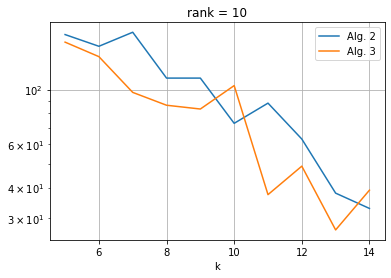

In [17]:
fig = plt.figure()
plt.plot(arrKR21,arrER21, label = "Alg. 2")
plt.plot(arrKR31,arrER31, label = "Alg. 3")
plt.legend()
plt.title('rank = 10')
plt.yscale('log')
plt.xlabel("k")
plt.grid()
plt.savefig('err_A2_Rank_upd2.pdf', dpi=300)
plt.show()

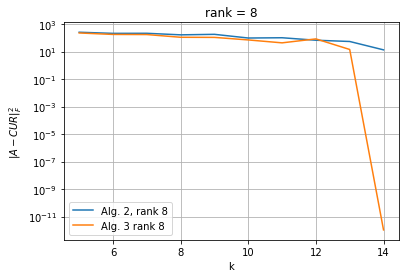

In [15]:
fig = plt.figure()
plt.plot(arrKR22,arrER22, label = "Alg. 2, rank 8")
plt.plot(arrKR32,arrER32, label = "Alg. 3 rank 8")
plt.legend()
plt.title('rank = 8')
plt.yscale('log')
plt.ylabel("$ \|A - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_A3_rank_upd2.pdf', dpi=300)
plt.show()

In [47]:
np.linalg.norm( GetKRank(m,n,10,-1,1,np.random.uniform),'fro')

240.5647884169002

Sparse test

In [ ]:
m = 35
n = 40
dens = 0.2

A = GetSparse(m,n,dens,-1,1,np.random.uniform)

arrKS21 = []
arrES21 = []
arrTS21 = []

arrKS31 = []
arrES31 = []
arrTS31 = []


        
            
for k in range(10,25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS21.append(k)
    time = end - start
    arrTS21.append(time.total_seconds())
    arrES21.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(10,25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS31.append(k)
    time = end - start
    arrTS31.append(time.total_seconds())
    arrES31.append(np.linalg.norm(A - C@U@R, 'fro'))
dens = 0.05

A = GetSparse(m,n,dens,-1,1,np.random.uniform)

arrKS22 = []
arrES22 = []
arrTS22 = []

arrKS32 = []
arrES32 = []
arrTS32 = []


        
            
for k in range(10,25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS22.append(k)
    time = end - start
    arrTS22.append(time.total_seconds())
    arrES22.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(10,25):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS32.append(k)
    time = end - start
    arrTS32.append(time.total_seconds())
    arrES32.append(np.linalg.norm(A - C@U@R, 'fro'))

In [ ]:
fig = plt.figure()
plt.plot(arrKS21,arrES21, label = "Alg. 2 density = 0.2")
plt.plot(arrKS22,arrES22, label = "Alg. 2 density = 0.05")
plt.legend()

plt.yscale('log')
plt.ylabel(" \|A - CUR\|_F^2")
plt.xlabel("k")
plt.grid()
plt.savefig('err_A2_Sparse.pdf', dpi=300)
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(arrKS31,arrES31, label = "Alg. 3 density = 0.2")
plt.plot(arrKS32,arrES32, label = "Alg. 3 density = 0.05")
plt.legend()

plt.yscale('log')
plt.ylabel(" \|A - CUR\|_F^2")
plt.xlabel("k")
plt.grid()
plt.savefig('err_A3_Sparse.pdf', dpi=300)
plt.show()

Dim Test

In [ ]:
np.linalg.norm(A,'fro')